In [1]:
import numpy as np
import collections as cl
import pandas as pd
filename = "/Users/walfred/Documents/Marklab/benchfigure3/PangenomeAlleles_typefix.tsv_1KG_summary.txt"
filename2 = "/Users/walfred/Documents/Marklab/popfigure4/PangenomeAlleles_typefix.tsv_GETx_summary.txt"
HGSVC=["HG00512","HG00513","HG00514","HG00731","HG00732","HG03125","NA12878","NA19238","NA19239","NA24385"]
filtered = []
thefile = "/Users/walfred/Documents/Marklab/integrated_call_samples_v3.20200731.ALL.ped"
	
table = pd.read_csv(thefile,sep = "\t")

parents = dict()

for index, row in table.iterrows():
	
	if row['Paternal ID'] != '0' and row['Maternal ID'] != '0':
	
		parents[row['Individual ID']] = [row['Paternal ID'], row['Maternal ID']]
	
probands = [x for x in set(parents.keys())]


In [2]:
pops= {'NA12718': 'CEU', 'NA12748': 'CEU', 'NA12775': 'CEU', 'NA12777': 'CEU', 'NA12778': 'CEU', 'NA12827': 'CEU', 'NA12829': 'CEU', 'NA12842': 'CEU', 'NA12843': 'CEU', 'NA12889': 'CEU', 'NA12890': 'CEU', 'NA18488': 'YRI', 'NA18530': 'CHB', 'NA18534': 'CHB', 'NA18536': 'CHB', 'NA18543': 'CHB', 'NA18544': 'CHB', 'NA18546': 'CHB', 'NA18548': 'CHB', 'NA18549': 'CHB', 'NA18557': 'CHB', 'NA18559': 'CHB', 'NA20752': 'TSI', 'NA20753': 'TSI', 'NA20754': 'TSI', 'NA20755': 'TSI', 'NA20756': 'TSI', 'NA20757': 'TSI', 'NA20758': 'TSI', 'NA20759': 'TSI', 'NA20760': 'TSI', 'NA20761': 'TSI', 'NA20762': 'TSI', 'NA20763': 'TSI', 'NA20764': 'TSI', 'NA20765': 'TSI', 'NA20766': 'TSI', 'NA20767': 'TSI', 'NA20768': 'TSI', 'NA20769': 'TSI', 'NA20770': 'TSI', 'NA20771': 'TSI', 'NA20772': 'TSI', 'NA20773': 'TSI', 'HG00443': 'CHS', 'HG00445': 'CHS', 'HG00446': 'CHS', 'HG00448': 'CHS', 'HG00449': 'CHS', 'HG00451': 'CHS', 'HG00452': 'CHS', 'HG00463': 'CHS', 'HG00464': 'CHS', 'HG00118': 'GBR', 'HG00119': 'GBR', 'HG00121': 'GBR', 'HG00122': 'GBR', 'HG00123': 'GBR', 'HG00125': 'GBR', 'HG00126': 'GBR', 'HG00159': 'GBR', 'HG00231': 'GBR', 'HG00232': 'GBR', 'HG00236': 'GBR', 'HG00237': 'GBR', 'HG00239': 'GBR', 'NA18595': 'CHB', 'NA18596': 'CHB', 'NA18597': 'CHB', 'NA18599': 'CHB', 'NA18602': 'CHB', 'NA18606': 'CHB', 'NA18610': 'CHB', 'NA18611': 'CHB', 'NA18612': 'CHB', 'NA18613': 'CHB', 'NA18615': 'CHB', 'NA18616': 'CHB', 'NA18617': 'CHB', 'NA18618': 'CHB', 'NA18619': 'CHB', 'NA18620': 'CHB', 'NA18621': 'CHB', 'NA18622': 'CHB', 'NA18623': 'CHB', 'NA18624': 'CHB', 'NA18625': 'CHB', 'NA18626': 'CHB', 'NA20774': 'TSI', 'NA20775': 'TSI', 'NA20778': 'TSI', 'NA20783': 'TSI', 'NA20785': 'TSI', 'NA20786': 'TSI', 'NA20787': 'TSI', 'NA20790': 'TSI', 'NA20792': 'TSI', 'NA20795': 'TSI', 'NA20796': 'TSI', 'NA20797': 'TSI', 'NA20798': 'TSI', 'NA20799': 'TSI', 'NA20800': 'TSI', 'NA20801': 'TSI', 'NA20802': 'TSI', 'NA20803': 'TSI', 'NA20804': 'TSI', 'NA20805': 'TSI', 'NA20806': 'TSI', 'NA20807': 'TSI', 'HG00242': 'GBR', 'HG00243': 'GBR', 'HG00244': 'GBR', 'HG00245': 'GBR', 'HG00252': 'GBR', 'HG00253': 'GBR', 'HG00254': 'GBR', 'HG00256': 'GBR', 'HG00257': 'GBR', 'HG00258': 'GBR', 'HG00259': 'GBR', 'HG00260': 'GBR', 'HG00261': 'GBR', 'HG00262': 'GBR', 'HG00263': 'GBR', 'HG00264': 'GBR', 'HG00265': 'GBR', 'HG00266': 'FIN', 'HG00267': 'FIN', 'HG00268': 'FIN', 'HG00269': 'FIN', 'HG00271': 'FIN', 'NA18627': 'CHB', 'NA18628': 'CHB', 'NA18630': 'CHB', 'NA18631': 'CHB', 'NA18632': 'CHB', 'NA18633': 'CHB', 'NA18634': 'CHB', 'NA18635': 'CHB', 'NA18636': 'CHB', 'NA18637': 'CHB', 'NA18639': 'CHB', 'NA18640': 'CHB', 'NA18641': 'CHB', 'NA18642': 'CHB', 'NA18643': 'CHB', 'NA18645': 'CHB', 'NA18647': 'CHB', 'NA18740': 'CHB', 'NA18745': 'CHB', 'NA18747': 'CHB', 'NA18748': 'CHB', 'NA18749': 'CHB', 'NA20808': 'TSI', 'NA20809': 'TSI', 'NA20810': 'TSI', 'NA20811': 'TSI', 'NA20812': 'TSI', 'NA20813': 'TSI', 'NA20814': 'TSI', 'NA20815': 'TSI', 'NA20818': 'TSI', 'NA20819': 'TSI', 'NA20821': 'TSI', 'NA20822': 'TSI', 'NA20826': 'TSI', 'NA20827': 'TSI', 'NA20828': 'TSI', 'NA20832': 'TSI', 'NA19222': 'YRI', 'NA19625': 'ASW', 'NA19648': 'MXL', 'NA19649': 'MXL', 'NA19651': 'MXL', 'NA19652': 'MXL', 'HG00272': 'FIN', 'HG00273': 'FIN', 'HG00306': 'FIN', 'HG00308': 'FIN', 'HG00309': 'FIN', 'HG00311': 'FIN', 'HG00313': 'FIN', 'HG00315': 'FIN', 'HG00318': 'FIN', 'HG00319': 'FIN', 'HG00320': 'FIN', 'HG00321': 'FIN', 'HG00323': 'FIN', 'HG00327': 'FIN', 'HG00328': 'FIN', 'HG00335': 'FIN', 'HG00336': 'FIN', 'HG00337': 'FIN', 'HG00338': 'FIN', 'HG00339': 'FIN', 'HG00342': 'FIN', 'HG00343': 'FIN', 'NA18757': 'CHB', 'NA18867': 'YRI', 'NA18868': 'YRI', 'NA18873': 'YRI', 'NA18908': 'YRI', 'NA18910': 'YRI', 'NA18917': 'YRI', 'NA18923': 'YRI', 'NA18924': 'YRI', 'NA18933': 'YRI', 'NA18934': 'YRI', 'NA18939': 'JPT', 'NA18941': 'JPT', 'NA18946': 'JPT', 'NA18954': 'JPT', 'NA18957': 'JPT', 'NA18962': 'JPT', 'NA18963': 'JPT', 'NA18966': 'JPT', 'NA18977': 'JPT', 'NA18978': 'JPT', 'NA18979': 'JPT', 'NA19654': 'MXL', 'NA19655': 'MXL', 'NA19657': 'MXL', 'NA19658': 'MXL', 'NA19661': 'MXL', 'NA19663': 'MXL', 'NA19664': 'MXL', 'NA19669': 'MXL', 'NA19670': 'MXL', 'NA19676': 'MXL', 'NA19678': 'MXL', 'NA19679': 'MXL', 'NA19681': 'MXL', 'NA19682': 'MXL', 'NA19684': 'MXL', 'NA19700': 'ASW', 'NA19701': 'ASW', 'NA19703': 'ASW', 'NA19704': 'ASW', 'NA19707': 'ASW', 'NA19711': 'ASW', 'NA19712': 'ASW', 'HG00344': 'FIN', 'HG00345': 'FIN', 'HG00346': 'FIN', 'HG00349': 'FIN', 'HG00350': 'FIN', 'HG00351': 'FIN', 'HG00353': 'FIN', 'HG00355': 'FIN', 'HG00356': 'FIN', 'HG00357': 'FIN', 'HG00358': 'FIN', 'HG00360': 'FIN', 'HG00361': 'FIN', 'HG00362': 'FIN', 'HG00364': 'FIN', 'HG00365': 'FIN', 'HG00366': 'FIN', 'HG00367': 'FIN', 'HG00368': 'FIN', 'HG00369': 'FIN', 'HG00371': 'FIN', 'HG00372': 'FIN', 'NA18987': 'JPT', 'NA18990': 'JPT', 'NA18991': 'JPT', 'NA18992': 'JPT', 'NA18993': 'JPT', 'NA18994': 'JPT', 'NA18995': 'JPT', 'NA18997': 'JPT', 'NA18998': 'JPT', 'NA18999': 'JPT', 'NA19000': 'JPT', 'NA19001': 'JPT', 'NA19002': 'JPT', 'NA19003': 'JPT', 'NA19007': 'JPT', 'NA19009': 'JPT', 'NA19010': 'JPT', 'NA19012': 'JPT', 'NA19054': 'JPT', 'NA19055': 'JPT', 'NA19056': 'JPT', 'NA19057': 'JPT', 'NA19713': 'ASW', 'NA19716': 'MXL', 'NA19717': 'MXL', 'NA19719': 'MXL', 'NA19720': 'MXL', 'NA19722': 'MXL', 'NA19723': 'MXL', 'NA19725': 'MXL', 'NA19726': 'MXL', 'NA19728': 'MXL', 'NA19729': 'MXL', 'NA19731': 'MXL', 'NA19732': 'MXL', 'NA19746': 'MXL', 'NA19747': 'MXL', 'NA19749': 'MXL', 'NA19750': 'MXL', 'NA19755': 'MXL', 'NA19756': 'MXL', 'NA19758': 'MXL', 'NA19759': 'MXL', 'NA19761': 'MXL', 'HG00373': 'FIN', 'HG00375': 'FIN', 'HG00376': 'FIN', 'NA19058': 'JPT', 'NA19059': 'JPT', 'NA19060': 'JPT', 'NA19062': 'JPT', 'NA19063': 'JPT', 'NA19064': 'JPT', 'NA19065': 'JPT', 'NA19066': 'JPT', 'NA19067': 'JPT', 'NA19068': 'JPT', 'NA19070': 'JPT', 'NA19072': 'JPT', 'NA19074': 'JPT', 'NA19075': 'JPT', 'NA19076': 'JPT', 'NA19077': 'JPT', 'NA19078': 'JPT', 'NA19079': 'JPT', 'NA19080': 'JPT', 'NA19081': 'JPT', 'NA19082': 'JPT', 'NA19083': 'JPT', 'NA19762': 'MXL', 'NA19770': 'MXL', 'NA19771': 'MXL', 'NA19773': 'MXL', 'NA19774': 'MXL', 'NA19776': 'MXL', 'NA19777': 'MXL', 'NA19779': 'MXL', 'NA19780': 'MXL', 'NA19782': 'MXL', 'NA19783': 'MXL', 'NA19785': 'MXL', 'NA19786': 'MXL', 'NA19788': 'MXL', 'NA19789': 'MXL', 'NA19794': 'MXL', 'NA19795': 'MXL', 'NA19818': 'ASW', 'NA19819': 'ASW', 'NA19834': 'ASW', 'NA19835': 'ASW', 'NA19900': 'ASW', 'NA06985': 'CEU', 'NA06986': 'CEU', 'NA06994': 'CEU', 'NA07000': 'CEU', 'NA07037': 'CEU', 'NA07051': 'CEU', 'NA19084': 'JPT', 'NA19085': 'JPT', 'NA19086': 'JPT', 'NA19087': 'JPT', 'NA19088': 'JPT', 'NA19092': 'YRI', 'NA19095': 'YRI', 'NA19096': 'YRI', 'NA19107': 'YRI', 'NA19113': 'YRI', 'NA19117': 'YRI', 'NA19118': 'YRI', 'NA19121': 'YRI', 'NA19130': 'YRI', 'NA19146': 'YRI', 'NA19149': 'YRI', 'NA19175': 'YRI', 'NA19184': 'YRI', 'NA19185': 'YRI', 'NA19189': 'YRI', 'NA19197': 'YRI', 'NA19198': 'YRI', 'NA19901': 'ASW', 'NA19904': 'ASW', 'NA19908': 'ASW', 'NA19909': 'ASW', 'NA19914': 'ASW', 'NA19916': 'ASW', 'NA19917': 'ASW', 'NA19920': 'ASW', 'NA19921': 'ASW', 'NA19982': 'ASW', 'NA20126': 'ASW', 'NA20127': 'ASW', 'NA20276': 'ASW', 'NA20278': 'ASW', 'NA20281': 'ASW', 'NA20282': 'ASW', 'NA20287': 'ASW', 'NA20289': 'ASW', 'NA20291': 'ASW', 'NA20294': 'ASW', 'NA20296': 'ASW', 'NA20299': 'ASW', 'NA07347': 'CEU', 'NA07357': 'CEU', 'NA10847': 'CEU', 'NA10851': 'CEU', 'NA11829': 'CEU', 'NA11830': 'CEU', 'NA11831': 'CEU', 'NA11832': 'CEU', 'NA11840': 'CEU', 'NA11881': 'CEU', 'NA11894': 'CEU', 'NA11918': 'CEU', 'NA11919': 'CEU', 'NA11920': 'CEU', 'NA11931': 'CEU', 'NA11992': 'CEU', 'NA11994': 'CEU', 'NA11995': 'CEU', 'NA12003': 'CEU', 'NA12004': 'CEU', 'NA12005': 'CEU', 'NA12006': 'CEU', 'NA19213': 'YRI', 'NA19214': 'YRI', 'NA19223': 'YRI', 'NA19235': 'YRI', 'NA19236': 'YRI', 'NA19247': 'YRI', 'NA19248': 'YRI', 'NA19256': 'YRI', 'NA07048': 'CEU', 'NA11932': 'CEU', 'NA11933': 'CEU', 'NA12046': 'CEU', 'NA18525': 'CHB', 'NA18528': 'CHB', 'NA18531': 'CHB', 'NA18533': 'CHB', 'NA18535': 'CHB', 'NA18538': 'CHB', 'NA18539': 'CHB', 'NA18541': 'CHB', 'NA18553': 'CHB', 'NA18560': 'CHB', 'NA20314': 'ASW', 'NA20317': 'ASW', 'NA20332': 'ASW', 'NA20334': 'ASW', 'NA20340': 'ASW', 'NA20342': 'ASW', 'NA20346': 'ASW', 'NA20348': 'ASW', 'NA20356': 'ASW', 'NA20357': 'ASW', 'NA20359': 'ASW', 'NA20845': 'GIH', 'NA20846': 'GIH', 'NA20847': 'GIH', 'NA20849': 'GIH', 'NA20850': 'GIH', 'NA20851': 'GIH', 'NA20852': 'GIH', 'NA20853': 'GIH', 'NA20854': 'GIH', 'NA20856': 'GIH', 'NA20858': 'GIH', 'NA12043': 'CEU', 'NA12044': 'CEU', 'NA12045': 'CEU', 'NA12144': 'CEU', 'NA12154': 'CEU', 'NA12155': 'CEU', 'NA12156': 'CEU', 'NA12234': 'CEU', 'NA12249': 'CEU', 'NA12287': 'CEU', 'NA12414': 'CEU', 'NA12489': 'CEU', 'NA12716': 'CEU', 'NA12717': 'CEU', 'NA12749': 'CEU', 'NA12750': 'CEU', 'NA12751': 'CEU', 'NA12760': 'CEU', 'NA12761': 'CEU', 'NA12762': 'CEU', 'NA12763': 'CEU', 'NA12776': 'CEU', 'NA18565': 'CHB', 'NA18567': 'CHB', 'NA18574': 'CHB', 'NA18591': 'CHB', 'NA18629': 'CHB', 'NA18644': 'CHB', 'NA18646': 'CHB', 'NA18648': 'CHB', 'NA18864': 'YRI', 'NA18865': 'YRI', 'NA18876': 'YRI', 'NA18877': 'YRI', 'NA18878': 'YRI', 'NA18879': 'YRI', 'NA18881': 'YRI', 'NA18915': 'YRI', 'NA18950': 'JPT', 'NA18982': 'JPT', 'NA18983': 'JPT', 'NA18984': 'JPT', 'NA18985': 'JPT', 'NA18986': 'JPT', 'NA20859': 'GIH', 'NA20861': 'GIH', 'NA20862': 'GIH', 'NA20866': 'GIH', 'NA20869': 'GIH', 'NA20870': 'GIH', 'NA20872': 'GIH', 'NA20874': 'GIH', 'NA20875': 'GIH', 'NA20876': 'GIH', 'NA20877': 'GIH', 'NA20878': 'GIH', 'NA20881': 'GIH', 'NA20882': 'GIH', 'NA20884': 'GIH', 'NA20885': 'GIH', 'NA20886': 'GIH', 'NA20887': 'GIH', 'NA20888': 'GIH', 'NA20889': 'GIH', 'NA20890': 'GIH', 'NA20891': 'GIH', 'NA12812': 'CEU', 'NA12813': 'CEU', 'NA12814': 'CEU', 'NA12815': 'CEU', 'NA12828': 'CEU', 'NA12872': 'CEU', 'NA12873': 'CEU', 'NA12874': 'CEU', 'NA12878': 'CEU', 'NA18486': 'YRI', 'NA18489': 'YRI', 'NA18498': 'YRI', 'NA18499': 'YRI', 'NA18501': 'YRI', 'NA18502': 'YRI', 'NA18504': 'YRI', 'NA18505': 'YRI', 'NA18507': 'YRI', 'NA18508': 'YRI', 'NA18510': 'YRI', 'NA18511': 'YRI', 'NA18516': 'YRI', 'NA18988': 'JPT', 'NA18989': 'JPT', 'NA19004': 'JPT', 'NA19006': 'JPT', 'NA19011': 'JPT', 'NA19017': 'LWK', 'NA19019': 'LWK', 'NA19020': 'LWK', 'NA19023': 'LWK', 'NA19024': 'LWK', 'NA19025': 'LWK', 'NA19026': 'LWK', 'NA19027': 'LWK', 'NA19028': 'LWK', 'NA19030': 'LWK', 'NA19031': 'LWK', 'NA19035': 'LWK', 'NA19036': 'LWK', 'NA19037': 'LWK', 'NA19038': 'LWK', 'NA19041': 'LWK', 'NA19042': 'LWK', 'NA20892': 'GIH', 'NA20894': 'GIH', 'NA20895': 'GIH', 'NA20896': 'GIH', 'NA20897': 'GIH', 'NA20899': 'GIH', 'NA20900': 'GIH', 'NA20901': 'GIH', 'NA20902': 'GIH', 'NA20903': 'GIH', 'NA20904': 'GIH', 'NA20906': 'GIH', 'NA20908': 'GIH', 'NA20910': 'GIH', 'NA20911': 'GIH', 'NA21086': 'GIH', 'NA21088': 'GIH', 'NA21089': 'GIH', 'NA21090': 'GIH', 'NA21091': 'GIH', 'NA21092': 'GIH', 'NA21094': 'GIH', 'NA18517': 'YRI', 'NA18519': 'YRI', 'NA18520': 'YRI', 'NA18522': 'YRI', 'NA18523': 'YRI', 'NA18526': 'CHB', 'NA18532': 'CHB', 'NA18537': 'CHB', 'NA18542': 'CHB', 'NA18545': 'CHB', 'NA18547': 'CHB', 'NA18550': 'CHB', 'NA18552': 'CHB', 'NA18555': 'CHB', 'NA18558': 'CHB', 'NA18561': 'CHB', 'NA18562': 'CHB', 'NA18563': 'CHB', 'NA18564': 'CHB', 'NA18566': 'CHB', 'NA18570': 'CHB', 'NA18571': 'CHB', 'NA19043': 'LWK', 'NA19089': 'JPT', 'NA19090': 'JPT', 'NA19091': 'JPT', 'NA19307': 'LWK', 'NA19308': 'LWK', 'NA19309': 'LWK', 'NA19310': 'LWK', 'NA19312': 'LWK', 'NA19314': 'LWK', 'NA19315': 'LWK', 'NA19316': 'LWK', 'NA19317': 'LWK', 'NA19318': 'LWK', 'NA19319': 'LWK', 'NA19320': 'LWK', 'NA19321': 'LWK', 'NA19323': 'LWK', 'NA19324': 'LWK', 'NA19327': 'LWK', 'NA19328': 'LWK', 'NA19331': 'LWK', 'NA21097': 'GIH', 'NA21098': 'GIH', 'NA21099': 'GIH', 'NA21100': 'GIH', 'NA21101': 'GIH', 'NA21102': 'GIH', 'NA21103': 'GIH', 'NA21104': 'GIH', 'NA21105': 'GIH', 'NA21106': 'GIH', 'NA21107': 'GIH', 'NA21108': 'GIH', 'NA21109': 'GIH', 'NA21110': 'GIH', 'NA21111': 'GIH', 'NA21112': 'GIH', 'NA21113': 'GIH', 'NA21115': 'GIH', 'NA21116': 'GIH', 'NA21117': 'GIH', 'NA21118': 'GIH', 'NA21119': 'GIH', 'NA18572': 'CHB', 'NA18573': 'CHB', 'NA18577': 'CHB', 'NA18579': 'CHB', 'NA18582': 'CHB', 'NA18592': 'CHB', 'NA18593': 'CHB', 'NA18603': 'CHB', 'NA18605': 'CHB', 'NA18608': 'CHB', 'NA18609': 'CHB', 'NA18638': 'CHB', 'NA18853': 'YRI', 'NA18856': 'YRI', 'NA18858': 'YRI', 'NA18861': 'YRI', 'NA18870': 'YRI', 'NA18871': 'YRI', 'NA18907': 'YRI', 'NA18909': 'YRI', 'NA18912': 'YRI', 'NA18916': 'YRI', 'NA19332': 'LWK', 'NA19334': 'LWK', 'NA19338': 'LWK', 'NA19346': 'LWK', 'NA19347': 'LWK', 'NA19350': 'LWK', 'NA19351': 'LWK', 'NA19355': 'LWK', 'NA19360': 'LWK', 'NA19372': 'LWK', 'NA19374': 'LWK', 'NA19375': 'LWK', 'NA19376': 'LWK', 'NA19377': 'LWK', 'NA19378': 'LWK', 'NA19379': 'LWK', 'NA19380': 'LWK', 'NA19383': 'LWK', 'NA19384': 'LWK', 'NA19385': 'LWK', 'NA19390': 'LWK', 'NA19391': 'LWK', 'NA21120': 'GIH', 'NA21122': 'GIH', 'NA21123': 'GIH', 'NA21125': 'GIH', 'NA21127': 'GIH', 'NA21128': 'GIH', 'NA21130': 'GIH', 'NA21133': 'GIH', 'NA21135': 'GIH', 'NA21137': 'GIH', 'NA21141': 'GIH', 'NA21142': 'GIH', 'NA21143': 'GIH', 'NA21144': 'GIH', 'NA19734': 'MXL', 'NA19735': 'MXL', 'NA19740': 'MXL', 'NA19741': 'MXL', 'NA19752': 'MXL', 'NA19764': 'MXL', 'NA19792': 'MXL', 'NA19922': 'ASW', 'NA18940': 'JPT', 'NA18942': 'JPT', 'NA18943': 'JPT', 'NA18944': 'JPT', 'NA18945': 'JPT', 'NA18947': 'JPT', 'NA18948': 'JPT', 'NA18949': 'JPT', 'NA18951': 'JPT', 'NA18952': 'JPT', 'NA18953': 'JPT', 'NA18956': 'JPT', 'NA18959': 'JPT', 'NA18960': 'JPT', 'NA18961': 'JPT', 'NA18964': 'JPT', 'NA18965': 'JPT', 'NA18967': 'JPT', 'NA18968': 'JPT', 'NA18969': 'JPT', 'NA18970': 'JPT', 'NA18971': 'JPT', 'NA19393': 'LWK', 'NA19394': 'LWK', 'NA19395': 'LWK', 'NA19397': 'LWK', 'NA19399': 'LWK', 'NA19401': 'LWK', 'NA19403': 'LWK', 'NA19404': 'LWK', 'NA19428': 'LWK', 'NA19429': 'LWK', 'NA19430': 'LWK', 'NA19431': 'LWK', 'NA19434': 'LWK', 'NA19435': 'LWK', 'NA19436': 'LWK', 'NA19437': 'LWK', 'NA19438': 'LWK', 'NA19439': 'LWK', 'NA19440': 'LWK', 'NA19443': 'LWK', 'NA19445': 'LWK', 'NA19446': 'LWK', 'NA19923': 'ASW', 'NA19984': 'ASW', 'NA20298': 'ASW', 'NA20339': 'ASW', 'NA20351': 'ASW', 'NA20412': 'ASW', 'NA20863': 'GIH', 'NA20864': 'GIH', 'NA20867': 'GIH', 'NA20868': 'GIH', 'NA20905': 'GIH', 'NA21087': 'GIH', 'NA21093': 'GIH', 'NA21095': 'GIH', 'NA21114': 'GIH', 'NA21124': 'GIH', 'NA21126': 'GIH', 'NA21129': 'GIH', 'HG00096': 'GBR', 'HG00097': 'GBR', 'HG00099': 'GBR', 'HG00100': 'GBR', 'NA18972': 'JPT', 'NA18973': 'JPT', 'NA18974': 'JPT', 'NA18975': 'JPT', 'NA18976': 'JPT', 'NA18980': 'JPT', 'NA18981': 'JPT', 'NA19005': 'JPT', 'NA19093': 'YRI', 'NA19098': 'YRI', 'NA19099': 'YRI', 'NA19102': 'YRI', 'NA19108': 'YRI', 'NA19114': 'YRI', 'NA19116': 'YRI', 'NA19119': 'YRI', 'NA19129': 'YRI', 'NA19131': 'YRI', 'NA19137': 'YRI', 'NA19138': 'YRI', 'NA19141': 'YRI', 'NA19143': 'YRI', 'NA19448': 'LWK', 'NA19449': 'LWK', 'NA19451': 'LWK', 'NA19452': 'LWK', 'NA19454': 'LWK', 'NA19455': 'LWK', 'NA19456': 'LWK', 'NA19457': 'LWK', 'NA19461': 'LWK', 'NA19462': 'LWK', 'NA19463': 'LWK', 'NA19466': 'LWK', 'NA19467': 'LWK', 'NA19468': 'LWK', 'NA19471': 'LWK', 'NA19472': 'LWK', 'NA19473': 'LWK', 'NA19474': 'LWK', 'NA19475': 'LWK', 'NA20502': 'TSI', 'NA20503': 'TSI', 'NA20504': 'TSI', 'HG00101': 'GBR', 'HG00102': 'GBR', 'HG00103': 'GBR', 'HG00105': 'GBR', 'HG00106': 'GBR', 'HG00107': 'GBR', 'HG00108': 'GBR', 'HG00109': 'GBR', 'HG00110': 'GBR', 'HG00111': 'GBR', 'HG00112': 'GBR', 'HG00113': 'GBR', 'HG00114': 'GBR', 'HG00115': 'GBR', 'HG00116': 'GBR', 'HG00117': 'GBR', 'HG00120': 'GBR', 'HG00127': 'GBR', 'HG00128': 'GBR', 'HG00129': 'GBR', 'HG00130': 'GBR', 'HG00131': 'GBR', 'NA19144': 'YRI', 'NA19147': 'YRI', 'NA19152': 'YRI', 'NA19153': 'YRI', 'NA19159': 'YRI', 'NA19160': 'YRI', 'NA19171': 'YRI', 'NA19172': 'YRI', 'NA19190': 'YRI', 'NA19200': 'YRI', 'NA19201': 'YRI', 'NA19204': 'YRI', 'NA19206': 'YRI', 'NA19207': 'YRI', 'NA19209': 'YRI', 'NA19210': 'YRI', 'NA19225': 'YRI', 'NA19238': 'YRI', 'NA19239': 'YRI', 'NA19257': 'YRI', 'NA07056': 'CEU', 'NA18614': 'CHB', 'NA20505': 'TSI', 'NA20506': 'TSI', 'NA20507': 'TSI', 'NA20508': 'TSI', 'NA20509': 'TSI', 'NA20510': 'TSI', 'NA20511': 'TSI', 'NA20512': 'TSI', 'NA20513': 'TSI', 'NA20514': 'TSI', 'NA20515': 'TSI', 'NA20516': 'TSI', 'NA20517': 'TSI', 'NA20518': 'TSI', 'NA20519': 'TSI', 'NA20520': 'TSI', 'NA20521': 'TSI', 'NA20522': 'TSI', 'NA20524': 'TSI', 'NA20525': 'TSI', 'NA20527': 'TSI', 'NA20528': 'TSI', 'HG00132': 'GBR', 'HG00133': 'GBR', 'HG00136': 'GBR', 'HG00137': 'GBR', 'HG00138': 'GBR', 'HG00139': 'GBR', 'HG00140': 'GBR', 'HG00141': 'GBR', 'HG00142': 'GBR', 'HG00143': 'GBR', 'HG00145': 'GBR', 'HG00146': 'GBR', 'HG00148': 'GBR', 'HG00149': 'GBR', 'HG00150': 'GBR', 'HG00151': 'GBR', 'HG00155': 'GBR', 'HG00157': 'GBR', 'HG00158': 'GBR', 'HG00160': 'GBR', 'HG00171': 'FIN', 'HG00173': 'FIN', 'NA06984': 'CEU', 'NA06989': 'CEU', 'NA11843': 'CEU', 'NA11892': 'CEU', 'NA11893': 'CEU', 'NA11930': 'CEU', 'NA12058': 'CEU', 'NA12272': 'CEU', 'NA12273': 'CEU', 'NA12275': 'CEU', 'NA12282': 'CEU', 'NA12283': 'CEU', 'NA12286': 'CEU', 'NA12340': 'CEU', 'NA12341': 'CEU', 'NA12342': 'CEU', 'NA12347': 'CEU', 'NA12348': 'CEU', 'NA12383': 'CEU', 'NA12399': 'CEU', 'NA12400': 'CEU', 'NA12413': 'CEU', 'NA20529': 'TSI', 'NA20530': 'TSI', 'NA20531': 'TSI', 'NA20532': 'TSI', 'NA20533': 'TSI', 'NA20534': 'TSI', 'NA20535': 'TSI', 'NA20536': 'TSI', 'NA20538': 'TSI', 'NA20539': 'TSI', 'NA20540': 'TSI', 'NA20541': 'TSI', 'NA20542': 'TSI', 'NA20543': 'TSI', 'NA20544': 'TSI', 'NA20581': 'TSI', 'NA20582': 'TSI', 'NA20585': 'TSI', 'NA20586': 'TSI', 'NA20587': 'TSI', 'NA20588': 'TSI', 'NA20589': 'TSI', 'HG00174': 'FIN', 'HG00176': 'FIN', 'HG00177': 'FIN', 'HG00178': 'FIN', 'HG00179': 'FIN', 'HG00180': 'FIN', 'HG00181': 'FIN', 'HG00182': 'FIN', 'HG00183': 'FIN', 'HG00185': 'FIN', 'HG00186': 'FIN', 'HG00187': 'FIN', 'HG00188': 'FIN', 'HG00189': 'FIN', 'HG00190': 'FIN', 'HG00233': 'GBR', 'HG00234': 'GBR', 'HG00235': 'GBR', 'HG00238': 'GBR', 'HG00240': 'GBR', 'HG00255': 'GBR', 'HG00442': 'CHS', 'HG01171': 'PUR', 'HG01173': 'PUR', 'HG01174': 'PUR', 'HG01176': 'PUR', 'HG01177': 'PUR', 'HG01182': 'PUR', 'HG01183': 'PUR', 'HG01187': 'PUR', 'HG01188': 'PUR', 'HG01190': 'PUR', 'HG01191': 'PUR', 'HG01197': 'PUR', 'HG01198': 'PUR', 'HG01204': 'PUR', 'HG01205': 'PUR', 'HG01241': 'PUR', 'HG01242': 'PUR', 'HG01247': 'PUR', 'HG01248': 'PUR', 'HG01250': 'CLM', 'HG01251': 'CLM', 'HG01253': 'CLM', 'HG02215': 'GBR', 'HG01882': 'ACB', 'HG01883': 'ACB', 'HG01885': 'ACB', 'HG01956': 'ACB', 'HG02014': 'ACB', 'HG01886': 'ACB', 'HG01890': 'ACB', 'HG01889': 'ACB', 'HG02009': 'ACB', 'HG02010': 'ACB', 'HG02285': 'PEL', 'HG02286': 'PEL', 'HG02301': 'PEL', 'HG01783': 'IBS', 'HG01784': 'IBS', 'HG02221': 'IBS', 'HG02220': 'IBS', 'HG02236': 'IBS', 'HG02235': 'IBS', 'HG02113': 'KHV', 'HG02141': 'KHV', 'HG03212': 'MSL', 'HG03055': 'MSL', 'HG03376': 'MSL', 'HG03380': 'MSL', 'HG03385': 'MSL', 'HG03388': 'MSL', 'HG03401': 'MSL', 'HG03419': 'MSL', 'HG03061': 'MSL', 'HG03428': 'MSL', 'HG03433': 'MSL', 'HG03439': 'MSL', 'HG03442': 'MSL', 'HG03445': 'MSL', 'HG03446': 'MSL', 'HG03460': 'MSL', 'HG03461': 'MSL', 'HG03478': 'MSL', 'HG03479': 'MSL', 'HG03066': 'MSL', 'HG03069': 'MSL', 'HG03072': 'MSL', 'HG03753': 'STU', 'HG03760': 'STU', 'HG03836': 'STU', 'HG03837': 'STU', 'HG03846': 'STU', 'HG03848': 'STU', 'HG03851': 'STU', 'HG03856': 'STU', 'HG03895': 'STU', 'HG03890': 'STU', 'HG04033': 'STU', 'HG03947': 'STU', 'HG03953': 'STU', 'HG03949': 'STU', 'HG04035': 'STU', 'HG04029': 'STU', 'HG04042': 'STU', 'HG04099': 'STU', 'HG03977': 'ITU', 'HG03780': 'ITU', 'HG03718': 'ITU', 'HG04018': 'ITU', 'HG01254': 'CLM', 'HG01256': 'CLM', 'HG01257': 'CLM', 'HG01259': 'CLM', 'HG01260': 'CLM', 'HG01271': 'CLM', 'HG01272': 'CLM', 'HG01275': 'CLM', 'HG01277': 'CLM', 'HG01334': 'GBR', 'HG01344': 'CLM', 'HG01345': 'CLM', 'HG01348': 'CLM', 'HG01356': 'CLM', 'HG01357': 'CLM', 'HG02122': 'KHV', 'HG02121': 'KHV', 'HG02128': 'KHV', 'HG02127': 'KHV', 'HG02373': 'CDX', 'HG02394': 'CDX', 'HG02396': 'CDX', 'HG02397': 'CDX', 'HG01914': 'ACB', 'HG01915': 'ACB', 'HG01986': 'ACB', 'HG01958': 'ACB', 'HG01990': 'ACB', 'HG02012': 'ACB', 'HG02053': 'ACB', 'HG02054': 'ACB', 'HG02255': 'ACB', 'HG02256': 'ACB', 'HG02314': 'ACB', 'HG02315': 'ACB', 'HG02281': 'ACB', 'HG02282': 'ACB', 'HG03410': 'MSL', 'HG03436': 'MSL', 'HG03437': 'MSL', 'HG03449': 'MSL', 'HG03458': 'MSL', 'HG03476': 'MSL', 'HG03484': 'MSL', 'HG03485': 'MSL', 'HG03547': 'MSL', 'HG03548': 'MSL', 'HG03556': 'MSL', 'HG03557': 'MSL', 'HG03391': 'MSL', 'HG03455': 'MSL', 'HG03559': 'MSL', 'HG03563': 'MSL', 'HG03565': 'MSL', 'HG03571': 'MSL', 'HG03572': 'MSL', 'HG03575': 'MSL', 'HG03577': 'MSL', 'HG03578': 'MSL', 'HG03742': 'ITU', 'HG03779': 'ITU', 'HG03777': 'ITU', 'HG03785': 'ITU', 'HG03790': 'ITU', 'HG03792': 'ITU', 'HG03782': 'ITU', 'HG03873': 'ITU', 'HG03861': 'ITU', 'HG03863': 'ITU', 'HG03872': 'ITU', 'HG03870': 'ITU', 'HG03867': 'ITU', 'HG03963': 'ITU', 'HG03960': 'ITU', 'HG03968': 'ITU', 'HG03720': 'ITU', 'HG04019': 'ITU', 'HG04025': 'ITU', 'HG04020': 'ITU', 'HG04014': 'ITU', 'HG04015': 'ITU', 'HG01377': 'CLM', 'HG01378': 'CLM', 'HG01383': 'CLM', 'HG01384': 'CLM', 'HG01341': 'CLM', 'HG01342': 'CLM', 'HG01350': 'CLM', 'HG01351': 'CLM', 'HG01353': 'CLM', 'HG01354': 'CLM', 'HG01359': 'CLM', 'HG01360': 'CLM', 'HG01365': 'CLM', 'HG01366': 'CLM', 'HG01374': 'CLM', 'HG01375': 'CLM', 'HG01389': 'CLM', 'HG01390': 'CLM', 'HG01437': 'CLM', 'HG01438': 'CLM', 'HG01440': 'CLM', 'HG01441': 'CLM', 'HG02317': 'ACB', 'HG02318': 'ACB', 'HG01912': 'ACB', 'HG01894': 'ACB', 'HG01982': 'PEL', 'HG02146': 'PEL', 'HG02147': 'PEL', 'HG02259': 'PEL', 'HG02260': 'PEL', 'HG02271': 'PEL', 'HG02272': 'PEL', 'HG02277': 'PEL', 'HG02278': 'PEL', 'HG02291': 'PEL', 'HG02292': 'PEL', 'HG02299': 'PEL', 'HG02298': 'PEL', 'HG01699': 'IBS', 'HG01697': 'IBS', 'HG02224': 'IBS', 'HG02223': 'IBS', 'HG02231': 'IBS', 'HG03583': 'MSL', 'HG03515': 'ESN', 'HG03514': 'ESN', 'HG03268': 'ESN', 'HG03267': 'ESN', 'HG03271': 'ESN', 'HG03270': 'ESN', 'HG03280': 'ESN', 'HG03279': 'ESN', 'HG03291': 'ESN', 'HG03295': 'ESN', 'HG03294': 'ESN', 'HG03301': 'ESN', 'HG03300': 'ESN', 'HG03367': 'ESN', 'HG03366': 'ESN', 'HG02947': 'ESN', 'HG02946': 'ESN', 'HG02971': 'ESN', 'HG02970': 'ESN', 'HG02953': 'ESN', 'HG02952': 'ESN', 'HG04022': 'ITU', 'HG04063': 'ITU', 'HG04093': 'ITU', 'HG04118': 'ITU', 'HG02568': 'GWD', 'HG02759': 'GWD', 'HG02760': 'GWD', 'HG02763': 'GWD', 'HG02870': 'GWD', 'HG02878': 'GWD', 'HG02879': 'GWD', 'HG02881': 'GWD', 'HG02882': 'GWD', 'HG02982': 'GWD', 'HG02983': 'GWD', 'HG03054': 'MSL', 'HG03060': 'MSL', 'HG03063': 'MSL', 'HG03064': 'MSL', 'HG03073': 'MSL', 'HG03074': 'MSL', 'HG03077': 'MSL', 'HG01455': 'CLM', 'HG01456': 'CLM', 'HG01461': 'CLM', 'HG01462': 'CLM', 'HG01464': 'CLM', 'HG01465': 'CLM', 'HG01488': 'CLM', 'HG01489': 'CLM', 'HG01491': 'CLM', 'HG01492': 'CLM', 'HG01494': 'CLM', 'HG01495': 'CLM', 'HG01497': 'CLM', 'HG01498': 'CLM', 'HG01500': 'IBS', 'HG01501': 'IBS', 'HG01503': 'IBS', 'HG01504': 'IBS', 'HG01506': 'IBS', 'HG01507': 'IBS', 'HG01509': 'IBS', 'HG01510': 'IBS', 'HG02230': 'IBS', 'HG02238': 'IBS', 'HG02239': 'IBS', 'HG02032': 'KHV', 'HG02031': 'KHV', 'HG02050': 'KHV', 'HG02250': 'CDX', 'HG02351': 'CDX', 'HG02353': 'CDX', 'HG02355': 'CDX', 'HG02356': 'CDX', 'HG02360': 'CDX', 'HG02364': 'CDX', 'HG02367': 'CDX', 'HG02371': 'CDX', 'HG02374': 'CDX', 'HG02375': 'CDX', 'HG02379': 'CDX', 'HG02380': 'CDX', 'HG02382': 'CDX', 'HG02383': 'CDX', 'HG02384': 'CDX', 'HG02977': 'ESN', 'HG02976': 'ESN', 'HG03118': 'ESN', 'HG03117': 'ESN', 'HG03130': 'ESN', 'HG03129': 'ESN', 'HG03160': 'ESN', 'HG03159': 'ESN', 'HG03163': 'ESN', 'HG03162': 'ESN', 'HG03169': 'ESN', 'HG03168': 'ESN', 'HG03172': 'ESN', 'HG03196': 'ESN', 'HG03195': 'ESN', 'HG03199': 'ESN', 'HG03198': 'ESN', 'HG03343': 'ESN', 'HG03342': 'ESN', 'HG03370': 'ESN', 'HG03369': 'ESN', 'HG03234': 'PJL', 'HG03079': 'MSL', 'HG03082': 'MSL', 'HG03086': 'MSL', 'HG03091': 'MSL', 'HG03095': 'MSL', 'HG03224': 'MSL', 'HG03225': 'MSL', 'HG03378': 'MSL', 'HG03382': 'MSL', 'HG03394': 'MSL', 'HG03432': 'MSL', 'HG03457': 'MSL', 'HG03558': 'MSL', 'HG03567': 'MSL', 'HG02938': 'ESN', 'HG02941': 'ESN', 'HG02968': 'ESN', 'HG02979': 'ESN', 'HG02981': 'ESN', 'HG03103': 'ESN', 'HG03105': 'ESN', 'HG03111': 'ESN', 'HG01512': 'IBS', 'HG01513': 'IBS', 'HG01515': 'IBS', 'HG01516': 'IBS', 'HG01518': 'IBS', 'HG01519': 'IBS', 'HG01521': 'IBS', 'HG01522': 'IBS', 'HG01524': 'IBS', 'HG01525': 'IBS', 'HG01527': 'IBS', 'HG01528': 'IBS', 'HG01530': 'IBS', 'HG01531': 'IBS', 'HG01536': 'IBS', 'HG01537': 'IBS', 'HG01550': 'CLM', 'HG01551': 'CLM', 'HG01602': 'IBS', 'HG01603': 'IBS', 'HG01605': 'IBS', 'HG01606': 'IBS', 'HG02385': 'CDX', 'HG02386': 'CDX', 'HG02389': 'CDX', 'HG02390': 'CDX', 'HG02391': 'CDX', 'HG02392': 'CDX', 'HG02395': 'CDX', 'HG02398': 'CDX', 'HG02399': 'CDX', 'HG02401': 'CDX', 'HG02402': 'CDX', 'HG02406': 'CDX', 'HG02407': 'CDX', 'HG02409': 'CDX', 'HG02233': 'IBS', 'HG02232': 'IBS', 'HG01879': 'ACB', 'HG01880': 'ACB', 'HG02013': 'ACB', 'HG01896': 'ACB', 'HG01985': 'ACB', 'HG01988': 'ACB', 'HG03235': 'PJL', 'HG03488': 'PJL', 'HG03490': 'PJL', 'HG03491': 'PJL', 'HG03619': 'PJL', 'HG03634': 'PJL', 'HG03667': 'PJL', 'HG03668': 'PJL', 'HG03015': 'PJL', 'HG03016': 'PJL', 'HG03702': 'PJL', 'HG03703': 'PJL', 'HG03708': 'PJL', 'HG03709': 'PJL', 'HG03006': 'BEB', 'HG03007': 'BEB', 'HG03615': 'BEB', 'HG03616': 'BEB', 'HG03793': 'BEB', 'HG03796': 'BEB', 'HG03800': 'BEB', 'HG03803': 'BEB', 'HG03112': 'ESN', 'HG03126': 'ESN', 'HG03127': 'ESN', 'HG03139': 'ESN', 'HG03157': 'ESN', 'HG03166': 'ESN', 'HG03175': 'ESN', 'HG03189': 'ESN', 'HG03190': 'ESN', 'HG03193': 'ESN', 'HG03202': 'ESN', 'HG03265': 'ESN', 'HG03297': 'ESN', 'HG03298': 'ESN', 'HG03303': 'ESN', 'HG03304': 'ESN', 'HG03311': 'ESN', 'HG03313': 'ESN', 'HG03351': 'ESN', 'HG03352': 'ESN', 'HG03354': 'ESN', 'HG03363': 'ESN', 'HG01607': 'IBS', 'HG01608': 'IBS', 'HG01610': 'IBS', 'HG01612': 'IBS', 'HG01613': 'IBS', 'HG01615': 'IBS', 'HG01617': 'IBS', 'HG01618': 'IBS', 'HG01619': 'IBS', 'HG01620': 'IBS', 'HG01623': 'IBS', 'HG01624': 'IBS', 'HG01625': 'IBS', 'HG01626': 'IBS', 'HG01628': 'IBS', 'HG01630': 'IBS', 'HG01631': 'IBS', 'HG01632': 'IBS', 'HG01668': 'IBS', 'HG01669': 'IBS', 'HG01670': 'IBS', 'HG01672': 'IBS', 'HG01989': 'ACB', 'HG02051': 'ACB', 'HG02052': 'ACB', 'HG02095': 'ACB', 'HG02332': 'ACB', 'HG02107': 'ACB', 'HG02108': 'ACB', 'HG02111': 'ACB', 'HG02143': 'ACB', 'HG02144': 'ACB', 'HG02307': 'ACB', 'HG02308': 'ACB', 'HG02283': 'ACB', 'HG02309': 'ACB', 'HG02284': 'ACB', 'HG02322': 'ACB', 'HG02323': 'ACB', 'HG02325': 'ACB', 'HG02337': 'ACB', 'HG02334': 'ACB', 'HG02330': 'ACB', 'HG02339': 'ACB', 'HG03802': 'BEB', 'HG03815': 'BEB', 'HG03814': 'BEB', 'HG03824': 'BEB', 'HG03823': 'BEB', 'HG03826': 'BEB', 'HG03830': 'BEB', 'HG03829': 'BEB', 'HG03833': 'BEB', 'HG03832': 'BEB', 'HG03914': 'BEB', 'HG03913': 'BEB', 'HG03941': 'BEB', 'HG03940': 'BEB', 'HG04155': 'BEB', 'HG04156': 'BEB', 'HG03644': 'STU', 'HG03643': 'STU', 'HG03679': 'STU', 'HG03642': 'STU', 'HG03673': 'STU', 'HG03684': 'STU', 'HG03372': 'ESN', 'HG03499': 'ESN', 'HG03511': 'ESN', 'HG03517': 'ESN', 'HG03518': 'ESN', 'HG03520': 'ESN', 'HG03521': 'ESN', 'HG02493': 'PJL', 'HG02494': 'PJL', 'HG02648': 'PJL', 'HG02649': 'PJL', 'HG02651': 'PJL', 'HG02652': 'PJL', 'HG02681': 'PJL', 'HG02682': 'PJL', 'HG02690': 'PJL', 'HG02691': 'PJL', 'HG02699': 'PJL', 'HG02700': 'PJL', 'HG02736': 'PJL', 'HG02737': 'PJL', 'HG02774': 'PJL', 'HG01673': 'IBS', 'HG01675': 'IBS', 'HG01676': 'IBS', 'HG01678': 'IBS', 'HG01679': 'IBS', 'HG01680': 'IBS', 'HG01682': 'IBS', 'HG01684': 'IBS', 'HG01685': 'IBS', 'HG01686': 'IBS', 'HG01700': 'IBS', 'HG01702': 'IBS', 'HG01704': 'IBS', 'HG01705': 'IBS', 'HG01707': 'IBS', 'HG01708': 'IBS', 'HG01565': 'PEL', 'HG01566': 'PEL', 'HG01571': 'PEL', 'HG01572': 'PEL', 'HG01577': 'PEL', 'HG01578': 'PEL', 'HG02343': 'ACB', 'HG02419': 'ACB', 'HG02420': 'ACB', 'HG02427': 'ACB', 'HG02429': 'ACB', 'HG02433': 'ACB', 'HG02442': 'ACB', 'HG02445': 'ACB', 'HG02489': 'ACB', 'HG02449': 'ACB', 'HG02450': 'ACB', 'HG02470': 'ACB', 'HG02471': 'ACB', 'HG02479': 'ACB', 'HG02484': 'ACB', 'HG02485': 'ACB', 'HG02511': 'ACB', 'HG02496': 'ACB', 'HG02497': 'ACB', 'HG02508': 'ACB', 'HG02537': 'ACB', 'HG02035': 'KHV', 'HG03885': 'STU', 'HG03886': 'STU', 'HG03692': 'STU', 'HG03693': 'STU', 'HG03740': 'STU', 'HG03741': 'STU', 'HG03884': 'STU', 'HG03743': 'STU', 'HG03757': 'STU', 'HG03746': 'STU', 'HG03888': 'STU', 'HG03750': 'STU', 'HG03754': 'STU', 'HG03756': 'STU', 'HG03844': 'STU', 'HG04006': 'STU', 'HG03838': 'STU', 'HG03849': 'STU', 'HG03950': 'STU', 'HG03858': 'STU', 'HG03887': 'STU', 'HG03986': 'STU', 'HG02775': 'PJL', 'HG02792': 'PJL', 'HG02793': 'PJL', 'HG03228': 'PJL', 'HG03229': 'PJL', 'HG03624': 'PJL', 'HG03625': 'PJL', 'HG03640': 'PJL', 'HG03649': 'PJL', 'HG03652': 'PJL', 'HG03653': 'PJL', 'HG03705': 'PJL', 'HG03706': 'PJL', 'HG03762': 'PJL', 'HG01593': 'PJL', 'HG02597': 'PJL', 'HG02778': 'PJL', 'HG03021': 'PJL', 'HG03636': 'PJL', 'HG03765': 'PJL', 'HG03767': 'PJL', 'HG01583': 'PJL', 'HG00378': 'FIN', 'HG00379': 'FIN', 'HG00380': 'FIN', 'HG00381': 'FIN', 'HG00382': 'FIN', 'HG00384': 'FIN', 'HG00403': 'CHS', 'HG00404': 'CHS', 'HG01917': 'PEL', 'HG01918': 'PEL', 'HG01892': 'PEL', 'HG01893': 'PEL', 'HG01920': 'PEL', 'HG01921': 'PEL', 'HG01923': 'PEL', 'HG01924': 'PEL', 'HG01926': 'PEL', 'HG01927': 'PEL', 'HG01932': 'PEL', 'HG01933': 'PEL', 'HG01935': 'PEL', 'HG01936': 'PEL', 'HG01938': 'PEL', 'HG01939': 'PEL', 'HG01941': 'PEL', 'HG01942': 'PEL', 'HG01944': 'PEL', 'HG01945': 'PEL', 'HG01947': 'PEL', 'HG01948': 'PEL', 'HG02040': 'KHV', 'HG02047': 'KHV', 'HG02061': 'KHV', 'HG02060': 'KHV', 'HG02064': 'KHV', 'HG02067': 'KHV', 'HG02116': 'KHV', 'HG02131': 'KHV', 'HG02130': 'KHV', 'HG02137': 'KHV', 'HG02136': 'KHV', 'HG02512': 'KHV', 'HG02513': 'KHV', 'HG02521': 'KHV', 'HG02522': 'KHV', 'HG02461': 'GWD', 'HG02462': 'GWD', 'HG02464': 'GWD', 'HG02465': 'GWD', 'HG02561': 'GWD', 'HG02562': 'GWD', 'HG02570': 'GWD', 'HG03896': 'STU', 'HG03898': 'STU', 'HG03900': 'STU', 'HG03943': 'STU', 'HG03713': 'ITU', 'HG03716': 'ITU', 'HG03714': 'ITU', 'HG03717': 'ITU', 'HG03722': 'ITU', 'HG03730': 'ITU', 'HG03727': 'ITU', 'HG03729': 'ITU', 'HG03731': 'ITU', 'HG03771': 'ITU', 'HG03770': 'ITU', 'HG03882': 'ITU', 'HG03781': 'ITU', 'HG03775': 'ITU', 'HG03773': 'ITU', 'HG03772': 'ITU', 'HG03786': 'ITU', 'HG03784': 'ITU', 'HG01586': 'PJL', 'HG01589': 'PJL', 'HG02694': 'PJL', 'HG02731': 'PJL', 'HG02780': 'PJL', 'HG03018': 'PJL', 'HG03019': 'PJL', 'HG03022': 'PJL', 'HG03629': 'PJL', 'HG03631': 'PJL', 'HG03660': 'PJL', 'HG03663': 'PJL', 'HG04158': 'BEB', 'HG04185': 'BEB', 'HG04131': 'BEB', 'HG04134': 'BEB', 'HG04140': 'BEB', 'HG04141': 'BEB', 'HG04173': 'BEB', 'HG04182': 'BEB', 'HG04183': 'BEB', 'HG03821': 'BEB', 'HG00406': 'CHS', 'HG00407': 'CHS', 'HG00419': 'CHS', 'HG00421': 'CHS', 'HG00422': 'CHS', 'HG00428': 'CHS', 'HG00436': 'CHS', 'HG00437': 'CHS', 'HG00457': 'CHS', 'HG00458': 'CHS', 'HG00472': 'CHS', 'HG00473': 'CHS', 'HG00475': 'CHS', 'HG00476': 'CHS', 'HG00478': 'CHS', 'HG00479': 'CHS', 'HG00500': 'CHS', 'HG00513': 'CHS', 'HG00524': 'CHS', 'HG00525': 'CHS', 'HG00530': 'CHS', 'HG00531': 'CHS', 'HG01950': 'PEL', 'HG01951': 'PEL', 'HG01953': 'PEL', 'HG01954': 'PEL', 'HG01967': 'PEL', 'HG01968': 'PEL', 'HG01970': 'PEL', 'HG01971': 'PEL', 'HG01974': 'PEL', 'HG01973': 'PEL', 'HG01977': 'PEL', 'HG01976': 'PEL', 'HG01979': 'PEL', 'HG01980': 'PEL', 'HG01991': 'PEL', 'HG01992': 'PEL', 'HG02008': 'PEL', 'HG01997': 'PEL', 'HG02002': 'PEL', 'HG02003': 'PEL', 'HG02090': 'PEL', 'HG02089': 'PEL', 'HG02571': 'GWD', 'HG02573': 'GWD', 'HG02574': 'GWD', 'HG02582': 'GWD', 'HG02583': 'GWD', 'HG02585': 'GWD', 'HG02586': 'GWD', 'HG02588': 'GWD', 'HG02589': 'GWD', 'HG02594': 'GWD', 'HG02595': 'GWD', 'HG02613': 'GWD', 'HG02614': 'GWD', 'HG02620': 'GWD', 'HG02621': 'GWD', 'HG02623': 'GWD', 'HG02624': 'GWD', 'HG02628': 'GWD', 'HG02629': 'GWD', 'HG02642': 'GWD', 'HG02643': 'GWD', 'HG02645': 'GWD', 'HG03787': 'ITU', 'HG03788': 'ITU', 'HG03789': 'ITU', 'HG03864': 'ITU', 'HG03869': 'ITU', 'HG03862': 'ITU', 'HG03874': 'ITU', 'HG03978': 'ITU', 'HG03971': 'ITU', 'HG03974': 'ITU', 'HG03976': 'ITU', 'HG03973': 'ITU', 'HG04002': 'ITU', 'HG04017': 'ITU', 'HG04026': 'ITU', 'HG02439': 'ACB', 'HG02455': 'ACB', 'HG02476': 'ACB', 'HG02477': 'ACB', 'HG02481': 'ACB', 'HG02501': 'ACB', 'HG02502': 'ACB', 'HG03922': 'BEB', 'HG04180': 'BEB', 'HG03600': 'BEB', 'HG03603': 'BEB', 'HG03604': 'BEB', 'HG03611': 'BEB', 'HG03917': 'BEB', 'HG03920': 'BEB', 'HG04144': 'BEB', 'HG04152': 'BEB', 'HG04153': 'BEB', 'HG04161': 'BEB', 'HG04162': 'BEB', 'HG04164': 'BEB', 'HG04171': 'BEB', 'HG04176': 'BEB', 'HG04177': 'BEB', 'HG04188': 'BEB', 'HG04189': 'BEB', 'HG04194': 'BEB', 'HG04195': 'BEB', 'HG03995': 'STU', 'HG00533': 'CHS', 'HG00534': 'CHS', 'HG00536': 'CHS', 'HG00537': 'CHS', 'HG00542': 'CHS', 'HG00543': 'CHS', 'HG00553': 'PUR', 'HG00554': 'PUR', 'HG00556': 'CHS', 'HG00557': 'CHS', 'HG00559': 'CHS', 'HG00560': 'CHS', 'HG00565': 'CHS', 'HG00566': 'CHS', 'HG00580': 'CHS', 'HG00581': 'CHS', 'HG00583': 'CHS', 'HG00584': 'CHS', 'HG00589': 'CHS', 'HG00590': 'CHS', 'HG00592': 'CHS', 'HG00593': 'CHS', 'HG02104': 'PEL', 'HG02105': 'PEL', 'HG02017': 'KHV', 'HG02016': 'KHV', 'HG02020': 'KHV', 'HG02019': 'KHV', 'HG02023': 'KHV', 'HG02026': 'KHV', 'HG02025': 'KHV', 'HG02029': 'KHV', 'HG02028': 'KHV', 'HG02058': 'KHV', 'HG02057': 'KHV', 'HG02070': 'KHV', 'HG02069': 'KHV', 'HG02073': 'KHV', 'HG02072': 'KHV', 'HG02076': 'KHV', 'HG02075': 'KHV', 'HG02079': 'KHV', 'HG02078': 'KHV', 'HG02082': 'KHV', 'HG02646': 'GWD', 'HG02666': 'GWD', 'HG02667': 'GWD', 'HG02675': 'GWD', 'HG02676': 'GWD', 'HG02678': 'GWD', 'HG02679': 'GWD', 'HG02702': 'GWD', 'HG02703': 'GWD', 'HG02721': 'GWD', 'HG02722': 'GWD', 'HG02490': 'PJL', 'HG02491': 'PJL', 'HG02600': 'PJL', 'HG02601': 'PJL', 'HG02603': 'PJL', 'HG02604': 'PJL', 'HG02654': 'PJL', 'HG02655': 'PJL', 'HG02657': 'PJL', 'HG02658': 'PJL', 'HG02660': 'PJL', 'HG02505': 'ACB', 'HG02536': 'ACB', 'HG02541': 'ACB', 'HG02545': 'ACB', 'HG02546': 'ACB', 'HG02549': 'ACB', 'HG02554': 'ACB', 'HG02555': 'ACB', 'HG02557': 'ACB', 'HG02558': 'ACB', 'HG02577': 'ACB', 'HG02580': 'ACB', 'HG01088': 'PUR', 'HG01089': 'PUR', 'HG01302': 'PUR', 'HG01303': 'PUR', 'HG01311': 'PUR', 'HG01312': 'PUR', 'HG01323': 'PUR', 'HG01325': 'PUR', 'HG01326': 'PUR', 'HG01392': 'PUR', 'HG03899': 'STU', 'HG03951': 'STU', 'HG03857': 'STU', 'HG03854': 'STU', 'HG04100': 'STU', 'HG04210': 'STU', 'HG04075': 'STU', 'HG04229': 'STU', 'HG04227': 'STU', 'HG03945': 'STU', 'HG03955': 'STU', 'HG03990': 'STU', 'HG03991': 'STU', 'HG03985': 'STU', 'HG03989': 'STU', 'HG03998': 'STU', 'HG04003': 'STU', 'HG04038': 'STU', 'HG04039': 'STU', 'HG04047': 'STU', 'HG04107': 'STU', 'HG04106': 'STU', 'HG00595': 'CHS', 'HG00596': 'CHS', 'HG00607': 'CHS', 'HG00608': 'CHS', 'HG00610': 'CHS', 'HG00611': 'CHS', 'HG00613': 'CHS', 'HG00614': 'CHS', 'HG00619': 'CHS', 'HG00620': 'CHS', 'HG00625': 'CHS', 'HG00626': 'CHS', 'HG00628': 'CHS', 'HG00629': 'CHS', 'HG00634': 'CHS', 'HG00637': 'PUR', 'HG00638': 'PUR', 'HG00640': 'PUR', 'HG00641': 'PUR', 'HG00650': 'CHS', 'HG00651': 'CHS', 'HG00653': 'CHS', 'HG02081': 'KHV', 'HG02085': 'KHV', 'HG02084': 'KHV', 'HG02134': 'KHV', 'HG02133': 'KHV', 'HG01841': 'KHV', 'HG01595': 'KHV', 'HG01596': 'KHV', 'HG01597': 'KHV', 'HG01598': 'KHV', 'HG01599': 'KHV', 'HG01600': 'KHV', 'HG01840': 'KHV', 'HG01842': 'KHV', 'HG01843': 'KHV', 'HG01844': 'KHV', 'HG01845': 'KHV', 'HG01846': 'KHV', 'HG01847': 'KHV', 'HG01848': 'KHV', 'HG01849': 'KHV', 'HG01850': 'KHV', 'HG02661': 'PJL', 'HG02684': 'PJL', 'HG02685': 'PJL', 'HG02687': 'PJL', 'HG02688': 'PJL', 'HG02696': 'PJL', 'HG02697': 'PJL', 'HG02733': 'PJL', 'HG02734': 'PJL', 'HG02610': 'GWD', 'HG02611': 'GWD', 'HG02634': 'GWD', 'HG02635': 'GWD', 'HG02715': 'GWD', 'HG02716': 'GWD', 'HG02768': 'GWD', 'HG02769': 'GWD', 'HG02771': 'GWD', 'HG02772': 'GWD', 'HG02798': 'GWD', 'HG02799': 'GWD', 'HG02804': 'GWD', 'HG01393': 'PUR', 'HG01395': 'PUR', 'HG01396': 'PUR', 'HG01402': 'PUR', 'HG01403': 'PUR', 'HG01413': 'PUR', 'HG01414': 'PUR', 'HG00742': 'PUR', 'HG00743': 'PUR', 'HG01058': 'PUR', 'HG01063': 'PUR', 'HG01064': 'PUR', 'HG01077': 'PUR', 'HG01092': 'PUR', 'HG01161': 'PUR', 'HG01162': 'PUR', 'HG01164': 'PUR', 'HG01200': 'PUR', 'HG01286': 'PUR', 'HG01305': 'PUR', 'HG01308': 'PUR', 'HG01398': 'PUR', 'HG03774': 'ITU', 'HG04001': 'ITU', 'HG03866': 'ITU', 'HG03969': 'ITU', 'HG04023': 'ITU', 'HG04060': 'ITU', 'HG04090': 'ITU', 'HG04056': 'ITU', 'HG04054': 'ITU', 'HG04061': 'ITU', 'HG04062': 'ITU', 'HG04059': 'ITU', 'HG04076': 'ITU', 'HG04080': 'ITU', 'HG04094': 'ITU', 'HG04096': 'ITU', 'HG04098': 'ITU', 'HG03778': 'ITU', 'HG04209': 'ITU', 'HG04198': 'ITU', 'HG04200': 'ITU', 'HG04206': 'ITU', 'HG00654': 'CHS', 'HG00656': 'CHS', 'HG00657': 'CHS', 'HG00662': 'CHS', 'HG00663': 'CHS', 'HG00671': 'CHS', 'HG00672': 'CHS', 'HG00683': 'CHS', 'HG00684': 'CHS', 'HG00689': 'CHS', 'HG00690': 'CHS', 'HG00692': 'CHS', 'HG00693': 'CHS', 'HG00698': 'CHS', 'HG00699': 'CHS', 'HG00701': 'CHS', 'HG00704': 'CHS', 'HG00705': 'CHS', 'HG00707': 'CHS', 'HG00708': 'CHS', 'HG00717': 'CHS', 'HG00731': 'PUR', 'HG01851': 'KHV', 'HG01852': 'KHV', 'HG01853': 'KHV', 'HG01855': 'KHV', 'HG01857': 'KHV', 'HG01858': 'KHV', 'HG01859': 'KHV', 'HG01860': 'KHV', 'HG01861': 'KHV', 'HG01862': 'KHV', 'HG01863': 'KHV', 'HG01864': 'KHV', 'HG01865': 'KHV', 'HG01866': 'KHV', 'HG01867': 'KHV', 'HG01868': 'KHV', 'HG01869': 'KHV', 'HG01870': 'KHV', 'HG01871': 'KHV', 'HG01872': 'KHV', 'HG01873': 'KHV', 'HG01874': 'KHV', 'HG02805': 'GWD', 'HG02807': 'GWD', 'HG02808': 'GWD', 'HG02810': 'GWD', 'HG02811': 'GWD', 'HG02813': 'GWD', 'HG02814': 'GWD', 'HG02839': 'GWD', 'HG02840': 'GWD', 'HG02851': 'GWD', 'HG02852': 'GWD', 'HG02887': 'GWD', 'HG02888': 'GWD', 'HG02895': 'GWD', 'HG02896': 'GWD', 'HG03027': 'GWD', 'HG03028': 'GWD', 'HG03039': 'GWD', 'HG03040': 'GWD', 'HG03045': 'GWD', 'HG03046': 'GWD', 'HG03048': 'GWD', 'HG01405': 'PUR', 'HG01412': 'PUR', 'HG01119': 'CLM', 'HG01121': 'CLM', 'HG01122': 'CLM', 'HG01130': 'CLM', 'HG01131': 'CLM', 'HG01142': 'CLM', 'HG01269': 'CLM', 'HG01280': 'CLM', 'HG01281': 'CLM', 'HG01284': 'CLM', 'HG01362': 'CLM', 'HG01363': 'CLM', 'HG01369': 'CLM', 'HG01372': 'CLM', 'HG01431': 'CLM', 'HG01432': 'CLM', 'HG01435': 'CLM', 'HG01443': 'CLM', 'HG01444': 'CLM', 'HG01447': 'CLM', 'HG04202': 'ITU', 'HG04211': 'ITU', 'HG04212': 'ITU', 'HG04222': 'ITU', 'HG04214': 'ITU', 'HG04216': 'ITU', 'HG04239': 'ITU', 'HG04219': 'ITU', 'HG04225': 'ITU', 'HG04235': 'ITU', 'HG04238': 'ITU', 'HG03875': 'ITU', 'HG03965': 'ITU', 'HG04070': 'ITU', 'HG03868': 'ITU', 'HG03871': 'ITU', 'HG03967': 'ITU', 'HG00288': 'FIN', 'HG00290': 'FIN', 'HG00304': 'FIN', 'HG01765': 'IBS', 'HG01766': 'IBS', 'HG00732': 'PUR', 'HG00736': 'PUR', 'HG00737': 'PUR', 'HG00739': 'PUR', 'HG00740': 'PUR', 'HG01047': 'PUR', 'HG01048': 'PUR', 'HG01049': 'PUR', 'HG01054': 'PUR', 'HG01055': 'PUR', 'HG01066': 'PUR', 'HG01067': 'PUR', 'HG01079': 'PUR', 'HG01080': 'PUR', 'HG01097': 'PUR', 'HG01098': 'PUR', 'NA19913': 'ASW', 'NA20274': 'ASW', 'NA20318': 'ASW', 'NA20320': 'ASW', 'NA20321': 'ASW', 'NA20355': 'ASW', 'HG01878': 'KHV', 'HG02048': 'KHV', 'HG02049': 'KHV', 'HG02086': 'KHV', 'HG02087': 'KHV', 'HG02088': 'KHV', 'HG02138': 'KHV', 'HG02139': 'KHV', 'HG02140': 'KHV', 'HG02142': 'KHV', 'HG01694': 'IBS', 'HG01695': 'IBS', 'HG01709': 'IBS', 'HG01710': 'IBS', 'HG01747': 'IBS', 'HG01746': 'IBS', 'HG01756': 'IBS', 'HG01757': 'IBS', 'HG01761': 'IBS', 'HG01762': 'IBS', 'HG01771': 'IBS', 'HG01770': 'IBS', 'HG03049': 'GWD', 'HG03258': 'GWD', 'HG03259': 'GWD', 'HG02756': 'GWD', 'HG02757': 'GWD', 'HG02816': 'GWD', 'HG02817': 'GWD', 'HG02836': 'GWD', 'HG02837': 'GWD', 'HG02860': 'GWD', 'HG02861': 'GWD', 'HG02884': 'GWD', 'HG02885': 'GWD', 'HG02890': 'GWD', 'HG02891': 'GWD', 'HG03052': 'MSL', 'HG03057': 'MSL', 'HG03058': 'MSL', 'HG03078': 'MSL', 'HG03084': 'MSL', 'HG03085': 'MSL', 'HG03096': 'MSL', 'HG01459': 'CLM', 'HG01468': 'CLM', 'HG01474': 'CLM', 'HG01479': 'CLM', 'HG01485': 'CLM', 'HG01486': 'CLM', 'HG01556': 'CLM', 'HG01961': 'PEL', 'HG01965': 'PEL', 'HG02006': 'PEL', 'HG02102': 'PEL', 'HG02150': 'PEL', 'HG02252': 'PEL', 'HG02253': 'PEL', 'HG02262': 'PEL', 'HG02265': 'PEL', 'HG02266': 'PEL', 'HG02274': 'PEL', 'HG02275': 'PEL', 'HG02304': 'PEL', 'HG02312': 'PEL', 'HG02345': 'PEL', 'HG01767': 'IBS', 'HG01768': 'IBS', 'HG01785': 'IBS', 'HG01786': 'IBS', 'HG02219': 'IBS', 'NA18874': 'YRI', 'NA12830': 'CEU', 'NA12546': 'CEU', 'NA20362': 'ASW', 'HG00734': 'PUR', 'HG00154': 'GBR', 'HG00246': 'GBR', 'HG00250': 'GBR', 'HG00251': 'GBR', 'HG00274': 'FIN', 'HG00275': 'FIN', 'HG00276': 'FIN', 'HG00277': 'FIN', 'HG00278': 'FIN', 'HG00280': 'FIN', 'HG00281': 'FIN', 'HG00282': 'FIN', 'HG00284': 'FIN', 'HG00285': 'FIN', 'HG00310': 'FIN', 'HG00324': 'FIN', 'HG00325': 'FIN', 'HG00326': 'FIN', 'HG00329': 'FIN', 'HG00330': 'FIN', 'HG01775': 'IBS', 'HG01773': 'IBS', 'HG01777': 'IBS', 'HG01776': 'IBS', 'HG01781': 'IBS', 'HG01779': 'IBS', 'HG00759': 'CDX', 'HG00766': 'CDX', 'HG00844': 'CDX', 'HG00851': 'CDX', 'HG00864': 'CDX', 'HG00867': 'CDX', 'HG00879': 'CDX', 'HG00881': 'CDX', 'HG00956': 'CDX', 'HG00978': 'CDX', 'HG00982': 'CDX', 'HG01028': 'CDX', 'HG01029': 'CDX', 'HG01031': 'CDX', 'HG01046': 'CDX', 'HG01794': 'CDX', 'HG03097': 'MSL', 'HG03397': 'MSL', 'HG03451': 'MSL', 'HG03452': 'MSL', 'HG03464': 'MSL', 'HG03469': 'MSL', 'HG03472': 'MSL', 'HG02923': 'ESN', 'HG02922': 'ESN', 'HG02944': 'ESN', 'HG02943': 'ESN', 'HG02974': 'ESN', 'HG02973': 'ESN', 'HG03100': 'ESN', 'HG03099': 'ESN', 'HG03109': 'ESN', 'HG03108': 'ESN', 'HG03115': 'ESN', 'HG03114': 'ESN', 'HG03121': 'ESN', 'HG03120': 'ESN', 'HG03124': 'ESN', 'HG02348': 'PEL', 'HG02425': 'PEL', 'HG02408': 'CDX', 'HG02410': 'CDX', 'HG03237': 'PJL', 'HG03238': 'PJL', 'HG03607': 'BEB', 'HG03805': 'BEB', 'HG03908': 'BEB', 'HG03907': 'BEB', 'HG03926': 'BEB', 'HG03925': 'BEB', 'HG03594': 'BEB', 'HG03595': 'BEB', 'HG03809': 'BEB', 'HG03808': 'BEB', 'HG03009': 'BEB', 'HG03812': 'BEB', 'HG03817': 'BEB', 'HG03902': 'BEB', 'HG03012': 'BEB', 'HG03905': 'BEB', 'HG00331': 'FIN', 'HG00332': 'FIN', 'HG00334': 'FIN', 'HG00341': 'FIN', 'HG00383': 'FIN', 'HG00551': 'PUR', 'HG01051': 'PUR', 'HG01052': 'PUR', 'HG01060': 'PUR', 'HG01061': 'PUR', 'HG01069': 'PUR', 'HG01070': 'PUR', 'HG01072': 'PUR', 'HG01073': 'PUR', 'HG01075': 'PUR', 'HG01082': 'PUR', 'HG01083': 'PUR', 'HG01085': 'PUR', 'HG01086': 'PUR', 'HG01094': 'PUR', 'HG01095': 'PUR', 'HG01101': 'PUR', 'HG01795': 'CDX', 'HG01796': 'CDX', 'HG01797': 'CDX', 'HG01798': 'CDX', 'HG01799': 'CDX', 'HG01800': 'CDX', 'HG01801': 'CDX', 'HG01802': 'CDX', 'HG01804': 'CDX', 'HG01805': 'CDX', 'HG01806': 'CDX', 'HG01807': 'CDX', 'HG01808': 'CDX', 'HG01809': 'CDX', 'HG01810': 'CDX', 'HG01811': 'CDX', 'HG01812': 'CDX', 'HG01813': 'CDX', 'HG02151': 'CDX', 'HG01815': 'CDX', 'HG01816': 'CDX', 'HG01817': 'CDX', 'HG03123': 'ESN', 'HG03133': 'ESN', 'HG03132': 'ESN', 'HG03136': 'ESN', 'HG03135': 'ESN', 'HG02724': 'PJL', 'HG02725': 'PJL', 'HG02727': 'PJL', 'HG02728': 'PJL', 'HG02783': 'PJL', 'HG02784': 'PJL', 'HG02786': 'PJL', 'HG02787': 'PJL', 'HG02789': 'PJL', 'HG02790': 'PJL', 'HG00409': 'CHS', 'HG00410': 'CHS', 'HG00598': 'CHS', 'HG00599': 'CHS', 'HG00728': 'CHS', 'HG00729': 'CHS', 'HG00622': 'CHS', 'HG03911': 'BEB', 'HG03910': 'BEB', 'HG03916': 'BEB', 'HG03919': 'BEB', 'HG03928': 'BEB', 'HG03931': 'BEB', 'HG03585': 'BEB', 'HG03937': 'BEB', 'HG03934': 'BEB', 'HG04146': 'BEB', 'HG03589': 'BEB', 'HG04159': 'BEB', 'HG03593': 'BEB', 'HG04186': 'BEB', 'HG03598': 'BEB', 'HG03755': 'STU', 'HG03850': 'STU', 'HG03894': 'STU', 'HG03897': 'STU', 'HG03944': 'STU', 'HG03646': 'STU', 'HG03645': 'STU', 'HG01102': 'PUR', 'HG01104': 'PUR', 'HG01105': 'PUR', 'HG01107': 'PUR', 'HG01108': 'PUR', 'HG01110': 'PUR', 'HG01111': 'PUR', 'HG01112': 'CLM', 'HG01113': 'CLM', 'HG01124': 'CLM', 'HG01125': 'CLM', 'HG01133': 'CLM', 'HG01134': 'CLM', 'HG01136': 'CLM', 'HG01137': 'CLM', 'HG01139': 'CLM', 'HG01140': 'CLM', 'HG01148': 'CLM', 'HG01149': 'CLM', 'HG01167': 'PUR', 'HG01168': 'PUR', 'HG01170': 'PUR', 'HG02152': 'CDX', 'HG02153': 'CDX', 'HG02154': 'CDX', 'HG02155': 'CDX', 'HG02156': 'CDX', 'HG02164': 'CDX', 'HG02165': 'CDX', 'HG02166': 'CDX', 'HG02178': 'CDX', 'HG02179': 'CDX', 'HG02180': 'CDX', 'HG02181': 'CDX', 'HG02182': 'CDX', 'HG02184': 'CDX', 'HG02185': 'CDX', 'HG02186': 'CDX', 'HG02187': 'CDX', 'HG02188': 'CDX', 'HG02190': 'CDX', 'HG01789': 'GBR', 'HG01790': 'GBR', 'HG01791': 'GBR', 'HG00623': 'CHS', 'HG00631': 'CHS', 'HG00632': 'CHS', 'HG00674': 'CHS', 'HG00675': 'CHS', 'HG03024': 'GWD', 'HG03025': 'GWD', 'HG03240': 'GWD', 'HG03241': 'GWD', 'HG03246': 'GWD', 'HG03247': 'GWD', 'HG03538': 'GWD', 'HG03539': 'GWD', 'HG02819': 'GWD', 'HG02820': 'GWD', 'HG02854': 'GWD', 'HG02855': 'GWD', 'HG03470': 'MSL', 'HG03473': 'MSL', 'HG03081': 'MSL', 'HG03088': 'MSL', 'HG03209': 'MSL', 'HG03999': 'STU', 'HG03672': 'STU', 'HG03680': 'STU', 'HG03681': 'STU', 'HG03685': 'STU', 'HG03686': 'STU', 'HG03687': 'STU', 'HG03689': 'STU', 'HG03690': 'STU', 'HG03691': 'STU', 'HG03694': 'STU', 'HG03695': 'STU', 'HG03696': 'STU', 'HG03697': 'STU', 'HG03698': 'STU', 'HG03711': 'STU', 'HG03733': 'STU', 'HG03736': 'STU', 'HG03738': 'STU', 'HG03744': 'STU', 'HG03745': 'STU', 'HG03752': 'STU'}

subpoptopop = {'GBR': 'EUR', 'FIN': 'EUR', 'CHS': 'EAS', 'PUR': 'AMR', 'CDX': 'EAS', 'CLM': 'AMR', 'IBS': 'EUR', 'PEL': 'AMR', 'PJL': 'SAS', 'KHV': 'EAS', 'ACB': 'AFR', 'GWD': 'AFR', 'ESN': 'AFR', 'BEB': 'SAS', 'MSL': 'AFR', 'STU': 'SAS', 'ITU': 'SAS', 'CEU': 'EUR', 'YRI': 'AFR', 'CHB': 'EAS', 'JPT': 'EAS', 'LWK': 'AFR', 'ASW': 'AFR', 'MXL': 'AMR', 'TSI': 'EUR', 'GIH': 'SAS'}

pops = {x:subpoptopop[y] for x,y in pops.items()}

In [3]:
def get_dimensions(filename):
    with open(filename, 'r') as f:
        # get the number of rows
        num_row = len(f.readline().split()) -1
    return num_row

num_1kg = len(pops)
num_gtex = get_dimensions(filename2)
num_assem = 116 - len(filtered)
print(num_1kg)
print(num_gtex)
len(probands)


2504
879


641

In [32]:
rows = []
assems_index = cl.defaultdict(int)
allele_index = {}
with open(filename, mode = 'r') as f:
    onekgheader = [x.split(".")[0] for x in f.readline().strip().split("\t")[1:]]
    useindex= [ i for i,header in enumerate(onekgheader) if header in pops]
    noproband_header = [onekgheader[i] for i in useindex]
    
    index_ = 0
    for index, line in enumerate(f):
        line = line.split('\t')
        allele_index[line[0]] = index_
        index_ += 1
        genotypes = [0.0] * (num_assem + num_gtex) + [line[i+10] for i in useindex]
        new_row = np.array(genotypes, dtype=np.float)
        assems = [x.split("_")[2] if "_h" in x else "CHM13" if "NC_0609" in x else "HG38" for x in line[9].split(",") if ":" not in x]
        for assem in assems:
            if assem == "HG38" or assem in filtered:
                continue
            if assem not in assems_index:
                assems_index[assem] = len(assems_index)
            new_row[assems_index[assem]] += 1.0 if (assem != "CHM13" and assem != "HG38") else 2.0
        rows.append(new_row)

        
matrix = np.vstack(rows) 
print(matrix.shape)


(10364, 3499)


In [33]:
print(len(pops))

2504


In [34]:
with open(filename2, mode = 'r') as f:
    gtexheader = f.readline().strip().split("\t")[1:]
    for index, line in enumerate(f):
        line = line.split('\t')
        index = allele_index.get(line[0], -1)
        if index == -1:
            continue
        genotypes = list(map(float,line[10:] ))
        for i, genotype in enumerate(genotypes):
            matrix[index,i + num_assem] = genotype



In [35]:
matrix = np.minimum(matrix, 10)

threshold = 0.05 * matrix.shape[1]

matrix = matrix[np.count_nonzero(matrix, axis=1) > threshold]

In [36]:
matrix_normalized = (matrix - matrix.mean(axis=0)) / np.where(matrix.std(axis=0) == 0, 1, matrix.std(axis=0))

In [37]:
print(matrix_normalized.shape)

(5816, 3499)


In [38]:
from concurrent.futures import ThreadPoolExecutor
from threading import Lock

lock = Lock()  # Create a lock

global matrix_norm
matrix_norm = np.zeros((matrix_normalized.shape[1], matrix_normalized.shape[1]))  # Initialize result with zeros, NxN
# Function to compute outer product for a single row and update the result matrix
def compute_outer_and_update(row):
    global matrix_norm

    outer_result = np.outer(row, row)
    
    # Critical section - update the result matrix
    with lock:
        matrix_norm  += outer_result


with ThreadPoolExecutor() as executor:
    executor.map(compute_outer_and_update, matrix_normalized)




In [39]:
print(matrix_norm.shape)

(3499, 3499)


In [40]:
np.savetxt('/Users/walfred/Documents/Marklab/popfigure4/PCAmatrix.txt', matrix_norm, fmt='%f')

In [5]:
matrix_norm = np.loadtxt('/Users/walfred/Documents/Marklab/popfigure4/PCAmatrix.txt', dtype=float)

In [24]:
print(np.diag(matrix_norm))

[5463. 5463. 5463. ... 5463. 5463. 5463.]


In [41]:
U, S, Vt = np.linalg.svd(matrix_norm)

In [42]:
PC1,PC2,PC3,PC4= U[:,0],U[:,1],U[:,2],U[:,3]
print(U.mean(0))

[-1.68872350e-02  3.41189704e-04 -4.92723836e-05 ... -2.73587964e-06
 -8.85724876e-07 -1.31220384e-06]


In [43]:
genders = "HG00096:1,HG00097:2,HG00098:1,HG00099:2,HG00100:2,HG00101:1,HG00102:2,HG00103:1,HG00104:2,HG00105:1,HG00106:2,HG00107:1,HG00108:1,HG00109:1,HG00110:2,HG00111:2,HG00112:1,HG00113:1,HG00114:1,HG00115:1,HG00116:1,HG00117:1,HG00118:2,HG00119:1,HG00120:2,HG00121:2,HG00122:2,HG00123:2,HG00124:2,HG00125:2,HG00126:1,HG00127:2,HG00128:2,HG00129:1,HG00130:2,HG00131:1,HG00132:2,HG00133:2,HG00134:2,HG00135:2,HG00136:1,HG00137:2,HG00138:1,HG00139:1,HG00140:1,HG00141:1,HG00142:1,HG00143:1,HG00144:2,HG00145:1,HG00146:2,HG00147:2,HG00148:1,HG00149:1,HG00150:2,HG00151:1,HG00152:1,HG00153:2,HG00154:2,HG00155:1,HG00156:1,HG00157:1,HG00158:2,HG00159:1,HG00160:1,HG00171:2,HG00173:2,HG00174:2,HG00176:2,HG00177:2,HG00178:2,HG00179:2,HG00180:2,HG00181:1,HG00182:1,HG00183:1,HG00185:1,HG00186:1,HG00187:1,HG00188:1,HG00189:1,HG00190:1,HG00231:2,HG00232:2,HG00233:2,HG00234:1,HG00235:2,HG00236:2,HG00237:2,HG00238:2,HG00239:2,HG00240:2,HG00242:1,HG00243:1,HG00244:1,HG00245:2,HG00246:1,HG00247:2,HG00248:2,HG00249:2,HG00250:2,HG00251:1,HG00252:1,HG00253:2,HG00254:2,HG00255:2,HG00256:1,HG00257:2,HG00258:2,HG00259:2,HG00260:1,HG00261:2,HG00262:2,HG00263:2,HG00264:1,HG00265:1,HG00266:2,HG00267:1,HG00268:2,HG00269:2,HG00270:2,HG00271:1,HG00272:2,HG00273:1,HG00274:2,HG00275:2,HG00276:2,HG00277:1,HG00278:1,HG00280:1,HG00281:2,HG00282:2,HG00284:1,HG00285:2,HG00288:2,HG00290:1,HG00302:2,HG00303:1,HG00304:2,HG00306:2,HG00308:1,HG00309:2,HG00310:1,HG00311:1,HG00312:1,HG00313:2,HG00315:2,HG00318:2,HG00319:2,HG00320:2,HG00321:1,HG00323:2,HG00324:2,HG00325:1,HG00326:2,HG00327:2,HG00328:2,HG00329:1,HG00330:2,HG00331:2,HG00332:2,HG00334:2,HG00335:1,HG00336:1,HG00337:2,HG00338:1,HG00339:2,HG00341:1,HG00342:1,HG00343:2,HG00344:2,HG00345:1,HG00346:2,HG00349:2,HG00350:2,HG00351:1,HG00353:2,HG00355:2,HG00356:2,HG00357:2,HG00358:1,HG00359:2,HG00360:1,HG00361:2,HG00362:2,HG00364:2,HG00365:2,HG00366:1,HG00367:2,HG00368:2,HG00369:1,HG00371:1,HG00372:1,HG00373:2,HG00375:1,HG00376:2,HG00377:2,HG00378:2,HG00379:2,HG00380:2,HG00381:2,HG00382:1,HG00383:2,HG00384:2,HG00403:1,HG00404:2,HG00405:2,HG00406:1,HG00407:2,HG00408:2,HG00409:1,HG00410:2,HG00411:1,HG00418:1,HG00419:2,HG00420:1,HG00421:1,HG00422:2,HG00423:2,HG00427:1,HG00428:2,HG00429:1,HG00436:1,HG00437:2,HG00438:2,HG00442:1,HG00443:2,HG00444:1,HG00445:1,HG00446:2,HG00447:2,HG00448:1,HG00449:2,HG00450:2,HG00451:1,HG00452:2,HG00453:2,HG00457:1,HG00458:2,HG00459:1,HG00463:1,HG00464:2,HG00465:1,HG00472:1,HG00473:2,HG00474:1,HG00475:1,HG00476:2,HG00477:1,HG00478:1,HG00479:2,HG00480:1,HG00500:1,HG00501:2,HG00502:1,HG00512:1,HG00513:2,HG00514:2,HG00524:1,HG00525:2,HG00526:1,HG00530:1,HG00531:2,HG00532:1,HG00533:1,HG00534:2,HG00535:1,HG00536:1,HG00537:2,HG00538:1,HG00542:1,HG00543:2,HG00544:2,HG00551:2,HG00552:1,HG00553:1,HG00554:2,HG00555:2,HG00556:1,HG00557:2,HG00558:2,HG00559:1,HG00560:2,HG00561:2,HG00565:1,HG00566:2,HG00567:1,HG00577:1,HG00578:2,HG00579:2,HG00580:1,HG00581:2,HG00582:2,HG00583:1,HG00584:2,HG00585:2,HG00589:1,HG00590:2,HG00591:1,HG00592:1,HG00593:2,HG00594:1,HG00595:1,HG00596:2,HG00597:2,HG00598:1,HG00599:2,HG00600:2,HG00607:1,HG00608:2,HG00609:1,HG00610:1,HG00611:2,HG00612:2,HG00613:1,HG00614:2,HG00615:2,HG00619:1,HG00620:2,HG00621:1,HG00622:1,HG00623:2,HG00624:1,HG00625:1,HG00626:2,HG00627:1,HG00628:1,HG00629:2,HG00630:1,HG00631:1,HG00632:2,HG00633:1,HG00634:1,HG00635:2,HG00636:1,HG00637:1,HG00638:2,HG00639:2,HG00640:1,HG00641:2,HG00642:1,HG00650:1,HG00651:2,HG00652:2,HG00653:1,HG00654:2,HG00655:2,HG00656:1,HG00657:2,HG00658:1,HG00662:1,HG00663:2,HG00664:1,HG00671:1,HG00672:2,HG00673:1,HG00674:1,HG00675:2,HG00676:1,HG00683:1,HG00684:2,HG00685:1,HG00689:1,HG00690:2,HG00691:1,HG00692:1,HG00693:2,HG00694:1,HG00698:1,HG00699:2,HG00700:2,HG00701:1,HG00702:2,HG00703:1,HG00704:1,HG00705:2,HG00706:1,HG00707:1,HG00708:2,HG00709:1,HG00716:1,HG00717:2,HG00718:1,HG00728:1,HG00729:2,HG00730:2,HG00731:1,HG00732:2,HG00733:2,HG00734:2,HG00735:2,HG00736:1,HG00737:2,HG00738:1,HG00739:1,HG00740:2,HG00741:2,HG00742:1,HG00743:2,HG00759:2,HG00766:2,HG00844:1,HG00851:2,HG00864:2,HG00866:1,HG00867:2,HG00879:2,HG00881:1,HG00956:2,HG00978:2,HG00982:1,HG00983:1,HG01028:1,HG01029:2,HG01031:1,HG01046:2,HG01047:1,HG01048:1,HG01049:2,HG01050:2,HG01051:1,HG01052:2,HG01053:2,HG01054:1,HG01055:2,HG01056:1,HG01058:2,HG01060:1,HG01061:2,HG01062:2,HG01063:1,HG01064:2,HG01066:1,HG01067:2,HG01068:2,HG01069:1,HG01070:2,HG01071:2,HG01072:1,HG01073:2,HG01074:1,HG01075:1,HG01077:2,HG01079:1,HG01080:2,HG01081:2,HG01082:1,HG01083:2,HG01084:2,HG01085:1,HG01086:2,HG01087:2,HG01088:1,HG01089:2,HG01090:1,HG01092:2,HG01094:1,HG01095:2,HG01096:1,HG01097:1,HG01098:2,HG01099:1,HG01100:2,HG01101:1,HG01102:2,HG01103:2,HG01104:1,HG01105:2,HG01106:1,HG01107:1,HG01108:2,HG01109:1,HG01110:1,HG01111:2,HG01112:1,HG01113:2,HG01114:2,HG01119:2,HG01121:1,HG01122:2,HG01123:2,HG01124:1,HG01125:2,HG01126:1,HG01130:1,HG01131:2,HG01133:1,HG01134:2,HG01135:1,HG01136:1,HG01137:2,HG01138:1,HG01139:1,HG01140:2,HG01141:2,HG01142:1,HG01148:1,HG01149:2,HG01150:2,HG01161:1,HG01162:2,HG01164:1,HG01167:1,HG01168:2,HG01169:2,HG01170:1,HG01171:2,HG01172:1,HG01173:1,HG01174:2,HG01175:2,HG01176:1,HG01177:2,HG01178:1,HG01182:1,HG01183:2,HG01184:2,HG01187:1,HG01188:2,HG01189:1,HG01190:1,HG01191:2,HG01192:1,HG01195:2,HG01197:1,HG01198:2,HG01199:1,HG01200:1,HG01204:1,HG01205:2,HG01206:1,HG01241:1,HG01242:2,HG01243:1,HG01247:1,HG01248:2,HG01249:2,HG01250:1,HG01251:2,HG01252:1,HG01253:1,HG01254:2,HG01255:1,HG01256:1,HG01257:2,HG01258:1,HG01259:1,HG01260:2,HG01261:1,HG01269:2,HG01271:1,HG01272:2,HG01273:1,HG01274:1,HG01275:2,HG01276:2,HG01277:1,HG01278:2,HG01279:2,HG01280:1,HG01281:2,HG01284:2,HG01286:1,HG01301:2,HG01302:1,HG01303:2,HG01305:1,HG01308:1,HG01311:1,HG01312:2,HG01322:1,HG01323:2,HG01324:2,HG01325:1,HG01326:2,HG01327:1,HG01334:1,HG01341:1,HG01342:2,HG01343:2,HG01344:1,HG01345:2,HG01346:2,HG01347:1,HG01348:2,HG01349:2,HG01350:1,HG01351:2,HG01352:2,HG01353:1,HG01354:2,HG01355:2,HG01356:1,HG01357:2,HG01358:1,HG01359:1,HG01360:2,HG01361:2,HG01362:1,HG01363:2,HG01364:2,HG01365:1,HG01366:2,HG01367:2,HG01369:2,HG01372:2,HG01374:1,HG01375:2,HG01376:2,HG01377:1,HG01378:2,HG01379:2,HG01383:1,HG01384:2,HG01385:2,HG01389:1,HG01390:2,HG01391:2,HG01392:1,HG01393:2,HG01394:2,HG01395:1,HG01396:2,HG01397:2,HG01398:1,HG01402:1,HG01403:2,HG01404:2,HG01405:1,HG01411:1,HG01412:1,HG01413:1,HG01414:2,HG01415:2,HG01431:1,HG01432:2,HG01433:1,HG01435:2,HG01437:1,HG01438:2,HG01439:2,HG01440:1,HG01441:2,HG01442:1,HG01443:1,HG01444:2,HG01445:1,HG01447:2,HG01452:1,HG01453:2,HG01454:2,HG01455:1,HG01456:2,HG01457:1,HG01459:2,HG01461:1,HG01462:2,HG01463:2,HG01464:1,HG01465:2,HG01466:2,HG01468:2,HG01471:2,HG01473:1,HG01474:2,HG01477:2,HG01479:1,HG01480:2,HG01481:2,HG01482:1,HG01483:2,HG01484:2,HG01485:1,HG01486:2,HG01487:2,HG01488:1,HG01489:2,HG01490:2,HG01491:1,HG01492:2,HG01493:2,HG01494:1,HG01495:2,HG01496:2,HG01497:1,HG01498:2,HG01499:1,HG01500:1,HG01501:2,HG01502:1,HG01503:1,HG01504:2,HG01505:1,HG01506:1,HG01507:2,HG01508:1,HG01509:1,HG01510:2,HG01511:2,HG01512:1,HG01513:2,HG01514:2,HG01515:1,HG01516:2,HG01517:2,HG01518:1,HG01519:2,HG01520:2,HG01521:1,HG01522:2,HG01523:1,HG01524:1,HG01525:2,HG01526:1,HG01527:1,HG01528:2,HG01529:1,HG01530:1,HG01531:2,HG01532:1,HG01536:1,HG01537:2,HG01538:2,HG01550:1,HG01551:2,HG01552:1,HG01556:1,HG01565:1,HG01566:2,HG01567:2,HG01571:1,HG01572:2,HG01573:2,HG01577:1,HG01578:2,HG01579:1,HG01583:1,HG01586:1,HG01589:1,HG01590:2,HG01593:2,HG01594:1,HG01595:2,HG01596:1,HG01597:2,HG01598:2,HG01599:2,HG01600:2,HG01601:1,HG01602:2,HG01603:1,HG01604:2,HG01605:2,HG01606:1,HG01607:2,HG01608:1,HG01609:1,HG01610:1,HG01611:1,HG01612:2,HG01613:2,HG01614:2,HG01615:1,HG01616:2,HG01617:1,HG01618:2,HG01619:1,HG01620:2,HG01621:1,HG01622:2,HG01623:2,HG01624:1,HG01625:1,HG01626:2,HG01627:1,HG01628:2,HG01629:1,HG01630:1,HG01631:1,HG01632:2,HG01633:1,HG01667:1,HG01668:2,HG01669:1,HG01670:2,HG01671:1,HG01672:1,HG01673:2,HG01674:1,HG01675:1,HG01676:2,HG01677:2,HG01678:1,HG01679:2,HG01680:1,HG01681:2,HG01682:1,HG01683:1,HG01684:2,HG01685:2,HG01686:1,HG01687:2,HG01694:1,HG01695:2,HG01696:1,HG01697:2,HG01698:1,HG01699:1,HG01700:1,HG01701:1,HG01702:2,HG01703:1,HG01704:2,HG01705:1,HG01706:2,HG01707:2,HG01708:1,HG01709:1,HG01710:2,HG01711:2,HG01746:2,HG01747:1,HG01748:1,HG01755:2,HG01756:1,HG01757:2,HG01761:1,HG01762:2,HG01763:2,HG01764:2,HG01765:1,HG01766:2,HG01767:1,HG01768:2,HG01769:2,HG01770:2,HG01771:1,HG01772:2,HG01773:2,HG01774:1,HG01775:1,HG01776:2,HG01777:1,HG01778:1,HG01779:2,HG01780:1,HG01781:1,HG01782:2,HG01783:1,HG01784:2,HG01785:1,HG01786:2,HG01787:2,HG01789:1,HG01790:2,HG01791:1,HG01794:2,HG01795:2,HG01796:2,HG01797:2,HG01798:2,HG01799:2,HG01800:2,HG01801:2,HG01802:2,HG01804:2,HG01805:2,HG01806:2,HG01807:2,HG01808:2,HG01809:2,HG01810:1,HG01811:1,HG01812:2,HG01813:2,HG01815:2,HG01816:1,HG01817:2,HG01840:1,HG01841:2,HG01842:1,HG01843:2,HG01844:1,HG01845:2,HG01846:1,HG01847:2,HG01848:2,HG01849:1,HG01850:2,HG01851:2,HG01852:1,HG01853:2,HG01855:2,HG01857:2,HG01858:2,HG01859:2,HG01860:1,HG01861:1,HG01862:2,HG01863:2,HG01864:1,HG01865:1,HG01866:1,HG01867:1,HG01868:2,HG01869:2,HG01870:2,HG01871:2,HG01872:1,HG01873:1,HG01874:2,HG01878:2,HG01879:1,HG01880:2,HG01881:2,HG01882:1,HG01883:2,HG01884:2,HG01885:1,HG01886:2,HG01887:1,HG01888:1,HG01889:2,HG01890:1,HG01891:2,HG01892:1,HG01893:2,HG01894:2,HG01895:1,HG01896:2,HG01897:1,HG01898:2,HG01912:1,HG01914:1,HG01915:2,HG01916:2,HG01917:1,HG01918:2,HG01919:2,HG01920:1,HG01921:2,HG01922:2,HG01923:1,HG01924:2,HG01925:2,HG01926:1,HG01927:2,HG01928:1,HG01932:1,HG01933:2,HG01934:1,HG01935:1,HG01936:2,HG01937:1,HG01938:1,HG01939:2,HG01940:2,HG01941:1,HG01942:2,HG01943:1,HG01944:1,HG01945:2,HG01946:1,HG01947:1,HG01948:2,HG01949:2,HG01950:1,HG01951:2,HG01952:1,HG01953:1,HG01954:2,HG01955:2,HG01956:2,HG01958:2,HG01959:2,HG01960:2,HG01961:1,HG01965:2,HG01967:1,HG01968:2,HG01969:2,HG01970:1,HG01971:2,HG01972:2,HG01973:2,HG01974:1,HG01975:2,HG01976:2,HG01977:1,HG01978:2,HG01979:1,HG01980:2,HG01981:2,HG01982:1,HG01983:2,HG01984:1,HG01985:2,HG01986:1,HG01987:1,HG01988:1,HG01989:2,HG01990:1,HG01991:1,HG01992:2,HG01993:2,HG01995:2,HG01997:2,HG01998:1,HG02002:1,HG02003:2,HG02004:2,HG02006:2,HG02008:1,HG02009:1,HG02010:2,HG02011:1,HG02012:2,HG02013:1,HG02014:1,HG02015:1,HG02016:2,HG02017:1,HG02018:2,HG02019:2,HG02020:1,HG02021:1,HG02023:1,HG02024:2,HG02025:2,HG02026:1,HG02027:1,HG02028:2,HG02029:1,HG02030:1,HG02031:2,HG02032:1,HG02035:1,HG02040:1,HG02046:2,HG02047:1,HG02048:2,HG02049:2,HG02050:1,HG02051:1,HG02052:2,HG02053:1,HG02054:2,HG02055:1,HG02056:1,HG02057:2,HG02058:1,HG02059:2,HG02060:2,HG02061:1,HG02064:1,HG02067:1,HG02068:2,HG02069:2,HG02070:1,HG02071:1,HG02072:2,HG02073:1,HG02074:1,HG02075:2,HG02076:1,HG02077:1,HG02078:2,HG02079:1,HG02080:2,HG02081:2,HG02082:1,HG02083:1,HG02084:2,HG02085:1,HG02086:2,HG02087:2,HG02088:1,HG02089:2,HG02090:1,HG02091:2,HG02095:2,HG02102:2,HG02104:1,HG02105:2,HG02106:2,HG02107:1,HG02108:2,HG02111:2,HG02113:2,HG02116:1,HG02120:1,HG02121:2,HG02122:1,HG02126:2,HG02127:2,HG02128:1,HG02129:1,HG02130:2,HG02131:1,HG02132:1,HG02133:2,HG02134:1,HG02135:1,HG02136:2,HG02137:1,HG02138:1,HG02139:2,HG02140:2,HG02141:1,HG02142:2,HG02143:1,HG02144:2,HG02145:1,HG02146:1,HG02147:2,HG02148:2,HG02150:1,HG02151:2,HG02152:2,HG02153:2,HG02154:2,HG02155:2,HG02156:2,HG02164:2,HG02165:2,HG02166:2,HG02168:2,HG02169:2,HG02170:2,HG02173:2,HG02176:2,HG02178:2,HG02179:2,HG02180:2,HG02181:2,HG02182:2,HG02184:2,HG02185:2,HG02186:2,HG02187:2,HG02188:2,HG02189:2,HG02190:2,HG02215:2,HG02217:2,HG02218:2,HG02219:1,HG02220:2,HG02221:1,HG02222:2,HG02223:2,HG02224:1,HG02225:2,HG02229:2,HG02230:2,HG02231:1,HG02232:2,HG02233:1,HG02234:1,HG02235:2,HG02236:1,HG02237:2,HG02238:1,HG02239:2,HG02240:2,HG02250:1,HG02252:2,HG02253:1,HG02254:2,HG02255:1,HG02256:2,HG02257:2,HG02258:1,HG02259:1,HG02260:2,HG02261:1,HG02262:1,HG02265:1,HG02266:2,HG02267:2,HG02271:1,HG02272:2,HG02273:2,HG02274:1,HG02275:2,HG02276:2,HG02277:1,HG02278:2,HG02279:1,HG02280:2,HG02281:1,HG02282:2,HG02283:1,HG02284:1,HG02285:1,HG02286:2,HG02287:2,HG02288:1,HG02291:1,HG02292:2,HG02293:2,HG02298:2,HG02299:1,HG02300:1,HG02301:2,HG02302:1,HG02303:2,HG02304:1,HG02307:1,HG02308:2,HG02309:2,HG02312:2,HG02314:1,HG02315:2,HG02316:1,HG02317:1,HG02318:2,HG02321:2,HG02322:2,HG02323:1,HG02325:2,HG02330:1,HG02332:1,HG02334:1,HG02337:2,HG02339:2,HG02343:1,HG02344:1,HG02345:2,HG02347:1,HG02348:2,HG02351:1,HG02353:1,HG02355:1,HG02356:1,HG02358:1,HG02360:1,HG02363:1,HG02364:1,HG02367:1,HG02371:1,HG02372:1,HG02373:1,HG02374:1,HG02375:1,HG02377:1,HG02379:1,HG02380:1,HG02381:1,HG02382:1,HG02383:1,HG02384:1,HG02385:1,HG02386:1,HG02387:1,HG02388:1,HG02389:1,HG02390:1,HG02391:1,HG02392:1,HG02394:1,HG02395:1,HG02396:1,HG02397:1,HG02398:1,HG02399:1,HG02401:1,HG02402:1,HG02405:1,HG02406:1,HG02407:1,HG02408:1,HG02409:1,HG02410:1,HG02415:2,HG02419:2,HG02420:1,HG02425:2,HG02427:2,HG02428:1,HG02429:1,HG02433:1,HG02436:1,HG02439:1,HG02442:1,HG02445:1,HG02449:1,HG02450:2,HG02451:2,HG02455:1,HG02461:1,HG02462:2,HG02463:1,HG02464:1,HG02465:2,HG02466:1,HG02470:1,HG02471:2,HG02476:2,HG02477:2,HG02478:1,HG02479:2,HG02480:2,HG02481:1,HG02484:1,HG02485:2,HG02486:1,HG02489:1,HG02490:1,HG02491:2,HG02492:1,HG02493:1,HG02494:2,HG02495:2,HG02496:1,HG02497:2,HG02501:1,HG02502:2,HG02505:2,HG02508:2,HG02511:2,HG02512:1,HG02513:2,HG02514:1,HG02521:1,HG02522:2,HG02523:2,HG02524:1,HG02525:2,HG02526:2,HG02536:1,HG02537:2,HG02541:1,HG02545:1,HG02546:2,HG02547:1,HG02549:2,HG02554:1,HG02555:2,HG02557:1,HG02558:2,HG02559:2,HG02561:1,HG02562:2,HG02563:1,HG02567:1,HG02568:2,HG02569:1,HG02570:1,HG02571:2,HG02572:1,HG02573:1,HG02574:2,HG02575:1,HG02577:2,HG02580:2,HG02582:1,HG02583:2,HG02584:1,HG02585:1,HG02586:2,HG02587:2,HG02588:1,HG02589:2,HG02590:1,HG02594:1,HG02595:2,HG02596:1,HG02597:1,HG02599:1,HG02600:1,HG02601:2,HG02602:1,HG02603:1,HG02604:2,HG02605:2,HG02610:1,HG02611:2,HG02612:1,HG02613:1,HG02614:2,HG02615:2,HG02620:1,HG02621:2,HG02622:2,HG02623:1,HG02624:2,HG02625:1,HG02628:1,HG02629:2,HG02630:2,HG02634:1,HG02635:2,HG02636:1,HG02642:1,HG02643:2,HG02644:1,HG02645:1,HG02646:2,HG02647:1,HG02648:1,HG02649:2,HG02650:1,HG02651:1,HG02652:2,HG02653:2,HG02654:1,HG02655:2,HG02656:1,HG02657:1,HG02658:2,HG02659:2,HG02660:1,HG02661:2,HG02662:2,HG02666:1,HG02667:2,HG02668:1,HG02675:1,HG02676:2,HG02677:2,HG02678:1,HG02679:2,HG02680:2,HG02681:1,HG02682:2,HG02683:2,HG02684:1,HG02685:2,HG02686:1,HG02687:1,HG02688:2,HG02689:1,HG02690:1,HG02691:2,HG02692:2,HG02694:2,HG02696:1,HG02697:2,HG02698:1,HG02699:1,HG02700:2,HG02701:1,HG02702:1,HG02703:2,HG02704:2,HG02715:1,HG02716:2,HG02717:1,HG02721:1,HG02722:2,HG02723:2,HG02724:1,HG02725:2,HG02726:2,HG02727:1,HG02728:2,HG02729:1,HG02731:2,HG02733:1,HG02734:2,HG02735:1,HG02736:1,HG02737:2,HG02738:1,HG02756:1,HG02757:2,HG02758:2,HG02759:1,HG02760:2,HG02761:2,HG02762:1,HG02763:2,HG02764:1,HG02768:1,HG02769:2,HG02770:2,HG02771:1,HG02772:2,HG02773:1,HG02774:1,HG02775:2,HG02776:2,HG02778:2,HG02779:1,HG02780:1,HG02781:2,HG02783:1,HG02784:2,HG02785:2,HG02786:1,HG02787:2,HG02788:2,HG02789:1,HG02790:2,HG02791:1,HG02792:1,HG02793:2,HG02794:1,HG02798:1,HG02799:2,HG02800:1,HG02804:1,HG02805:2,HG02806:2,HG02807:1,HG02808:2,HG02809:2,HG02810:1,HG02811:2,HG02812:1,HG02813:1,HG02814:2,HG02815:1,HG02816:1,HG02817:2,HG02818:2,HG02819:1,HG02820:2,HG02821:1,HG02836:1,HG02837:2,HG02838:1,HG02839:1,HG02840:2,HG02841:2,HG02851:1,HG02852:2,HG02853:1,HG02854:1,HG02855:2,HG02856:1,HG02860:1,HG02861:2,HG02862:2,HG02869:1,HG02870:2,HG02871:2,HG02878:1,HG02879:2,HG02880:2,HG02881:1,HG02882:2,HG02883:1,HG02884:1,HG02885:2,HG02886:2,HG02887:1,HG02888:2,HG02889:2,HG02890:1,HG02891:2,HG02892:1,HG02895:1,HG02896:2,HG02897:2,HG02922:2,HG02923:1,HG02924:1,HG02938:1,HG02939:1,HG02941:1,HG02942:1,HG02943:2,HG02944:1,HG02945:2,HG02946:2,HG02947:1,HG02948:1,HG02952:2,HG02953:1,HG02954:1,HG02964:2,HG02965:1,HG02966:1,HG02968:1,HG02969:2,HG02970:2,HG02971:1,HG02972:1,HG02973:1,HG02974:2,HG02975:1,HG02976:2,HG02977:1,HG02978:2,HG02979:2,HG02980:1,HG02981:1,HG02982:1,HG02983:2,HG02984:1,HG03006:1,HG03007:2,HG03009:1,HG03012:1,HG03015:1,HG03016:2,HG03017:1,HG03018:1,HG03019:2,HG03021:1,HG03022:2,HG03023:1,HG03024:1,HG03025:2,HG03026:2,HG03027:1,HG03028:2,HG03029:1,HG03033:1,HG03034:2,HG03035:1,HG03039:1,HG03040:2,HG03041:2,HG03045:1,HG03046:2,HG03047:2,HG03048:1,HG03049:2,HG03050:1,HG03052:2,HG03053:2,HG03054:1,HG03055:2,HG03056:1,HG03057:1,HG03058:2,HG03059:1,HG03060:1,HG03061:2,HG03062:1,HG03063:1,HG03064:2,HG03065:1,HG03066:1,HG03069:1,HG03072:1,HG03073:2,HG03074:1,HG03076:2,HG03077:1,HG03078:1,HG03079:2,HG03080:2,HG03081:1,HG03082:2,HG03084:1,HG03085:2,HG03086:2,HG03088:2,HG03091:2,HG03095:2,HG03096:1,HG03097:2,HG03098:1,HG03099:2,HG03100:1,HG03101:1,HG03103:1,HG03104:2,HG03105:2,HG03107:2,HG03108:2,HG03109:1,HG03110:2,HG03111:2,HG03112:1,HG03113:2,HG03114:2,HG03115:1,HG03116:2,HG03117:2,HG03118:1,HG03119:2,HG03120:1,HG03121:2,HG03122:1,HG03123:2,HG03124:1,HG03125:2,HG03126:2,HG03127:1,HG03128:1,HG03129:2,HG03130:1,HG03131:1,HG03132:2,HG03133:1,HG03134:1,HG03135:2,HG03136:1,HG03137:1,HG03139:1,HG03140:2,HG03157:1,HG03158:2,HG03159:2,HG03160:1,HG03161:1,HG03162:2,HG03163:1,HG03164:2,HG03166:1,HG03167:1,HG03168:2,HG03169:1,HG03170:1,HG03171:2,HG03172:1,HG03173:1,HG03175:1,HG03176:1,HG03189:2,HG03190:1,HG03191:1,HG03193:1,HG03194:1,HG03195:2,HG03196:1,HG03197:1,HG03198:2,HG03199:1,HG03200:2,HG03202:1,HG03203:2,HG03209:1,HG03212:2,HG03224:1,HG03225:1,HG03228:1,HG03229:2,HG03230:2,HG03234:1,HG03235:2,HG03236:2,HG03237:1,HG03238:2,HG03239:2,HG03240:1,HG03241:2,HG03242:1,HG03246:1,HG03247:2,HG03248:1,HG03249:1,HG03250:2,HG03251:2,HG03258:1,HG03259:2,HG03260:1,HG03265:1,HG03266:2,HG03267:2,HG03268:1,HG03269:1,HG03270:2,HG03271:1,HG03272:2,HG03279:2,HG03280:1,HG03291:2,HG03293:1,HG03294:2,HG03295:1,HG03296:1,HG03297:2,HG03298:1,HG03299:1,HG03300:2,HG03301:1,HG03302:1,HG03303:2,HG03304:1,HG03305:2,HG03306:2,HG03307:1,HG03308:1,HG03309:2,HG03310:2,HG03311:1,HG03312:2,HG03313:1,HG03314:1,HG03339:2,HG03341:2,HG03342:2,HG03343:1,HG03344:1,HG03350:1,HG03351:2,HG03352:1,HG03354:2,HG03361:1,HG03362:1,HG03363:2,HG03365:1,HG03366:2,HG03367:1,HG03368:1,HG03369:2,HG03370:1,HG03371:1,HG03372:2,HG03373:1,HG03374:2,HG03376:1,HG03378:2,HG03380:2,HG03381:2,HG03382:1,HG03383:2,HG03384:2,HG03385:1,HG03388:1,HG03390:1,HG03391:1,HG03393:2,HG03394:1,HG03397:1,HG03398:2,HG03399:1,HG03401:2,HG03402:2,HG03408:1,HG03410:2,HG03411:2,HG03419:2,HG03428:2,HG03431:2,HG03432:1,HG03433:1,HG03436:1,HG03437:2,HG03438:2,HG03439:1,HG03442:1,HG03445:1,HG03446:2,HG03449:2,HG03450:2,HG03451:1,HG03452:2,HG03453:2,HG03454:1,HG03455:2,HG03456:1,HG03457:1,HG03458:2,HG03459:1,HG03460:1,HG03461:2,HG03462:1,HG03464:2,HG03465:1,HG03466:1,HG03468:1,HG03469:1,HG03470:2,HG03471:1,HG03472:1,HG03473:2,HG03474:1,HG03476:2,HG03477:1,HG03478:1,HG03479:2,HG03480:2,HG03484:1,HG03485:2,HG03486:2,HG03487:1,HG03488:2,HG03489:1,HG03490:1,HG03491:2,HG03492:1,HG03493:2,HG03499:2,HG03508:2,HG03510:2,HG03511:2,HG03513:1,HG03514:2,HG03515:1,HG03516:2,HG03517:2,HG03518:1,HG03519:1,HG03520:2,HG03521:1,HG03522:2,HG03538:1,HG03539:2,HG03540:2,HG03547:1,HG03548:2,HG03549:2,HG03556:1,HG03557:2,HG03558:2,HG03559:1,HG03563:2,HG03564:2,HG03565:1,HG03566:2,HG03567:2,HG03569:2,HG03571:1,HG03572:2,HG03574:1,HG03575:2,HG03576:2,HG03577:1,HG03578:2,HG03579:1,HG03582:1,HG03583:2,HG03584:2,HG03585:1,HG03587:2,HG03589:2,HG03590:1,HG03593:1,HG03594:1,HG03595:2,HG03596:1,HG03598:2,HG03599:2,HG03600:1,HG03602:1,HG03603:1,HG03604:2,HG03605:2,HG03606:1,HG03607:2,HG03611:2,HG03615:1,HG03616:2,HG03617:2,HG03618:1,HG03619:2,HG03620:2,HG03621:1,HG03624:1,HG03625:2,HG03626:2,HG03629:1,HG03631:2,HG03633:1,HG03634:2,HG03635:2,HG03636:1,HG03638:2,HG03639:1,HG03640:2,HG03641:1,HG03642:2,HG03643:2,HG03644:1,HG03645:2,HG03646:1,HG03649:1,HG03650:2,HG03651:1,HG03652:1,HG03653:2,HG03654:1,HG03656:2,HG03657:1,HG03660:1,HG03663:1,HG03667:1,HG03668:2,HG03669:2,HG03672:1,HG03673:2,HG03679:1,HG03680:1,HG03681:1,HG03682:1,HG03683:2,HG03684:2,HG03685:1,HG03686:1,HG03687:1,HG03688:1,HG03689:2,HG03690:2,HG03691:1,HG03692:2,HG03693:1,HG03694:1,HG03695:1,HG03696:1,HG03697:1,HG03698:2,HG03699:1,HG03700:2,HG03701:1,HG03702:1,HG03703:2,HG03704:2,HG03705:1,HG03706:2,HG03707:1,HG03708:1,HG03709:2,HG03710:1,HG03711:1,HG03713:1,HG03714:2,HG03715:1,HG03716:1,HG03717:2,HG03718:1,HG03719:2,HG03720:1,HG03721:2,HG03722:2,HG03723:2,HG03725:1,HG03727:1,HG03729:1,HG03730:2,HG03731:2,HG03732:1,HG03733:2,HG03736:2,HG03738:1,HG03740:1,HG03741:2,HG03742:1,HG03743:1,HG03744:1,HG03745:1,HG03746:1,HG03750:1,HG03752:2,HG03753:1,HG03754:2,HG03755:1,HG03756:2,HG03757:2,HG03760:2,HG03761:1,HG03762:2,HG03763:1,HG03765:2,HG03766:1,HG03767:1,HG03769:1,HG03770:2,HG03771:1,HG03772:2,HG03773:1,HG03774:2,HG03775:1,HG03777:1,HG03778:1,HG03779:1,HG03780:2,HG03781:2,HG03782:2,HG03783:1,HG03784:2,HG03785:1,HG03786:1,HG03787:2,HG03788:1,HG03789:2,HG03790:1,HG03792:1,HG03793:2,HG03794:1,HG03795:1,HG03796:2,HG03797:1,HG03798:1,HG03799:2,HG03800:1,HG03801:2,HG03802:2,HG03803:1,HG03804:2,HG03805:2,HG03806:1,HG03807:2,HG03808:2,HG03809:1,HG03811:2,HG03812:1,HG03813:2,HG03814:2,HG03815:1,HG03816:2,HG03817:2,HG03821:1,HG03822:1,HG03823:2,HG03824:1,HG03825:2,HG03826:2,HG03829:2,HG03830:1,HG03831:2,HG03832:2,HG03833:1,HG03834:2,HG03835:2,HG03836:2,HG03837:1,HG03838:2,HG03840:1,HG03842:2,HG03844:1,HG03845:1,HG03846:1,HG03847:1,HG03848:1,HG03849:2,HG03850:1,HG03851:1,HG03854:1,HG03856:1,HG03857:2,HG03858:2,HG03861:2,HG03862:2,HG03863:2,HG03864:1,HG03866:1,HG03867:1,HG03868:2,HG03869:1,HG03870:1,HG03871:1,HG03872:1,HG03873:2,HG03874:2,HG03875:1,HG03876:1,HG03879:1,HG03882:2,HG03884:2,HG03885:1,HG03886:2,HG03887:1,HG03888:2,HG03890:1,HG03894:2,HG03895:2,HG03896:1,HG03897:2,HG03898:2,HG03899:1,HG03900:1,HG03901:2,HG03902:1,HG03903:2,HG03904:2,HG03905:1,HG03906:1,HG03907:2,HG03908:1,HG03909:1,HG03910:2,HG03911:1,HG03913:2,HG03914:1,HG03915:2,HG03916:2,HG03917:1,HG03919:2,HG03920:1,HG03922:2,HG03924:2,HG03925:2,HG03926:1,HG03927:2,HG03928:2,HG03929:1,HG03930:2,HG03931:2,HG03934:2,HG03937:2,HG03939:2,HG03940:2,HG03941:1,HG03942:1,HG03943:1,HG03944:2,HG03945:2,HG03947:2,HG03948:2,HG03949:2,HG03950:1,HG03951:2,HG03953:1,HG03955:2,HG03960:1,HG03963:1,HG03965:1,HG03967:1,HG03968:2,HG03969:1,HG03971:1,HG03972:2,HG03973:2,HG03974:1,HG03976:1,HG03977:2,HG03978:1,HG03982:1,HG03985:1,HG03986:2,HG03988:1,HG03989:2,HG03990:1,HG03991:1,HG03992:1,HG03995:2,HG03998:1,HG03999:1,HG04001:2,HG04002:1,HG04003:1,HG04006:1,HG04014:2,HG04015:1,HG04017:1,HG04018:2,HG04019:1,HG04020:1,HG04022:1,HG04023:1,HG04024:2,HG04025:2,HG04026:2,HG04029:2,HG04033:1,HG04035:2,HG04036:2,HG04037:2,HG04038:2,HG04039:1,HG04040:1,HG04042:2,HG04047:2,HG04050:2,HG04053:1,HG04054:2,HG04055:1,HG04056:1,HG04058:1,HG04059:2,HG04060:1,HG04061:1,HG04062:2,HG04063:2,HG04067:2,HG04070:2,HG04075:2,HG04076:2,HG04080:1,HG04090:2,HG04093:1,HG04094:1,HG04096:1,HG04098:1,HG04099:2,HG04100:1,HG04106:2,HG04107:1,HG04114:1,HG04115:1,HG04118:2,HG04122:1,HG04127:1,HG04128:1,HG04131:1,HG04132:2,HG04133:2,HG04134:1,HG04135:2,HG04136:2,HG04140:1,HG04141:2,HG04142:2,HG04144:2,HG04146:1,HG04147:2,HG04148:2,HG04149:1,HG04150:2,HG04151:2,HG04152:1,HG04153:2,HG04155:1,HG04156:2,HG04157:1,HG04158:1,HG04159:2,HG04160:1,HG04161:1,HG04162:2,HG04164:1,HG04171:2,HG04173:1,HG04174:2,HG04175:2,HG04176:1,HG04177:2,HG04180:2,HG04181:2,HG04182:1,HG04183:2,HG04184:2,HG04185:1,HG04186:2,HG04187:1,HG04188:1,HG04189:2,HG04191:1,HG04192:2,HG04193:1,HG04194:1,HG04195:2,HG04197:2,HG04198:1,HG04199:1,HG04200:2,HG04202:2,HG04204:1,HG04206:1,HG04208:2,HG04209:2,HG04210:1,HG04211:1,HG04212:2,HG04214:2,HG04215:1,HG04216:2,HG04217:2,HG04219:1,HG04222:1,HG04225:1,HG04227:2,HG04228:1,HG04229:1,HG04235:1,HG04238:1,HG04239:1,HG04301:2,HG04302:1,HG04303:2,NA06984:1,NA06985:2,NA06986:1,NA06989:2,NA06991:2,NA06993:1,NA06994:1,NA06995:1,NA06997:2,NA07000:2,NA07014:2,NA07019:2,NA07022:1,NA07029:1,NA07031:2,NA07034:1,NA07037:2,NA07045:2,NA07048:1,NA07051:1,NA07055:2,NA07056:2,NA07340:2,NA07345:2,NA07346:2,NA07347:1,NA07348:2,NA07349:1,NA07357:1,NA07435:1,NA10830:1,NA10831:2,NA10835:1,NA10836:2,NA10837:1,NA10838:1,NA10839:2,NA10840:2,NA10842:1,NA10843:2,NA10845:1,NA10846:1,NA10847:2,NA10850:2,NA10851:1,NA10852:2,NA10853:1,NA10854:2,NA10855:2,NA10856:1,NA10857:1,NA10859:2,NA10860:1,NA10861:2,NA10863:2,NA10864:2,NA10865:1,NA11829:1,NA11830:2,NA11831:1,NA11832:2,NA11839:1,NA11840:2,NA11843:1,NA11881:1,NA11882:2,NA11891:1,NA11892:2,NA11893:1,NA11894:2,NA11917:1,NA11918:2,NA11919:1,NA11920:2,NA11930:1,NA11931:2,NA11932:1,NA11933:2,NA11992:1,NA11993:2,NA11994:1,NA11995:2,NA12003:1,NA12004:2,NA12005:1,NA12006:2,NA12043:1,NA12044:2,NA12045:1,NA12046:2,NA12056:1,NA12057:2,NA12058:2,NA12144:1,NA12145:2,NA12146:1,NA12154:1,NA12155:1,NA12156:2,NA12234:2,NA12236:2,NA12239:2,NA12248:1,NA12249:2,NA12264:1,NA12272:1,NA12273:2,NA12274:1,NA12275:2,NA12282:1,NA12283:2,NA12286:1,NA12287:2,NA12329:2,NA12335:1,NA12336:2,NA12340:1,NA12341:2,NA12342:1,NA12343:2,NA12344:1,NA12347:1,NA12348:2,NA12375:1,NA12376:2,NA12383:2,NA12386:2,NA12399:1,NA12400:2,NA12413:1,NA12414:2,NA12485:1,NA12489:2,NA12546:1,NA12707:1,NA12708:2,NA12716:1,NA12717:2,NA12718:2,NA12739:1,NA12740:2,NA12748:1,NA12749:2,NA12750:1,NA12751:2,NA12752:1,NA12753:2,NA12760:1,NA12761:2,NA12762:1,NA12763:2,NA12766:1,NA12767:2,NA12775:1,NA12776:2,NA12777:1,NA12778:2,NA12801:1,NA12802:2,NA12812:1,NA12813:2,NA12814:1,NA12815:2,NA12817:1,NA12818:2,NA12827:1,NA12828:2,NA12829:1,NA12830:2,NA12832:2,NA12842:1,NA12843:2,NA12864:1,NA12865:2,NA12872:1,NA12873:2,NA12874:1,NA12875:2,NA12877:1,NA12878:2,NA12889:1,NA12890:2,NA12891:1,NA12892:2,NA17962:2,NA17963:2,NA17965:1,NA17966:2,NA17967:1,NA17968:2,NA17969:1,NA17970:2,NA17971:2,NA17972:1,NA17973:1,NA17974:1,NA17975:1,NA17976:1,NA17977:2,NA17978:2,NA17979:1,NA17980:1,NA17981:2,NA17982:2,NA17983:1,NA17986:1,NA17987:2,NA17988:2,NA17989:1,NA17990:2,NA17991:2,NA17992:1,NA17994:1,NA18000:2,NA18103:1,NA18105:2,NA18106:1,NA18107:2,NA18108:2,NA18109:2,NA18110:2,NA18111:2,NA18112:2,NA18113:1,NA18114:1,NA18115:2,NA18116:2,NA18117:1,NA18118:2,NA18120:1,NA18122:1,NA18123:2,NA18124:1,NA18125:1,NA18126:2,NA18127:1,NA18128:2,NA18129:2,NA18130:1,NA18131:2,NA18132:1,NA18133:1,NA18134:2,NA18135:2,NA18138:1,NA18139:2,NA18140:2,NA18141:1,NA18143:1,NA18144:2,NA18145:1,NA18146:2,NA18147:1,NA18148:2,NA18149:1,NA18150:2,NA18151:2,NA18152:1,NA18153:2,NA18154:2,NA18155:1,NA18156:1,NA18157:2,NA18158:1,NA18159:2,NA18160:1,NA18161:2,NA18162:2,NA18163:1,NA18164:2,NA18166:1,NA18484:2,NA18485:1,NA18486:1,NA18487:1,NA18488:2,NA18489:2,NA18497:1,NA18498:1,NA18499:2,NA18500:1,NA18501:1,NA18502:2,NA18503:1,NA18504:1,NA18505:2,NA18506:1,NA18507:1,NA18508:2,NA18509:1,NA18510:1,NA18511:2,NA18515:1,NA18516:1,NA18517:2,NA18518:2,NA18519:1,NA18520:2,NA18521:1,NA18522:1,NA18523:2,NA18524:1,NA18525:2,NA18526:2,NA18527:2,NA18528:2,NA18529:2,NA18530:1,NA18531:2,NA18532:2,NA18533:2,NA18534:1,NA18535:2,NA18536:1,NA18537:2,NA18538:2,NA18539:2,NA18540:2,NA18541:2,NA18542:2,NA18543:1,NA18544:1,NA18545:2,NA18546:1,NA18547:2,NA18548:1,NA18549:1,NA18550:2,NA18552:2,NA18553:2,NA18555:2,NA18557:1,NA18558:1,NA18559:1,NA18560:2,NA18561:1,NA18562:1,NA18563:1,NA18564:2,NA18565:2,NA18566:2,NA18567:2,NA18569:2,NA18570:2,NA18571:2,NA18572:1,NA18573:2,NA18574:2,NA18575:2,NA18576:2,NA18577:2,NA18579:2,NA18580:2,NA18582:2,NA18583:2,NA18591:2,NA18592:2,NA18593:2,NA18595:2,NA18596:2,NA18597:2,NA18598:2,NA18599:2,NA18602:2,NA18603:1,NA18605:1,NA18606:1,NA18608:1,NA18609:1,NA18610:2,NA18611:1,NA18612:1,NA18613:1,NA18614:2,NA18615:2,NA18616:2,NA18617:2,NA18618:2,NA18619:2,NA18620:1,NA18621:1,NA18622:1,NA18623:1,NA18624:1,NA18625:2,NA18626:2,NA18627:2,NA18628:2,NA18629:1,NA18630:2,NA18631:2,NA18632:1,NA18633:1,NA18634:2,NA18635:1,NA18636:1,NA18637:1,NA18638:1,NA18639:1,NA18640:2,NA18641:2,NA18642:2,NA18643:1,NA18644:2,NA18645:1,NA18646:2,NA18647:1,NA18648:1,NA18649:2,NA18669:1,NA18670:2,NA18671:2,NA18674:1,NA18679:1,NA18683:2,NA18684:2,NA18685:1,NA18687:2,NA18689:1,NA18690:2,NA18691:1,NA18694:2,NA18695:2,NA18696:2,NA18698:1,NA18699:2,NA18701:1,NA18704:2,NA18707:1,NA18708:1,NA18739:2,NA18740:1,NA18741:2,NA18742:2,NA18743:2,NA18744:2,NA18745:1,NA18747:1,NA18748:1,NA18749:1,NA18753:2,NA18755:2,NA18756:2,NA18757:1,NA18758:2,NA18760:2,NA18761:1,NA18763:2,NA18764:1,NA18765:1,NA18767:2,NA18769:1,NA18770:1,NA18771:2,NA18773:1,NA18774:2,NA18775:2,NA18785:2,NA18789:2,NA18790:2,NA18791:1,NA18794:1,NA18795:2,NA18798:1,NA18852:2,NA18853:1,NA18854:1,NA18855:2,NA18856:1,NA18857:1,NA18858:2,NA18859:1,NA18860:1,NA18861:2,NA18862:1,NA18863:1,NA18864:2,NA18865:1,NA18867:2,NA18868:1,NA18869:1,NA18870:2,NA18871:1,NA18872:1,NA18873:2,NA18874:1,NA18875:2,NA18876:2,NA18877:1,NA18878:2,NA18879:1,NA18881:2,NA18906:2,NA18907:2,NA18908:1,NA18909:2,NA18910:1,NA18911:1,NA18912:2,NA18913:1,NA18914:1,NA18915:1,NA18916:2,NA18917:1,NA18923:1,NA18924:2,NA18925:1,NA18930:2,NA18933:2,NA18934:1,NA18935:1,NA18939:2,NA18940:1,NA18941:2,NA18942:2,NA18943:1,NA18944:1,NA18945:1,NA18946:2,NA18947:2,NA18948:1,NA18949:2,NA18950:2,NA18951:2,NA18952:1,NA18953:1,NA18954:2,NA18955:1,NA18956:2,NA18957:2,NA18959:1,NA18960:1,NA18961:1,NA18962:1,NA18963:2,NA18964:2,NA18965:1,NA18966:1,NA18967:1,NA18968:2,NA18969:2,NA18970:1,NA18971:1,NA18972:2,NA18973:2,NA18974:1,NA18975:2,NA18976:2,NA18977:1,NA18978:2,NA18979:2,NA18980:2,NA18981:2,NA18982:1,NA18983:1,NA18984:1,NA18985:1,NA18986:1,NA18987:2,NA18988:1,NA18989:1,NA18990:1,NA18991:2,NA18992:2,NA18993:2,NA18994:1,NA18995:1,NA18997:2,NA18998:2,NA18999:2,NA19000:1,NA19001:2,NA19002:2,NA19003:2,NA19004:1,NA19005:1,NA19006:1,NA19007:1,NA19009:1,NA19010:2,NA19011:2,NA19012:1,NA19017:2,NA19019:2,NA19020:1,NA19022:2,NA19023:2,NA19024:2,NA19025:1,NA19026:1,NA19027:1,NA19028:1,NA19030:2,NA19031:1,NA19035:1,NA19036:2,NA19037:2,NA19038:2,NA19039:2,NA19041:1,NA19042:2,NA19043:1,NA19044:1,NA19045:1,NA19046:1,NA19054:2,NA19055:1,NA19056:1,NA19057:2,NA19058:1,NA19059:2,NA19060:1,NA19062:1,NA19063:1,NA19064:2,NA19065:2,NA19066:1,NA19067:1,NA19068:1,NA19070:1,NA19072:1,NA19074:2,NA19075:1,NA19076:1,NA19077:2,NA19078:2,NA19079:1,NA19080:2,NA19081:2,NA19082:1,NA19083:1,NA19084:2,NA19085:1,NA19086:1,NA19087:2,NA19088:1,NA19089:1,NA19090:2,NA19091:1,NA19092:1,NA19093:2,NA19094:2,NA19095:2,NA19096:1,NA19097:2,NA19098:1,NA19099:2,NA19100:2,NA19101:1,NA19102:2,NA19103:1,NA19104:1,NA19105:2,NA19107:1,NA19108:2,NA19109:2,NA19113:1,NA19114:2,NA19115:2,NA19116:2,NA19117:1,NA19118:2,NA19119:1,NA19120:1,NA19121:1,NA19122:2,NA19123:1,NA19127:2,NA19128:1,NA19129:2,NA19130:1,NA19131:2,NA19132:2,NA19133:2,NA19135:2,NA19137:2,NA19138:1,NA19139:1,NA19140:2,NA19141:1,NA19142:1,NA19143:2,NA19144:1,NA19145:1,NA19146:1,NA19147:2,NA19148:2,NA19149:2,NA19150:1,NA19151:2,NA19152:2,NA19153:1,NA19154:1,NA19156:1,NA19157:2,NA19159:2,NA19160:1,NA19161:1,NA19163:2,NA19166:2,NA19168:1,NA19171:1,NA19172:2,NA19173:1,NA19174:1,NA19175:1,NA19176:2,NA19177:1,NA19179:2,NA19181:1,NA19182:2,NA19184:1,NA19185:2,NA19186:1,NA19187:1,NA19189:1,NA19190:2,NA19191:1,NA19195:1,NA19196:2,NA19197:2,NA19198:1,NA19199:2,NA19200:1,NA19201:2,NA19202:2,NA19203:1,NA19204:2,NA19205:1,NA19206:2,NA19207:1,NA19208:1,NA19209:2,NA19210:1,NA19211:1,NA19213:1,NA19214:2,NA19215:2,NA19216:2,NA19217:1,NA19220:1,NA19221:2,NA19222:2,NA19223:1,NA19224:1,NA19225:2,NA19226:1,NA19229:2,NA19235:2,NA19236:1,NA19237:2,NA19238:2,NA19239:1,NA19240:2,NA19247:2,NA19248:1,NA19249:1,NA19250:2,NA19252:1,NA19253:1,NA19254:2,NA19256:1,NA19257:2,NA19258:1,NA19259:1,NA19260:2,NA19262:1,NA19266:2,NA19307:1,NA19308:1,NA19309:1,NA19310:2,NA19311:1,NA19312:1,NA19313:2,NA19314:2,NA19315:2,NA19316:2,NA19317:1,NA19318:1,NA19319:1,NA19320:2,NA19321:2,NA19323:2,NA19324:2,NA19327:2,NA19328:2,NA19331:1,NA19332:2,NA19334:1,NA19338:2,NA19346:1,NA19347:1,NA19350:1,NA19351:2,NA19352:1,NA19355:2,NA19359:1,NA19360:1,NA19371:1,NA19372:1,NA19373:1,NA19374:1,NA19375:1,NA19376:1,NA19377:2,NA19378:2,NA19379:2,NA19380:1,NA19381:2,NA19382:1,NA19383:1,NA19384:1,NA19385:1,NA19390:2,NA19391:2,NA19392:2,NA19393:1,NA19394:1,NA19395:2,NA19396:2,NA19397:1,NA19398:2,NA19399:2,NA19401:2,NA19402:2,NA19403:2,NA19404:2,NA19428:1,NA19429:1,NA19430:1,NA19431:2,NA19432:2,NA19434:2,NA19435:2,NA19436:2,NA19437:2,NA19438:2,NA19439:2,NA19440:2,NA19441:2,NA19443:1,NA19444:1,NA19445:2,NA19446:2,NA19448:1,NA19449:2,NA19451:1,NA19452:1,NA19453:1,NA19454:1,NA19455:1,NA19456:2,NA19457:2,NA19461:1,NA19462:2,NA19463:2,NA19466:1,NA19467:2,NA19468:2,NA19469:2,NA19470:2,NA19471:2,NA19472:2,NA19473:2,NA19474:2,NA19475:2,NA19546:2,NA19550:2,NA19551:2,NA19552:2,NA19553:2,NA19554:2,NA19555:1,NA19556:1,NA19558:1,NA19559:1,NA19560:2,NA19561:2,NA19562:2,NA19563:2,NA19564:2,NA19565:2,NA19566:2,NA19568:2,NA19569:2,NA19572:2,NA19573:2,NA19574:2,NA19625:2,NA19648:2,NA19649:1,NA19650:1,NA19651:2,NA19652:1,NA19653:2,NA19654:2,NA19655:1,NA19656:2,NA19657:2,NA19658:1,NA19659:2,NA19660:2,NA19661:1,NA19662:2,NA19663:2,NA19664:1,NA19665:2,NA19669:2,NA19670:1,NA19671:2,NA19672:2,NA19674:1,NA19675:2,NA19676:1,NA19677:2,NA19678:2,NA19679:1,NA19680:2,NA19681:2,NA19682:1,NA19684:2,NA19685:1,NA19686:2,NA19700:1,NA19701:2,NA19702:1,NA19703:1,NA19704:2,NA19705:1,NA19707:2,NA19708:2,NA19711:1,NA19712:2,NA19713:2,NA19714:2,NA19716:2,NA19717:1,NA19718:2,NA19719:2,NA19720:1,NA19721:2,NA19722:2,NA19723:1,NA19724:1,NA19725:2,NA19726:1,NA19727:1,NA19728:2,NA19729:1,NA19730:2,NA19731:2,NA19732:1,NA19733:2,NA19734:2,NA19735:1,NA19737:2,NA19738:1,NA19740:2,NA19741:1,NA19742:1,NA19746:2,NA19747:1,NA19748:2,NA19749:2,NA19750:1,NA19751:1,NA19752:2,NA19753:1,NA19754:2,NA19755:2,NA19756:1,NA19757:1,NA19758:2,NA19759:1,NA19760:2,NA19761:2,NA19762:1,NA19763:2,NA19764:2,NA19766:2,NA19770:2,NA19771:1,NA19772:1,NA19773:2,NA19774:1,NA19775:2,NA19776:2,NA19777:1,NA19778:1,NA19779:2,NA19780:1,NA19781:2,NA19782:2,NA19783:1,NA19784:1,NA19785:2,NA19786:1,NA19787:1,NA19788:2,NA19789:1,NA19790:2,NA19792:1,NA19794:2,NA19795:1,NA19796:1,NA19797:2,NA19798:1,NA19818:1,NA19819:2,NA19828:1,NA19834:1,NA19835:2,NA19836:2,NA19900:1,NA19901:2,NA19902:2,NA19904:1,NA19905:2,NA19908:1,NA19909:2,NA19913:2,NA19914:2,NA19915:1,NA19916:1,NA19917:2,NA19918:1,NA19919:1,NA19920:1,NA19921:2,NA19922:1,NA19923:2,NA19924:2,NA19982:1,NA19983:2,NA19984:1,NA19985:2,NA20126:1,NA20127:2,NA20128:2,NA20129:2,NA20274:2,NA20276:2,NA20277:2,NA20278:1,NA20279:1,NA20281:1,NA20282:2,NA20284:1,NA20285:1,NA20287:2,NA20288:1,NA20289:2,NA20290:2,NA20291:1,NA20292:2,NA20294:2,NA20295:1,NA20296:2,NA20297:1,NA20298:1,NA20299:2,NA20300:2,NA20301:2,NA20302:1,NA20312:2,NA20313:2,NA20314:2,NA20316:1,NA20317:2,NA20318:1,NA20319:2,NA20320:2,NA20321:2,NA20322:2,NA20332:2,NA20333:2,NA20334:2,NA20335:1,NA20336:2,NA20337:2,NA20339:2,NA20340:1,NA20341:2,NA20342:1,NA20343:1,NA20344:2,NA20345:1,NA20346:1,NA20347:1,NA20348:1,NA20349:1,NA20350:1,NA20351:1,NA20355:2,NA20356:1,NA20357:2,NA20358:1,NA20359:2,NA20360:1,NA20361:2,NA20362:1,NA20363:2,NA20364:2,NA20412:2,NA20413:1,NA20414:2,NA20502:2,NA20503:2,NA20504:2,NA20505:2,NA20506:2,NA20507:2,NA20508:2,NA20509:1,NA20510:1,NA20511:1,NA20512:1,NA20513:1,NA20514:2,NA20515:1,NA20516:1,NA20517:2,NA20518:1,NA20519:1,NA20520:1,NA20521:1,NA20522:2,NA20524:1,NA20525:1,NA20526:2,NA20527:1,NA20528:1,NA20529:2,NA20530:2,NA20531:2,NA20532:1,NA20533:2,NA20534:1,NA20535:2,NA20536:1,NA20537:1,NA20538:1,NA20539:1,NA20540:2,NA20541:2,NA20542:2,NA20543:1,NA20544:1,NA20581:1,NA20582:2,NA20585:2,NA20586:1,NA20587:2,NA20588:1,NA20589:2,NA20752:1,NA20753:2,NA20754:1,NA20755:1,NA20756:2,NA20757:2,NA20758:1,NA20759:1,NA20760:2,NA20761:2,NA20762:1,NA20763:1,NA20764:2,NA20765:1,NA20766:2,NA20767:1,NA20768:2,NA20769:2,NA20770:1,NA20771:2,NA20772:2,NA20773:2,NA20774:2,NA20775:2,NA20778:1,NA20783:1,NA20785:1,NA20786:2,NA20787:1,NA20790:2,NA20792:1,NA20795:2,NA20796:1,NA20797:2,NA20798:1,NA20799:2,NA20800:2,NA20801:1,NA20802:2,NA20803:1,NA20804:2,NA20805:1,NA20806:1,NA20807:2,NA20808:2,NA20809:1,NA20810:1,NA20811:1,NA20812:1,NA20813:2,NA20814:1,NA20815:1,NA20816:1,NA20818:2,NA20819:2,NA20821:2,NA20822:2,NA20826:2,NA20827:1,NA20828:2,NA20829:1,NA20831:1,NA20832:2,NA20845:1,NA20846:1,NA20847:2,NA20849:2,NA20850:1,NA20851:2,NA20852:1,NA20853:2,NA20854:2,NA20856:2,NA20858:1,NA20859:2,NA20861:1,NA20862:2,NA20863:1,NA20864:1,NA20866:1,NA20867:1,NA20868:2,NA20869:2,NA20870:1,NA20871:1,NA20872:2,NA20873:1,NA20874:2,NA20875:2,NA20876:2,NA20877:2,NA20878:2,NA20879:2,NA20881:2,NA20882:2,NA20883:1,NA20884:1,NA20885:1,NA20886:2,NA20887:1,NA20888:2,NA20889:1,NA20890:1,NA20891:1,NA20892:2,NA20893:2,NA20894:2,NA20895:1,NA20896:2,NA20897:1,NA20898:1,NA20899:2,NA20900:2,NA20901:1,NA20902:2,NA20903:1,NA20904:1,NA20905:1,NA20906:2,NA20907:2,NA20908:2,NA20909:1,NA20910:2,NA20911:1,NA21086:2,NA21087:1,NA21088:2,NA21089:2,NA21090:1,NA21091:1,NA21092:1,NA21093:1,NA21094:1,NA21095:1,NA21097:2,NA21098:1,NA21099:1,NA21100:1,NA21101:2,NA21102:2,NA21103:2,NA21104:1,NA21105:1,NA21106:2,NA21107:1,NA21108:2,NA21109:1,NA21110:2,NA21111:1,NA21112:1,NA21113:1,NA21114:1,NA21115:1,NA21116:1,NA21117:1,NA21118:1,NA21119:1,NA21120:2,NA21121:2,NA21122:2,NA21123:1,NA21124:1,NA21125:2,NA21126:1,NA21127:1,NA21128:1,NA21129:1,NA21130:1,NA21133:1,NA21134:1,NA21135:1,NA21137:2,NA21141:2,NA21142:2,NA21143:2,NA21144:2".split(",")

genders = {x.split(":")[0]:int(x.split(":")[1]) for x in genders}

#pops= {'HG00096': 'EUR', 'HG00097': 'EUR', 'HG00098': 'EUR', 'HG00099': 'EUR', 'HG00100': 'EUR', 'HG00101': 'EUR', 'HG00102': 'EUR', 'HG00103': 'EUR', 'HG00104': 'EUR', 'HG00105': 'EUR', 'HG00106': 'EUR', 'HG00107': 'EUR', 'HG00108': 'EUR', 'HG00109': 'EUR', 'HG00110': 'EUR', 'HG00111': 'EUR', 'HG00112': 'EUR', 'HG00113': 'EUR', 'HG00114': 'EUR', 'HG00115': 'EUR', 'HG00116': 'EUR', 'HG00117': 'EUR', 'HG00118': 'EUR', 'HG00119': 'EUR', 'HG00120': 'EUR', 'HG00121': 'EUR', 'HG00122': 'EUR', 'HG00123': 'EUR', 'HG00124': 'EUR', 'HG00125': 'EUR', 'HG00126': 'EUR', 'HG00127': 'EUR', 'HG00128': 'EUR', 'HG00129': 'EUR', 'HG00130': 'EUR', 'HG00131': 'EUR', 'HG00132': 'EUR', 'HG00133': 'EUR', 'HG00134': 'EUR', 'HG00135': 'EUR', 'HG00136': 'EUR', 'HG00137': 'EUR', 'HG00138': 'EUR', 'HG00139': 'EUR', 'HG00140': 'EUR', 'HG00141': 'EUR', 'HG00142': 'EUR', 'HG00143': 'EUR', 'HG00144': 'EUR', 'HG00145': 'EUR', 'HG00146': 'EUR', 'HG00147': 'EUR', 'HG00148': 'EUR', 'HG00149': 'EUR', 'HG00150': 'EUR', 'HG00151': 'EUR', 'HG00152': 'EUR', 'HG00153': 'EUR', 'HG00154': 'EUR', 'HG00155': 'EUR', 'HG00156': 'EUR', 'HG00157': 'EUR', 'HG00158': 'EUR', 'HG00159': 'EUR', 'HG00160': 'EUR', 'HG00171': 'EUR', 'HG00173': 'EUR', 'HG00174': 'EUR', 'HG00176': 'EUR', 'HG00177': 'EUR', 'HG00178': 'EUR', 'HG00179': 'EUR', 'HG00180': 'EUR', 'HG00181': 'EUR', 'HG00182': 'EUR', 'HG00183': 'EUR', 'HG00185': 'EUR', 'HG00186': 'EUR', 'HG00187': 'EUR', 'HG00188': 'EUR', 'HG00189': 'EUR', 'HG00190': 'EUR', 'HG00231': 'EUR', 'HG00232': 'EUR', 'HG00233': 'EUR', 'HG00234': 'EUR', 'HG00235': 'EUR', 'HG00236': 'EUR', 'HG00237': 'EUR', 'HG00238': 'EUR', 'HG00239': 'EUR', 'HG00240': 'EUR', 'HG00242': 'EUR', 'HG00243': 'EUR', 'HG00244': 'EUR', 'HG00245': 'EUR', 'HG00246': 'EUR', 'HG00247': 'EUR', 'HG00248': 'EUR', 'HG00249': 'EUR', 'HG00250': 'EUR', 'HG00251': 'EUR', 'HG00252': 'EUR', 'HG00253': 'EUR', 'HG00254': 'EUR', 'HG00255': 'EUR', 'HG00256': 'EUR', 'HG00257': 'EUR', 'HG00258': 'EUR', 'HG00259': 'EUR', 'HG00260': 'EUR', 'HG00261': 'EUR', 'HG00262': 'EUR', 'HG00263': 'EUR', 'HG00264': 'EUR', 'HG00265': 'EUR', 'HG00266': 'EUR', 'HG00267': 'EUR', 'HG00268': 'EUR', 'HG00269': 'EUR', 'HG00270': 'EUR', 'HG00271': 'EUR', 'HG00272': 'EUR', 'HG00273': 'EUR', 'HG00274': 'EUR', 'HG00275': 'EUR', 'HG00276': 'EUR', 'HG00277': 'EUR', 'HG00278': 'EUR', 'HG00280': 'EUR', 'HG00281': 'EUR', 'HG00282': 'EUR', 'HG00284': 'EUR', 'HG00285': 'EUR', 'HG00288': 'EUR', 'HG00290': 'EUR', 'HG00302': 'EUR', 'HG00303': 'EUR', 'HG00304': 'EUR', 'HG00306': 'EUR', 'HG00308': 'EUR', 'HG00309': 'EUR', 'HG00310': 'EUR', 'HG00311': 'EUR', 'HG00312': 'EUR', 'HG00313': 'EUR', 'HG00315': 'EUR', 'HG00318': 'EUR', 'HG00319': 'EUR', 'HG00320': 'EUR', 'HG00321': 'EUR', 'HG00323': 'EUR', 'HG00324': 'EUR', 'HG00325': 'EUR', 'HG00326': 'EUR', 'HG00327': 'EUR', 'HG00328': 'EUR', 'HG00329': 'EUR', 'HG00330': 'EUR', 'HG00331': 'EUR', 'HG00332': 'EUR', 'HG00334': 'EUR', 'HG00335': 'EUR', 'HG00336': 'EUR', 'HG00337': 'EUR', 'HG00338': 'EUR', 'HG00339': 'EUR', 'HG00341': 'EUR', 'HG00342': 'EUR', 'HG00343': 'EUR', 'HG00344': 'EUR', 'HG00345': 'EUR', 'HG00346': 'EUR', 'HG00349': 'EUR', 'HG00350': 'EUR', 'HG00351': 'EUR', 'HG00353': 'EUR', 'HG00355': 'EUR', 'HG00356': 'EUR', 'HG00357': 'EUR', 'HG00358': 'EUR', 'HG00359': 'EUR', 'HG00360': 'EUR', 'HG00361': 'EUR', 'HG00362': 'EUR', 'HG00364': 'EUR', 'HG00365': 'EUR', 'HG00366': 'EUR', 'HG00367': 'EUR', 'HG00368': 'EUR', 'HG00369': 'EUR', 'HG00371': 'EUR', 'HG00372': 'EUR', 'HG00373': 'EUR', 'HG00375': 'EUR', 'HG00376': 'EUR', 'HG00377': 'EUR', 'HG00378': 'EUR', 'HG00379': 'EUR', 'HG00380': 'EUR', 'HG00381': 'EUR', 'HG00382': 'EUR', 'HG00383': 'EUR', 'HG00384': 'EUR', 'HG00403': 'EAS', 'HG00404': 'EAS', 'HG00405': 'EAS', 'HG00406': 'EAS', 'HG00407': 'EAS', 'HG00408': 'EAS', 'HG00409': 'EAS', 'HG00410': 'EAS', 'HG00411': 'EAS', 'HG00418': 'EAS', 'HG00419': 'EAS', 'HG00420': 'EAS', 'HG00421': 'EAS', 'HG00422': 'EAS', 'HG00423': 'EAS', 'HG00427': 'EAS', 'HG00428': 'EAS', 'HG00429': 'EAS', 'HG00436': 'EAS', 'HG00437': 'EAS', 'HG00438': 'EAS', 'HG00442': 'EAS', 'HG00443': 'EAS', 'HG00444': 'EAS', 'HG00445': 'EAS', 'HG00446': 'EAS', 'HG00447': 'EAS', 'HG00448': 'EAS', 'HG00449': 'EAS', 'HG00450': 'EAS', 'HG00451': 'EAS', 'HG00452': 'EAS', 'HG00453': 'EAS', 'HG00457': 'EAS', 'HG00458': 'EAS', 'HG00459': 'EAS', 'HG00463': 'EAS', 'HG00464': 'EAS', 'HG00465': 'EAS', 'HG00472': 'EAS', 'HG00473': 'EAS', 'HG00474': 'EAS', 'HG00475': 'EAS', 'HG00476': 'EAS', 'HG00477': 'EAS', 'HG00478': 'EAS', 'HG00479': 'EAS', 'HG00480': 'EAS', 'HG00500': 'EAS', 'HG00501': 'EAS', 'HG00502': 'EAS', 'HG00512': 'EAS', 'HG00513': 'EAS', 'HG00514': 'EAS', 'HG00524': 'EAS', 'HG00525': 'EAS', 'HG00526': 'EAS', 'HG00530': 'EAS', 'HG00531': 'EAS', 'HG00532': 'EAS', 'HG00533': 'EAS', 'HG00534': 'EAS', 'HG00535': 'EAS', 'HG00536': 'EAS', 'HG00537': 'EAS', 'HG00538': 'EAS', 'HG00542': 'EAS', 'HG00543': 'EAS', 'HG00544': 'EAS', 'HG00551': 'AMR', 'HG00552': 'AMR', 'HG00553': 'AMR', 'HG00554': 'AMR', 'HG00555': 'AMR', 'HG00556': 'EAS', 'HG00557': 'EAS', 'HG00558': 'EAS', 'HG00559': 'EAS', 'HG00560': 'EAS', 'HG00561': 'EAS', 'HG00565': 'EAS', 'HG00566': 'EAS', 'HG00567': 'EAS', 'HG00577': 'EAS', 'HG00578': 'EAS', 'HG00579': 'EAS', 'HG00580': 'EAS', 'HG00581': 'EAS', 'HG00582': 'EAS', 'HG00583': 'EAS', 'HG00584': 'EAS', 'HG00585': 'EAS', 'HG00589': 'EAS', 'HG00590': 'EAS', 'HG00591': 'EAS', 'HG00592': 'EAS', 'HG00593': 'EAS', 'HG00594': 'EAS', 'HG00595': 'EAS', 'HG00596': 'EAS', 'HG00597': 'EAS', 'HG00598': 'EAS', 'HG00599': 'EAS', 'HG00600': 'EAS', 'HG00607': 'EAS', 'HG00608': 'EAS', 'HG00609': 'EAS', 'HG00610': 'EAS', 'HG00611': 'EAS', 'HG00612': 'EAS', 'HG00613': 'EAS', 'HG00614': 'EAS', 'HG00615': 'EAS', 'HG00619': 'EAS', 'HG00620': 'EAS', 'HG00621': 'EAS', 'HG00622': 'EAS', 'HG00623': 'EAS', 'HG00624': 'EAS', 'HG00625': 'EAS', 'HG00626': 'EAS', 'HG00627': 'EAS', 'HG00628': 'EAS', 'HG00629': 'EAS', 'HG00630': 'EAS', 'HG00631': 'EAS', 'HG00632': 'EAS', 'HG00633': 'EAS', 'HG00634': 'EAS', 'HG00635': 'EAS', 'HG00636': 'EAS', 'HG00637': 'AMR', 'HG00638': 'AMR', 'HG00639': 'AMR', 'HG00640': 'AMR', 'HG00641': 'AMR', 'HG00642': 'AMR', 'HG00650': 'EAS', 'HG00651': 'EAS', 'HG00652': 'EAS', 'HG00653': 'EAS', 'HG00654': 'EAS', 'HG00655': 'EAS', 'HG00656': 'EAS', 'HG00657': 'EAS', 'HG00658': 'EAS', 'HG00662': 'EAS', 'HG00663': 'EAS', 'HG00664': 'EAS', 'HG00671': 'EAS', 'HG00672': 'EAS', 'HG00673': 'EAS', 'HG00674': 'EAS', 'HG00675': 'EAS', 'HG00676': 'EAS', 'HG00683': 'EAS', 'HG00684': 'EAS', 'HG00685': 'EAS', 'HG00689': 'EAS', 'HG00690': 'EAS', 'HG00691': 'EAS', 'HG00692': 'EAS', 'HG00693': 'EAS', 'HG00694': 'EAS', 'HG00698': 'EAS', 'HG00699': 'EAS', 'HG00700': 'EAS', 'HG00701': 'EAS', 'HG00702': 'EAS', 'HG00703': 'EAS', 'HG00704': 'EAS', 'HG00705': 'EAS', 'HG00706': 'EAS', 'HG00707': 'EAS', 'HG00708': 'EAS', 'HG00709': 'EAS', 'HG00716': 'EAS', 'HG00717': 'EAS', 'HG00718': 'EAS', 'HG00728': 'EAS', 'HG00729': 'EAS', 'HG00730': 'EAS', 'HG00731': 'AMR', 'HG00732': 'AMR', 'HG00733': 'AMR', 'HG00734': 'AMR', 'HG00735': 'AMR', 'HG00736': 'AMR', 'HG00737': 'AMR', 'HG00738': 'AMR', 'HG00739': 'AMR', 'HG00740': 'AMR', 'HG00741': 'AMR', 'HG00742': 'AMR', 'HG00743': 'AMR', 'HG00759': 'EAS', 'HG00766': 'EAS', 'HG00844': 'EAS', 'HG00851': 'EAS', 'HG00864': 'EAS', 'HG00866': 'EAS', 'HG00867': 'EAS', 'HG00879': 'EAS', 'HG00881': 'EAS', 'HG00956': 'EAS', 'HG00978': 'EAS', 'HG00982': 'EAS', 'HG00983': 'EAS', 'HG01028': 'EAS', 'HG01029': 'EAS', 'HG01031': 'EAS', 'HG01046': 'EAS', 'HG01047': 'AMR', 'HG01048': 'AMR', 'HG01049': 'AMR', 'HG01050': 'AMR', 'HG01051': 'AMR', 'HG01052': 'AMR', 'HG01053': 'AMR', 'HG01054': 'AMR', 'HG01055': 'AMR', 'HG01056': 'AMR', 'HG01058': 'AMR', 'HG01060': 'AMR', 'HG01061': 'AMR', 'HG01062': 'AMR', 'HG01063': 'AMR', 'HG01064': 'AMR', 'HG01066': 'AMR', 'HG01067': 'AMR', 'HG01068': 'AMR', 'HG01069': 'AMR', 'HG01070': 'AMR', 'HG01071': 'AMR', 'HG01072': 'AMR', 'HG01073': 'AMR', 'HG01074': 'AMR', 'HG01075': 'AMR', 'HG01077': 'AMR', 'HG01079': 'AMR', 'HG01080': 'AMR', 'HG01081': 'AMR', 'HG01082': 'AMR', 'HG01083': 'AMR', 'HG01084': 'AMR', 'HG01085': 'AMR', 'HG01086': 'AMR', 'HG01087': 'AMR', 'HG01088': 'AMR', 'HG01089': 'AMR', 'HG01090': 'AMR', 'HG01092': 'AMR', 'HG01094': 'AMR', 'HG01095': 'AMR', 'HG01096': 'AMR', 'HG01097': 'AMR', 'HG01098': 'AMR', 'HG01099': 'AMR', 'HG01100': 'AMR', 'HG01101': 'AMR', 'HG01102': 'AMR', 'HG01103': 'AMR', 'HG01104': 'AMR', 'HG01105': 'AMR', 'HG01106': 'AMR', 'HG01107': 'AMR', 'HG01108': 'AMR', 'HG01109': 'AMR', 'HG01110': 'AMR', 'HG01111': 'AMR', 'HG01112': 'AMR', 'HG01113': 'AMR', 'HG01114': 'AMR', 'HG01119': 'AMR', 'HG01121': 'AMR', 'HG01122': 'AMR', 'HG01123': 'AMR', 'HG01124': 'AMR', 'HG01125': 'AMR', 'HG01126': 'AMR', 'HG01130': 'AMR', 'HG01131': 'AMR', 'HG01133': 'AMR', 'HG01134': 'AMR', 'HG01135': 'AMR', 'HG01136': 'AMR', 'HG01137': 'AMR', 'HG01138': 'AMR', 'HG01139': 'AMR', 'HG01140': 'AMR', 'HG01141': 'AMR', 'HG01142': 'AMR', 'HG01148': 'AMR', 'HG01149': 'AMR', 'HG01150': 'AMR', 'HG01161': 'AMR', 'HG01162': 'AMR', 'HG01164': 'AMR', 'HG01167': 'AMR', 'HG01168': 'AMR', 'HG01169': 'AMR', 'HG01170': 'AMR', 'HG01171': 'AMR', 'HG01172': 'AMR', 'HG01173': 'AMR', 'HG01174': 'AMR', 'HG01175': 'AMR', 'HG01176': 'AMR', 'HG01177': 'AMR', 'HG01178': 'AMR', 'HG01182': 'AMR', 'HG01183': 'AMR', 'HG01184': 'AMR', 'HG01187': 'AMR', 'HG01188': 'AMR', 'HG01189': 'AMR', 'HG01190': 'AMR', 'HG01191': 'AMR', 'HG01192': 'AMR', 'HG01195': 'AMR', 'HG01197': 'AMR', 'HG01198': 'AMR', 'HG01199': 'AMR', 'HG01200': 'AMR', 'HG01204': 'AMR', 'HG01205': 'AMR', 'HG01206': 'AMR', 'HG01241': 'AMR', 'HG01242': 'AMR', 'HG01243': 'AMR', 'HG01247': 'AMR', 'HG01248': 'AMR', 'HG01249': 'AMR', 'HG01250': 'AMR', 'HG01251': 'AMR', 'HG01252': 'AMR', 'HG01253': 'AMR', 'HG01254': 'AMR', 'HG01255': 'AMR', 'HG01256': 'AMR', 'HG01257': 'AMR', 'HG01258': 'AMR', 'HG01259': 'AMR', 'HG01260': 'AMR', 'HG01261': 'AMR', 'HG01269': 'AMR', 'HG01271': 'AMR', 'HG01272': 'AMR', 'HG01273': 'AMR', 'HG01274': 'AMR', 'HG01275': 'AMR', 'HG01276': 'AMR', 'HG01277': 'AMR', 'HG01278': 'AMR', 'HG01279': 'AMR', 'HG01280': 'AMR', 'HG01281': 'AMR', 'HG01284': 'AMR', 'HG01286': 'AMR', 'HG01301': 'AMR', 'HG01302': 'AMR', 'HG01303': 'AMR', 'HG01305': 'AMR', 'HG01308': 'AMR', 'HG01311': 'AMR', 'HG01312': 'AMR', 'HG01322': 'AMR', 'HG01323': 'AMR', 'HG01324': 'AMR', 'HG01325': 'AMR', 'HG01326': 'AMR', 'HG01327': 'AMR', 'HG01334': 'EUR', 'HG01341': 'AMR', 'HG01342': 'AMR', 'HG01343': 'AMR', 'HG01344': 'AMR', 'HG01345': 'AMR', 'HG01346': 'AMR', 'HG01347': 'AMR', 'HG01348': 'AMR', 'HG01349': 'AMR', 'HG01350': 'AMR', 'HG01351': 'AMR', 'HG01352': 'AMR', 'HG01353': 'AMR', 'HG01354': 'AMR', 'HG01355': 'AMR', 'HG01356': 'AMR', 'HG01357': 'AMR', 'HG01358': 'AMR', 'HG01359': 'AMR', 'HG01360': 'AMR', 'HG01361': 'AMR', 'HG01362': 'AMR', 'HG01363': 'AMR', 'HG01364': 'AMR', 'HG01365': 'AMR', 'HG01366': 'AMR', 'HG01367': 'AMR', 'HG01369': 'AMR', 'HG01372': 'AMR', 'HG01374': 'AMR', 'HG01375': 'AMR', 'HG01376': 'AMR', 'HG01377': 'AMR', 'HG01378': 'AMR', 'HG01379': 'AMR', 'HG01383': 'AMR', 'HG01384': 'AMR', 'HG01385': 'AMR', 'HG01389': 'AMR', 'HG01390': 'AMR', 'HG01391': 'AMR', 'HG01392': 'AMR', 'HG01393': 'AMR', 'HG01394': 'AMR', 'HG01395': 'AMR', 'HG01396': 'AMR', 'HG01397': 'AMR', 'HG01398': 'AMR', 'HG01402': 'AMR', 'HG01403': 'AMR', 'HG01404': 'AMR', 'HG01405': 'AMR', 'HG01411': 'AMR', 'HG01412': 'AMR', 'HG01413': 'AMR', 'HG01414': 'AMR', 'HG01415': 'AMR', 'HG01431': 'AMR', 'HG01432': 'AMR', 'HG01433': 'AMR', 'HG01435': 'AMR', 'HG01437': 'AMR', 'HG01438': 'AMR', 'HG01439': 'AMR', 'HG01440': 'AMR', 'HG01441': 'AMR', 'HG01442': 'AMR', 'HG01443': 'AMR', 'HG01444': 'AMR', 'HG01445': 'AMR', 'HG01447': 'AMR', 'HG01452': 'AMR', 'HG01453': 'AMR', 'HG01454': 'AMR', 'HG01455': 'AMR', 'HG01456': 'AMR', 'HG01457': 'AMR', 'HG01459': 'AMR', 'HG01461': 'AMR', 'HG01462': 'AMR', 'HG01463': 'AMR', 'HG01464': 'AMR', 'HG01465': 'AMR', 'HG01466': 'AMR', 'HG01468': 'AMR', 'HG01471': 'AMR', 'HG01473': 'AMR', 'HG01474': 'AMR', 'HG01477': 'AMR', 'HG01479': 'AMR', 'HG01480': 'AMR', 'HG01481': 'AMR', 'HG01482': 'AMR', 'HG01483': 'AMR', 'HG01484': 'AMR', 'HG01485': 'AMR', 'HG01486': 'AMR', 'HG01487': 'AMR', 'HG01488': 'AMR', 'HG01489': 'AMR', 'HG01490': 'AMR', 'HG01491': 'AMR', 'HG01492': 'AMR', 'HG01493': 'AMR', 'HG01494': 'AMR', 'HG01495': 'AMR', 'HG01496': 'AMR', 'HG01497': 'AMR', 'HG01498': 'AMR', 'HG01499': 'AMR', 'HG01500': 'EUR', 'HG01501': 'EUR', 'HG01502': 'EUR', 'HG01503': 'EUR', 'HG01504': 'EUR', 'HG01505': 'EUR', 'HG01506': 'EUR', 'HG01507': 'EUR', 'HG01508': 'EUR', 'HG01509': 'EUR', 'HG01510': 'EUR', 'HG01511': 'EUR', 'HG01512': 'EUR', 'HG01513': 'EUR', 'HG01514': 'EUR', 'HG01515': 'EUR', 'HG01516': 'EUR', 'HG01517': 'EUR', 'HG01518': 'EUR', 'HG01519': 'EUR', 'HG01520': 'EUR', 'HG01521': 'EUR', 'HG01522': 'EUR', 'HG01523': 'EUR', 'HG01524': 'EUR', 'HG01525': 'EUR', 'HG01526': 'EUR', 'HG01527': 'EUR', 'HG01528': 'EUR', 'HG01529': 'EUR', 'HG01530': 'EUR', 'HG01531': 'EUR', 'HG01532': 'EUR', 'HG01536': 'EUR', 'HG01537': 'EUR', 'HG01538': 'EUR', 'HG01550': 'AMR', 'HG01551': 'AMR', 'HG01552': 'AMR', 'HG01556': 'AMR', 'HG01565': 'AMR', 'HG01566': 'AMR', 'HG01567': 'AMR', 'HG01571': 'AMR', 'HG01572': 'AMR', 'HG01573': 'AMR', 'HG01577': 'AMR', 'HG01578': 'AMR', 'HG01579': 'AMR', 'HG01583': 'SAS', 'HG01586': 'SAS', 'HG01589': 'SAS', 'HG01590': 'SAS', 'HG01593': 'SAS', 'HG01594': 'SAS', 'HG01595': 'EAS', 'HG01596': 'EAS', 'HG01597': 'EAS', 'HG01598': 'EAS', 'HG01599': 'EAS', 'HG01600': 'EAS', 'HG01601': 'EUR', 'HG01602': 'EUR', 'HG01603': 'EUR', 'HG01604': 'EUR', 'HG01605': 'EUR', 'HG01606': 'EUR', 'HG01607': 'EUR', 'HG01608': 'EUR', 'HG01609': 'EUR', 'HG01610': 'EUR', 'HG01611': 'EUR', 'HG01612': 'EUR', 'HG01613': 'EUR', 'HG01614': 'EUR', 'HG01615': 'EUR', 'HG01616': 'EUR', 'HG01617': 'EUR', 'HG01618': 'EUR', 'HG01619': 'EUR', 'HG01620': 'EUR', 'HG01621': 'EUR', 'HG01622': 'EUR', 'HG01623': 'EUR', 'HG01624': 'EUR', 'HG01625': 'EUR', 'HG01626': 'EUR', 'HG01627': 'EUR', 'HG01628': 'EUR', 'HG01629': 'EUR', 'HG01630': 'EUR', 'HG01631': 'EUR', 'HG01632': 'EUR', 'HG01633': 'EUR', 'HG01667': 'EUR', 'HG01668': 'EUR', 'HG01669': 'EUR', 'HG01670': 'EUR', 'HG01671': 'EUR', 'HG01672': 'EUR', 'HG01673': 'EUR', 'HG01674': 'EUR', 'HG01675': 'EUR', 'HG01676': 'EUR', 'HG01677': 'EUR', 'HG01678': 'EUR', 'HG01679': 'EUR', 'HG01680': 'EUR', 'HG01681': 'EUR', 'HG01682': 'EUR', 'HG01683': 'EUR', 'HG01684': 'EUR', 'HG01685': 'EUR', 'HG01686': 'EUR', 'HG01687': 'EUR', 'HG01694': 'EUR', 'HG01695': 'EUR', 'HG01696': 'EUR', 'HG01697': 'EUR', 'HG01698': 'EUR', 'HG01699': 'EUR', 'HG01700': 'EUR', 'HG01701': 'EUR', 'HG01702': 'EUR', 'HG01703': 'EUR', 'HG01704': 'EUR', 'HG01705': 'EUR', 'HG01706': 'EUR', 'HG01707': 'EUR', 'HG01708': 'EUR', 'HG01709': 'EUR', 'HG01710': 'EUR', 'HG01711': 'EUR', 'HG01746': 'EUR', 'HG01747': 'EUR', 'HG01748': 'EUR', 'HG01755': 'EUR', 'HG01756': 'EUR', 'HG01757': 'EUR', 'HG01761': 'EUR', 'HG01762': 'EUR', 'HG01763': 'EUR', 'HG01764': 'EUR', 'HG01765': 'EUR', 'HG01766': 'EUR', 'HG01767': 'EUR', 'HG01768': 'EUR', 'HG01769': 'EUR', 'HG01770': 'EUR', 'HG01771': 'EUR', 'HG01772': 'EUR', 'HG01773': 'EUR', 'HG01774': 'EUR', 'HG01775': 'EUR', 'HG01776': 'EUR', 'HG01777': 'EUR', 'HG01778': 'EUR', 'HG01779': 'EUR', 'HG01780': 'EUR', 'HG01781': 'EUR', 'HG01782': 'EUR', 'HG01783': 'EUR', 'HG01784': 'EUR', 'HG01785': 'EUR', 'HG01786': 'EUR', 'HG01787': 'EUR', 'HG01789': 'EUR', 'HG01790': 'EUR', 'HG01791': 'EUR', 'HG01794': 'EAS', 'HG01795': 'EAS', 'HG01796': 'EAS', 'HG01797': 'EAS', 'HG01798': 'EAS', 'HG01799': 'EAS', 'HG01800': 'EAS', 'HG01801': 'EAS', 'HG01802': 'EAS', 'HG01804': 'EAS', 'HG01805': 'EAS', 'HG01806': 'EAS', 'HG01807': 'EAS', 'HG01808': 'EAS', 'HG01809': 'EAS', 'HG01810': 'EAS', 'HG01811': 'EAS', 'HG01812': 'EAS', 'HG01813': 'EAS', 'HG01815': 'EAS', 'HG01816': 'EAS', 'HG01817': 'EAS', 'HG01840': 'EAS', 'HG01841': 'EAS', 'HG01842': 'EAS', 'HG01843': 'EAS', 'HG01844': 'EAS', 'HG01845': 'EAS', 'HG01846': 'EAS', 'HG01847': 'EAS', 'HG01848': 'EAS', 'HG01849': 'EAS', 'HG01850': 'EAS', 'HG01851': 'EAS', 'HG01852': 'EAS', 'HG01853': 'EAS', 'HG01855': 'EAS', 'HG01857': 'EAS', 'HG01858': 'EAS', 'HG01859': 'EAS', 'HG01860': 'EAS', 'HG01861': 'EAS', 'HG01862': 'EAS', 'HG01863': 'EAS', 'HG01864': 'EAS', 'HG01865': 'EAS', 'HG01866': 'EAS', 'HG01867': 'EAS', 'HG01868': 'EAS', 'HG01869': 'EAS', 'HG01870': 'EAS', 'HG01871': 'EAS', 'HG01872': 'EAS', 'HG01873': 'EAS', 'HG01874': 'EAS', 'HG01878': 'EAS', 'HG01879': 'AFR', 'HG01880': 'AFR', 'HG01881': 'AFR', 'HG01882': 'AFR', 'HG01883': 'AFR', 'HG01884': 'AFR', 'HG01885': 'AFR', 'HG01886': 'AFR', 'HG01887': 'AFR', 'HG01888': 'AFR', 'HG01889': 'AFR', 'HG01890': 'AFR', 'HG01891': 'AFR', 'HG01892': 'AMR', 'HG01893': 'AMR', 'HG01894': 'AFR', 'HG01895': 'AFR', 'HG01896': 'AFR', 'HG01897': 'AFR', 'HG01898': 'AMR', 'HG01912': 'AFR', 'HG01914': 'AFR', 'HG01915': 'AFR', 'HG01916': 'AFR', 'HG01917': 'AMR', 'HG01918': 'AMR', 'HG01919': 'AMR', 'HG01920': 'AMR', 'HG01921': 'AMR', 'HG01922': 'AMR', 'HG01923': 'AMR', 'HG01924': 'AMR', 'HG01925': 'AMR', 'HG01926': 'AMR', 'HG01927': 'AMR', 'HG01928': 'AMR', 'HG01932': 'AMR', 'HG01933': 'AMR', 'HG01934': 'AMR', 'HG01935': 'AMR', 'HG01936': 'AMR', 'HG01937': 'AMR', 'HG01938': 'AMR', 'HG01939': 'AMR', 'HG01940': 'AMR', 'HG01941': 'AMR', 'HG01942': 'AMR', 'HG01943': 'AMR', 'HG01944': 'AMR', 'HG01945': 'AMR', 'HG01946': 'AMR', 'HG01947': 'AMR', 'HG01948': 'AMR', 'HG01949': 'AMR', 'HG01950': 'AMR', 'HG01951': 'AMR', 'HG01952': 'AMR', 'HG01953': 'AMR', 'HG01954': 'AMR', 'HG01955': 'AMR', 'HG01956': 'AFR', 'HG01958': 'AFR', 'HG01959': 'AFR', 'HG01960': 'AFR', 'HG01961': 'AMR', 'HG01965': 'AMR', 'HG01967': 'AMR', 'HG01968': 'AMR', 'HG01969': 'AMR', 'HG01970': 'AMR', 'HG01971': 'AMR', 'HG01972': 'AMR', 'HG01973': 'AMR', 'HG01974': 'AMR', 'HG01975': 'AMR', 'HG01976': 'AMR', 'HG01977': 'AMR', 'HG01978': 'AMR', 'HG01979': 'AMR', 'HG01980': 'AMR', 'HG01981': 'AMR', 'HG01982': 'AMR', 'HG01983': 'AMR', 'HG01984': 'AMR', 'HG01985': 'AFR', 'HG01986': 'AFR', 'HG01987': 'AFR', 'HG01988': 'AFR', 'HG01989': 'AFR', 'HG01990': 'AFR', 'HG01991': 'AMR', 'HG01992': 'AMR', 'HG01993': 'AMR', 'HG01995': 'AMR', 'HG01997': 'AMR', 'HG01998': 'AMR', 'HG02002': 'AMR', 'HG02003': 'AMR', 'HG02004': 'AMR', 'HG02006': 'AMR', 'HG02008': 'AMR', 'HG02009': 'AFR', 'HG02010': 'AFR', 'HG02011': 'AFR', 'HG02012': 'AFR', 'HG02013': 'AFR', 'HG02014': 'AFR', 'HG02015': 'EAS', 'HG02016': 'EAS', 'HG02017': 'EAS', 'HG02018': 'EAS', 'HG02019': 'EAS', 'HG02020': 'EAS', 'HG02021': 'EAS', 'HG02023': 'EAS', 'HG02024': 'EAS', 'HG02025': 'EAS', 'HG02026': 'EAS', 'HG02027': 'EAS', 'HG02028': 'EAS', 'HG02029': 'EAS', 'HG02030': 'EAS', 'HG02031': 'EAS', 'HG02032': 'EAS', 'HG02035': 'EAS', 'HG02040': 'EAS', 'HG02046': 'EAS', 'HG02047': 'EAS', 'HG02048': 'EAS', 'HG02049': 'EAS', 'HG02050': 'EAS', 'HG02051': 'AFR', 'HG02052': 'AFR', 'HG02053': 'AFR', 'HG02054': 'AFR', 'HG02055': 'AFR', 'HG02056': 'EAS', 'HG02057': 'EAS', 'HG02058': 'EAS', 'HG02059': 'EAS', 'HG02060': 'EAS', 'HG02061': 'EAS', 'HG02064': 'EAS', 'HG02067': 'EAS', 'HG02068': 'EAS', 'HG02069': 'EAS', 'HG02070': 'EAS', 'HG02071': 'EAS', 'HG02072': 'EAS', 'HG02073': 'EAS', 'HG02074': 'EAS', 'HG02075': 'EAS', 'HG02076': 'EAS', 'HG02077': 'EAS', 'HG02078': 'EAS', 'HG02079': 'EAS', 'HG02080': 'EAS', 'HG02081': 'EAS', 'HG02082': 'EAS', 'HG02083': 'EAS', 'HG02084': 'EAS', 'HG02085': 'EAS', 'HG02086': 'EAS', 'HG02087': 'EAS', 'HG02088': 'EAS', 'HG02089': 'AMR', 'HG02090': 'AMR', 'HG02091': 'AMR', 'HG02095': 'AFR', 'HG02102': 'AMR', 'HG02104': 'AMR', 'HG02105': 'AMR', 'HG02106': 'AMR', 'HG02107': 'AFR', 'HG02108': 'AFR', 'HG02111': 'AFR', 'HG02113': 'EAS', 'HG02116': 'EAS', 'HG02120': 'EAS', 'HG02121': 'EAS', 'HG02122': 'EAS', 'HG02126': 'EAS', 'HG02127': 'EAS', 'HG02128': 'EAS', 'HG02129': 'EAS', 'HG02130': 'EAS', 'HG02131': 'EAS', 'HG02132': 'EAS', 'HG02133': 'EAS', 'HG02134': 'EAS', 'HG02135': 'EAS', 'HG02136': 'EAS', 'HG02137': 'EAS', 'HG02138': 'EAS', 'HG02139': 'EAS', 'HG02140': 'EAS', 'HG02141': 'EAS', 'HG02142': 'EAS', 'HG02143': 'AFR', 'HG02144': 'AFR', 'HG02145': 'AFR', 'HG02146': 'AMR', 'HG02147': 'AMR', 'HG02148': 'AMR', 'HG02150': 'AMR', 'HG02151': 'EAS', 'HG02152': 'EAS', 'HG02153': 'EAS', 'HG02154': 'EAS', 'HG02155': 'EAS', 'HG02156': 'EAS', 'HG02164': 'EAS', 'HG02165': 'EAS', 'HG02166': 'EAS', 'HG02168': 'EAS', 'HG02169': 'EAS', 'HG02170': 'EAS', 'HG02173': 'EAS', 'HG02176': 'EAS', 'HG02178': 'EAS', 'HG02179': 'EAS', 'HG02180': 'EAS', 'HG02181': 'EAS', 'HG02182': 'EAS', 'HG02184': 'EAS', 'HG02185': 'EAS', 'HG02186': 'EAS', 'HG02187': 'EAS', 'HG02188': 'EAS', 'HG02189': 'EAS', 'HG02190': 'EAS', 'HG02215': 'EUR', 'HG02217': 'EUR', 'HG02218': 'EUR', 'HG02219': 'EUR', 'HG02220': 'EUR', 'HG02221': 'EUR', 'HG02222': 'EUR', 'HG02223': 'EUR', 'HG02224': 'EUR', 'HG02225': 'EUR', 'HG02229': 'EUR', 'HG02230': 'EUR', 'HG02231': 'EUR', 'HG02232': 'EUR', 'HG02233': 'EUR', 'HG02234': 'EUR', 'HG02235': 'EUR', 'HG02236': 'EUR', 'HG02237': 'EUR', 'HG02238': 'EUR', 'HG02239': 'EUR', 'HG02240': 'EUR', 'HG02250': 'EAS', 'HG02252': 'AMR', 'HG02253': 'AMR', 'HG02254': 'AMR', 'HG02255': 'AFR', 'HG02256': 'AFR', 'HG02257': 'AFR', 'HG02258': 'AFR', 'HG02259': 'AMR', 'HG02260': 'AMR', 'HG02261': 'AMR', 'HG02262': 'AMR', 'HG02265': 'AMR', 'HG02266': 'AMR', 'HG02267': 'AMR', 'HG02271': 'AMR', 'HG02272': 'AMR', 'HG02273': 'AMR', 'HG02274': 'AMR', 'HG02275': 'AMR', 'HG02276': 'AMR', 'HG02277': 'AMR', 'HG02278': 'AMR', 'HG02279': 'AMR', 'HG02280': 'AFR', 'HG02281': 'AFR', 'HG02282': 'AFR', 'HG02283': 'AFR', 'HG02284': 'AFR', 'HG02285': 'AMR', 'HG02286': 'AMR', 'HG02287': 'AMR', 'HG02288': 'AMR', 'HG02291': 'AMR', 'HG02292': 'AMR', 'HG02293': 'AMR', 'HG02298': 'AMR', 'HG02299': 'AMR', 'HG02300': 'AMR', 'HG02301': 'AMR', 'HG02302': 'AMR', 'HG02303': 'AMR', 'HG02304': 'AMR', 'HG02307': 'AFR', 'HG02308': 'AFR', 'HG02309': 'AFR', 'HG02312': 'AMR', 'HG02314': 'AFR', 'HG02315': 'AFR', 'HG02316': 'AFR', 'HG02317': 'AFR', 'HG02318': 'AFR', 'HG02321': 'AFR', 'HG02322': 'AFR', 'HG02323': 'AFR', 'HG02325': 'AFR', 'HG02330': 'AFR', 'HG02332': 'AFR', 'HG02334': 'AFR', 'HG02337': 'AFR', 'HG02339': 'AFR', 'HG02343': 'AFR', 'HG02344': 'AMR', 'HG02345': 'AMR', 'HG02347': 'AMR', 'HG02348': 'AMR', 'HG02351': 'EAS', 'HG02353': 'EAS', 'HG02355': 'EAS', 'HG02356': 'EAS', 'HG02358': 'EAS', 'HG02360': 'EAS', 'HG02363': 'EAS', 'HG02364': 'EAS', 'HG02367': 'EAS', 'HG02371': 'EAS', 'HG02372': 'EAS', 'HG02373': 'EAS', 'HG02374': 'EAS', 'HG02375': 'EAS', 'HG02377': 'EAS', 'HG02379': 'EAS', 'HG02380': 'EAS', 'HG02381': 'EAS', 'HG02382': 'EAS', 'HG02383': 'EAS', 'HG02384': 'EAS', 'HG02385': 'EAS', 'HG02386': 'EAS', 'HG02387': 'EAS', 'HG02388': 'EAS', 'HG02389': 'EAS', 'HG02390': 'EAS', 'HG02391': 'EAS', 'HG02392': 'EAS', 'HG02394': 'EAS', 'HG02395': 'EAS', 'HG02396': 'EAS', 'HG02397': 'EAS', 'HG02398': 'EAS', 'HG02399': 'EAS', 'HG02401': 'EAS', 'HG02402': 'EAS', 'HG02405': 'EAS', 'HG02406': 'EAS', 'HG02407': 'EAS', 'HG02408': 'EAS', 'HG02409': 'EAS', 'HG02410': 'EAS', 'HG02415': 'AMR', 'HG02419': 'AFR', 'HG02420': 'AFR', 'HG02425': 'AMR', 'HG02427': 'AFR', 'HG02428': 'AFR', 'HG02429': 'AFR', 'HG02433': 'AFR', 'HG02436': 'AFR', 'HG02439': 'AFR', 'HG02442': 'AFR', 'HG02445': 'AFR', 'HG02449': 'AFR', 'HG02450': 'AFR', 'HG02451': 'AFR', 'HG02455': 'AFR', 'HG02461': 'AFR', 'HG02462': 'AFR', 'HG02463': 'AFR', 'HG02464': 'AFR', 'HG02465': 'AFR', 'HG02466': 'AFR', 'HG02470': 'AFR', 'HG02471': 'AFR', 'HG02476': 'AFR', 'HG02477': 'AFR', 'HG02478': 'AFR', 'HG02479': 'AFR', 'HG02480': 'AFR', 'HG02481': 'AFR', 'HG02484': 'AFR', 'HG02485': 'AFR', 'HG02486': 'AFR', 'HG02489': 'AFR', 'HG02490': 'SAS', 'HG02491': 'SAS', 'HG02492': 'SAS', 'HG02493': 'SAS', 'HG02494': 'SAS', 'HG02495': 'SAS', 'HG02496': 'AFR', 'HG02497': 'AFR', 'HG02501': 'AFR', 'HG02502': 'AFR', 'HG02505': 'AFR', 'HG02508': 'AFR', 'HG02511': 'AFR', 'HG02512': 'EAS', 'HG02513': 'EAS', 'HG02514': 'EAS', 'HG02521': 'EAS', 'HG02522': 'EAS', 'HG02523': 'EAS', 'HG02524': 'EAS', 'HG02525': 'EAS', 'HG02526': 'EAS', 'HG02536': 'AFR', 'HG02537': 'AFR', 'HG02541': 'AFR', 'HG02545': 'AFR', 'HG02546': 'AFR', 'HG02547': 'AFR', 'HG02549': 'AFR', 'HG02554': 'AFR', 'HG02555': 'AFR', 'HG02557': 'AFR', 'HG02558': 'AFR', 'HG02559': 'AFR', 'HG02561': 'AFR', 'HG02562': 'AFR', 'HG02563': 'AFR', 'HG02567': 'AFR', 'HG02568': 'AFR', 'HG02569': 'AFR', 'HG02570': 'AFR', 'HG02571': 'AFR', 'HG02572': 'AFR', 'HG02573': 'AFR', 'HG02574': 'AFR', 'HG02575': 'AFR', 'HG02577': 'AFR', 'HG02580': 'AFR', 'HG02582': 'AFR', 'HG02583': 'AFR', 'HG02584': 'AFR', 'HG02585': 'AFR', 'HG02586': 'AFR', 'HG02587': 'AFR', 'HG02588': 'AFR', 'HG02589': 'AFR', 'HG02590': 'AFR', 'HG02594': 'AFR', 'HG02595': 'AFR', 'HG02596': 'AFR', 'HG02597': 'SAS', 'HG02599': 'SAS', 'HG02600': 'SAS', 'HG02601': 'SAS', 'HG02602': 'SAS', 'HG02603': 'SAS', 'HG02604': 'SAS', 'HG02605': 'SAS', 'HG02610': 'AFR', 'HG02611': 'AFR', 'HG02612': 'AFR', 'HG02613': 'AFR', 'HG02614': 'AFR', 'HG02615': 'AFR', 'HG02620': 'AFR', 'HG02621': 'AFR', 'HG02622': 'AFR', 'HG02623': 'AFR', 'HG02624': 'AFR', 'HG02625': 'AFR', 'HG02628': 'AFR', 'HG02629': 'AFR', 'HG02630': 'AFR', 'HG02634': 'AFR', 'HG02635': 'AFR', 'HG02636': 'AFR', 'HG02642': 'AFR', 'HG02643': 'AFR', 'HG02644': 'AFR', 'HG02645': 'AFR', 'HG02646': 'AFR', 'HG02647': 'AFR', 'HG02648': 'SAS', 'HG02649': 'SAS', 'HG02650': 'SAS', 'HG02651': 'SAS', 'HG02652': 'SAS', 'HG02653': 'SAS', 'HG02654': 'SAS', 'HG02655': 'SAS', 'HG02656': 'SAS', 'HG02657': 'SAS', 'HG02658': 'SAS', 'HG02659': 'SAS', 'HG02660': 'SAS', 'HG02661': 'SAS', 'HG02662': 'SAS', 'HG02666': 'AFR', 'HG02667': 'AFR', 'HG02668': 'AFR', 'HG02675': 'AFR', 'HG02676': 'AFR', 'HG02677': 'AFR', 'HG02678': 'AFR', 'HG02679': 'AFR', 'HG02680': 'AFR', 'HG02681': 'SAS', 'HG02682': 'SAS', 'HG02683': 'SAS', 'HG02684': 'SAS', 'HG02685': 'SAS', 'HG02686': 'SAS', 'HG02687': 'SAS', 'HG02688': 'SAS', 'HG02689': 'SAS', 'HG02690': 'SAS', 'HG02691': 'SAS', 'HG02692': 'SAS', 'HG02694': 'SAS', 'HG02696': 'SAS', 'HG02697': 'SAS', 'HG02698': 'SAS', 'HG02699': 'SAS', 'HG02700': 'SAS', 'HG02701': 'SAS', 'HG02702': 'AFR', 'HG02703': 'AFR', 'HG02704': 'AFR', 'HG02715': 'AFR', 'HG02716': 'AFR', 'HG02717': 'AFR', 'HG02721': 'AFR', 'HG02722': 'AFR', 'HG02723': 'AFR', 'HG02724': 'SAS', 'HG02725': 'SAS', 'HG02726': 'SAS', 'HG02727': 'SAS', 'HG02728': 'SAS', 'HG02729': 'SAS', 'HG02731': 'SAS', 'HG02733': 'SAS', 'HG02734': 'SAS', 'HG02735': 'SAS', 'HG02736': 'SAS', 'HG02737': 'SAS', 'HG02738': 'SAS', 'HG02756': 'AFR', 'HG02757': 'AFR', 'HG02758': 'AFR', 'HG02759': 'AFR', 'HG02760': 'AFR', 'HG02761': 'AFR', 'HG02762': 'AFR', 'HG02763': 'AFR', 'HG02764': 'AFR', 'HG02768': 'AFR', 'HG02769': 'AFR', 'HG02770': 'AFR', 'HG02771': 'AFR', 'HG02772': 'AFR', 'HG02773': 'AFR', 'HG02774': 'SAS', 'HG02775': 'SAS', 'HG02776': 'SAS', 'HG02778': 'SAS', 'HG02779': 'SAS', 'HG02780': 'SAS', 'HG02781': 'SAS', 'HG02783': 'SAS', 'HG02784': 'SAS', 'HG02785': 'SAS', 'HG02786': 'SAS', 'HG02787': 'SAS', 'HG02788': 'SAS', 'HG02789': 'SAS', 'HG02790': 'SAS', 'HG02791': 'SAS', 'HG02792': 'SAS', 'HG02793': 'SAS', 'HG02794': 'SAS', 'HG02798': 'AFR', 'HG02799': 'AFR', 'HG02800': 'AFR', 'HG02804': 'AFR', 'HG02805': 'AFR', 'HG02806': 'AFR', 'HG02807': 'AFR', 'HG02808': 'AFR', 'HG02809': 'AFR', 'HG02810': 'AFR', 'HG02811': 'AFR', 'HG02812': 'AFR', 'HG02813': 'AFR', 'HG02814': 'AFR', 'HG02815': 'AFR', 'HG02816': 'AFR', 'HG02817': 'AFR', 'HG02818': 'AFR', 'HG02819': 'AFR', 'HG02820': 'AFR', 'HG02821': 'AFR', 'HG02836': 'AFR', 'HG02837': 'AFR', 'HG02838': 'AFR', 'HG02839': 'AFR', 'HG02840': 'AFR', 'HG02841': 'AFR', 'HG02851': 'AFR', 'HG02852': 'AFR', 'HG02853': 'AFR', 'HG02854': 'AFR', 'HG02855': 'AFR', 'HG02856': 'AFR', 'HG02860': 'AFR', 'HG02861': 'AFR', 'HG02862': 'AFR', 'HG02869': 'AFR', 'HG02870': 'AFR', 'HG02871': 'AFR', 'HG02878': 'AFR', 'HG02879': 'AFR', 'HG02880': 'AFR', 'HG02881': 'AFR', 'HG02882': 'AFR', 'HG02883': 'AFR', 'HG02884': 'AFR', 'HG02885': 'AFR', 'HG02886': 'AFR', 'HG02887': 'AFR', 'HG02888': 'AFR', 'HG02889': 'AFR', 'HG02890': 'AFR', 'HG02891': 'AFR', 'HG02892': 'AFR', 'HG02895': 'AFR', 'HG02896': 'AFR', 'HG02897': 'AFR', 'HG02922': 'AFR', 'HG02923': 'AFR', 'HG02924': 'AFR', 'HG02938': 'AFR', 'HG02939': 'AFR', 'HG02941': 'AFR', 'HG02942': 'AFR', 'HG02943': 'AFR', 'HG02944': 'AFR', 'HG02945': 'AFR', 'HG02946': 'AFR', 'HG02947': 'AFR', 'HG02948': 'AFR', 'HG02952': 'AFR', 'HG02953': 'AFR', 'HG02954': 'AFR', 'HG02964': 'AFR', 'HG02965': 'AFR', 'HG02966': 'AFR', 'HG02968': 'AFR', 'HG02969': 'AFR', 'HG02970': 'AFR', 'HG02971': 'AFR', 'HG02972': 'AFR', 'HG02973': 'AFR', 'HG02974': 'AFR', 'HG02975': 'AFR', 'HG02976': 'AFR', 'HG02977': 'AFR', 'HG02978': 'AFR', 'HG02979': 'AFR', 'HG02980': 'AFR', 'HG02981': 'AFR', 'HG02982': 'AFR', 'HG02983': 'AFR', 'HG02984': 'AFR', 'HG03006': 'SAS', 'HG03007': 'SAS', 'HG03008': 'SAS', 'HG03009': 'SAS', 'HG03012': 'SAS', 'HG03015': 'SAS', 'HG03016': 'SAS', 'HG03017': 'SAS', 'HG03018': 'SAS', 'HG03019': 'SAS', 'HG03021': 'SAS', 'HG03022': 'SAS', 'HG03023': 'SAS', 'HG03024': 'AFR', 'HG03025': 'AFR', 'HG03026': 'AFR', 'HG03027': 'AFR', 'HG03028': 'AFR', 'HG03029': 'AFR', 'HG03033': 'AFR', 'HG03034': 'AFR', 'HG03035': 'AFR', 'HG03039': 'AFR', 'HG03040': 'AFR', 'HG03041': 'AFR', 'HG03045': 'AFR', 'HG03046': 'AFR', 'HG03047': 'AFR', 'HG03048': 'AFR', 'HG03049': 'AFR', 'HG03050': 'AFR', 'HG03052': 'AFR', 'HG03053': 'AFR', 'HG03054': 'AFR', 'HG03055': 'AFR', 'HG03056': 'AFR', 'HG03057': 'AFR', 'HG03058': 'AFR', 'HG03059': 'AFR', 'HG03060': 'AFR', 'HG03061': 'AFR', 'HG03062': 'AFR', 'HG03063': 'AFR', 'HG03064': 'AFR', 'HG03065': 'AFR', 'HG03066': 'AFR', 'HG03069': 'AFR', 'HG03072': 'AFR', 'HG03073': 'AFR', 'HG03074': 'AFR', 'HG03076': 'AFR', 'HG03077': 'AFR', 'HG03078': 'AFR', 'HG03079': 'AFR', 'HG03080': 'AFR', 'HG03081': 'AFR', 'HG03082': 'AFR', 'HG03084': 'AFR', 'HG03085': 'AFR', 'HG03086': 'AFR', 'HG03088': 'AFR', 'HG03091': 'AFR', 'HG03095': 'AFR', 'HG03096': 'AFR', 'HG03097': 'AFR', 'HG03098': 'AFR', 'HG03099': 'AFR', 'HG03100': 'AFR', 'HG03101': 'AFR', 'HG03103': 'AFR', 'HG03104': 'AFR', 'HG03105': 'AFR', 'HG03107': 'AFR', 'HG03108': 'AFR', 'HG03109': 'AFR', 'HG03110': 'AFR', 'HG03111': 'AFR', 'HG03112': 'AFR', 'HG03113': 'AFR', 'HG03114': 'AFR', 'HG03115': 'AFR', 'HG03116': 'AFR', 'HG03117': 'AFR', 'HG03118': 'AFR', 'HG03119': 'AFR', 'HG03120': 'AFR', 'HG03121': 'AFR', 'HG03122': 'AFR', 'HG03123': 'AFR', 'HG03124': 'AFR', 'HG03125': 'AFR', 'HG03126': 'AFR', 'HG03127': 'AFR', 'HG03128': 'AFR', 'HG03129': 'AFR', 'HG03130': 'AFR', 'HG03131': 'AFR', 'HG03132': 'AFR', 'HG03133': 'AFR', 'HG03134': 'AFR', 'HG03135': 'AFR', 'HG03136': 'AFR', 'HG03137': 'AFR', 'HG03139': 'AFR', 'HG03140': 'AFR', 'HG03157': 'AFR', 'HG03158': 'AFR', 'HG03159': 'AFR', 'HG03160': 'AFR', 'HG03161': 'AFR', 'HG03162': 'AFR', 'HG03163': 'AFR', 'HG03164': 'AFR', 'HG03166': 'AFR', 'HG03167': 'AFR', 'HG03168': 'AFR', 'HG03169': 'AFR', 'HG03170': 'AFR', 'HG03171': 'AFR', 'HG03172': 'AFR', 'HG03173': 'AFR', 'HG03175': 'AFR', 'HG03176': 'AFR', 'HG03189': 'AFR', 'HG03190': 'AFR', 'HG03191': 'AFR', 'HG03193': 'AFR', 'HG03194': 'AFR', 'HG03195': 'AFR', 'HG03196': 'AFR', 'HG03197': 'AFR', 'HG03198': 'AFR', 'HG03199': 'AFR', 'HG03200': 'AFR', 'HG03202': 'AFR', 'HG03203': 'AFR', 'HG03209': 'AFR', 'HG03212': 'AFR', 'HG03224': 'AFR', 'HG03225': 'AFR', 'HG03228': 'SAS', 'HG03229': 'SAS', 'HG03230': 'SAS', 'HG03234': 'SAS', 'HG03235': 'SAS', 'HG03236': 'SAS', 'HG03237': 'SAS', 'HG03238': 'SAS', 'HG03239': 'SAS', 'HG03240': 'AFR', 'HG03241': 'AFR', 'HG03242': 'AFR', 'HG03246': 'AFR', 'HG03247': 'AFR', 'HG03248': 'AFR', 'HG03249': 'AFR', 'HG03250': 'AFR', 'HG03251': 'AFR', 'HG03258': 'AFR', 'HG03259': 'AFR', 'HG03260': 'AFR', 'HG03265': 'AFR', 'HG03266': 'AFR', 'HG03267': 'AFR', 'HG03268': 'AFR', 'HG03269': 'AFR', 'HG03270': 'AFR', 'HG03271': 'AFR', 'HG03272': 'AFR', 'HG03279': 'AFR', 'HG03280': 'AFR', 'HG03291': 'AFR', 'HG03293': 'AFR', 'HG03294': 'AFR', 'HG03295': 'AFR', 'HG03296': 'AFR', 'HG03297': 'AFR', 'HG03298': 'AFR', 'HG03299': 'AFR', 'HG03300': 'AFR', 'HG03301': 'AFR', 'HG03302': 'AFR', 'HG03303': 'AFR', 'HG03304': 'AFR', 'HG03305': 'AFR', 'HG03306': 'AFR', 'HG03307': 'AFR', 'HG03308': 'AFR', 'HG03309': 'AFR', 'HG03310': 'AFR', 'HG03311': 'AFR', 'HG03312': 'AFR', 'HG03313': 'AFR', 'HG03314': 'AFR', 'HG03339': 'AFR', 'HG03341': 'AFR', 'HG03342': 'AFR', 'HG03343': 'AFR', 'HG03344': 'AFR', 'HG03350': 'AFR', 'HG03351': 'AFR', 'HG03352': 'AFR', 'HG03354': 'AFR', 'HG03361': 'AFR', 'HG03362': 'AFR', 'HG03363': 'AFR', 'HG03365': 'AFR', 'HG03366': 'AFR', 'HG03367': 'AFR', 'HG03368': 'AFR', 'HG03369': 'AFR', 'HG03370': 'AFR', 'HG03371': 'AFR', 'HG03372': 'AFR', 'HG03373': 'AFR', 'HG03374': 'AFR', 'HG03376': 'AFR', 'HG03378': 'AFR', 'HG03380': 'AFR', 'HG03381': 'AFR', 'HG03382': 'AFR', 'HG03383': 'AFR', 'HG03384': 'AFR', 'HG03385': 'AFR', 'HG03388': 'AFR', 'HG03390': 'AFR', 'HG03391': 'AFR', 'HG03393': 'AFR', 'HG03394': 'AFR', 'HG03397': 'AFR', 'HG03398': 'AFR', 'HG03399': 'AFR', 'HG03401': 'AFR', 'HG03402': 'AFR', 'HG03408': 'AFR', 'HG03410': 'AFR', 'HG03411': 'AFR', 'HG03419': 'AFR', 'HG03428': 'AFR', 'HG03431': 'AFR', 'HG03432': 'AFR', 'HG03433': 'AFR', 'HG03436': 'AFR', 'HG03437': 'AFR', 'HG03438': 'AFR', 'HG03439': 'AFR', 'HG03442': 'AFR', 'HG03445': 'AFR', 'HG03446': 'AFR', 'HG03449': 'AFR', 'HG03450': 'AFR', 'HG03451': 'AFR', 'HG03452': 'AFR', 'HG03453': 'AFR', 'HG03454': 'AFR', 'HG03455': 'AFR', 'HG03456': 'AFR', 'HG03457': 'AFR', 'HG03458': 'AFR', 'HG03459': 'AFR', 'HG03460': 'AFR', 'HG03461': 'AFR', 'HG03462': 'AFR', 'HG03464': 'AFR', 'HG03465': 'AFR', 'HG03466': 'AFR', 'HG03468': 'AFR', 'HG03469': 'AFR', 'HG03470': 'AFR', 'HG03471': 'AFR', 'HG03472': 'AFR', 'HG03473': 'AFR', 'HG03474': 'AFR', 'HG03476': 'AFR', 'HG03477': 'AFR', 'HG03478': 'AFR', 'HG03479': 'AFR', 'HG03480': 'AFR', 'HG03484': 'AFR', 'HG03485': 'AFR', 'HG03486': 'AFR', 'HG03487': 'SAS', 'HG03488': 'SAS', 'HG03489': 'SAS', 'HG03490': 'SAS', 'HG03491': 'SAS', 'HG03492': 'SAS', 'HG03493': 'AFR', 'HG03499': 'AFR', 'HG03508': 'AFR', 'HG03510': 'AFR', 'HG03511': 'AFR', 'HG03513': 'AFR', 'HG03514': 'AFR', 'HG03515': 'AFR', 'HG03516': 'AFR', 'HG03517': 'AFR', 'HG03518': 'AFR', 'HG03519': 'AFR', 'HG03520': 'AFR', 'HG03521': 'AFR', 'HG03522': 'AFR', 'HG03538': 'AFR', 'HG03539': 'AFR', 'HG03540': 'AFR', 'HG03547': 'AFR', 'HG03548': 'AFR', 'HG03549': 'AFR', 'HG03556': 'AFR', 'HG03557': 'AFR', 'HG03558': 'AFR', 'HG03559': 'AFR', 'HG03563': 'AFR', 'HG03564': 'AFR', 'HG03565': 'AFR', 'HG03566': 'AFR', 'HG03567': 'AFR', 'HG03569': 'AFR', 'HG03571': 'AFR', 'HG03572': 'AFR', 'HG03574': 'AFR', 'HG03575': 'AFR', 'HG03576': 'AFR', 'HG03577': 'AFR', 'HG03578': 'AFR', 'HG03579': 'AFR', 'HG03582': 'AFR', 'HG03583': 'AFR', 'HG03584': 'AFR', 'HG03585': 'SAS', 'HG03587': 'SAS', 'HG03589': 'SAS', 'HG03590': 'SAS', 'HG03593': 'SAS', 'HG03594': 'SAS', 'HG03595': 'SAS', 'HG03596': 'SAS', 'HG03598': 'SAS', 'HG03599': 'SAS', 'HG03600': 'SAS', 'HG03602': 'SAS', 'HG03603': 'SAS', 'HG03604': 'SAS', 'HG03605': 'SAS', 'HG03606': 'SAS', 'HG03607': 'SAS', 'HG03611': 'SAS', 'HG03615': 'SAS', 'HG03616': 'SAS', 'HG03617': 'SAS', 'HG03618': 'SAS', 'HG03619': 'SAS', 'HG03620': 'SAS', 'HG03621': 'SAS', 'HG03624': 'SAS', 'HG03625': 'SAS', 'HG03626': 'SAS', 'HG03629': 'SAS', 'HG03631': 'SAS', 'HG03633': 'SAS', 'HG03634': 'SAS', 'HG03635': 'SAS', 'HG03636': 'SAS', 'HG03638': 'SAS', 'HG03639': 'SAS', 'HG03640': 'SAS', 'HG03641': 'SAS', 'HG03642': 'SAS', 'HG03643': 'SAS', 'HG03644': 'SAS', 'HG03645': 'SAS', 'HG03646': 'SAS', 'HG03649': 'SAS', 'HG03650': 'SAS', 'HG03651': 'SAS', 'HG03652': 'SAS', 'HG03653': 'SAS', 'HG03654': 'SAS', 'HG03656': 'SAS', 'HG03657': 'SAS', 'HG03660': 'SAS', 'HG03663': 'SAS', 'HG03667': 'SAS', 'HG03668': 'SAS', 'HG03669': 'SAS', 'HG03672': 'SAS', 'HG03673': 'SAS', 'HG03679': 'SAS', 'HG03680': 'SAS', 'HG03681': 'SAS', 'HG03682': 'SAS', 'HG03683': 'SAS', 'HG03684': 'SAS', 'HG03685': 'SAS', 'HG03686': 'SAS', 'HG03687': 'SAS', 'HG03688': 'SAS', 'HG03689': 'SAS', 'HG03690': 'SAS', 'HG03691': 'SAS', 'HG03692': 'SAS', 'HG03693': 'SAS', 'HG03694': 'SAS', 'HG03695': 'SAS', 'HG03696': 'SAS', 'HG03697': 'SAS', 'HG03698': 'SAS', 'HG03699': 'SAS', 'HG03700': 'SAS', 'HG03701': 'SAS', 'HG03702': 'SAS', 'HG03703': 'SAS', 'HG03704': 'SAS', 'HG03705': 'SAS', 'HG03706': 'SAS', 'HG03707': 'SAS', 'HG03708': 'SAS', 'HG03709': 'SAS', 'HG03710': 'SAS', 'HG03711': 'SAS', 'HG03713': 'SAS', 'HG03714': 'SAS', 'HG03715': 'SAS', 'HG03716': 'SAS', 'HG03717': 'SAS', 'HG03718': 'SAS', 'HG03719': 'SAS', 'HG03720': 'SAS', 'HG03721': 'SAS', 'HG03722': 'SAS', 'HG03723': 'SAS', 'HG03725': 'SAS', 'HG03727': 'SAS', 'HG03729': 'SAS', 'HG03730': 'SAS', 'HG03731': 'SAS', 'HG03732': 'SAS', 'HG03733': 'SAS', 'HG03736': 'SAS', 'HG03738': 'SAS', 'HG03740': 'SAS', 'HG03741': 'SAS', 'HG03742': 'SAS', 'HG03743': 'SAS', 'HG03744': 'SAS', 'HG03745': 'SAS', 'HG03746': 'SAS', 'HG03750': 'SAS', 'HG03752': 'SAS', 'HG03753': 'SAS', 'HG03754': 'SAS', 'HG03755': 'SAS', 'HG03756': 'SAS', 'HG03757': 'SAS', 'HG03760': 'SAS', 'HG03761': 'SAS', 'HG03762': 'SAS', 'HG03763': 'SAS', 'HG03765': 'SAS', 'HG03766': 'SAS', 'HG03767': 'SAS', 'HG03769': 'SAS', 'HG03770': 'SAS', 'HG03771': 'SAS', 'HG03772': 'SAS', 'HG03773': 'SAS', 'HG03774': 'SAS', 'HG03775': 'SAS', 'HG03777': 'SAS', 'HG03778': 'SAS', 'HG03779': 'SAS', 'HG03780': 'SAS', 'HG03781': 'SAS', 'HG03782': 'SAS', 'HG03783': 'SAS', 'HG03784': 'SAS', 'HG03785': 'SAS', 'HG03786': 'SAS', 'HG03787': 'SAS', 'HG03788': 'SAS', 'HG03789': 'SAS', 'HG03790': 'SAS', 'HG03792': 'SAS', 'HG03793': 'SAS', 'HG03794': 'SAS', 'HG03795': 'SAS', 'HG03796': 'SAS', 'HG03797': 'SAS', 'HG03798': 'SAS', 'HG03799': 'SAS', 'HG03800': 'SAS', 'HG03801': 'SAS', 'HG03802': 'SAS', 'HG03803': 'SAS', 'HG03804': 'SAS', 'HG03805': 'SAS', 'HG03806': 'SAS', 'HG03807': 'SAS', 'HG03808': 'SAS', 'HG03809': 'SAS', 'HG03811': 'SAS', 'HG03812': 'SAS', 'HG03813': 'SAS', 'HG03814': 'SAS', 'HG03815': 'SAS', 'HG03816': 'SAS', 'HG03817': 'SAS', 'HG03821': 'SAS', 'HG03822': 'SAS', 'HG03823': 'SAS', 'HG03824': 'SAS', 'HG03825': 'SAS', 'HG03826': 'SAS', 'HG03829': 'SAS', 'HG03830': 'SAS', 'HG03831': 'SAS', 'HG03832': 'SAS', 'HG03833': 'SAS', 'HG03834': 'SAS', 'HG03835': 'SAS', 'HG03836': 'SAS', 'HG03837': 'SAS', 'HG03838': 'SAS', 'HG03840': 'SAS', 'HG03842': 'SAS', 'HG03844': 'SAS', 'HG03845': 'SAS', 'HG03846': 'SAS', 'HG03847': 'SAS', 'HG03848': 'SAS', 'HG03849': 'SAS', 'HG03850': 'SAS', 'HG03851': 'SAS', 'HG03854': 'SAS', 'HG03856': 'SAS', 'HG03857': 'SAS', 'HG03858': 'SAS', 'HG03861': 'SAS', 'HG03862': 'SAS', 'HG03863': 'SAS', 'HG03864': 'SAS', 'HG03866': 'SAS', 'HG03867': 'SAS', 'HG03868': 'SAS', 'HG03869': 'SAS', 'HG03870': 'SAS', 'HG03871': 'SAS', 'HG03872': 'SAS', 'HG03873': 'SAS', 'HG03874': 'SAS', 'HG03875': 'SAS', 'HG03876': 'SAS', 'HG03879': 'SAS', 'HG03882': 'SAS', 'HG03884': 'SAS', 'HG03885': 'SAS', 'HG03886': 'SAS', 'HG03887': 'SAS', 'HG03888': 'SAS', 'HG03890': 'SAS', 'HG03894': 'SAS', 'HG03895': 'SAS', 'HG03896': 'SAS', 'HG03897': 'SAS', 'HG03898': 'SAS', 'HG03899': 'SAS', 'HG03900': 'SAS', 'HG03901': 'SAS', 'HG03902': 'SAS', 'HG03903': 'SAS', 'HG03904': 'SAS', 'HG03905': 'SAS', 'HG03906': 'SAS', 'HG03907': 'SAS', 'HG03908': 'SAS', 'HG03909': 'SAS', 'HG03910': 'SAS', 'HG03911': 'SAS', 'HG03913': 'SAS', 'HG03914': 'SAS', 'HG03915': 'SAS', 'HG03916': 'SAS', 'HG03917': 'SAS', 'HG03919': 'SAS', 'HG03920': 'SAS', 'HG03922': 'SAS', 'HG03924': 'SAS', 'HG03925': 'SAS', 'HG03926': 'SAS', 'HG03927': 'SAS', 'HG03928': 'SAS', 'HG03929': 'SAS', 'HG03930': 'SAS', 'HG03931': 'SAS', 'HG03934': 'SAS', 'HG03937': 'SAS', 'HG03939': 'SAS', 'HG03940': 'SAS', 'HG03941': 'SAS', 'HG03942': 'SAS', 'HG03943': 'SAS', 'HG03944': 'SAS', 'HG03945': 'SAS', 'HG03947': 'SAS', 'HG03948': 'SAS', 'HG03949': 'SAS', 'HG03950': 'SAS', 'HG03951': 'SAS', 'HG03953': 'SAS', 'HG03955': 'SAS', 'HG03960': 'SAS', 'HG03963': 'SAS', 'HG03965': 'SAS', 'HG03967': 'SAS', 'HG03968': 'SAS', 'HG03969': 'SAS', 'HG03971': 'SAS', 'HG03972': 'SAS', 'HG03973': 'SAS', 'HG03974': 'SAS', 'HG03976': 'SAS', 'HG03977': 'SAS', 'HG03978': 'SAS', 'HG03982': 'SAS', 'HG03985': 'SAS', 'HG03986': 'SAS', 'HG03988': 'SAS', 'HG03989': 'SAS', 'HG03990': 'SAS', 'HG03991': 'SAS', 'HG03992': 'SAS', 'HG03995': 'SAS', 'HG03998': 'SAS', 'HG03999': 'SAS', 'HG04001': 'SAS', 'HG04002': 'SAS', 'HG04003': 'SAS', 'HG04006': 'SAS', 'HG04014': 'SAS', 'HG04015': 'SAS', 'HG04017': 'SAS', 'HG04018': 'SAS', 'HG04019': 'SAS', 'HG04020': 'SAS', 'HG04022': 'SAS', 'HG04023': 'SAS', 'HG04024': 'SAS', 'HG04025': 'SAS', 'HG04026': 'SAS', 'HG04029': 'SAS', 'HG04033': 'SAS', 'HG04035': 'SAS', 'HG04036': 'SAS', 'HG04037': 'SAS', 'HG04038': 'SAS', 'HG04039': 'SAS', 'HG04040': 'SAS', 'HG04042': 'SAS', 'HG04047': 'SAS', 'HG04050': 'SAS', 'HG04053': 'SAS', 'HG04054': 'SAS', 'HG04055': 'SAS', 'HG04056': 'SAS', 'HG04058': 'SAS', 'HG04059': 'SAS', 'HG04060': 'SAS', 'HG04061': 'SAS', 'HG04062': 'SAS', 'HG04063': 'SAS', 'HG04067': 'SAS', 'HG04070': 'SAS', 'HG04075': 'SAS', 'HG04076': 'SAS', 'HG04080': 'SAS', 'HG04090': 'SAS', 'HG04093': 'SAS', 'HG04094': 'SAS', 'HG04096': 'SAS', 'HG04098': 'SAS', 'HG04099': 'SAS', 'HG04100': 'SAS', 'HG04106': 'SAS', 'HG04107': 'SAS', 'HG04114': 'SAS', 'HG04115': 'SAS', 'HG04118': 'SAS', 'HG04122': 'SAS', 'HG04127': 'SAS', 'HG04128': 'SAS', 'HG04131': 'SAS', 'HG04132': 'SAS', 'HG04133': 'SAS', 'HG04134': 'SAS', 'HG04135': 'SAS', 'HG04136': 'SAS', 'HG04140': 'SAS', 'HG04141': 'SAS', 'HG04142': 'SAS', 'HG04144': 'SAS', 'HG04146': 'SAS', 'HG04147': 'SAS', 'HG04148': 'SAS', 'HG04149': 'SAS', 'HG04150': 'SAS', 'HG04151': 'SAS', 'HG04152': 'SAS', 'HG04153': 'SAS', 'HG04155': 'SAS', 'HG04156': 'SAS', 'HG04157': 'SAS', 'HG04158': 'SAS', 'HG04159': 'SAS', 'HG04160': 'SAS', 'HG04161': 'SAS', 'HG04162': 'SAS', 'HG04164': 'SAS', 'HG04171': 'SAS', 'HG04173': 'SAS', 'HG04174': 'SAS', 'HG04175': 'SAS', 'HG04176': 'SAS', 'HG04177': 'SAS', 'HG04180': 'SAS', 'HG04181': 'SAS', 'HG04182': 'SAS', 'HG04183': 'SAS', 'HG04184': 'SAS', 'HG04185': 'SAS', 'HG04186': 'SAS', 'HG04187': 'SAS', 'HG04188': 'SAS', 'HG04189': 'SAS', 'HG04191': 'SAS', 'HG04192': 'SAS', 'HG04193': 'SAS', 'HG04194': 'SAS', 'HG04195': 'SAS', 'HG04197': 'SAS', 'HG04198': 'SAS', 'HG04199': 'SAS', 'HG04200': 'SAS', 'HG04202': 'SAS', 'HG04204': 'SAS', 'HG04206': 'SAS', 'HG04208': 'SAS', 'HG04209': 'SAS', 'HG04210': 'SAS', 'HG04211': 'SAS', 'HG04212': 'SAS', 'HG04214': 'SAS', 'HG04215': 'SAS', 'HG04216': 'SAS', 'HG04217': 'SAS', 'HG04219': 'SAS', 'HG04222': 'SAS', 'HG04225': 'SAS', 'HG04227': 'SAS', 'HG04228': 'SAS', 'HG04229': 'SAS', 'HG04235': 'SAS', 'HG04238': 'SAS', 'HG04239': 'SAS', 'HG04301': 'EUR', 'HG04302': 'EUR', 'HG04303': 'EUR', 'NA06984': 'EUR', 'NA06985': 'EUR', 'NA06986': 'EUR', 'NA06989': 'EUR', 'NA06991': 'EUR', 'NA06993': 'EUR', 'NA06994': 'EUR', 'NA06995': 'EUR', 'NA06997': 'EUR', 'NA07000': 'EUR', 'NA07014': 'EUR', 'NA07019': 'EUR', 'NA07022': 'EUR', 'NA07029': 'EUR', 'NA07031': 'EUR', 'NA07034': 'EUR', 'NA07037': 'EUR', 'NA07045': 'EUR', 'NA07048': 'EUR', 'NA07051': 'EUR', 'NA07055': 'EUR', 'NA07056': 'EUR', 'NA07340': 'EUR', 'NA07345': 'EUR', 'NA07346': 'EUR', 'NA07347': 'EUR', 'NA07348': 'EUR', 'NA07349': 'EUR', 'NA07357': 'EUR', 'NA07435': 'EUR', 'NA10830': 'EUR', 'NA10831': 'EUR', 'NA10835': 'EUR', 'NA10836': 'EUR', 'NA10837': 'EUR', 'NA10838': 'EUR', 'NA10839': 'EUR', 'NA10840': 'EUR', 'NA10842': 'EUR', 'NA10843': 'EUR', 'NA10845': 'EUR', 'NA10846': 'EUR', 'NA10847': 'EUR', 'NA10850': 'EUR', 'NA10851': 'EUR', 'NA10852': 'EUR', 'NA10853': 'EUR', 'NA10854': 'EUR', 'NA10855': 'EUR', 'NA10856': 'EUR', 'NA10857': 'EUR', 'NA10859': 'EUR', 'NA10860': 'EUR', 'NA10861': 'EUR', 'NA10863': 'EUR', 'NA10864': 'EUR', 'NA10865': 'EUR', 'NA11829': 'EUR', 'NA11830': 'EUR', 'NA11831': 'EUR', 'NA11832': 'EUR', 'NA11839': 'EUR', 'NA11840': 'EUR', 'NA11843': 'EUR', 'NA11881': 'EUR', 'NA11882': 'EUR', 'NA11891': 'EUR', 'NA11892': 'EUR', 'NA11893': 'EUR', 'NA11894': 'EUR', 'NA11917': 'EUR', 'NA11918': 'EUR', 'NA11919': 'EUR', 'NA11920': 'EUR', 'NA11930': 'EUR', 'NA11931': 'EUR', 'NA11932': 'EUR', 'NA11933': 'EUR', 'NA11992': 'EUR', 'NA11993': 'EUR', 'NA11994': 'EUR', 'NA11995': 'EUR', 'NA12003': 'EUR', 'NA12004': 'EUR', 'NA12005': 'EUR', 'NA12006': 'EUR', 'NA12043': 'EUR', 'NA12044': 'EUR', 'NA12045': 'EUR', 'NA12046': 'EUR', 'NA12056': 'EUR', 'NA12057': 'EUR', 'NA12058': 'EUR', 'NA12144': 'EUR', 'NA12145': 'EUR', 'NA12146': 'EUR', 'NA12154': 'EUR', 'NA12155': 'EUR', 'NA12156': 'EUR', 'NA12234': 'EUR', 'NA12239': 'EUR', 'NA12248': 'EUR', 'NA12249': 'EUR', 'NA12264': 'EUR', 'NA12272': 'EUR', 'NA12273': 'EUR', 'NA12274': 'EUR', 'NA12275': 'EUR', 'NA12282': 'EUR', 'NA12283': 'EUR', 'NA12286': 'EUR', 'NA12287': 'EUR', 'NA12329': 'EUR', 'NA12335': 'EUR', 'NA12336': 'EUR', 'NA12340': 'EUR', 'NA12341': 'EUR', 'NA12342': 'EUR', 'NA12343': 'EUR', 'NA12344': 'EUR', 'NA12347': 'EUR', 'NA12348': 'EUR', 'NA12375': 'EUR', 'NA12376': 'EUR', 'NA12383': 'EUR', 'NA12386': 'EUR', 'NA12399': 'EUR', 'NA12400': 'EUR', 'NA12413': 'EUR', 'NA12414': 'EUR', 'NA12485': 'EUR', 'NA12489': 'EUR', 'NA12546': 'EUR', 'NA12707': 'EUR', 'NA12708': 'EUR', 'NA12716': 'EUR', 'NA12717': 'EUR', 'NA12718': 'EUR', 'NA12739': 'EUR', 'NA12740': 'EUR', 'NA12748': 'EUR', 'NA12749': 'EUR', 'NA12750': 'EUR', 'NA12751': 'EUR', 'NA12752': 'EUR', 'NA12753': 'EUR', 'NA12760': 'EUR', 'NA12761': 'EUR', 'NA12762': 'EUR', 'NA12763': 'EUR', 'NA12766': 'EUR', 'NA12767': 'EUR', 'NA12775': 'EUR', 'NA12776': 'EUR', 'NA12777': 'EUR', 'NA12778': 'EUR', 'NA12801': 'EUR', 'NA12802': 'EUR', 'NA12812': 'EUR', 'NA12813': 'EUR', 'NA12814': 'EUR', 'NA12815': 'EUR', 'NA12817': 'EUR', 'NA12818': 'EUR', 'NA12827': 'EUR', 'NA12828': 'EUR', 'NA12829': 'EUR', 'NA12830': 'EUR', 'NA12832': 'EUR', 'NA12842': 'EUR', 'NA12843': 'EUR', 'NA12864': 'EUR', 'NA12865': 'EUR', 'NA12872': 'EUR', 'NA12873': 'EUR', 'NA12874': 'EUR', 'NA12875': 'EUR', 'NA12877': 'EUR', 'NA12878': 'EUR', 'NA12889': 'EUR', 'NA12890': 'EUR', 'NA12891': 'EUR', 'NA12892': 'EUR', 'NA18484': 'AFR', 'NA18485': 'AFR', 'NA18486': 'AFR', 'NA18487': 'AFR', 'NA18488': 'AFR', 'NA18489': 'AFR', 'NA18497': 'AFR', 'NA18498': 'AFR', 'NA18499': 'AFR', 'NA18500': 'AFR', 'NA18501': 'AFR', 'NA18502': 'AFR', 'NA18503': 'AFR', 'NA18504': 'AFR', 'NA18505': 'AFR', 'NA18506': 'AFR', 'NA18507': 'AFR', 'NA18508': 'AFR', 'NA18509': 'AFR', 'NA18510': 'AFR', 'NA18511': 'AFR', 'NA18515': 'AFR', 'NA18516': 'AFR', 'NA18517': 'AFR', 'NA18518': 'AFR', 'NA18519': 'AFR', 'NA18520': 'AFR', 'NA18521': 'AFR', 'NA18522': 'AFR', 'NA18523': 'AFR', 'NA18525': 'EAS', 'NA18526': 'EAS', 'NA18527': 'EAS', 'NA18528': 'EAS', 'NA18530': 'EAS', 'NA18531': 'EAS', 'NA18532': 'EAS', 'NA18533': 'EAS', 'NA18534': 'EAS', 'NA18535': 'EAS', 'NA18536': 'EAS', 'NA18537': 'EAS', 'NA18538': 'EAS', 'NA18539': 'EAS', 'NA18541': 'EAS', 'NA18542': 'EAS', 'NA18543': 'EAS', 'NA18544': 'EAS', 'NA18545': 'EAS', 'NA18546': 'EAS', 'NA18547': 'EAS', 'NA18548': 'EAS', 'NA18549': 'EAS', 'NA18550': 'EAS', 'NA18552': 'EAS', 'NA18553': 'EAS', 'NA18555': 'EAS', 'NA18557': 'EAS', 'NA18558': 'EAS', 'NA18559': 'EAS', 'NA18560': 'EAS', 'NA18561': 'EAS', 'NA18562': 'EAS', 'NA18563': 'EAS', 'NA18564': 'EAS', 'NA18565': 'EAS', 'NA18566': 'EAS', 'NA18567': 'EAS', 'NA18570': 'EAS', 'NA18571': 'EAS', 'NA18572': 'EAS', 'NA18573': 'EAS', 'NA18574': 'EAS', 'NA18576': 'EAS', 'NA18577': 'EAS', 'NA18579': 'EAS', 'NA18582': 'EAS', 'NA18591': 'EAS', 'NA18592': 'EAS', 'NA18593': 'EAS', 'NA18595': 'EAS', 'NA18596': 'EAS', 'NA18597': 'EAS', 'NA18599': 'EAS', 'NA18602': 'EAS', 'NA18603': 'EAS', 'NA18605': 'EAS', 'NA18606': 'EAS', 'NA18608': 'EAS', 'NA18609': 'EAS', 'NA18610': 'EAS', 'NA18611': 'EAS', 'NA18612': 'EAS', 'NA18613': 'EAS', 'NA18614': 'EAS', 'NA18615': 'EAS', 'NA18616': 'EAS', 'NA18617': 'EAS', 'NA18618': 'EAS', 'NA18619': 'EAS', 'NA18620': 'EAS', 'NA18621': 'EAS', 'NA18622': 'EAS', 'NA18623': 'EAS', 'NA18624': 'EAS', 'NA18625': 'EAS', 'NA18626': 'EAS', 'NA18627': 'EAS', 'NA18628': 'EAS', 'NA18629': 'EAS', 'NA18630': 'EAS', 'NA18631': 'EAS', 'NA18632': 'EAS', 'NA18633': 'EAS', 'NA18634': 'EAS', 'NA18635': 'EAS', 'NA18636': 'EAS', 'NA18637': 'EAS', 'NA18638': 'EAS', 'NA18639': 'EAS', 'NA18640': 'EAS', 'NA18641': 'EAS', 'NA18642': 'EAS', 'NA18643': 'EAS', 'NA18644': 'EAS', 'NA18645': 'EAS', 'NA18646': 'EAS', 'NA18647': 'EAS', 'NA18648': 'EAS', 'NA18740': 'EAS', 'NA18745': 'EAS', 'NA18747': 'EAS', 'NA18748': 'EAS', 'NA18749': 'EAS', 'NA18757': 'EAS', 'NA18791': 'EAS', 'NA18794': 'EAS', 'NA18795': 'EAS', 'NA18852': 'AFR', 'NA18853': 'AFR', 'NA18854': 'AFR', 'NA18855': 'AFR', 'NA18856': 'AFR', 'NA18857': 'AFR', 'NA18858': 'AFR', 'NA18859': 'AFR', 'NA18860': 'AFR', 'NA18861': 'AFR', 'NA18862': 'AFR', 'NA18863': 'AFR', 'NA18864': 'AFR', 'NA18865': 'AFR', 'NA18867': 'AFR', 'NA18868': 'AFR', 'NA18869': 'AFR', 'NA18870': 'AFR', 'NA18871': 'AFR', 'NA18872': 'AFR', 'NA18873': 'AFR', 'NA18874': 'AFR', 'NA18875': 'AFR', 'NA18876': 'AFR', 'NA18877': 'AFR', 'NA18878': 'AFR', 'NA18879': 'AFR', 'NA18881': 'AFR', 'NA18906': 'AFR', 'NA18907': 'AFR', 'NA18908': 'AFR', 'NA18909': 'AFR', 'NA18910': 'AFR', 'NA18911': 'AFR', 'NA18912': 'AFR', 'NA18913': 'AFR', 'NA18914': 'AFR', 'NA18915': 'AFR', 'NA18916': 'AFR', 'NA18917': 'AFR', 'NA18923': 'AFR', 'NA18924': 'AFR', 'NA18925': 'AFR', 'NA18930': 'AFR', 'NA18933': 'AFR', 'NA18934': 'AFR', 'NA18935': 'AFR', 'NA18939': 'EAS', 'NA18940': 'EAS', 'NA18941': 'EAS', 'NA18942': 'EAS', 'NA18943': 'EAS', 'NA18944': 'EAS', 'NA18945': 'EAS', 'NA18946': 'EAS', 'NA18947': 'EAS', 'NA18948': 'EAS', 'NA18949': 'EAS', 'NA18950': 'EAS', 'NA18951': 'EAS', 'NA18952': 'EAS', 'NA18953': 'EAS', 'NA18954': 'EAS', 'NA18955': 'EAS', 'NA18956': 'EAS', 'NA18957': 'EAS', 'NA18959': 'EAS', 'NA18960': 'EAS', 'NA18961': 'EAS', 'NA18962': 'EAS', 'NA18963': 'EAS', 'NA18964': 'EAS', 'NA18965': 'EAS', 'NA18966': 'EAS', 'NA18967': 'EAS', 'NA18968': 'EAS', 'NA18969': 'EAS', 'NA18970': 'EAS', 'NA18971': 'EAS', 'NA18972': 'EAS', 'NA18973': 'EAS', 'NA18974': 'EAS', 'NA18975': 'EAS', 'NA18976': 'EAS', 'NA18977': 'EAS', 'NA18978': 'EAS', 'NA18979': 'EAS', 'NA18980': 'EAS', 'NA18981': 'EAS', 'NA18982': 'EAS', 'NA18983': 'EAS', 'NA18984': 'EAS', 'NA18985': 'EAS', 'NA18986': 'EAS', 'NA18987': 'EAS', 'NA18988': 'EAS', 'NA18989': 'EAS', 'NA18990': 'EAS', 'NA18991': 'EAS', 'NA18992': 'EAS', 'NA18993': 'EAS', 'NA18994': 'EAS', 'NA18995': 'EAS', 'NA18997': 'EAS', 'NA18998': 'EAS', 'NA18999': 'EAS', 'NA19000': 'EAS', 'NA19001': 'EAS', 'NA19002': 'EAS', 'NA19003': 'EAS', 'NA19004': 'EAS', 'NA19005': 'EAS', 'NA19006': 'EAS', 'NA19007': 'EAS', 'NA19009': 'EAS', 'NA19010': 'EAS', 'NA19011': 'EAS', 'NA19012': 'EAS', 'NA19017': 'AFR', 'NA19019': 'AFR', 'NA19020': 'AFR', 'NA19023': 'AFR', 'NA19024': 'AFR', 'NA19025': 'AFR', 'NA19026': 'AFR', 'NA19027': 'AFR', 'NA19028': 'AFR', 'NA19030': 'AFR', 'NA19031': 'AFR', 'NA19035': 'AFR', 'NA19036': 'AFR', 'NA19037': 'AFR', 'NA19038': 'AFR', 'NA19041': 'AFR', 'NA19042': 'AFR', 'NA19043': 'AFR', 'NA19044': 'AFR', 'NA19046': 'AFR', 'NA19054': 'EAS', 'NA19055': 'EAS', 'NA19056': 'EAS', 'NA19057': 'EAS', 'NA19058': 'EAS', 'NA19059': 'EAS', 'NA19060': 'EAS', 'NA19062': 'EAS', 'NA19063': 'EAS', 'NA19064': 'EAS', 'NA19065': 'EAS', 'NA19066': 'EAS', 'NA19067': 'EAS', 'NA19068': 'EAS', 'NA19070': 'EAS', 'NA19072': 'EAS', 'NA19074': 'EAS', 'NA19075': 'EAS', 'NA19076': 'EAS', 'NA19077': 'EAS', 'NA19078': 'EAS', 'NA19079': 'EAS', 'NA19080': 'EAS', 'NA19081': 'EAS', 'NA19082': 'EAS', 'NA19083': 'EAS', 'NA19084': 'EAS', 'NA19085': 'EAS', 'NA19086': 'EAS', 'NA19087': 'EAS', 'NA19088': 'EAS', 'NA19089': 'EAS', 'NA19090': 'EAS', 'NA19091': 'EAS', 'NA19092': 'AFR', 'NA19093': 'AFR', 'NA19094': 'AFR', 'NA19095': 'AFR', 'NA19096': 'AFR', 'NA19097': 'AFR', 'NA19098': 'AFR', 'NA19099': 'AFR', 'NA19100': 'AFR', 'NA19101': 'AFR', 'NA19102': 'AFR', 'NA19103': 'AFR', 'NA19104': 'AFR', 'NA19105': 'AFR', 'NA19107': 'AFR', 'NA19108': 'AFR', 'NA19109': 'AFR', 'NA19113': 'AFR', 'NA19114': 'AFR', 'NA19115': 'AFR', 'NA19116': 'AFR', 'NA19117': 'AFR', 'NA19118': 'AFR', 'NA19119': 'AFR', 'NA19120': 'AFR', 'NA19121': 'AFR', 'NA19122': 'AFR', 'NA19123': 'AFR', 'NA19127': 'AFR', 'NA19128': 'AFR', 'NA19129': 'AFR', 'NA19130': 'AFR', 'NA19131': 'AFR', 'NA19132': 'AFR', 'NA19137': 'AFR', 'NA19138': 'AFR', 'NA19139': 'AFR', 'NA19140': 'AFR', 'NA19141': 'AFR', 'NA19142': 'AFR', 'NA19143': 'AFR', 'NA19144': 'AFR', 'NA19145': 'AFR', 'NA19146': 'AFR', 'NA19147': 'AFR', 'NA19148': 'AFR', 'NA19149': 'AFR', 'NA19150': 'AFR', 'NA19151': 'AFR', 'NA19152': 'AFR', 'NA19153': 'AFR', 'NA19154': 'AFR', 'NA19159': 'AFR', 'NA19160': 'AFR', 'NA19161': 'AFR', 'NA19166': 'AFR', 'NA19171': 'AFR', 'NA19172': 'AFR', 'NA19173': 'AFR', 'NA19174': 'AFR', 'NA19175': 'AFR', 'NA19176': 'AFR', 'NA19177': 'AFR', 'NA19184': 'AFR', 'NA19185': 'AFR', 'NA19186': 'AFR', 'NA19189': 'AFR', 'NA19190': 'AFR', 'NA19191': 'AFR', 'NA19195': 'AFR', 'NA19196': 'AFR', 'NA19197': 'AFR', 'NA19198': 'AFR', 'NA19199': 'AFR', 'NA19200': 'AFR', 'NA19201': 'AFR', 'NA19202': 'AFR', 'NA19203': 'AFR', 'NA19204': 'AFR', 'NA19205': 'AFR', 'NA19206': 'AFR', 'NA19207': 'AFR', 'NA19208': 'AFR', 'NA19209': 'AFR', 'NA19210': 'AFR', 'NA19211': 'AFR', 'NA19213': 'AFR', 'NA19214': 'AFR', 'NA19215': 'AFR', 'NA19221': 'AFR', 'NA19222': 'AFR', 'NA19223': 'AFR', 'NA19224': 'AFR', 'NA19225': 'AFR', 'NA19226': 'AFR', 'NA19235': 'AFR', 'NA19236': 'AFR', 'NA19237': 'AFR', 'NA19238': 'AFR', 'NA19239': 'AFR', 'NA19240': 'AFR', 'NA19247': 'AFR', 'NA19248': 'AFR', 'NA19249': 'AFR', 'NA19252': 'AFR', 'NA19254': 'AFR', 'NA19256': 'AFR', 'NA19257': 'AFR', 'NA19258': 'AFR', 'NA19307': 'AFR', 'NA19308': 'AFR', 'NA19309': 'AFR', 'NA19310': 'AFR', 'NA19311': 'AFR', 'NA19312': 'AFR', 'NA19313': 'AFR', 'NA19314': 'AFR', 'NA19315': 'AFR', 'NA19316': 'AFR', 'NA19317': 'AFR', 'NA19318': 'AFR', 'NA19319': 'AFR', 'NA19320': 'AFR', 'NA19321': 'AFR', 'NA19323': 'AFR', 'NA19324': 'AFR', 'NA19327': 'AFR', 'NA19328': 'AFR', 'NA19331': 'AFR', 'NA19332': 'AFR', 'NA19334': 'AFR', 'NA19338': 'AFR', 'NA19346': 'AFR', 'NA19347': 'AFR', 'NA19350': 'AFR', 'NA19351': 'AFR', 'NA19352': 'AFR', 'NA19355': 'AFR', 'NA19359': 'AFR', 'NA19360': 'AFR', 'NA19371': 'AFR', 'NA19372': 'AFR', 'NA19373': 'AFR', 'NA19374': 'AFR', 'NA19375': 'AFR', 'NA19376': 'AFR', 'NA19377': 'AFR', 'NA19378': 'AFR', 'NA19379': 'AFR', 'NA19380': 'AFR', 'NA19381': 'AFR', 'NA19382': 'AFR', 'NA19383': 'AFR', 'NA19384': 'AFR', 'NA19385': 'AFR', 'NA19390': 'AFR', 'NA19391': 'AFR', 'NA19393': 'AFR', 'NA19394': 'AFR', 'NA19395': 'AFR', 'NA19396': 'AFR', 'NA19397': 'AFR', 'NA19398': 'AFR', 'NA19399': 'AFR', 'NA19401': 'AFR', 'NA19403': 'AFR', 'NA19404': 'AFR', 'NA19428': 'AFR', 'NA19429': 'AFR', 'NA19430': 'AFR', 'NA19431': 'AFR', 'NA19432': 'AFR', 'NA19434': 'AFR', 'NA19435': 'AFR', 'NA19436': 'AFR', 'NA19437': 'AFR', 'NA19438': 'AFR', 'NA19439': 'AFR', 'NA19440': 'AFR', 'NA19443': 'AFR', 'NA19444': 'AFR', 'NA19445': 'AFR', 'NA19446': 'AFR', 'NA19448': 'AFR', 'NA19449': 'AFR', 'NA19451': 'AFR', 'NA19452': 'AFR', 'NA19453': 'AFR', 'NA19454': 'AFR', 'NA19455': 'AFR', 'NA19456': 'AFR', 'NA19457': 'AFR', 'NA19461': 'AFR', 'NA19462': 'AFR', 'NA19463': 'AFR', 'NA19466': 'AFR', 'NA19467': 'AFR', 'NA19468': 'AFR', 'NA19469': 'AFR', 'NA19470': 'AFR', 'NA19471': 'AFR', 'NA19472': 'AFR', 'NA19473': 'AFR', 'NA19474': 'AFR', 'NA19475': 'AFR', 'NA19625': 'AFR', 'NA19648': 'AMR', 'NA19649': 'AMR', 'NA19650': 'AMR', 'NA19651': 'AMR', 'NA19652': 'AMR', 'NA19653': 'AMR', 'NA19654': 'AMR', 'NA19655': 'AMR', 'NA19656': 'AMR', 'NA19657': 'AMR', 'NA19658': 'AMR', 'NA19659': 'AMR', 'NA19660': 'AMR', 'NA19661': 'AMR', 'NA19662': 'AMR', 'NA19663': 'AMR', 'NA19664': 'AMR', 'NA19665': 'AMR', 'NA19669': 'AMR', 'NA19670': 'AMR', 'NA19671': 'AMR', 'NA19672': 'AMR', 'NA19674': 'AMR', 'NA19675': 'AMR', 'NA19676': 'AMR', 'NA19677': 'AMR', 'NA19678': 'AMR', 'NA19679': 'AMR', 'NA19680': 'AMR', 'NA19681': 'AMR', 'NA19682': 'AMR', 'NA19683': 'AMR', 'NA19684': 'AMR', 'NA19685': 'AMR', 'NA19686': 'AMR', 'NA19700': 'AFR', 'NA19701': 'AFR', 'NA19702': 'AFR', 'NA19703': 'AFR', 'NA19704': 'AFR', 'NA19705': 'AFR', 'NA19707': 'AFR', 'NA19708': 'AFR', 'NA19711': 'AFR', 'NA19712': 'AFR', 'NA19713': 'AFR', 'NA19714': 'AFR', 'NA19716': 'AMR', 'NA19717': 'AMR', 'NA19718': 'AMR', 'NA19719': 'AMR', 'NA19720': 'AMR', 'NA19721': 'AMR', 'NA19722': 'AMR', 'NA19723': 'AMR', 'NA19724': 'AMR', 'NA19725': 'AMR', 'NA19726': 'AMR', 'NA19727': 'AMR', 'NA19728': 'AMR', 'NA19729': 'AMR', 'NA19730': 'AMR', 'NA19731': 'AMR', 'NA19732': 'AMR', 'NA19733': 'AMR', 'NA19734': 'AMR', 'NA19735': 'AMR', 'NA19737': 'AMR', 'NA19738': 'AMR', 'NA19740': 'AMR', 'NA19741': 'AMR', 'NA19742': 'AMR', 'NA19746': 'AMR', 'NA19747': 'AMR', 'NA19748': 'AMR', 'NA19749': 'AMR', 'NA19750': 'AMR', 'NA19751': 'AMR', 'NA19752': 'AMR', 'NA19753': 'AMR', 'NA19754': 'AMR', 'NA19755': 'AMR', 'NA19756': 'AMR', 'NA19757': 'AMR', 'NA19758': 'AMR', 'NA19759': 'AMR', 'NA19760': 'AMR', 'NA19761': 'AMR', 'NA19762': 'AMR', 'NA19763': 'AMR', 'NA19764': 'AMR', 'NA19766': 'AMR', 'NA19770': 'AMR', 'NA19771': 'AMR', 'NA19772': 'AMR', 'NA19773': 'AMR', 'NA19774': 'AMR', 'NA19775': 'AMR', 'NA19776': 'AMR', 'NA19777': 'AMR', 'NA19778': 'AMR', 'NA19779': 'AMR', 'NA19780': 'AMR', 'NA19781': 'AMR', 'NA19782': 'AMR', 'NA19783': 'AMR', 'NA19784': 'AMR', 'NA19785': 'AMR', 'NA19786': 'AMR', 'NA19787': 'AMR', 'NA19788': 'AMR', 'NA19789': 'AMR', 'NA19790': 'AMR', 'NA19792': 'AMR', 'NA19794': 'AMR', 'NA19795': 'AMR', 'NA19796': 'AMR', 'NA19797': 'AMR', 'NA19798': 'AMR', 'NA19818': 'AFR', 'NA19819': 'AFR', 'NA19828': 'AFR', 'NA19834': 'AFR', 'NA19835': 'AFR', 'NA19836': 'AFR', 'NA19900': 'AFR', 'NA19901': 'AFR', 'NA19902': 'AFR', 'NA19904': 'AFR', 'NA19905': 'AFR', 'NA19908': 'AFR', 'NA19909': 'AFR', 'NA19913': 'AFR', 'NA19914': 'AFR', 'NA19915': 'AFR', 'NA19916': 'AFR', 'NA19917': 'AFR', 'NA19918': 'AFR', 'NA19919': 'AFR', 'NA19920': 'AFR', 'NA19921': 'AFR', 'NA19922': 'AFR', 'NA19923': 'AFR', 'NA19924': 'AFR', 'NA19982': 'AFR', 'NA19983': 'AFR', 'NA19984': 'AFR', 'NA19985': 'AFR', 'NA20126': 'AFR', 'NA20127': 'AFR', 'NA20128': 'AFR', 'NA20129': 'AFR', 'NA20274': 'AFR', 'NA20276': 'AFR', 'NA20277': 'AFR', 'NA20278': 'AFR', 'NA20279': 'AFR', 'NA20281': 'AFR', 'NA20282': 'AFR', 'NA20284': 'AFR', 'NA20285': 'AFR', 'NA20287': 'AFR', 'NA20288': 'AFR', 'NA20289': 'AFR', 'NA20290': 'AFR', 'NA20291': 'AFR', 'NA20292': 'AFR', 'NA20294': 'AFR', 'NA20295': 'AFR', 'NA20296': 'AFR', 'NA20297': 'AFR', 'NA20298': 'AFR', 'NA20299': 'AFR', 'NA20300': 'AFR', 'NA20301': 'AFR', 'NA20302': 'AFR', 'NA20312': 'AFR', 'NA20313': 'AFR', 'NA20314': 'AFR', 'NA20316': 'AFR', 'NA20317': 'AFR', 'NA20318': 'AFR', 'NA20319': 'AFR', 'NA20320': 'AFR', 'NA20321': 'AFR', 'NA20322': 'AFR', 'NA20332': 'AFR', 'NA20333': 'AFR', 'NA20334': 'AFR', 'NA20335': 'AFR', 'NA20336': 'AFR', 'NA20337': 'AFR', 'NA20339': 'AFR', 'NA20340': 'AFR', 'NA20341': 'AFR', 'NA20342': 'AFR', 'NA20343': 'AFR', 'NA20344': 'AFR', 'NA20345': 'AFR', 'NA20346': 'AFR', 'NA20347': 'AFR', 'NA20348': 'AFR', 'NA20349': 'AFR', 'NA20350': 'AFR', 'NA20351': 'AFR', 'NA20355': 'AFR', 'NA20356': 'AFR', 'NA20357': 'AFR', 'NA20358': 'AFR', 'NA20359': 'AFR', 'NA20360': 'AFR', 'NA20361': 'AFR', 'NA20362': 'AFR', 'NA20363': 'AFR', 'NA20364': 'AFR', 'NA20412': 'AFR', 'NA20413': 'AFR', 'NA20414': 'AFR', 'NA20502': 'EUR', 'NA20503': 'EUR', 'NA20504': 'EUR', 'NA20505': 'EUR', 'NA20506': 'EUR', 'NA20507': 'EUR', 'NA20508': 'EUR', 'NA20509': 'EUR', 'NA20510': 'EUR', 'NA20511': 'EUR', 'NA20512': 'EUR', 'NA20513': 'EUR', 'NA20514': 'EUR', 'NA20515': 'EUR', 'NA20516': 'EUR', 'NA20517': 'EUR', 'NA20518': 'EUR', 'NA20519': 'EUR', 'NA20520': 'EUR', 'NA20521': 'EUR', 'NA20522': 'EUR', 'NA20524': 'EUR', 'NA20525': 'EUR', 'NA20526': 'EUR', 'NA20527': 'EUR', 'NA20528': 'EUR', 'NA20529': 'EUR', 'NA20530': 'EUR', 'NA20531': 'EUR', 'NA20532': 'EUR', 'NA20533': 'EUR', 'NA20534': 'EUR', 'NA20535': 'EUR', 'NA20536': 'EUR', 'NA20537': 'EUR', 'NA20538': 'EUR', 'NA20539': 'EUR', 'NA20540': 'EUR', 'NA20541': 'EUR', 'NA20542': 'EUR', 'NA20543': 'EUR', 'NA20544': 'EUR', 'NA20581': 'EUR', 'NA20582': 'EUR', 'NA20585': 'EUR', 'NA20586': 'EUR', 'NA20587': 'EUR', 'NA20588': 'EUR', 'NA20589': 'EUR', 'NA20752': 'EUR', 'NA20753': 'EUR', 'NA20754': 'EUR', 'NA20755': 'EUR', 'NA20756': 'EUR', 'NA20757': 'EUR', 'NA20758': 'EUR', 'NA20759': 'EUR', 'NA20760': 'EUR', 'NA20761': 'EUR', 'NA20762': 'EUR', 'NA20763': 'EUR', 'NA20764': 'EUR', 'NA20765': 'EUR', 'NA20766': 'EUR', 'NA20767': 'EUR', 'NA20768': 'EUR', 'NA20769': 'EUR', 'NA20770': 'EUR', 'NA20771': 'EUR', 'NA20772': 'EUR', 'NA20773': 'EUR', 'NA20774': 'EUR', 'NA20775': 'EUR', 'NA20778': 'EUR', 'NA20783': 'EUR', 'NA20785': 'EUR', 'NA20786': 'EUR', 'NA20787': 'EUR', 'NA20790': 'EUR', 'NA20792': 'EUR', 'NA20795': 'EUR', 'NA20796': 'EUR', 'NA20797': 'EUR', 'NA20798': 'EUR', 'NA20799': 'EUR', 'NA20800': 'EUR', 'NA20801': 'EUR', 'NA20802': 'EUR', 'NA20803': 'EUR', 'NA20804': 'EUR', 'NA20805': 'EUR', 'NA20806': 'EUR', 'NA20807': 'EUR', 'NA20808': 'EUR', 'NA20809': 'EUR', 'NA20810': 'EUR', 'NA20811': 'EUR', 'NA20812': 'EUR', 'NA20813': 'EUR', 'NA20814': 'EUR', 'NA20815': 'EUR', 'NA20816': 'EUR', 'NA20818': 'EUR', 'NA20819': 'EUR', 'NA20821': 'EUR', 'NA20822': 'EUR', 'NA20826': 'EUR', 'NA20827': 'EUR', 'NA20828': 'EUR', 'NA20829': 'EUR', 'NA20831': 'EUR', 'NA20832': 'EUR', 'NA20845': 'SAS', 'NA20846': 'SAS', 'NA20847': 'SAS', 'NA20849': 'SAS', 'NA20850': 'SAS', 'NA20851': 'SAS', 'NA20852': 'SAS', 'NA20853': 'SAS', 'NA20854': 'SAS', 'NA20856': 'SAS', 'NA20858': 'SAS', 'NA20859': 'SAS', 'NA20861': 'SAS', 'NA20862': 'SAS', 'NA20863': 'SAS', 'NA20864': 'SAS', 'NA20866': 'SAS', 'NA20867': 'SAS', 'NA20868': 'SAS', 'NA20869': 'SAS', 'NA20870': 'SAS', 'NA20871': 'SAS', 'NA20872': 'SAS', 'NA20873': 'SAS', 'NA20874': 'SAS', 'NA20875': 'SAS', 'NA20876': 'SAS', 'NA20877': 'SAS', 'NA20878': 'SAS', 'NA20879': 'SAS', 'NA20881': 'SAS', 'NA20882': 'SAS', 'NA20883': 'SAS', 'NA20884': 'SAS', 'NA20885': 'SAS', 'NA20886': 'SAS', 'NA20887': 'SAS', 'NA20888': 'SAS', 'NA20889': 'SAS', 'NA20890': 'SAS', 'NA20891': 'SAS', 'NA20892': 'SAS', 'NA20893': 'SAS', 'NA20894': 'SAS', 'NA20895': 'SAS', 'NA20896': 'SAS', 'NA20897': 'SAS', 'NA20898': 'SAS', 'NA20899': 'SAS', 'NA20900': 'SAS', 'NA20901': 'SAS', 'NA20902': 'SAS', 'NA20903': 'SAS', 'NA20904': 'SAS', 'NA20905': 'SAS', 'NA20906': 'SAS', 'NA20907': 'SAS', 'NA20908': 'SAS', 'NA20909': 'SAS', 'NA20910': 'SAS', 'NA20911': 'SAS', 'NA21086': 'SAS', 'NA21087': 'SAS', 'NA21088': 'SAS', 'NA21089': 'SAS', 'NA21090': 'SAS', 'NA21091': 'SAS', 'NA21092': 'SAS', 'NA21093': 'SAS', 'NA21094': 'SAS', 'NA21095': 'SAS', 'NA21097': 'SAS', 'NA21098': 'SAS', 'NA21099': 'SAS', 'NA21100': 'SAS', 'NA21101': 'SAS', 'NA21102': 'SAS', 'NA21103': 'SAS', 'NA21104': 'SAS', 'NA21105': 'SAS', 'NA21106': 'SAS', 'NA21107': 'SAS', 'NA21108': 'SAS', 'NA21109': 'SAS', 'NA21110': 'SAS', 'NA21111': 'SAS', 'NA21112': 'SAS', 'NA21113': 'SAS', 'NA21114': 'SAS', 'NA21115': 'SAS', 'NA21116': 'SAS', 'NA21117': 'SAS', 'NA21118': 'SAS', 'NA21119': 'SAS', 'NA21120': 'SAS', 'NA21121': 'SAS', 'NA21122': 'SAS', 'NA21123': 'SAS', 'NA21124': 'SAS', 'NA21125': 'SAS', 'NA21126': 'SAS', 'NA21127': 'SAS', 'NA21128': 'SAS', 'NA21129': 'SAS', 'NA21130': 'SAS', 'NA21133': 'SAS', 'NA21134': 'SAS', 'NA21135': 'SAS', 'NA21137': 'SAS', 'NA21141': 'SAS', 'NA21142': 'SAS', 'NA21143': 'SAS', 'NA21144': 'SAS'}

noproband_header = ['HG03433', 'HG02840', 'HG02364', 'NA20759', 'HG02078', 'NA11839', 'HG03295', 'NA19761', 'HG01403', 'NA18970', 'HG03189', 'HG00136', 'HG00281', 'HG02221', 'NA19082', 'HG03864', 'NA20762', 'HG01182', 'HG02675', 'NA12399', 'NA20812', 'HG03714', 'NA18745', 'HG04156', 'HG00427', 'HG00559', 'NA19012', 'HG01438', 'HG01112', 'NA19446', 'NA11892', 'NA20882', 'HG03784', 'NA18564', 'NA19917', 'HG04209', 'NA12234', 'NA18876', 'HG02090', 'NA18908', 'HG01767', 'HG01619', 'NA19719', 'NA12056', 'HG00464', 'HG00252', 'HG01817', 'NA20851', 'HG03757', 'HG03629', 'NA18998', 'NA20543', 'HG02262', 'HG01595', 'NA19789', 'HG03303', 'HG02946', 'HG04185', 'NA21108', 'HG03682', 'HG00743', 'NA11994', 'NA18933', 'NA19376', 'NA19114', 'HG01440', 'HG01308', 'NA19722', 'HG00269', 'NA18643', 'HG03024', 'HG02259', 'NA19184', 'HG01398', 'HG02511', 'HG03246', 'NA21133', 'HG03470', 'HG00449', 'HG00537', 'HG02885', 'HG01944', 'HG01528', 'HG01456', 'NA19102', 'HG02597', 'NA19734', 'HG01260', 'NA19428', 'NA12843', 'NA19360', 'HG03694', 'NA18549', 'HG03250', 'HG03518', 'NA21125', 'HG03974', 'HG02479', 'HG01092', 'HG02153', 'HG03604', 'NA20902', 'HG00472', 'HG03385', 'HG01801', 'HG00244', 'HG01513', 'HG01325', 'HG01771', 'NA19225', 'HG02086', 'NA18572', 'HG00158', 'NA12414', 'HG00610', 'NA19901', 'HG03099', 'HG01583', 'HG02274', 'HG02442', 'HG02620', 'HG02016', 'HG03741', 'NA20847', 'HG03009', 'HG03702', 'NA20804', 'NA20516', 'NA20320', 'HG02401', 'NA20774', 'HG03872', 'HG03228', 'HG00653', 'HG03792', 'NA18531', 'NA20894', 'NA20586', 'NA19318', 'HG01104', 'HG02491', 'HG01366', 'HG01550', 'NA19004', 'HG01842', 'HG00379', 'NA12003', 'HG04140', 'HG02983', 'HG01799', 'NA12890', 'HG02658', 'HG01485', 'HG03849', 'HG03937', 'HG01997', 'HG00120', 'HG01709', 'NA19323', 'HG02180', 'NA18966', 'NA19777', 'NA19141', 'NA18616', 'HG01879', 'HG00342', 'NA21088', 'NA12146', 'NA19028', 'HG01402', 'HG03294', 'HG00355', 'HG00137', 'HG00701', 'NA19334', 'NA18971', 'HG03920', 'HG01492', 'NA20758', 'HG01980', 'HG03432', 'NA20828', 'HG03650', 'HG03066', 'HG03118', 'HG02731', 'HG02107', 'HG02079', 'NA19625', 'HG04029', 'HG01855', 'HG03499', 'HG03785', 'NA18526', 'HG01113', 'NA07055', 'NA11893', 'NA19083', 'HG02220', 'NA20763', 'HG02568', 'HG00280', 'HG03577', 'NA20813', 'HG03123', 'HG01183', 'NA18999', 'NA20542', 'NA11840', 'HG03160', 'NA20850', 'HG03756', 'HG01886', 'NA21109', 'HG02839', 'HG02947', 'HG02455', 'NA19788', 'HG03826', 'NA18909', 'NA18877', 'HG01618', 'HG01766', 'NA19404', 'NA19916', 'HG00607', 'NA18565', 'HG01968', 'HG01816', 'HG00253', 'NA12057', 'HG01504', 'HG02144', 'HG01085', 'HG02772', 'HG03025', 'HG03247', 'NA19185', 'HG03963', 'NA19377', 'NA19209', 'HG01623', 'NA11995', 'HG00742', 'NA12546', 'HG00174', 'HG01953', 'HG00268', 'NA18642', 'HG01277', 'HG02580', 'NA19723', 'HG01441', 'HG02330', 'NA21124', 'HG02814', 'HG03033', 'NA20903', 'HG02152', 'NA20359', 'NA19735', 'HG03589', 'HG01945', 'HG00536', 'HG00448', 'HG04047', 'HG02884', 'HG04225', 'NA18548', 'HG03695', 'NA12842', 'NA18924', 'NA19429', 'HG02275', 'HG03830', 'HG01890', 'HG04192', 'HG03740', 'NA20846', 'HG02017', 'HG02621', 'NA20362', 'NA19670', 'HG01512', 'NA19138', 'HG00245', 'HG01800', 'HG00473', 'HG00611', 'NA19900', 'NA18573', 'HG00159', 'HG01770', 'HG02087', 'NA18861', 'NA07000', 'NA19451', 'HG01105', 'NA20587', 'NA19319', 'NA18530', 'HG03793', 'NA20895', 'HG02982', 'HG04141', 'HG00378', 'HG01843', 'HG01551', 'NA19005', 'HG02490', 'NA20321', 'NA20517', 'HG02054', 'HG03703', 'NA20805', 'HG03135', 'HG03229', 'NA20775', 'HG02348', 'HG02236', 'HG03873', 'NA19095', 'HG01676', 'HG01708', 'NA18967', 'HG02181', 'HG00121', 'HG00717', 'NA18617', 'NA21089', 'HG00343', 'HG01878', 'HG01414', 'NA19140', 'NA19776', 'HG00867', 'HG02727', 'NA12891', 'HG01798', 'HG02111', 'HG03646', 'HG03738', 'HG04094', 'HG03212', 'HG02373', 'HG03848', 'HG02545', 'HG03120', 'HG03716', 'HG03668', 'NA20810', 'NA20502', 'NA20334', 'NA20760', 'NA19080', 'HG03866', 'HG02223', 'HG03574', 'HG02879', 'HG03342', 'HG00739', 'NA12275', 'HG03786', 'NA18525', 'NA18949', 'HG02799', 'NA07056', 'HG01110', 'HG02485', 'NA19758', 'HG01372', 'NA19010', 'NA18747', 'NA18639', 'HG03653', 'NA20539', 'HG02104', 'HG01491', 'HG01983', 'NA12814', 'NA18972', 'HG01055', 'NA18602', 'HG00356', 'HG00560', 'HG03297', 'HG02891', 'NA18641', 'HG01950', 'HG00315', 'NA19068', 'NA19116', 'HG02583', 'NA19720', 'HG01274', 'HG01168', 'HG01620', 'NA19374', 'HG03680', 'HG00177', 'HG03472', 'HG03960', 'HG02325', 'HG02513', 'HG02771', 'HG01086', 'HG02147', 'HG00099', 'NA20868', 'HG03391', 'HG01815', 'HG00250', 'HG01507', 'HG01479', 'NA20299', 'HG01765', 'NA18874', 'NA18566', 'NA12400', 'NA12236', 'NA12348', 'HG02944', 'HG03301', 'HG03449', 'HG01885', 'HG01597', 'HG02260', 'HG02634', 'NA11843', 'NA20541', 'HG02002', 'HG03755', 'NA18488', 'NA20853', 'HG03163', 'NA18570', 'NA18862', 'HG02084', 'HG01773', 'HG02398', 'HG01259', 'HG00246', 'HG00338', 'NA20845', 'HG03743', 'HG03175', 'HG02014', 'HG02308', 'HG03833', 'HG04191', 'HG02952', 'HG01893', 'HG03521', 'HG03696', 'HG00629', 'NA18859', 'HG03898', 'NA19648', 'HG02595', 'HG02887', 'NA20900', 'HG03778', 'HG03606', 'HG02151', 'NA20412', 'HG03808', 'HG03976', 'NA19190', 'HG02505', 'HG02817', 'NA21127', 'HG03464', 'HG03559', 'HG02854', 'HG02546', 'NA12892', 'HG02724', 'HG03073', 'HG03645', 'NA18614', 'NA12144', 'HG00864', 'NA19143', 'HG02182', 'NA18964', 'NA19321', 'HG01675', 'HG00122', 'NA18508', 'HG03354', 'NA06989', 'HG02235', 'NA19096', 'HG03870', 'HG02057', 'NA20514', 'HG02661', 'HG03136', 'HG03048', 'HG00189', 'NA20806', 'HG03700', 'NA12749', 'HG01840', 'HG02981', 'HG02493', 'NA19006', 'NA19452', 'HG00651', 'NA20896', 'HG00119', 'NA18533', 'HG03790', 'NA19445', 'NA11891', 'HG02798', 'HG01111', 'NA18948', 'HG03787', 'NA20881', 'NA12274', 'HG04155', 'NA18638', 'HG01857', 'HG03989', 'NA19011', 'NA19759', 'HG02484', 'HG02676', 'NA20503', 'HG02040', 'HG03717', 'NA20811', 'HG03121', 'HG03343', 'HG02878', 'HG03575', 'HG00282', 'NA20761', 'HG03919', 'HG03867', 'NA19081', 'HG01054', 'NA12815', 'NA18973', 'NA19248', 'NA18603', 'HG00357', 'HG01912', 'NA19762', 'HG01348', 'HG02733', 'NA20538', 'HG02105', 'HG03652', 'HG03064', 'HG03378', 'HG04080', 'HG01982', 'HG02367', 'HG02219', 'HG03922', 'HG02512', 'HG03473', 'HG00384', 'NA21130', 'HG03027', 'HG03159', 'HG03611', 'NA20869', 'HG02146', 'HG02582', 'HG01275', 'HG01443', 'NA19117', 'NA18640', 'HG01951', 'HG02890', 'HG00740', 'HG03681', 'HG00176', 'NA19375', 'HG01596', 'HG03824', 'HG00589', 'HG04186', 'HG03300', 'HG03162', 'NA19984', 'NA18489', 'HG03754', 'NA20852', 'NA20540', 'HG02003', 'HG02635', 'NA19664', 'HG01506', 'HG00251', 'NA19914', 'NA18567', 'NA20298', 'HG02623', 'HG00683', 'HG03742', 'HG01892', 'HG03520', 'HG02953', 'HG03268', 'HG03832', 'HG02309', 'HG02277', 'NA19226', 'HG02085', 'HG00613', 'NA18571', 'HG01802', 'HG00339', 'HG04100', 'NA12043', 'HG01326', 'HG02399', 'HG01510', 'HG02150', 'NA20901', 'HG03607', 'HG03779', 'NA21126', 'HG02816', 'HG02968', 'HG03977', 'HG03809', 'HG02332', 'NA18858', 'HG02688', 'HG04227', 'HG00628', 'HG00160', 'HG03697', 'HG01947', 'HG00534', 'HG02594', 'NA19649', 'NA19101', 'HG03899', 'HG01455', 'NA19774', 'HG03280', 'HG04006', 'HG00577', 'NA12145', 'HG00409', 'HG00341', 'NA18615', 'HG00123', 'NA19468', 'NA19320', 'NA18965', 'HG03934', 'HG02371', 'HG01486', 'HG02439', 'HG04096', 'HG02855', 'HG03558', 'HG03644', 'NA18599', 'HG03072', 'NA20318', 'HG02725', 'HG02113', 'NA19007', 'HG01365', 'HG01841', 'NA12748', 'HG00118', 'NA20897', 'NA18532', 'HG00650', 'HG01079', 'HG01107', 'NA20585', 'HG03871', 'HG02402', 'HG03563', 'NA20807', 'HG00188', 'HG03049', 'HG01197', 'HG02660', 'HG02128', 'NA20515', 'HG02450', 'HG03823', 'HG02318', 'HG02266', 'HG01883', 'HG03279', 'HG03307', 'HG00692', 'HG03753', 'NA19663', 'NA19055', 'HG01501', 'HG01813', 'HG00328', 'HG00256', 'HG03397', 'NA19913', 'NA18560', 'NA19401', 'HG02323', 'HG00383', 'NA21137', 'HG02807', 'HG02979', 'NA20910', 'HG03616', 'HG02141', 'HG01080', 'HG01272', 'HG02585', 'NA19726', 'NA19658', 'HG03888', 'HG01444', 'HG01956', 'HG00313', 'NA18647', 'HG04054', 'HG00525', 'HG00171', 'HG03686', 'NA19372', 'HG01626', 'HG02699', 'NA19331', 'NA18974', 'NA12812', 'HG00132', 'HG00704', 'NA12248', 'HG04017', 'HG03291', 'HG00566', 'HG00418', 'NA12154', 'HG01915', 'HG00350', 'NA12762', 'NA19153', 'HG02734', 'HG02102', 'HG03063', 'HG01985', 'HG03437', 'HG03925', 'HG02360', 'HG01497', 'NA12829', 'NA20886', 'HG00109', 'HG03780', 'NA18523', 'NA12273', 'HG00641', 'HG04152', 'HG01850', 'HG01374', 'NA20332', 'HG02139', 'HG02047', 'NA20504', 'HG03058', 'HG03126', 'HG00285', 'HG03572', 'NA19086', 'NA20766', 'HG03998', 'NA19000', 'HG01362', 'HG04144', 'NA18629', 'NA18757', 'HG01938', 'HG01846', 'NA18535', 'HG03796', 'NA20890', 'HG00729', 'HG00657', 'NA19454', 'HG02789', 'NA20582', 'NA18959', 'NA20770', 'HG02233', 'HG03908', 'NA19090', 'HG03352', 'HG02869', 'HG03706', 'NA20800', 'HG03130', 'HG02667', 'HG01190', 'NA20512', 'HG02051', 'HG02298', 'NA19773', 'HG01359', 'HG04001', 'NA18612', 'HG00346', 'HG00238', 'HG01673', 'HG02184', 'NA18962', 'NA19327', 'HG03369', 'HG02852', 'HG03643', 'HG02722', 'NA20529', 'HG02029', 'HG03600', 'NA20906', 'NA20878', 'HG02811', 'HG01630', 'HG03690', 'HG00533', 'HG04042', 'HG02881', 'NA20798', 'NA19078', 'HG02012', 'HG02624', 'HG00684', 'NA18498', 'HG03745', 'HG00598', 'HG03311', 'HG01775', 'NA18864', 'HG02082', 'NA20289', 'HG00614', 'HG00240', 'HG01805', 'NA12044', 'HG00476', 'HG04107', 'NA19043', 'HG00257', 'HG00329', 'HG01812', 'HG02389', 'NA19054', 'HG01500', 'HG01248', 'HG02095', 'NA18873', 'NA19236', 'HG01762', 'NA18561', 'HG03306', 'HG02943', 'HG04180', 'HG01882', 'NA20854', 'HG03752', 'NA19982', 'HG00693', 'HG02896', 'HG00524', 'NA18646', 'HG03687', 'HG00638', 'HG00382', 'HG02322', 'HG03967', 'HG02140', 'NA20911', 'HG03021', 'NA20276', 'HG02429', 'HG02557', 'HG03548', 'HG03436', 'HG00705', 'NA12249', 'HG00133', 'NA18519', 'NA18975', 'NA12813', 'HG01052', 'NA19764', 'NA19152', 'HG01578', 'NA12763', 'HG00351', 'HG01914', 'NA18605', 'HG00419', 'NA12155', 'HG03127', 'HG03711', 'HG02138', 'NA20505', 'HG01187', 'HG02224', 'HG03861', 'NA19087', 'NA20767', 'HG00284', 'HG00640', 'NA12272', 'HG00108', 'NA20887', 'NA18522', 'HG03781', 'NA12828', 'HG01069', 'NA19443', 'NA07051', 'HG01375', 'NA19017', 'HG01851', 'NA18740', 'HG04153', 'HG00422', 'HG03565', 'NA20771', 'NA19091', 'HG02232', 'NA20513', 'HG02050', 'HG02666', 'HG01191', 'HG03679', 'NA20801', 'NA18628', 'HG01847', 'HG01939', 'NA12006', 'HG02494', 'NA19749', 'HG01363', 'NA19001', 'HG03999', 'NA11881', 'NA19455', 'HG01101', 'HG00656', 'NA12264', 'HG00728', 'HG03797', 'NA18534', 'NA20891', 'HG01992', 'HG04090', 'HG02541', 'NA20528', 'HG03074', 'HG03642', 'NA18613', 'NA12775', 'HG00239', 'NA19144', 'HG02299', 'HG01672', 'NA18963', 'HG02185', 'HG00125', 'HG03691', 'HG01631', 'NA20799', 'NA19079', 'NA19107', 'NA19731', 'HG01941', 'HG00304', 'HG02760', 'NA11917', 'HG01097', 'HG02028', 'HG02156', 'NA19197', 'HG03971', 'HG02334', 'HG02502', 'HG02810', 'NA21120', 'NA18577', 'NA19904', 'HG01142', 'NA18865', 'HG01516', 'HG01468', 'NA19042', 'NA12045', 'HG03380', 'HG04106', 'HG01804', 'HG03744', 'NA18499', 'HG03172', 'HG02013', 'HG01586', 'HG02271', 'HG00599', 'HG03458', 'HG01894', 'HG02143', 'HG02775', 'NA20348', 'HG01082', 'HG03022', 'HG03476', 'HG00381', 'NA21135', 'HG03240', 'HG02805', 'HG01624', 'NA19438', 'NA11992', 'NA18559', 'HG03684', 'HG00173', 'NA18645', 'HG03598', 'HG00311', 'HG01954', 'HG02895', 'HG04056', 'HG02178', 'HG02006', 'HG00690', 'HG03019', 'HG04183', 'HG01593', 'HG03821', 'HG01761', 'NA18870', 'NA19235', 'NA19403', 'HG01029', 'NA18562', 'HG00148', 'NA12718', 'HG00254', 'HG01811', 'NA19661', 'HG01503', 'NA19057', 'HG02481', 'HG00421', 'HG04150', 'HG00369', 'HG01852', 'HG03782', 'NA20884', 'NA11894', 'NA19440', 'NA19308', 'NA20764', 'NA19084', 'HG03862', 'HG03238', 'NA20814', 'HG03124', 'NA20506', 'HG01405', 'NA12156', 'HG04015', 'NA18606', 'NA12760', 'HG01917', 'HG01869', 'NA21098', 'HG00130', 'HG01051', 'HG02190', 'NA18976', 'HG01495', 'HG02554', 'HG02938', 'HG03729', 'HG03061', 'HG02736', 'HG02648', 'HG01789', 'HG01047', 'HG01139', 'HG02186', 'NA18960', 'HG00126', 'HG03199', 'HG04003', 'NA12776', 'HG00344', 'NA18610', 'NA19147', 'HG01413', 'NA19771', 'NA11829', 'HG02116', 'HG03077', 'HG03109', 'HG04093', 'HG01991', 'HG03931', 'HG02374', 'HG01102', 'NA11882', 'NA19456', 'NA20892', 'HG03794', 'NA18537', 'HG04146', 'HG04038', 'NA12005', 'HG00437', 'HG01844', 'HG03488', 'NA19002', 'HG01556', 'HG01360', 'HG02497', 'HG02053', 'NA20510', 'NA20802', 'HG03132', 'NA19092', 'HG03874', 'HG02231', 'NA20772', 'HG02407', 'HG03949', 'HG03837', 'HG02272', 'NA21118', 'HG03313', 'HG04195', 'HG03639', 'NA18988', 'HG02010', 'HG01699', 'HG01323', 'NA19041', 'HG01515', 'HG01979', 'HG01807', 'HG00242', 'NA12046', 'HG04219', 'NA18574', 'NA19223', 'HG01777', 'HG02501', 'HG02337', 'NA21123', 'HG03460', 'HG02813', 'HG03034', 'NA20904', 'HG02155', 'HG01094', 'HG02763', 'NA19732', 'HG01942', 'HG00531', 'HG04222', 'HG03692', 'NA18923', 'HG01632', 'HG03685', 'NA18558', 'HG04235', 'NA11993', 'NA19439', 'HG01625', 'NA18934', 'HG01447', 'NA19113', 'HG02586', 'NA19725', 'HG01271', 'HG00458', 'NA18644', 'HG00310', 'HG03615', 'HG02774', 'HG01083', 'HG02142', 'HG03965', 'HG02804', 'HG03241', 'HG00380', 'NA18563', 'HG00149', 'HG03088', 'HG01028', 'NA18871', 'NA19056', 'NA19128', 'NA19660', 'HG01334', 'HG00463', 'HG03394', 'HG01810', 'HG00255', 'HG03750', 'NA20856', 'HG03166', 'HG03018', 'NA20544', 'HG02179', 'HG02265', 'HG02941', 'HG03304', 'HG04182', 'HG01880', 'HG03571', 'HG02410', 'NA20765', 'HG03863', 'NA19085', 'NA20507', 'NA19399', 'HG03713', 'NA20815', 'HG01853', 'HG00368', 'HG01377', 'NA19309', 'NA18520', 'NA20885', 'HG01986', 'HG03202', 'HG02555', 'HG01494', 'HG03858', 'HG03926', 'HG02649', 'HG02737', 'NA20274', 'HG03060', 'NA21099', 'HG01868', 'HG00353', 'NA12761', 'HG00565', 'HG04014', 'NA19150', 'NA19332', 'NA18977', 'HG00707', 'HG00131', 'HG03108', 'HG03640', 'HG02069', 'HG02721', 'HG02375', 'HG01990', 'HG02851', 'HG03198', 'HG00127', 'NA18961', 'HG02187', 'NA19324', 'HG01670', 'HG01046', 'NA19770', 'NA19038', 'NA19146', 'HG01412', 'HG00345', 'NA12777', 'NA18611', 'HG04002', 'HG03133', 'NA20803', 'HG03705', 'HG02052', 'NA20511', 'HG02406', 'HG02230', 'HG03875', 'NA19093', 'NA20773', 'HG00290', 'HG03567', 'HG03419', 'HG03351', 'HG00654', 'NA18536', 'NA20581', 'NA07045', 'NA19457', 'HG02496', 'NA19003', 'HG01845', 'HG04039', 'HG04147', 'HG00436', 'NA12004', 'HG03382', 'HG00475', 'HG00243', 'HG01806', 'NA19676', 'HG01140', 'HG02081', 'NA18867', 'NA19222', 'HG01776', 'HG01608', 'NA12413', 'HG04194', 'HG03312', 'HG01896', 'NA21119', 'HG03836', 'HG02445', 'HG02759', 'NA18989', 'HG03746', 'HG02882', 'HG00530', 'HG00278', 'HG00306', 'HG03693', 'NA21122', 'HG03461', 'HG03973', 'HG01389', 'HG01095', 'HG02762', 'HG02154', 'NA20905', 'HG03603', 'HG03947', 'HG02302', 'NA21116', 'HG03455', 'HG02628', 'HG02756', 'NA18986', 'HG01697', 'NA19131', 'HG02392', 'HG01465', 'HG01253', 'NA19679', 'NA19707', 'HG04075', 'HG01809', 'HG01977', 'HG00332', 'HG00150', 'NA19909', 'HG03091', 'HG00766', 'HG01031', 'NA18868', 'NA18916', 'HG01779', 'HG01607', 'HG03802', 'HG02339', 'HG02471', 'HG03258', 'NA20874', 'HG03772', 'HG02613', 'HG02025', 'NA19074', 'HG00277', 'HG00309', 'NA18541', 'HG00623', 'HG01174', 'NA18853', 'HG02188', 'HG01137', 'HG01049', 'NA19463', 'HG00128', 'NA18502', 'HG01871', 'HG00234', 'NA12778', 'HG04173', 'NA19037', 'NA19149', 'HG01791', 'NA20525', 'HG03079', 'HG03731', 'NA18592', 'NA19310', 'HG01072', 'NA19834', 'HG00113', 'NA18539', 'HG00371', 'NA18625', 'NA19172', 'NA19380', 'HG02715', 'HG00183', 'HG01280', 'HG02409', 'HG02577', 'HG03904', 'NA19752', 'HG01378', 'NA18633', 'HG03490', 'HG00367', 'HG00551', 'HG04020', 'HG00105', 'NA18943', 'HG02793', 'HG01064', 'HG02561', 'NA21143', 'HG03054', 'NA20508', 'HG02703', 'HG02282', 'NA18608', 'HG01867', 'HG00708', 'NA19819', 'HG01669', 'NA18978', 'NA19475', 'HG01121', 'HG03857', 'HG03929', 'HG01989', 'HG03373', 'HG03111', 'HG03727', 'NA20821', 'NA20533', 'HG02070', 'NA11831', 'HG02646', 'NA20346', 'NA20862', 'HG03478', 'HG03814', 'HG01390', 'NA19436', 'HG01162', 'NA19200', 'NA18557', 'HG00635', 'HG00457', 'HG00261', 'HG01536', 'HG03884', 'NA19062', 'NA19654', 'HG02589', 'HG02008', 'NA18990', 'NA20859', 'HG03169', 'NA21100', 'HG02314', 'HG03951', 'HG02522', 'HG00146', 'NA12342', 'HG00512', 'HG04063', 'HG00324', 'NA12716', 'HG01961', 'HG02384', 'NA19059', 'NA19127', 'NA19711', 'HG01976', 'HG01808', 'NA19678', 'NA19130', 'HG01464', 'NA18917', 'HG01606', 'HG04216', 'NA19908', 'HG00619', 'HG00151', 'NA21117', 'HG03454', 'HG00595', 'HG03838', 'NA18987', 'NA11920', 'HG02757', 'HG02629', 'HG00689', 'HG03636', 'HG00308', 'HG00276', 'HG04131', 'HG01269', 'NA19075', 'HG01521', 'NA20795', 'NA18852', 'HG02682', 'HG00622', 'HG03511', 'HG03259', 'HG02470', 'HG03803', 'NA20351', 'NA20875', 'HG03773', 'NA18593', 'HG03730', 'HG03078', 'HG02651', 'NA18881', 'HG02067', 'NA20524', 'HG01790', 'HG02433', 'HG00129', 'HG03196', 'HG01048', 'HG01136', 'NA19462', 'HG01700', 'NA19036', 'HG01354', 'HG00403', 'HG00235', 'HG01870', 'HG00182', 'HG02122', 'HG03905', 'HG01281', 'HG02408', 'HG00112', 'NA18538', 'NA19835', 'HG01073', 'HG02784', 'NA18954', 'HG03995', 'NA07357', 'HG04149', 'HG01935', 'NA18624', 'HG03487', 'HG03237', 'HG03401', 'HG00288', 'NA21142', 'HG03913', 'HG02356', 'NA06994', 'HG02702', 'NA20509', 'NA19397', 'HG02134', 'HG03663', 'HG03055', 'HG03491', 'NA18632', 'HG01923', 'HG00366', 'HG01431', 'HG02792', 'NA19307', 'NA18942', 'HG00732', 'HG03372', 'HG01988', 'HG03928', 'HG03856', 'HG02425', 'NA11830', 'HG01786', 'NA20532', 'HG04164', 'NA18609', 'NA21097', 'HG01918', 'HG01866', 'NA19020', 'HG02283', 'HG00879', 'HG01342', 'NA19474', 'HG01668', 'NA18979', 'NA19818', 'HG00634', 'NA19201', 'HG02694', 'NA19437', 'HG02588', 'NA19655', 'NA20783', 'HG01537', 'NA19063', 'HG03885', 'HG00260', 'HG04127', 'HG04059', 'HG03765', 'NA20863', 'HG02032', 'HG02604', 'HG03815', 'HG02250', 'HG03479', 'HG02974', 'NA12343', 'HG03086', 'HG04200', 'HG01610', 'NA19058', 'HG02385', 'NA12717', 'HG00325', 'HG00513', 'HG04062', 'HG03016', 'HG03168', 'NA20858', 'HG01680', 'NA18991', 'HG02009', 'NA19780', 'HG03950', 'HG02315', 'HG03442', 'NA21101', 'HG00583', 'NA11918', 'HG02611', 'HG01098', 'HG03770', 'NA20876', 'NA20908', 'NA12283', 'HG03800', 'NA19198', 'HG01384', 'HG02681', 'HG01176', 'NA19214', 'NA18543', 'HG00443', 'HG04132', 'HG03582', 'HG00275', 'NA20796', 'HG01522', 'HG03890', 'NA19076', 'NA19108', 'HG01695', 'NA18984', 'HG00596', 'HG03457', 'NA21114', 'HG01589', 'HG03945', 'NA19795', 'HG02536', 'NA20287', 'NA12872', 'HG01605', 'NA19351', 'HG00478', 'HG00330', 'HG01519', 'HG02390', 'HG01251', 'NA19746', 'NA18627', 'HG03484', 'HG00373', 'HG01848', 'HG01936', 'HG00111', 'NA18957', 'NA19312', 'HG02787', 'HG01070', 'HG02343', 'HG03040', 'HG03708', 'HG00181', 'HG02121', 'HG01357', 'NA19035', 'HG00236', 'HG01873', 'HG04171', 'HG00662', 'HG03195', 'NA19257', 'NA19461', 'HG00982', 'HG03367', 'HG02922', 'HG03105', 'HG03733', 'NA20527', 'HG02064', 'HG02652', 'HG00674', 'NA18516', 'HG01865', 'NA21094', 'HG04019', 'HG01341', 'NA19023', 'HG01577', 'HG02072', 'NA20531', 'HG01785', 'HG03725', 'HG03547', 'HG03439', 'HG02558', 'NA20753', 'NA18941', 'NA12827', 'HG01066', 'HG00731', 'NA20888', 'HG00107', 'HG01920', 'HG00365', 'NA18631', 'HG04022', 'HG00553', 'HG01204', 'NA19750', 'HG01432', 'NA19394', 'HG02049', 'HG02137', 'HG01188', 'NA20818', 'HG03660', 'NA21141', 'HG03234', 'NA19088', 'HG03910', 'HG02355', 'NA20768', 'HG03953', 'NA19783', 'HG03309', 'HG00580', 'NA21102', 'HG03015', 'NA18992', 'HG02386', 'HG01247', 'NA19713', 'HG04061', 'HG00258', 'HG00326', 'HG03085', 'NA12340', 'NA20291', 'NA19239', 'NA19347', 'HG01613', 'HG03968', 'HG02253', 'HG01392', 'NA20126', 'HG02465', 'HG02977', 'HG03618', 'HG02031', 'HG03886', 'NA19060', 'HG01302', 'NA19728', 'HG01958', 'HG00263', 'HG03594', 'NA18555', 'HG04238', 'HG00637', 'HG02697', 'NA19434', 'NA18939', 'HG01756', 'HG01628', 'HG00620', 'NA18542', 'NA07031', 'HG01177', 'NA20797', 'NA19077', 'HG03583', 'HG00274', 'HG00442', 'NA12282', 'HG03039', 'HG03771', 'NA20877', 'HG02026', 'HG02610', 'NA11919', 'HG04214', 'NA18579', 'NA12873', 'NA19350', 'NA18915', 'NA19704', 'HG01250', 'HG01518', 'HG02391', 'HG01974', 'HG00331', 'HG00479', 'HG04076', 'HG03634', 'HG01694', 'NA18985', 'HG02537', 'HG02449', 'NA19794', 'HG03944', 'HG02301', 'NA21115', 'HG04198', 'HG03907', 'HG02574', 'HG02716', 'NA19383', 'HG03709', 'HG00180', 'HG04035', 'HG03485', 'NA18626', 'HG01849', 'HG00372', 'NA19171', 'NA19747', 'HG02786', 'NA12830', 'NA18956', 'HG03799', 'HG00110', 'HG02923', 'HG03366', 'HG02379', 'NA18591', 'HG01872', 'HG00349', 'HG00237', 'HG01356', 'HG01134', 'HG01702', 'NA19328', 'NA19256', 'NA18501', 'HG00663', 'NA20822', 'HG03112', 'NA20278', 'NA11832', 'HG02645', 'HG02073', 'HG01784', 'NA20530', 'HG03854', 'NA20752', 'HG01498', 'NA19684', 'HG02427', 'HG03370', 'NA18517', 'HG00675', 'HG01122', 'HG02281', 'HG04018', 'NA21095', 'HG01864', 'NA20819', 'HG03057', 'HG03129', 'HG02700', 'HG02136', 'HG02048', 'NA19395', 'HG03911', 'NA19089', 'NA20769', 'HG02562', 'HG03235', 'HG02870', 'HG00106', 'NA20889', 'HG01067', 'HG01119', 'HG02790', 'NA18940', 'NA19019', 'HG01205', 'HG04023', 'HG00364', 'HG01921', 'NA18630', 'HG00327', 'HG00259', 'HG04060', 'NA19712', 'NA19346', 'NA19238', 'HG01612', 'HG03084', 'HG04202', 'NA12341', 'HG00145', 'NA21103', 'HG00581', 'NA19782', 'HG02521', 'HG02317', 'NA18993', 'HG01682', 'HG00262', 'NA18648', 'HG03595', 'HG01303', 'NA19729', 'NA19657', 'HG03887', 'NA19203', 'HG01757', 'HG01161', 'NA19435', 'HG02696', 'HG04239', 'HG03689', 'HG02808', 'HG02976', 'NA20127', 'HG01393', 'HG02464', 'HG02252', 'HG03969', 'HG03817', 'HG02778', 'NA20861', 'HG03619', 'HG03767', 'HG04099', 'HG03557', 'HG01489', 'NA20317', 'HG02654', 'NA20521', 'HG01795', 'NA18596', 'HG03103', 'HG04177', 'HG00578', 'HG00406', 'HG01351', 'HG01133', 'NA19467', 'HG01705', 'HG03193', 'HG03224', 'HG02861', 'HG02345', 'HG03900', 'NA19098', 'NA20778', 'HG01284', 'HG02573', 'HG01198', 'HG02127', 'NA19384', 'HG00187', 'NA20808', 'HG03046', 'NA12383', 'HG00543', 'HG00375', 'NA18621', 'NA19176', 'HG03990', 'HG00851', 'NA19740', 'HG01108', 'NA18951', 'NA19314', 'HG00117', 'HG03095', 'HG00154', 'NA18912', 'NA12874', 'HG01603', 'NA20281', 'HG01257', 'NA19703', 'HG02396', 'HG01461', 'HG00336', 'HG01973', 'HG00500', 'HG03633', 'NA18982', 'HG02164', 'HG02278', 'HG03943', 'NA21112', 'HG03451', 'HG03267', 'HG00590', 'HG00759', 'NA18545', 'HG03698', 'HG01746', 'HG01170', 'HG02687', 'HG01312', 'HG03896', 'NA19070', 'HG01524', 'NA20790', 'HG00273', 'HG01948', 'HG04134', 'HG00445', 'NA20870', 'HG02769', 'HG03978', 'HG03806', 'NA21129', 'HG03514', 'HG02819', 'HG00265', 'NA20786', 'NA19118', 'NA19066', 'NA19204', 'HG02691', 'HG00631', 'NA19920', 'NA18553', 'HG00179', 'HG02971', 'HG02255', 'HG02601', 'HG01088', 'NA20342', 'HG03028', 'HG03760', 'HG00097', 'NA20866', 'HG01965', 'HG00320', 'HG01241', 'HG01509', 'HG02380', 'HG01615', 'HG00142', 'HG03539', 'NA21104', 'HG03271', 'HG04189', 'NA19785', 'HG01599', 'HG03955', 'HG01685', 'NA18994', 'NA11933', 'HG03625', 'NA18486', 'HG03718', 'HG02679', 'HG02131', 'HG03916', 'HG03868', 'HG02353', 'HG03788', 'HG00101', 'HG00737', 'HG01060', 'NA18947', 'NA19160', 'HG03986', 'NA19756', 'NA18637', 'NA18749', 'HG01926', 'HG01858', 'NA12751', 'HG03115', 'HG02642', 'HG01783', 'NA20755', 'HG02420', 'HG03209', 'NA18510', 'HG00672', 'NA19471', 'HG01125', 'NA19247', 'HG01571', 'NA19025', 'HG02286', 'HG01347', 'HG00410', 'HG04161', 'NA21092', 'HG01863', 'HG00358', 'HG01350', 'HG02291', 'HG01566', 'HG01874', 'HG00231', 'HG04176', 'HG00407', 'NA18507', 'HG01704', 'NA19466', 'HG02549', 'HG03844', 'HG01488', 'HG03556', 'HG03428', 'HG04098', 'NA20832', 'NA18597', 'HG01794', 'NA20520', 'HG02655', 'NA19741', 'NA19009', 'HG03991', 'NA18620', 'HG04033', 'HG00542', 'HG00116', 'NA20899', 'NA19315', 'NA18950', 'HG01077', 'HG02780', 'NA06986', 'NA19099', 'HG02860', 'HG03225', 'HG03139', 'NA20809', 'HG00186', 'NA19385', 'HG02058', 'HG02165', 'NA18983', 'NA12489', 'NA21113', 'HG02307', 'NA19792', 'NA18913', 'HG01602', 'NA12875', 'HG00155', 'HG04212', 'HG04070', 'HG03388', 'HG00501', 'HG00337', 'HG02397', 'HG01256', 'NA20355', 'HG02768', 'HG02020', 'HG03777', 'NA21128', 'HG03515', 'HG01383', 'HG01171', 'NA07037', 'NA19213', 'NA18856', 'HG01747', 'HG03699', 'NA18544', 'HG04229', 'HG00626', 'HG04135', 'HG02888', 'HG00272', 'HG03585', 'HG03897', 'HG01525', 'HG00956', 'NA19189', 'HG02462', 'HG01395', 'HG02970', 'HG03761', 'NA20867', 'HG00096', 'HG03157', 'HG02600', 'HG01089', 'NA20787', 'NA19067', 'NA19119', 'NA19651', 'HG01305', 'HG00452', 'HG03593', 'HG00264', 'NA18552', 'HG00178', 'NA19921', 'HG02690', 'HG01167', 'HG01598', 'HG04188', 'HG03270', 'HG03538', 'HG03446', 'NA21105', 'NA18487', 'HG03624', 'HG03012', 'NA11932', 'HG01684', 'NA18995', 'NA19122', 'HG04118', 'HG00321', 'HG00143', 'NA12239', 'NA12347', 'HG03082', 'NA20296', 'NA18946', 'HG01061', 'HG00736', 'HG03789', 'HG00100', 'NA18748', 'NA18636', 'HG00362', 'NA12750', 'HG01859', 'HG01927', 'HG00554', 'HG04025', 'NA07345', 'HG01435', 'HG02130', 'NA19393', 'HG02678', 'HG03667', 'HG00190', 'HG03869', 'HG03917', 'NA19338', 'HG01124', 'NA18511', 'HG01862', 'NA21093', 'HG03298', 'NA19024', 'NA20536', 'HG02075', 'HG02643', 'HG03114', 'HG03722', 'HG03376', 'NA19682', 'NA20754', 'HG03672', 'HG00185', 'NA20518', 'HG03902', 'HG02239', 'NA06985', 'HG02571', 'HG01286', 'HG03410', 'HG00115', 'HG02783', 'NA20588', 'NA19316', 'NA18953', 'NA18623', 'HG01932', 'HG03649', 'HG02728', 'HG01797', 'HG02060', 'HG03363', 'NA18504', 'HG01131', 'HG01679', 'HG01707', 'NA18968', 'HG01565', 'NA19031', 'HG02292', 'NA19779', 'HG01353', 'HG00404', 'NA18618', 'HG00232', 'NA21086', 'HG00271', 'NA20792', 'HG03894', 'NA19072', 'NA19210', 'NA18855', 'NA07034', 'HG02685', 'HG00625', 'NA18547', 'HG02965', 'HG02477', 'HG02023', 'NA20356', 'NA12287', 'HG03774', 'NA20872', 'HG01971', 'HG00334', 'NA19701', 'NA19137', 'HG02394', 'NA19355', 'NA18910', 'HG02088', 'HG01149', 'HG04211', 'HG03097', 'NA21110', 'HG00592', 'HG02820', 'HG03265', 'HG03941', 'HG02304', 'NA18980', 'HG02166', 'HG03007', 'HG03631', 'NA20849', 'HG03081', 'HG00608', 'HG00140', 'NA18878', 'HG01617', 'HG00978', 'NA19717', 'NA19669', 'HG02382', 'NA19121', 'HG01967', 'NA12058', 'HG00698', 'NA11931', 'HG02524', 'HG02312', 'HG03829', 'NA21106', 'HG01889', 'HG03445', 'HG02836', 'HG00584', 'NA19922', 'NA19378', 'NA19206', 'HG01164', 'NA07022', 'NA19430', 'HG01278', 'NA19652', 'HG03882', 'NA19064', 'HG01530', 'HG00319', 'HG00267', 'HG00451', 'NA20864', 'HG03762', 'HG02035', 'NA20340', 'HG02603', 'HG01396', 'HG02461', 'HG03812', 'HG02973', 'HG03851', 'NA20757', 'NA19681', 'HG02108', 'HG02076', 'HG01781', 'NA20535', 'NA20827', 'NA18582', 'HG03721', 'HG03069', 'HG03117', 'NA21090', 'HG01861', 'NA07435', 'HG02284', 'NA19159', 'NA19027', 'HG01345', 'NA19473', 'HG00138', 'HG03578', 'HG02351', 'HG03914', 'NA06993', 'HG02419', 'HG02133', 'NA19390', 'HG03052', 'HG04158', 'HG04026', 'HG00557', 'HG00361', 'HG01924', 'NA18635', 'HG01200', 'NA07346', 'HG02489', 'NA19448', 'NA18945', 'HG00103', 'NA20589', 'NA18952', 'NA19317', 'HG01075', 'HG00114', 'NA18622', 'HG00376', 'HG01933', 'HG01369', 'NA19175', 'NA20519', 'HG03045', 'HG03673', 'NA06984', 'HG02570', 'HG02238', 'HG01678', 'NA18969', 'HG01130', 'HG03190', 'NA18505', 'NA18619', 'NA21087', 'HG00233', 'HG04174', 'NA19030', 'HG01796', 'NA20522', 'HG02061', 'HG02657', 'NA20314', 'HG03100', 'NA18595', 'HG03736', 'HG03846', 'HG03805', 'HG02476', 'HG02508', 'HG02964', 'HG03517', 'HG03469', 'HG03775', 'NA12286', 'HG02614', 'NA20357', 'HG01527', 'HG01459', 'HG03895', 'HG01311', 'HG00446', 'NA18546', 'HG02684', 'HG01173', 'HG03940', 'HG00881', 'HG00593', 'HG03452', 'NA21111', 'HG03006', 'HG02019', 'NA18981', 'HG01462', 'HG02395', 'NA19700', 'HG01254', 'HG00335', 'HG01970', 'HG00157', 'HG03096', 'HG04210', 'NA20282', 'HG01148', 'HG01600', 'HG02089', 'NA11930', 'NA18997', 'HG01686', 'HG00699', 'HG02837', 'NA21107', 'HG02525', 'NA19786', 'NA20294', 'NA18879', 'NA18907', 'HG01768', 'HG00141', 'HG04206', 'HG00323', 'HG02383', 'HG01474', 'HG01242', 'NA19716', 'HG03249', 'HG02256', 'NA19431', 'NA19207', 'NA19379', 'NA18550', 'NA19923', 'HG00632', 'HG00266', 'HG00318', 'NA19065', 'HG01531', 'NA20785', 'HG01344', 'NA19026', 'HG02285', 'HG01572', 'HG01860', 'NA21091', 'HG04162', 'HG00671', 'HG00139', 'HG01710', 'HG01058', 'NA19472', 'HG03850', 'HG02215', 'NA20756', 'NA20826', 'HG03720', 'NA20534', 'NA12889', 'HG00844', 'NA07347', 'NA19755', 'HG03985', 'HG01437', 'HG00360', 'NA18634', 'HG04159', 'HG00428', 'HG00556', 'HG00734', 'HG00102', 'NA18528', 'NA18944', 'HG01063', 'NA19449', 'NA21144', 'NA19391', 'NA20339']

colorpanel = {'EUR':'blue','SAS':"green","EAS":"yellow","AFR":"red","AMR":"brown" }


with open(filename, mode = 'r') as f:
    onekgheader = [x.split(".")[0] for x in f.readline().split("\t")[1:]]
    useindex= [ i for i,header in enumerate(onekgheader) if header in pops]
    noproband_header = [onekgheader[i] for i in useindex]

In [44]:
used_assem = noproband_header

In [45]:
colors = ["black"] * (num_assem) + ["grey"] *num_gtex+ ["black"] * len(noproband_header )
for index,name in enumerate(used_assem):
    name = name.split(".")[0]
    pop = pops.get(name,"")
    if pop :
        colors[index+num_gtex+num_assem] = colorpanel[pop]

In [46]:
assems_names = [x+"_assem" for x in sorted(list(assems_index.keys()), key = lambda x: assems_index[x])]

allnames = assems_names + gtexheader + used_assem

with open('/Users/walfred/Documents/Marklab/popfigure4/PCAmatrix.txt_header.txt', mode = 'w') as f:
    
    for index,name in enumerate(allnames):
        
        pop, gender = pops.get(name,"assem" if "assem" in name else "gtex"), genders.get(name,0)
        
        f.write(name+'\t' +pop+"\t"+str(gender)+"\t"+str(PC1[index])+"\t"+str(PC2[index])+"\t"+str(PC3[index])+"\t"+str(PC4[index])+"\n")
   

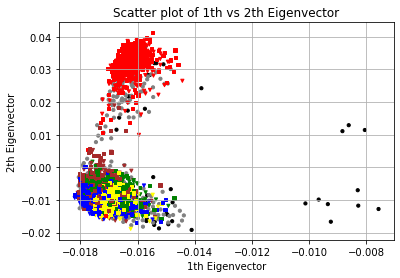

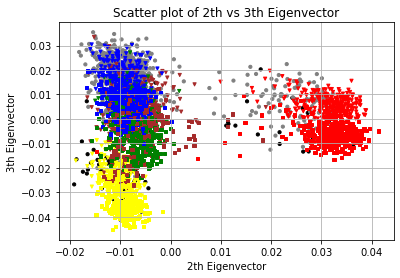

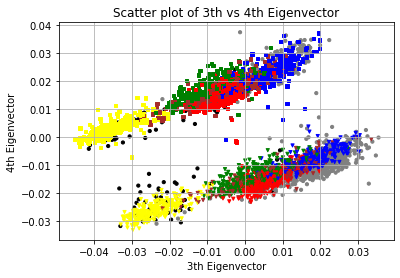

In [47]:
import matplotlib.pyplot as plt
    

def PlotDifferentShapes(x,y,U,colors,shapes,s = 1):

    diffshapes = cl.defaultdict(lambda: [[],[],[]])
    for xi, yi, color,shape in zip(U[:, x-1], U[:, y-1], colors,shapes):
        diffshapes[shape][0].append(xi)
        diffshapes[shape][1].append(yi)
        diffshapes[shape][2].append(color)
    
    for shape, diffshape in diffshapes.items():
        plt.scatter(diffshape[0], diffshape[1], c=diffshape[2],marker=shape, s = s)

    plt.xlabel(f'{x}th Eigenvector')
    plt.ylabel(f'{y}th Eigenvector')
    plt.title(f'Scatter plot of {x}th vs {y}th Eigenvector')
    plt.grid(True)
    plt.show()  


shapes = ['o'] * (matrix_norm.shape[0])
for index,name in enumerate(used_assem):
    name = name.split(".")[0]
    gender = genders.get(name,-1)
    if gender == 2:
        shapes[index+num_gtex+num_assem] = ","
    elif gender == 1:
        shapes[index+num_gtex+num_assem] = "v"


x,y  = 1,2
PlotDifferentShapes(x,y,U, colors,shapes,10)

x,y  = 2,3
PlotDifferentShapes(x,y,U, colors,shapes,10)

x,y  = 3,4
PlotDifferentShapes(x,y,U, colors,shapes,10)


In [108]:
list(U[0]).index(-min(abs(U[0])))

ValueError: -1.1157554504258562e-19 is not in list

In [ ]:
with open(filename, mode = 'r') as f:
    onekgheader = f.readline()

print(list(U[:, 0]).index(max(U[:, 0])))
print(list(matrix[:,113]))
print(max(list(matrix[:,2678])))
print(list(matrix[:,2678]).index(max(list(matrix[:,2678]))))
print(list(U[:, 0]).index(max(U[:, 0])))

print(onekgheader.split("\t")[2679-num_gtex - num_assem])
print([name for name, index in allele_index.items() if index == 26367])

In [ ]:
CNV_counts = {'NA19922': 29.0, 'NA19317': 35.0, 'HG01491': 36.0, 'NA19198': 36.0, 'HG02938': 38.0, 'HG01671': 39.0, 'NA19796': 39.0, 'HG02941': 39.0, 'NA19025': 39.0, 'NA19455': 40.0, 'NA19138': 40.0, 'HG02090': 40.0, 'HG01148': 41.0, 'HG02735': 41.0, 'NA12154': 41.0, 'HG01365': 41.0, 'HG00463': 41.0, 'HG02570': 41.0, 'HG03265': 41.0, 'NA19026': 41.0, 'NA18910': 41.0, 'HG03240': 41.0, 'NA18908': 41.0, 'HG00138': 42.0, 'HG01414': 42.0, 'HG01101': 42.0, 'HG02083': 42.0, 'HG03078': 42.0, 'NA19435': 42.0, 'HG00149': 43.0, 'HG01069': 43.0, 'HG01512': 43.0, 'NA20901': 43.0, 'HG02067': 43.0, 'HG00140': 43.0, 'HG01085': 43.0, 'NA20752': 43.0, 'HG01138': 43.0, 'HG01142': 43.0, 'NA20126': 43.0, 'HG03311': 43.0, 'HG02284': 43.0, 'NA18868': 43.0, 'NA19176': 43.0, 'NA19153': 43.0, 'HG02715': 43.0, 'HG03190': 43.0, 'HG01334': 44.0, 'NA21115': 44.0, 'HG01250': 44.0, 'NA20538': 44.0, 'HG02071': 44.0, 'HG01847': 44.0, 'HG01810': 44.0, 'NA18915': 44.0, 'HG02702': 44.0, 'HG03258': 44.0, 'HG02881': 44.0, 'HG02582': 44.0, 'NA20785': 45.0, 'HG00358': 45.0, 'HG01302': 45.0, 'NA20278': 45.0, 'HG04219': 45.0, 'HG02386': 45.0, 'HG04191': 45.0, 'NA12347': 45.0, 'HG03864': 45.0, 'HG00151': 45.0, 'HG01130': 45.0, 'NA19703': 45.0, 'HG03557': 45.0, 'NA18522': 45.0, 'NA20355': 45.0, 'HG03516': 45.0, 'NA20128': 45.0, 'HG02255': 45.0, 'HG02965': 45.0, 'NA19456': 45.0, 'HG02721': 45.0, 'HG03170': 45.0, 'NA19924': 45.0, 'HG02630': 45.0, 'HG02569': 45.0, 'HG03313': 45.0, 'HG02644': 45.0, 'HG02675': 45.0, 'NA19096': 45.0, 'HG00114': 46.0, 'HG04023': 46.0, 'HG01366': 46.0, 'HG01259': 46.0, 'HG01694': 46.0, 'NA19787': 46.0, 'HG02050': 46.0, 'NA18603': 46.0, 'NA19089': 46.0, 'HG01079': 46.0, 'HG00567': 46.0, 'HG00671': 46.0, 'HG00190': 46.0, 'NA20279': 46.0, 'NA19314': 46.0, 'NA19372': 46.0, 'HG02465': 46.0, 'NA19711': 46.0, 'HG02489': 46.0, 'HG01253': 46.0, 'HG03269': 46.0, 'HG03166': 46.0, 'NA19920': 46.0, 'HG02572': 46.0, 'NA19475': 46.0, 'HG02014': 46.0, 'HG02477': 46.0, 'HG02613': 46.0, 'HG02895': 46.0, 'NA19474': 46.0, 'HG03122': 46.0, 'HG02612': 46.0, 'NA19328': 46.0, 'HG02419': 46.0, 'NA19092': 46.0, 'HG01606': 47.0, 'HG04210': 47.0, 'HG01063': 47.0, 'HG01781': 47.0, 'HG01532': 47.0, 'HG01187': 47.0, 'NA19783': 47.0, 'NA18536': 47.0, 'HG01893': 47.0, 'NA19728': 47.0, 'HG01669': 47.0, 'HG01601': 47.0, 'HG02023': 47.0, 'NA18621': 47.0, 'HG00701': 47.0, 'HG01461': 47.0, 'HG03109': 47.0, 'HG02981': 47.0, 'HG03520': 47.0, 'NA19098': 47.0, 'HG01956': 47.0, 'HG03112': 47.0, 'HG03518': 47.0, 'HG03033': 47.0, 'HG03480': 47.0, 'HG03063': 47.0, 'HG02642': 47.0, 'HG02947': 47.0, 'HG00256': 48.0, 'HG01305': 48.0, 'HG01257': 48.0, 'HG00552': 48.0, 'HG01098': 48.0, 'HG00143': 48.0, 'NA21104': 48.0, 'HG01071': 48.0, 'HG00273': 48.0, 'HG04194': 48.0, 'NA19652': 48.0, 'HG01258': 48.0, 'NA18986': 48.0, 'HG01111': 48.0, 'HG02807': 48.0, 'NA18624': 48.0, 'NA18503': 48.0, 'HG02502': 48.0, 'HG02983': 48.0, 'NA19056': 48.0, 'NA19917': 48.0, 'HG03039': 48.0, 'HG03314': 48.0, 'HG02896': 48.0, 'HG02943': 48.0, 'HG03558': 48.0, 'NA19982': 48.0, 'HG03225': 48.0, 'NA19443': 48.0, 'HG01879': 48.0, 'NA19103': 48.0, 'HG02610': 48.0, 'HG03478': 48.0, 'HG03382': 48.0, 'HG03460': 48.0, 'NA19020': 48.0, 'HG00100': 49.0, 'HG01286': 49.0, 'HG01625': 49.0, 'HG00864': 49.0, 'NA19762': 49.0, 'NA21103': 49.0, 'HG01349': 49.0, 'HG00160': 49.0, 'HG00280': 49.0, 'HG01504': 49.0, 'HG01565': 49.0, 'NA19009': 49.0, 'HG02064': 49.0, 'NA21124': 49.0, 'NA20765': 49.0, 'NA19795': 49.0, 'HG03304': 49.0, 'NA18636': 49.0, 'HG02979': 49.0, 'HG02536': 49.0, 'HG03310': 49.0, 'NA19360': 49.0, 'NA18869': 49.0, 'NA19376': 49.0, 'HG02574': 49.0, 'HG02645': 49.0, 'HG04122': 49.0, 'HG02321': 49.0, 'NA19834': 49.0, 'HG03342': 49.0, 'HG02922': 49.0, 'HG03380': 49.0, 'HG02107': 49.0, 'HG02108': 49.0, 'NA18498': 49.0, 'HG03202': 49.0, 'NA19199': 49.0, 'HG03352': 49.0, 'NA19705': 49.0, 'HG02051': 49.0, 'HG02628': 49.0, 'NA19160': 49.0, 'HG03246': 49.0, 'NA19035': 49.0, 'NA20127': 49.0, 'HG02470': 49.0, 'NA18507': 49.0, 'HG03191': 49.0, 'NA19146': 49.0, 'HG03249': 49.0, 'HG03079': 49.0, 'NA12413': 50.0, 'NA12286': 50.0, 'HG01359': 50.0, 'NA12399': 50.0, 'NA19717': 50.0, 'HG03491': 50.0, 'HG02047': 50.0, 'HG02056': 50.0, 'HG03896': 50.0, 'HG02299': 50.0, 'HG02420': 50.0, 'HG01550': 50.0, 'NA12864': 50.0, 'HG01571': 50.0, 'HG02584': 50.0, 'HG00436': 50.0, 'HG02351': 50.0, 'HG01873': 50.0, 'NA19307': 50.0, 'HG01198': 50.0, 'HG02634': 50.0, 'NA18872': 50.0, 'HG01987': 50.0, 'NA19430': 50.0, 'NA19093': 50.0, 'HG01912': 50.0, 'HG03572': 50.0, 'HG01885': 50.0, 'HG02545': 50.0, 'NA19323': 50.0, 'HG02055': 50.0, 'HG02885': 50.0, 'HG03344': 50.0, 'HG02622': 50.0, 'NA19451': 50.0, 'HG03519': 50.0, 'HG03074': 50.0, 'HG02496': 50.0, 'NA20362': 50.0, 'NA20358': 50.0, 'HG01884': 50.0, 'HG02879': 50.0, 'HG02966': 50.0, 'NA19248': 50.0, 'HG03066': 50.0, 'HG00345': 51.0, 'HG01457': 51.0, 'NA20513': 51.0, 'NA10856': 51.0, 'NA20832': 51.0, 'HG01979': 51.0, 'NA20763': 51.0, 'HG00159': 51.0, 'HG00609': 51.0, 'HG01279': 51.0, 'HG01256': 51.0, 'HG02733': 51.0, 'HG00267': 51.0, 'HG04211': 51.0, 'NA20796': 51.0, 'HG04134': 51.0, 'NA19727': 51.0, 'NA19670': 51.0, 'NA12760': 51.0, 'HG03963': 51.0, 'HG01312': 51.0, 'NA19173': 51.0, 'HG03824': 51.0, 'HG01941': 51.0, 'HG00637': 51.0, 'HG01667': 51.0, 'HG01977': 51.0, 'HG00355': 51.0, 'NA18629': 51.0, 'HG01055': 51.0, 'HG02485': 51.0, 'NA12046': 51.0, 'NA19004': 51.0, 'HG03515': 51.0, 'NA18960': 51.0, 'NA19107': 51.0, 'NA19145': 51.0, 'HG02016': 51.0, 'HG03368': 51.0, 'NA18913': 51.0, 'NA19331': 51.0, 'NA19140': 51.0, 'HG03457': 51.0, 'HG03103': 51.0, 'HG03401': 51.0, 'NA19918': 51.0, 'NA18859': 51.0, 'HG03437': 51.0, 'NA19094': 51.0, 'HG03118': 51.0, 'HG03084': 51.0, 'HG03372': 51.0, 'HG03373': 51.0, 'HG02481': 51.0, 'NA18930': 51.0, 'NA19312': 51.0, 'NA18497': 51.0, 'HG02855': 51.0, 'HG03117': 51.0, 'HG02144': 51.0, 'NA19437': 51.0, 'HG02462': 51.0, 'NA12775': 52.0, 'HG01506': 52.0, 'NA12842': 52.0, 'HG00113': 52.0, 'HG01682': 52.0, 'HG01672': 52.0, 'HG00126': 52.0, 'HG00108': 52.0, 'NA20767': 52.0, 'NA21093': 52.0, 'HG01124': 52.0, 'NA20870': 52.0, 'HG02231': 52.0, 'HG00341': 52.0, 'HG01104': 52.0, 'HG02786': 52.0, 'NA11843': 52.0, 'NA10851': 52.0, 'NA11882': 52.0, 'HG01379': 52.0, 'NA19750': 52.0, 'NA21127': 52.0, 'HG02396': 52.0, 'HG01284': 52.0, 'HG01392': 52.0, 'HG01376': 52.0, 'HG01367': 52.0, 'NA19724': 52.0, 'NA19720': 52.0, 'HG00130': 52.0, 'HG02057': 52.0, 'HG00607': 52.0, 'NA20866': 52.0, 'NA19729': 52.0, 'HG02597': 52.0, 'HG03920': 52.0, 'HG02238': 52.0, 'HG01696': 52.0, 'HG01242': 52.0, 'NA19055': 52.0, 'NA19778': 52.0, 'HG02408': 52.0, 'HG02116': 52.0, 'HG03603': 52.0, 'HG04239': 52.0, 'HG02054': 52.0, 'HG01241': 52.0, 'NA19701': 52.0, 'NA19377': 52.0, 'HG02839': 52.0, 'NA19215': 52.0, 'HG03139': 52.0, 'NA18924': 52.0, 'NA19334': 52.0, 'HG03159': 52.0, 'NA19397': 52.0, 'NA19904': 52.0, 'HG02471': 52.0, 'NA19712': 52.0, 'NA19836': 52.0, 'NA19346': 52.0, 'HG02282': 52.0, 'NA18870': 52.0, 'HG02568': 52.0, 'HG02427': 52.0, 'NA18874': 52.0, 'NA20291': 52.0, 'HG03350': 52.0, 'HG03374': 52.0, 'HG03539': 52.0, 'NA19097': 52.0, 'HG02856': 52.0, 'HG03248': 52.0, 'HG03027': 52.0, 'HG03436': 52.0, 'HG03299': 52.0, 'NA18909': 52.0, 'HG01609': 53.0, 'HG00117': 53.0, 'HG01164': 53.0, 'NA20845': 53.0, 'HG01610': 53.0, 'HG01686': 53.0, 'NA20812': 53.0, 'NA20827': 53.0, 'HG02006': 53.0, 'HG01126': 53.0, 'HG00131': 53.0, 'NA19751': 53.0, 'HG00321': 53.0, 'NA21119': 53.0, 'HG00129': 53.0, 'HG01611': 53.0, 'HG01075': 53.0, 'HG02259': 53.0, 'NA18988': 53.0, 'NA20757': 53.0, 'HG01497': 53.0, 'NA12045': 53.0, 'NA21098': 53.0, 'HG00371': 53.0, 'HG01683': 53.0, 'NA21111': 53.0, 'NA19682': 53.0, 'HG01377': 53.0, 'HG01049': 53.0, 'HG01249': 53.0, 'HG01746': 53.0, 'HG02136': 53.0, 'HG01135': 53.0, 'NA21112': 53.0, 'HG02085': 53.0, 'NA18643': 53.0, 'HG00619': 53.0, 'HG03794': 53.0, 'HG00881': 53.0, 'HG01308': 53.0, 'HG01363': 53.0, 'HG01866': 53.0, 'HG04156': 53.0, 'HG03866': 53.0, 'NA19439': 53.0, 'NA19723': 53.0, 'HG00598': 53.0, 'HG02629': 53.0, 'HG01393': 53.0, 'NA19719': 53.0, 'NA18591': 53.0, 'NA19913': 53.0, 'HG03169': 53.0, 'HG02508': 53.0, 'NA19239': 53.0, 'NA19900': 53.0, 'NA19256': 53.0, 'HG02768': 53.0, 'HG03571': 53.0, 'HG02009': 53.0, 'NA18867': 53.0, 'HG03271': 53.0, 'HG02541': 53.0, 'HG02476': 53.0, 'HG03061': 53.0, 'NA19457': 53.0, 'HG02143': 53.0, 'HG02332': 53.0, 'NA18925': 53.0, 'HG02977': 53.0, 'HG03081': 53.0, 'HG03098': 53.0, 'HG03540': 53.0, 'HG03511': 53.0, 'NA18916': 53.0, 'HG02757': 53.0, 'HG03131': 53.0, 'HG03433': 53.0, 'NA19118': 53.0, 'HG03119': 53.0, 'NA18519': 53.0, 'HG02571': 53.0, 'HG02948': 53.0, 'NA19794': 54.0, 'HG00642': 54.0, 'HG01607': 54.0, 'HG01500': 54.0, 'HG02058': 54.0, 'HG03693': 54.0, 'HG02236': 54.0, 'HG02233': 54.0, 'NA19654': 54.0, 'HG02146': 54.0, 'HG02407': 54.0, 'HG04202': 54.0, 'NA06995': 54.0, 'HG01514': 54.0, 'NA12329': 54.0, 'HG01684': 54.0, 'HG01705': 54.0, 'NA20586': 54.0, 'HG04003': 54.0, 'HG04060': 54.0, 'HG01551': 54.0, 'HG02260': 54.0, 'HG03009': 54.0, 'HG02729': 54.0, 'HG03742': 54.0, 'NA19755': 54.0, 'HG00622': 54.0, 'HG00656': 54.0, 'HG03019': 54.0, 'HG01274': 54.0, 'HG01347': 54.0, 'NA12264': 54.0, 'HG01868': 54.0, 'HG02234': 54.0, 'HG00472': 54.0, 'NA18622': 54.0, 'HG03054': 54.0, 'HG03101': 54.0, 'HG01350': 54.0, 'HG02860': 54.0, 'HG01870': 54.0, 'NA19385': 54.0, 'NA18995': 54.0, 'HG01959': 54.0, 'HG03871': 54.0, 'NA19390': 54.0, 'HG01846': 54.0, 'HG02307': 54.0, 'HG02620': 54.0, 'HG01243': 54.0, 'NA19664': 54.0, 'NA19983': 54.0, 'HG03484': 54.0, 'NA18906': 54.0, 'NA19466': 54.0, 'NA20129': 54.0, 'NA20287': 54.0, 'HG03127': 54.0, 'HG02851': 54.0, 'NA19101': 54.0, 'HG02870': 54.0, 'HG03250': 54.0, 'HG03439': 54.0, 'HG02836': 54.0, 'NA19027': 54.0, 'NA20298': 54.0, 'HG02439': 54.0, 'NA18865': 54.0, 'NA19237': 54.0, 'NA19923': 54.0, 'HG02883': 54.0, 'NA19223': 54.0, 'NA19161': 54.0, 'HG02812': 54.0, 'HG03115': 54.0, 'NA20320': 54.0, 'HG03045': 54.0, 'NA11881': 55.0, 'NA20864': 55.0, 'NA19741': 55.0, 'HG02271': 55.0, 'NA18613': 55.0, 'HG01280': 55.0, 'HG01704': 55.0, 'HG01711': 55.0, 'HG02383': 55.0, 'HG01926': 55.0, 'HG04136': 55.0, 'HG01443': 55.0, 'HG00155': 55.0, 'NA10845': 55.0, 'HG00739': 55.0, 'NA06989': 55.0, 'HG04227': 55.0, 'HG00335': 55.0, 'NA20512': 55.0, 'NA19681': 55.0, 'NA20850': 55.0, 'HG03719': 55.0, 'NA11840': 55.0, 'HG04017': 55.0, 'HG01623': 55.0, 'NA19683': 55.0, 'NA12766': 55.0, 'HG02252': 55.0, 'NA18620': 55.0, 'HG01923': 55.0, 'HG03729': 55.0, 'HG01624': 55.0, 'NA21114': 55.0, 'HG02382': 55.0, 'HG03904': 55.0, 'NA20342': 55.0, 'HG02150': 55.0, 'HG02049': 55.0, 'HG03914': 55.0, 'NA20906': 55.0, 'HG03041': 55.0, 'HG04162': 55.0, 'HG03291': 55.0, 'HG02976': 55.0, 'HG03268': 55.0, 'HG03124': 55.0, 'HG03196': 55.0, 'NA18871': 55.0, 'HG02971': 55.0, 'HG02087': 55.0, 'HG02772': 55.0, 'HG02980': 55.0, 'HG03576': 55.0, 'HG02464': 55.0, 'NA18504': 55.0, 'HG03024': 55.0, 'NA19428': 55.0, 'HG02463': 55.0, 'NA19139': 55.0, 'HG02588': 55.0, 'HG02466': 55.0, 'NA18914': 55.0, 'HG03378': 55.0, 'NA18923': 55.0, 'HG03469': 55.0, 'NA19099': 55.0, 'HG03267': 55.0, 'NA19154': 55.0, 'HG03242': 55.0, 'HG01082': 56.0, 'NA11829': 56.0, 'HG01523': 56.0, 'HG03786': 56.0, 'HG01524': 56.0, 'HG02229': 56.0, 'NA20525': 56.0, 'NA12043': 56.0, 'NA12817': 56.0, 'NA12777': 56.0, 'HG03725': 56.0, 'HG01199': 56.0, 'HG01311': 56.0, 'HG03668': 56.0, 'NA20862': 56.0, 'HG03644': 56.0, 'NA11930': 56.0, 'NA12828': 56.0, 'HG00284': 56.0, 'HG01842': 56.0, 'NA19081': 56.0, 'HG03900': 56.0, 'HG01567': 56.0, 'HG00132': 56.0, 'HG03774': 56.0, 'NA12827': 56.0, 'NA19684': 56.0, 'HG03886': 56.0, 'HG01402': 56.0, 'HG04019': 56.0, 'HG01934': 56.0, 'HG00591': 56.0, 'HG00101': 56.0, 'HG02221': 56.0, 'HG02250': 56.0, 'HG02035': 56.0, 'HG02127': 56.0, 'HG04056': 56.0, 'NA19730': 56.0, 'HG01251': 56.0, 'HG03763': 56.0, 'HG02385': 56.0, 'HG02316': 56.0, 'HG03821': 56.0, 'NA10837': 56.0, 'HG03753': 56.0, 'NA11919': 56.0, 'NA12248': 56.0, 'HG04039': 56.0, 'HG04146': 56.0, 'HG01464': 56.0, 'NA18577': 56.0, 'NA21144': 56.0, 'HG01622': 56.0, 'NA18645': 56.0, 'NA20902': 56.0, 'HG01952': 56.0, 'NA19007': 56.0, 'NA19679': 56.0, 'HG03366': 56.0, 'HG00406': 56.0, 'HG02360': 56.0, 'HG00684': 56.0, 'HG02353': 56.0, 'HG02455': 56.0, 'HG03295': 56.0, 'NA20281': 56.0, 'HG02334': 56.0, 'NA18639': 56.0, 'HG03160': 56.0, 'HG03209': 56.0, 'NA19041': 56.0, 'HG02717': 56.0, 'NA19379': 56.0, 'NA19191': 56.0, 'HG02813': 56.0, 'NA19143': 56.0, 'NA19338': 56.0, 'HG03047': 56.0, 'NA19117': 56.0, 'NA19318': 56.0, 'HG02635': 56.0, 'NA19019': 56.0, 'NA19238': 56.0, 'HG02337': 56.0, 'NA19184': 56.0, 'NA19197': 56.0, 'HG03298': 56.0, 'HG03385': 56.0, 'HG03579': 56.0, 'NA19149': 56.0, 'NA19350': 56.0, 'HG01896': 56.0, 'HG03479': 56.0, 'HG02450': 56.0, 'HG01990': 56.0, 'HG02890': 56.0, 'HG03120': 56.0, 'HG02615': 56.0, 'NA19030': 56.0, 'HG03247': 56.0, 'NA20356': 56.0, 'NA19200': 56.0, 'HG03034': 56.0, 'NA20764': 57.0, 'NA20536': 57.0, 'NA12891': 57.0, 'NA11931': 57.0, 'HG03716': 57.0, 'NA07435': 57.0, 'HG01066': 57.0, 'HG01056': 57.0, 'HG03949': 57.0, 'NA20905': 57.0, 'HG01710': 57.0, 'HG02285': 57.0, 'HG00109': 57.0, 'NA12343': 57.0, 'HG02020': 57.0, 'NA07022': 57.0, 'NA10860': 57.0, 'HG01699': 57.0, 'HG00338': 57.0, 'HG03890': 57.0, 'NA20527': 57.0, 'HG00589': 57.0, 'HG02312': 57.0, 'NA12767': 57.0, 'HG01052': 57.0, 'HG01139': 57.0, 'HG00342': 57.0, 'HG01277': 57.0, 'HG03991': 57.0, 'HG01485': 57.0, 'HG01073': 57.0, 'HG01928': 57.0, 'NA19082': 57.0, 'NA20506': 57.0, 'NA20542': 57.0, 'HG03826': 57.0, 'HG03012': 57.0, 'HG00651': 57.0, 'HG01675': 57.0, 'NA20544': 57.0, 'HG01412': 57.0, 'HG03692': 57.0, 'HG02239': 57.0, 'HG01670': 57.0, 'HG01946': 57.0, 'HG01344': 57.0, 'HG01861': 57.0, 'NA19374': 57.0, 'HG03639': 57.0, 'NA19059': 57.0, 'HG02970': 57.0, 'HG02081': 57.0, 'NA20274': 57.0, 'HG01355': 57.0, 'HG03761': 57.0, 'NA20853': 57.0, 'HG02764': 57.0, 'HG02852': 57.0, 'HG00475': 57.0, 'NA19347': 57.0, 'HG01095': 57.0, 'NA19707': 57.0, 'HG02647': 57.0, 'NA20412': 57.0, 'NA19174': 57.0, 'NA19625': 57.0, 'HG03046': 57.0, 'HG02546': 57.0, 'NA20351': 57.0, 'NA19172': 57.0, 'HG01897': 57.0, 'NA19043': 57.0, 'NA20334': 57.0, 'NA18521': 57.0, 'HG03476': 57.0, 'NA18935': 57.0, 'NA19461': 57.0, 'NA19095': 57.0, 'HG02323': 57.0, 'NA18878': 57.0, 'NA19355': 57.0, 'HG01914': 57.0, 'HG03060': 57.0, 'HG03133': 57.0, 'HG02723': 57.0, 'NA19224': 57.0, 'NA19704': 57.0, 'NA19031': 57.0, 'HG02944': 57.0, 'HG03128': 57.0, 'NA19319': 57.0, 'NA19221': 57.0, 'HG02815': 57.0, 'HG02892': 57.0, 'HG02511': 57.0, 'HG02814': 57.0, 'HG03486': 57.0, 'NA19383': 57.0, 'HG03301': 57.0, 'HG03134': 57.0, 'HG01084': 58.0, 'HG01521': 58.0, 'NA12829': 58.0, 'NA10838': 58.0, 'HG01784': 58.0, 'HG01687': 58.0, 'HG01617': 58.0, 'HG00379': 58.0, 'NA07051': 58.0, 'NA20807': 58.0, 'NA12056': 58.0, 'HG01389': 58.0, 'HG01505': 58.0, 'HG00158': 58.0, 'NA12146': 58.0, 'HG03646': 58.0, 'HG01685': 58.0, 'NA19764': 58.0, 'HG01106': 58.0, 'NA20521': 58.0, 'NA12716': 58.0, 'HG01197': 58.0, 'HG02018': 58.0, 'HG03006': 58.0, 'HG01173': 58.0, 'NA18977': 58.0, 'HG01058': 58.0, 'HG00269': 58.0, 'HG00621': 58.0, 'HG01776': 58.0, 'HG03812': 58.0, 'NA20892': 58.0, 'HG00664': 58.0, 'HG00583': 58.0, 'HG01189': 58.0, 'HG02790': 58.0, 'HG02792': 58.0, 'NA19660': 58.0, 'HG00103': 58.0, 'HG02232': 58.0, 'HG01255': 58.0, 'HG03689': 58.0, 'HG01353': 58.0, 'NA18549': 58.0, 'HG03008': 58.0, 'HG00625': 58.0, 'HG01490': 58.0, 'NA19321': 58.0, 'HG00620': 58.0, 'NA20296': 58.0, 'HG01435': 58.0, 'NA19789': 58.0, 'HG02082': 58.0, 'NA19908': 58.0, 'NA18982': 58.0, 'HG02759': 58.0, 'HG03260': 58.0, 'HG03040': 58.0, 'HG03026': 58.0, 'NA20294': 58.0, 'HG02945': 58.0, 'NA18876': 58.0, 'HG03161': 58.0, 'HG03371': 58.0, 'HG02763': 58.0, 'NA19100': 58.0, 'HG03452': 58.0, 'NA18486': 58.0, 'HG02012': 58.0, 'NA20332': 58.0, 'NA19177': 58.0, 'HG02573': 58.0, 'HG03050': 58.0, 'NA19901': 58.0, 'NA20321': 58.0, 'HG01894': 58.0, 'HG02816': 58.0, 'HG02314': 58.0, 'HG02451': 58.0, 'NA18856': 58.0, 'HG02145': 58.0, 'HG02964': 58.0, 'HG03130': 58.0, 'HG02946': 58.0, 'HG01513': 59.0, 'NA10859': 59.0, 'HG01432': 59.0, 'HG00362': 59.0, 'HG00245': 59.0, 'NA12044': 59.0, 'NA20847': 59.0, 'NA11994': 59.0, 'HG01110': 59.0, 'NA18966': 59.0, 'HG03492': 59.0, 'HG01170': 59.0, 'HG00106': 59.0, 'HG00242': 59.0, 'HG02738': 59.0, 'HG03990': 59.0, 'NA12752': 59.0, 'HG00260': 59.0, 'HG03969': 59.0, 'HG01518': 59.0, 'HG01552': 59.0, 'HG04199': 59.0, 'HG01137': 59.0, 'HG01099': 59.0, 'HG00372': 59.0, 'HG01088': 59.0, 'HG01161': 59.0, 'HG03727': 59.0, 'NA19756': 59.0, 'HG01864': 59.0, 'HG02656': 59.0, 'HG02126': 59.0, 'HG02425': 59.0, 'HG03985': 59.0, 'HG00324': 59.0, 'HG01175': 59.0, 'NA19678': 59.0, 'HG01538': 59.0, 'NA20505': 59.0, 'HG01783': 59.0, 'HG03702': 59.0, 'NA12718': 59.0, 'HG04061': 59.0, 'NA19792': 59.0, 'NA21109': 59.0, 'NA19772': 59.0, 'HG00378': 59.0, 'HG01061': 59.0, 'HG04157': 59.0, 'HG04204': 59.0, 'NA10840': 59.0, 'HG01577': 59.0, 'NA19790': 59.0, 'NA18989': 59.0, 'HG00148': 59.0, 'HG01358': 59.0, 'HG04075': 59.0, 'HG01983': 59.0, 'HG01948': 59.0, 'HG01527': 59.0, 'HG01976': 59.0, 'HG02274': 59.0, 'HG00685': 59.0, 'HG02821': 59.0, 'NA18965': 59.0, 'NA19171': 59.0, 'NA18747': 59.0, 'NA20884': 59.0, 'HG04217': 59.0, 'NA19113': 59.0, 'HG01947': 59.0, 'NA18505': 59.0, 'NA18990': 59.0, 'HG03069': 59.0, 'NA19471': 59.0, 'HG01985': 59.0, 'HG04127': 59.0, 'NA19206': 59.0, 'HG01960': 59.0, 'NA19454': 59.0, 'NA19473': 59.0, 'HG03113': 59.0, 'HG02804': 59.0, 'NA19384': 59.0, 'HG03082': 59.0, 'NA19186': 59.0, 'HG03517': 59.0, 'NA19189': 59.0, 'NA19122': 59.0, 'HG02325': 59.0, 'HG02575': 59.0, 'HG02884': 59.0, 'HG02887': 59.0, 'NA19127': 59.0, 'HG03302': 59.0, 'HG03351': 59.0, 'NA18917': 59.0, 'HG03251': 59.0, 'HG01895': 59.0, 'HG02643': 59.0, 'NA19207': 59.0, 'HG03056': 59.0, 'HG02799': 59.0, 'HG03110': 59.0, 'NA20346': 59.0, 'HG02862': 59.0, 'HG03193': 59.0, 'NA18877': 59.0, 'NA18499': 59.0, 'HG02798': 59.0, 'HG03308': 59.0, 'HG02882': 59.0, 'NA18911': 59.0, 'HG02952': 59.0, 'NA19148': 59.0, 'HG02111': 59.0, 'HG03354': 59.0, 'HG03577': 59.0, 'NA12813': 60.0, 'HG01770': 60.0, 'NA06993': 60.0, 'HG00383': 60.0, 'HG01502': 60.0, 'HG00365': 60.0, 'NA20790': 60.0, 'NA19088': 60.0, 'HG01433': 60.0, 'HG01678': 60.0, 'NA12778': 60.0, 'NA19716': 60.0, 'HG01603': 60.0, 'NA21141': 60.0, 'NA12414': 60.0, 'NA19776': 60.0, 'NA20799': 60.0, 'NA07348': 60.0, 'HG00308': 60.0, 'HG01969': 60.0, 'HG02265': 60.0, 'HG01765': 60.0, 'HG03636': 60.0, 'NA20910': 60.0, 'HG00734': 60.0, 'NA20588': 60.0, 'NA20754': 60.0, 'NA20815': 60.0, 'HG01698': 60.0, 'NA20769': 60.0, 'HG00116': 60.0, 'HG01816': 60.0, 'HG01844': 60.0, 'HG00266': 60.0, 'NA18539': 60.0, 'NA12282': 60.0, 'HG02073': 60.0, 'NA07000': 60.0, 'NA18749': 60.0, 'NA12750': 60.0, 'NA20760': 60.0, 'HG00698': 60.0, 'HG00673': 60.0, 'HG00097': 60.0, 'HG01709': 60.0, 'NA10835': 60.0, 'HG01943': 60.0, 'HG03594': 60.0, 'HG03790': 60.0, 'NA18538': 60.0, 'NA10854': 60.0, 'HG01398': 60.0, 'HG04006': 60.0, 'HG01176': 60.0, 'HG04096': 60.0, 'HG00565': 60.0, 'HG02134': 60.0, 'NA19658': 60.0, 'NA20792': 60.0, 'HG01174': 60.0, 'NA21092': 60.0, 'HG01125': 60.0, 'HG02492': 60.0, 'HG02262': 60.0, 'NA19780': 60.0, 'HG03738': 60.0, 'HG04022': 60.0, 'HG02650': 60.0, 'NA18610': 60.0, 'NA20867': 60.0, 'HG03629': 60.0, 'HG03919': 60.0, 'HG01988': 60.0, 'HG02557': 60.0, 'HG00465': 60.0, 'HG01062': 60.0, 'HG02525': 60.0, 'HG02880': 60.0, 'NA19214': 60.0, 'HG02558': 60.0, 'HG02704': 60.0, 'HG02978': 60.0, 'NA19308': 60.0, 'NA19916': 60.0, 'NA19315': 60.0, 'NA19037': 60.0, 'NA19150': 60.0, 'HG03453': 60.0, 'HG02621': 60.0, 'HG02886': 60.0, 'HG03091': 60.0, 'HG03172': 60.0, 'HG02853': 60.0, 'HG02461': 60.0, 'NA19403': 60.0, 'NA18873': 60.0, 'NA18488': 60.0, 'HG03394': 60.0, 'NA19452': 60.0, 'NA19902': 60.0, 'HG02537': 60.0, 'HG03175': 60.0, 'NA19463': 60.0, 'HG03538': 60.0, 'HG02837': 60.0, 'HG03099': 60.0, 'NA19141': 60.0, 'NA19204': 60.0, 'HG02636': 60.0, 'HG02587': 60.0, 'HG03464': 60.0, 'HG03116': 60.0, 'NA19226': 60.0, 'HG03391': 60.0, 'HG00234': 61.0, 'NA12889': 61.0, 'HG00233': 61.0, 'HG00154': 61.0, 'NA20805': 61.0, 'HG01167': 61.0, 'HG04228': 61.0, 'NA20800': 61.0, 'HG00133': 61.0, 'NA12485': 61.0, 'HG02215': 61.0, 'HG00102': 61.0, 'HG02681': 61.0, 'NA20891': 61.0, 'NA12707': 61.0, 'HG03906': 61.0, 'NA19725': 61.0, 'NA20581': 61.0, 'HG03965': 61.0, 'HG01271': 61.0, 'HG03765': 61.0, 'NA20529': 61.0, 'HG01395': 61.0, 'HG03694': 61.0, 'HG02783': 61.0, 'NA20810': 61.0, 'NA20875': 61.0, 'HG00675': 61.0, 'HG01932': 61.0, 'NA18971': 61.0, 'NA20804': 61.0, 'HG01252': 61.0, 'HG01080': 61.0, 'HG00189': 61.0, 'HG01967': 61.0, 'HG02390': 61.0, 'HG01510': 61.0, 'HG00122': 61.0, 'NA18745': 61.0, 'HG03974': 61.0, 'HG00421': 61.0, 'HG00551': 61.0, 'HG04193': 61.0, 'NA07357': 61.0, 'HG01378': 61.0, 'HG02355': 61.0, 'HG03607': 61.0, 'HG02794': 61.0, 'NA21123': 61.0, 'HG03867': 61.0, 'HG03917': 61.0, 'NA20876': 61.0, 'HG01054': 61.0, 'HG03887': 61.0, 'NA19761': 61.0, 'HG01372': 61.0, 'NA20911': 61.0, 'HG01466': 61.0, 'HG02433': 61.0, 'NA18547': 61.0, 'HG01927': 61.0, 'HG01890': 61.0, 'HG03667': 61.0, 'HG02122': 61.0, 'HG01122': 61.0, 'HG02841': 61.0, 'HG03986': 61.0, 'NA19091': 61.0, 'NA19748': 61.0, 'HG00428': 61.0, 'HG01403': 61.0, 'NA20517': 61.0, 'NA19732': 61.0, 'HG01060': 61.0, 'HG01862': 61.0, 'HG03746': 61.0, 'HG04002': 61.0, 'HG02490': 61.0, 'HG03953': 61.0, 'NA18632': 61.0, 'HG00740': 61.0, 'HG00512': 61.0, 'HG01028': 61.0, 'HG01845': 61.0, 'HG01537': 61.0, 'HG03999': 61.0, 'HG02972': 61.0, 'NA19984': 61.0, 'HG04161': 61.0, 'NA19401': 61.0, 'HG02838': 61.0, 'HG02281': 61.0, 'HG03451': 61.0, 'HG01109': 61.0, 'NA19819': 61.0, 'HG02590': 61.0, 'HG03212': 61.0, 'HG02968': 61.0, 'NA19235': 61.0, 'HG03370': 61.0, 'HG02555': 61.0, 'NA19128': 61.0, 'HG02676': 61.0, 'HG02722': 61.0, 'HG02756': 61.0, 'NA19210': 61.0, 'HG02924': 61.0, 'HG02497': 61.0, 'HG02954': 61.0, 'HG03055': 61.0, 'HG03224': 61.0, 'HG02258': 61.0, 'NA18862': 61.0, 'HG00264': 62.0, 'HG01708': 62.0, 'HG03686': 62.0, 'HG04020': 62.0, 'HG01616': 62.0, 'HG00328': 62.0, 'HG01182': 62.0, 'HG02701': 62.0, 'NA19661': 62.0, 'HG01188': 62.0, 'HG00343': 62.0, 'HG03788': 62.0, 'HG01150': 62.0, 'HG01141': 62.0, 'HG03992': 62.0, 'NA19662': 62.0, 'HG04131': 62.0, 'NA12812': 62.0, 'HG03720': 62.0, 'HG01680': 62.0, 'HG02687': 62.0, 'HG01474': 62.0, 'HG03022': 62.0, 'NA20771': 62.0, 'NA18944': 62.0, 'HG00384': 62.0, 'HG01707': 62.0, 'NA12749': 62.0, 'NA12057': 62.0, 'HG00732': 62.0, 'HG04062': 62.0, 'HG04155': 62.0, 'NA21087': 62.0, 'HG00339': 62.0, 'NA11832': 62.0, 'NA12874': 62.0, 'NA19076': 62.0, 'NA20897': 62.0, 'HG00736': 62.0, 'HG04029': 62.0, 'HG00252': 62.0, 'HG02398': 62.0, 'HG03784': 62.0, 'HG01369': 62.0, 'HG00112': 62.0, 'HG01991': 62.0, 'HG02367': 62.0, 'NA18561': 62.0, 'HG01968': 62.0, 'HG01272': 62.0, 'NA19747': 62.0, 'HG02138': 62.0, 'NA07019': 62.0, 'HG01459': 62.0, 'HG03941': 62.0, 'NA19058': 62.0, 'NA20881': 62.0, 'HG03950': 62.0, 'HG04175': 62.0, 'HG02724': 62.0, 'HG00628': 62.0, 'HG02004': 62.0, 'HG02406': 62.0, 'HG02648': 62.0, 'HG03270': 62.0, 'NA12872': 62.0, 'HG03007': 62.0, 'NA11992': 62.0, 'HG00542': 62.0, 'HG01281': 62.0, 'NA18635': 62.0, 'NA20507': 62.0, 'HG00448': 62.0, 'HG00703': 62.0, 'HG00728': 62.0, 'HG01488': 62.0, 'HG01261': 62.0, 'HG02002': 62.0, 'HG03795': 62.0, 'HG03837': 62.0, 'NA18515': 62.0, 'HG01998': 62.0, 'HG03280': 62.0, 'HG04115': 62.0, 'HG01805': 62.0, 'HG03718': 62.0, 'HG02384': 62.0, 'NA18520': 62.0, 'HG02589': 62.0, 'NA20318': 62.0, 'HG02585': 62.0, 'HG01798': 62.0, 'HG01087': 62.0, 'HG03025': 62.0, 'NA19431': 62.0, 'HG02308': 62.0, 'HG03556': 62.0, 'NA19123': 62.0, 'NA19309': 62.0, 'HG03048': 62.0, 'NA18853': 62.0, 'NA19042': 62.0, 'NA20348': 62.0, 'HG03583': 62.0, 'HG03125': 62.0, 'HG02769': 62.0, 'HG03035': 62.0, 'NA19131': 62.0, 'NA19023': 62.0, 'NA19324': 62.0, 'HG01881': 62.0, 'HG03388': 62.0, 'HG02611': 62.0, 'HG03164': 62.0, 'HG03086': 62.0, 'HG02677': 62.0, 'NA18933': 62.0, 'HG03303': 62.0, 'NA18855': 62.0, 'HG02808': 62.0, 'NA19240': 62.0, 'HG02891': 62.0, 'HG03584': 62.0, 'NA18857': 62.0, 'HG03132': 62.0, 'HG01204': 63.0, 'HG02736': 63.0, 'HG01515': 63.0, 'HG01748': 63.0, 'NA21116': 63.0, 'HG00096': 63.0, 'HG00119': 63.0, 'NA11920': 63.0, 'NA20787': 63.0, 'HG00731': 63.0, 'HG01070': 63.0, 'NA06994': 63.0, 'HG01456': 63.0, 'HG00243': 63.0, 'NA07048': 63.0, 'HG01703': 63.0, 'HG01455': 63.0, 'NA20518': 63.0, 'NA07029': 63.0, 'HG01892': 63.0, 'HG00278': 63.0, 'HG01351': 63.0, 'HG03600': 63.0, 'HG01447': 63.0, 'HG01064': 63.0, 'NA20869': 63.0, 'HG01191': 63.0, 'HG01801': 63.0, 'HG03697': 63.0, 'NA19685': 63.0, 'NA20895': 63.0, 'HG03679': 63.0, 'HG02008': 63.0, 'HG02696': 63.0, 'HG03717': 63.0, 'HG02304': 63.0, 'HG00578': 63.0, 'HG04173': 63.0, 'HG04198': 63.0, 'HG02661': 63.0, 'NA18978': 63.0, 'HG01352': 63.0, 'HG03807': 63.0, 'HG00176': 63.0, 'HG01986': 63.0, 'HG03660': 63.0, 'HG00566': 63.0, 'HG01511': 63.0, 'HG02691': 63.0, 'NA19655': 63.0, 'NA20852': 63.0, 'HG02493': 63.0, 'NA18582': 63.0, 'HG02762': 63.0, 'HG00652': 63.0, 'HG00477': 63.0, 'HG03616': 63.0, 'HG03797': 63.0, 'NA19919': 63.0, 'HG01493': 63.0, 'HG00613': 63.0, 'HG01107': 63.0, 'HG02409': 63.0, 'HG03596': 63.0, 'NA20299': 63.0, 'NA18637': 63.0, 'HG04182': 63.0, 'HG00691': 63.0, 'HG03606': 63.0, 'HG03397': 63.0, 'NA19818': 63.0, 'HG01390': 63.0, 'NA19120': 63.0, 'HG01944': 63.0, 'NA19213': 63.0, 'HG01463': 63.0, 'HG02052': 63.0, 'HG01891': 63.0, 'HG01915': 63.0, 'HG03096': 63.0, 'NA18740': 63.0, 'HG02257': 63.0, 'HG03432': 63.0, 'HG02809': 63.0, 'HG02339': 63.0, 'HG02878': 63.0, 'HG02678': 63.0, 'NA19175': 63.0, 'HG03306': 63.0, 'NA19835': 63.0, 'HG03307': 63.0, 'HG03449': 63.0, 'HG03485': 63.0, 'HG02586': 63.0, 'HG02810': 63.0, 'HG02818': 63.0, 'NA20809': 64.0, 'HG01507': 64.0, 'HG01438': 64.0, 'NA11932': 64.0, 'NA20540': 64.0, 'HG03875': 64.0, 'HG00186': 64.0, 'NA07045': 64.0, 'HG01762': 64.0, 'HG02603': 64.0, 'HG02774': 64.0, 'NA21095': 64.0, 'NA20519': 64.0, 'NA20863': 64.0, 'HG03750': 64.0, 'HG01526': 64.0, 'HG02077': 64.0, 'NA12005': 64.0, 'HG02219': 64.0, 'NA20755': 64.0, 'NA21106': 64.0, 'HG00137': 64.0, 'NA12873': 64.0, 'HG00259': 64.0, 'HG01140': 64.0, 'HG02147': 64.0, 'HG02660': 64.0, 'HG02030': 64.0, 'HG03863': 64.0, 'HG00121': 64.0, 'HG00238': 64.0, 'HG01083': 64.0, 'NA12234': 64.0, 'NA19763': 64.0, 'HG01774': 64.0, 'NA20530': 64.0, 'NA12249': 64.0, 'HG00329': 64.0, 'NA18606': 64.0, 'HG01556': 64.0, 'HG02391': 64.0, 'NA18617': 64.0, 'HG01119': 64.0, 'NA18552': 64.0, 'NA19788': 64.0, 'NA20516': 64.0, 'HG00582': 64.0, 'HG03624': 64.0, 'NA20795': 64.0, 'NA21118': 64.0, 'NA18941': 64.0, 'HG02657': 64.0, 'HG02984': 64.0, 'HG04107': 64.0, 'NA19671': 64.0, 'HG03703': 64.0, 'HG03971': 64.0, 'HG04001': 64.0, 'HG03589': 64.0, 'NA19079': 64.0, 'HG02027': 64.0, 'HG01077': 64.0, 'HG01205': 64.0, 'HG02078': 64.0, 'NA12344': 64.0, 'HG01354': 64.0, 'NA20778': 64.0, 'HG00704': 64.0, 'NA19119': 64.0, 'HG01965': 64.0, 'HG01383': 64.0, 'NA12272': 64.0, 'NA20276': 64.0, 'HG01815': 64.0, 'HG02773': 64.0, 'HG01989': 64.0, 'HG02133': 64.0, 'HG02583': 64.0, 'NA18516': 64.0, 'NA19144': 64.0, 'NA18484': 64.0, 'HG02442': 64.0, 'NA19713': 64.0, 'HG03272': 64.0, 'HG02280': 64.0, 'NA18510': 64.0, 'HG02095': 64.0, 'NA19320': 64.0, 'NA19225': 64.0, 'HG02840': 64.0, 'HG01886': 64.0, 'NA19375': 64.0, 'NA19467': 64.0, 'HG02594': 64.0, 'NA18879': 64.0, 'HG02667': 64.0, 'HG03428': 64.0, 'HG03073': 64.0, 'HG02563': 64.0, 'HG03126': 64.0, 'HG03241': 64.0, 'HG03582': 64.0, 'HG02554': 64.0, 'HG00173': 65.0, 'HG01757': 65.0, 'HG00310': 65.0, 'HG00640': 65.0, 'HG00110': 65.0, 'HG03745': 65.0, 'HG00115': 65.0, 'HG01618': 65.0, 'HG01439': 65.0, 'HG02699': 65.0, 'HG02788': 65.0, 'HG00263': 65.0, 'HG01068': 65.0, 'NA10830': 65.0, 'HG01323': 65.0, 'HG01361': 65.0, 'HG00327': 65.0, 'NA20882': 65.0, 'NA20520': 65.0, 'NA12843': 65.0, 'NA18991': 65.0, 'HG03733': 65.0, 'HG03898': 65.0, 'HG01494': 65.0, 'HG02652': 65.0, 'NA12155': 65.0, 'HG01615': 65.0, 'HG01121': 65.0, 'HG02223': 65.0, 'HG01501': 65.0, 'HG03976': 65.0, 'HG00381': 65.0, 'HG01614': 65.0, 'HG02373': 65.0, 'HG01149': 65.0, 'HG01681': 65.0, 'HG01276': 65.0, 'HG01200': 65.0, 'NA21125': 65.0, 'HG02727': 65.0, 'HG01248': 65.0, 'HG02302': 65.0, 'NA18572': 65.0, 'NA19735': 65.0, 'HG00111': 65.0, 'HG01050': 65.0, 'HG01384': 65.0, 'HG02287': 65.0, 'HG02787': 65.0, 'HG03699': 65.0, 'HG00188': 65.0, 'HG00627': 65.0, 'HG02152': 65.0, 'HG01273': 65.0, 'HG00332': 65.0, 'HG02698': 65.0, 'HG03487': 65.0, 'HG02261': 65.0, 'NA18531': 65.0, 'HG00174': 65.0, 'HG04118': 65.0, 'HG01131': 65.0, 'HG02040': 65.0, 'NA19060': 65.0, 'NA19068': 65.0, 'NA20819': 65.0, 'HG01933': 65.0, 'HG01529': 65.0, 'NA19757': 65.0, 'HG01325': 65.0, 'HG02690': 65.0, 'HG02283': 65.0, 'HG00451': 65.0, 'HG03015': 65.0, 'HG03672': 65.0, 'HG01978': 65.0, 'HG02445': 65.0, 'HG00636': 65.0, 'HG03772': 65.0, 'HG02091': 65.0, 'HG00690': 65.0, 'HG04176': 65.0, 'NA19380': 65.0, 'HG00444': 65.0, 'HG01583': 65.0, 'HG03565': 65.0, 'HG03100': 65.0, 'NA19775': 65.0, 'HG02375': 65.0, 'HG00459': 65.0, 'NA19102': 65.0, 'HG02975': 65.0, 'HG03136': 65.0, 'HG03029': 65.0, 'HG02666': 65.0, 'HG03297': 65.0, 'HG03575': 65.0, 'NA19038': 65.0, 'NA18523': 65.0, 'NA18511': 65.0, 'NA19351': 65.0, 'HG03522': 65.0, 'NA20317': 65.0, 'NA19316': 65.0, 'HG03108': 65.0, 'HG03410': 65.0, 'NA19121': 65.0, 'HG02817': 65.0, 'HG02309': 65.0, 'NA19185': 65.0, 'NA19036': 65.0, 'HG01889': 65.0, 'HG02776': 66.0, 'NA10857': 66.0, 'NA12801': 66.0, 'NA10846': 66.0, 'HG00105': 66.0, 'HG04033': 66.0, 'HG00246': 66.0, 'HG00313': 66.0, 'NA12386': 66.0, 'HG03945': 66.0, 'HG01053': 66.0, 'HG01920': 66.0, 'HG00258': 66.0, 'HG04212': 66.0, 'HG02686': 66.0, 'HG00177': 66.0, 'HG02253': 66.0, 'NA12546': 66.0, 'NA20813': 66.0, 'HG01067': 66.0, 'HG01396': 66.0, 'NA18550': 66.0, 'HG00356': 66.0, 'HG03817': 66.0, 'HG03625': 66.0, 'HG01953': 66.0, 'HG03663': 66.0, 'HG03809': 66.0, 'HG03611': 66.0, 'NA20818': 66.0, 'HG00254': 66.0, 'HG00410': 66.0, 'HG03872': 66.0, 'HG04206': 66.0, 'HG01303': 66.0, 'HG02132': 66.0, 'HG00145': 66.0, 'HG03825': 66.0, 'HG03593': 66.0, 'NA12335': 66.0, 'NA20783': 66.0, 'NA20828': 66.0, 'HG00419': 66.0, 'NA18983': 66.0, 'HG04174': 66.0, 'NA19083': 66.0, 'HG01937': 66.0, 'HG01951': 66.0, 'HG01970': 66.0, 'NA20766': 66.0, 'HG01096': 66.0, 'HG00707': 66.0, 'NA18570': 66.0, 'HG02410': 66.0, 'HG02120': 66.0, 'NA12762': 66.0, 'HG00978': 66.0, 'NA19653': 66.0, 'HG01974': 66.0, 'HG02397': 66.0, 'NA19721': 66.0, 'HG01391': 66.0, 'HG01790': 66.0, 'HG03816': 66.0, 'NA18642': 66.0, 'HG02501': 66.0, 'NA19462': 66.0, 'HG00629': 66.0, 'NA19438': 66.0, 'HG01342': 66.0, 'HG02318': 66.0, 'HG03343': 66.0, 'NA18517': 66.0, 'HG03367': 66.0, 'HG03926': 66.0, 'NA19130': 66.0, 'NA19378': 66.0, 'NA20282': 66.0, 'HG03135': 66.0, 'NA19109': 66.0, 'HG03567': 66.0, 'NA19211': 66.0, 'HG03499': 66.0, 'NA19137': 66.0, 'NA19391': 66.0, 'NA18500': 66.0, 'HG03259': 66.0, 'HG03472': 66.0, 'HG03461': 66.0, 'HG03162': 66.0, 'HG02800': 66.0, 'NA18934': 66.0, 'HG03455': 66.0, 'HG03446': 66.0, 'NA12814': 67.0, 'HG03651': 67.0, 'HG04099': 67.0, 'HG03922': 67.0, 'NA20889': 67.0, 'HG01508': 67.0, 'NA20535': 67.0, 'HG03968': 67.0, 'HG02791': 67.0, 'NA12865': 67.0, 'HG01278': 67.0, 'HG03851': 67.0, 'HG03229': 67.0, 'NA21126': 67.0, 'HG01771': 67.0, 'HG01775': 67.0, 'HG02181': 67.0, 'NA18962': 67.0, 'HG00274': 67.0, 'HG01275': 67.0, 'HG02402': 67.0, 'HG00309': 67.0, 'HG02784': 67.0, 'HG03695': 67.0, 'NA19726': 67.0, 'HG00500': 67.0, 'HG01172': 67.0, 'HG03021': 67.0, 'HG00323': 67.0, 'HG03868': 67.0, 'HG01695': 67.0, 'NA19650': 67.0, 'NA20904': 67.0, 'HG00735': 67.0, 'NA20539': 67.0, 'HG00524': 67.0, 'HG03862': 67.0, 'NA07055': 67.0, 'NA19784': 67.0, 'NA20798': 67.0, 'HG02389': 67.0, 'HG02135': 67.0, 'HG02184': 67.0, 'HG03934': 67.0, 'HG04144': 67.0, 'HG01605': 67.0, 'HG03882': 67.0, 'NA20849': 67.0, 'HG01620': 67.0, 'HG02048': 67.0, 'HG01857': 67.0, 'NA18626': 67.0, 'HG03973': 67.0, 'HG01081': 67.0, 'HG01859': 67.0, 'HG01440': 67.0, 'HG03707': 67.0, 'HG03754': 67.0, 'HG04100': 67.0, 'NA19771': 67.0, 'HG00694': 67.0, 'HG01849': 67.0, 'HG01840': 67.0, 'HG03955': 67.0, 'HG03836': 67.0, 'HG01843': 67.0, 'HG01874': 67.0, 'HG04164': 67.0, 'HG01942': 67.0, 'NA18596': 67.0, 'NA18615': 67.0, 'HG03799': 67.0, 'HG00635': 67.0, 'HG02317': 67.0, 'HG01385': 67.0, 'HG02982': 67.0, 'HG03857': 67.0, 'HG03077': 67.0, 'HG00171': 67.0, 'HG03744': 67.0, 'HG01880': 67.0, 'HG02015': 67.0, 'HG01183': 67.0, 'HG03458': 67.0, 'HG00708': 67.0, 'HG01950': 67.0, 'NA18912': 67.0, 'HG02395': 67.0, 'NA19108': 67.0, 'HG02580': 67.0, 'HG02561': 67.0, 'HG03114': 67.0, 'NA19142': 67.0, 'NA19201': 67.0, 'HG03574': 67.0, 'HG03168': 67.0, 'NA19436': 67.0, 'HG02614': 67.0, 'HG03085': 67.0, 'HG00139': 68.0, 'NA12400': 68.0, 'HG00382': 68.0, 'HG01772': 68.0, 'NA10847': 68.0, 'HG00182': 68.0, 'NA20543': 68.0, 'HG00336': 68.0, 'HG03631': 68.0, 'HG04076': 68.0, 'NA12340': 68.0, 'HG01360': 68.0, 'HG01766': 68.0, 'HG01756': 68.0, 'HG03649': 68.0, 'NA19731': 68.0, 'NA20514': 68.0, 'NA18573': 68.0, 'NA21128': 68.0, 'NA18970': 68.0, 'HG00653': 68.0, 'HG03713': 68.0, 'NA12144': 68.0, 'HG01074': 68.0, 'HG01536': 68.0, 'HG04132': 68.0, 'NA20846': 68.0, 'HG03869': 68.0, 'HG01345': 68.0, 'NA18757': 68.0, 'HG00277': 68.0, 'HG00361': 68.0, 'HG00187': 68.0, 'HG00183': 68.0, 'HG02084': 68.0, 'HG03684': 68.0, 'NA10863': 68.0, 'HG01984': 68.0, 'HG03489': 68.0, 'HG03978': 68.0, 'NA20861': 68.0, 'HG01802': 68.0, 'HG04093': 68.0, 'NA20509': 68.0, 'HG03633': 68.0, 'NA21100': 68.0, 'HG00445': 68.0, 'HG00693': 68.0, 'NA19669': 68.0, 'NA21088': 68.0, 'HG00594': 68.0, 'HG03777': 68.0, 'HG03848': 68.0, 'NA19774': 68.0, 'NA20756': 68.0, 'HG03902': 68.0, 'HG03960': 68.0, 'HG03682': 68.0, 'HG03669': 68.0, 'HG00553': 68.0, 'HG02026': 68.0, 'HG02601': 68.0, 'NA19084': 68.0, 'NA20504': 68.0, 'HG00306': 68.0, 'HG00513': 68.0, 'NA18532': 68.0, 'HG01782': 68.0, 'HG00480': 68.0, 'HG00559': 68.0, 'HG01031': 68.0, 'HG01887': 68.0, 'NA18952': 68.0, 'HG01852': 68.0, 'HG02577': 68.0, 'NA18565': 68.0, 'HG02973': 68.0, 'HG02011': 68.0, 'NA19394': 68.0, 'HG02680': 68.0, 'NA19209': 68.0, 'HG02953': 68.0, 'HG03376': 68.0, 'HG02449': 68.0, 'HG03514': 68.0, 'HG03105': 68.0, 'HG02871': 68.0, 'HG02974': 68.0, 'NA19114': 68.0, 'NA19222': 68.0, 'NA20357': 68.0, 'NA18875': 68.0, 'HG02484': 68.0, 'HG02624': 68.0, 'NA19205': 68.0, 'HG03521': 68.0, 'NA18506': 68.0, 'NA11894': 69.0, 'HG01700': 69.0, 'HG00346': 69.0, 'NA20758': 69.0, 'NA18595': 69.0, 'NA10842': 69.0, 'HG01048': 69.0, 'HG01608': 69.0, 'HG00244': 69.0, 'HG01105': 69.0, 'HG01789': 69.0, 'HG01794': 69.0, 'HG03710': 69.0, 'NA20532': 69.0, 'HG02180': 69.0, 'NA20541': 69.0, 'HG00554': 69.0, 'HG03652': 69.0, 'HG02128': 69.0, 'HG00369': 69.0, 'HG01777': 69.0, 'NA19785': 69.0, 'HG00641': 69.0, 'NA12875': 69.0, 'HG03688': 69.0, 'HG03850': 69.0, 'NA19663': 69.0, 'HG04214': 69.0, 'NA20872': 69.0, 'HG03854': 69.0, 'HG00253': 69.0, 'HG00759': 69.0, 'NA21107': 69.0, 'HG04209': 69.0, 'NA21099': 69.0, 'HG01525': 69.0, 'HG01437': 69.0, 'HG01566': 69.0, 'HG01375': 69.0, 'HG02102': 69.0, 'NA12892': 69.0, 'NA20868': 69.0, 'HG00099': 69.0, 'HG03856': 69.0, 'HG01356': 69.0, 'NA19063': 69.0, 'HG01462': 69.0, 'HG03814': 69.0, 'HG03626': 69.0, 'HG02032': 69.0, 'HG02734': 69.0, 'HG03617': 69.0, 'NA19054': 69.0, 'HG04225': 69.0, 'HG03830': 69.0, 'HG02188': 69.0, 'HG00658': 69.0, 'HG02401': 69.0, 'HG02061': 69.0, 'NA18528': 69.0, 'HG00654': 69.0, 'HG04222': 69.0, 'NA18537': 69.0, 'HG02651': 69.0, 'HG03789': 69.0, 'HG03899': 69.0, 'NA18999': 69.0, 'HG02737': 69.0, 'NA19434': 69.0, 'HG02491': 69.0, 'HG03017': 69.0, 'NA20894': 69.0, 'NA10852': 69.0, 'HG00683': 69.0, 'HG02514': 69.0, 'HG00479': 69.0, 'HG03296': 69.0, 'HG00956': 69.0, 'NA19002': 69.0, 'NA18614': 69.0, 'HG03309': 69.0, 'HG02679': 69.0, 'NA18487': 69.0, 'HG03279': 69.0, 'HG02322': 69.0, 'HG03095': 69.0, 'HG01958': 69.0, 'HG03294': 69.0, 'NA19446': 69.0, 'NA19448': 69.0, 'HG03438': 69.0, 'HG03137': 69.0, 'HG03157': 69.0, 'HG03547': 69.0, 'NA20359': 69.0, 'HG03064': 69.0, 'NA10864': 70.0, 'NA06986': 70.0, 'NA12145': 70.0, 'HG01679': 70.0, 'NA18959': 70.0, 'NA20808': 70.0, 'HG03977': 70.0, 'NA11831': 70.0, 'HG02104': 70.0, 'HG04192': 70.0, 'HG00766': 70.0, 'HG02689': 70.0, 'HG03755': 70.0, 'NA10865': 70.0, 'NA19070': 70.0, 'HG00403': 70.0, 'HG02292': 70.0, 'NA21143': 70.0, 'HG01444': 70.0, 'HG00251': 70.0, 'HG02286': 70.0, 'HG03910': 70.0, 'HG01509': 70.0, 'HG03237': 70.0, 'HG01362': 70.0, 'HG04094': 70.0, 'HG04026': 70.0, 'HG01190': 70.0, 'HG02785': 70.0, 'HG03641': 70.0, 'NA12878': 70.0, 'HG01938': 70.0, 'NA19078': 70.0, 'HG01168': 70.0, 'HG01089': 70.0, 'HG01374': 70.0, 'NA20534': 70.0, 'HG00375': 70.0, 'HG02140': 70.0, 'HG03870': 70.0, 'NA20878': 70.0, 'HG01413': 70.0, 'NA18967': 70.0, 'HG01767': 70.0, 'HG01260': 70.0, 'NA18535': 70.0, 'HG01086': 70.0, 'NA19085': 70.0, 'NA18961': 70.0, 'HG01046': 70.0, 'HG01613': 70.0, 'NA18525': 70.0, 'NA21120': 70.0, 'HG00702': 70.0, 'HG02187': 70.0, 'HG02141': 70.0, 'HG03696': 70.0, 'HG02728': 70.0, 'NA20854': 70.0, 'HG01813': 70.0, 'HG03305': 70.0, 'HG03894': 70.0, 'HG01136': 70.0, 'NA21094': 70.0, 'HG03743': 70.0, 'NA18530': 70.0, 'NA19680': 70.0, 'HG04188': 70.0, 'HG01809': 70.0, 'HG03792': 70.0, 'NA18526': 70.0, 'HG03897': 70.0, 'NA19000': 70.0, 'HG01848': 70.0, 'NA19675': 70.0, 'HG02256': 70.0, 'NA18972': 70.0, 'HG00360': 70.0, 'NA20340': 70.0, 'HG01949': 70.0, 'HG00663': 70.0, 'NA19773': 70.0, 'HG02646': 70.0, 'HG03111': 70.0, 'HG03369': 70.0, 'HG02716': 70.0, 'HG02053': 70.0, 'HG03097': 70.0, 'HG02889': 70.0, 'NA19393': 70.0, 'HG01916': 70.0, 'HG03197': 70.0, 'HG03199': 70.0, 'NA19129': 70.0, 'HG03454': 70.0, 'HG03473': 70.0, 'NA19202': 70.0, 'HG03456': 70.0, 'NA12003': 71.0, 'HG00304': 71.0, 'HG00178': 71.0, 'NA20900': 71.0, 'NA12832': 71.0, 'HG03239': 71.0, 'HG00185': 71.0, 'HG01706': 71.0, 'HG00376': 71.0, 'NA20511': 71.0, 'HG02003': 71.0, 'HG03998': 71.0, 'HG00344': 71.0, 'NA07037': 71.0, 'HG02237': 71.0, 'HG02521': 71.0, 'NA12818': 71.0, 'NA19914': 71.0, 'HG00733': 71.0, 'HG00638': 71.0, 'HG00533': 71.0, 'HG01982': 71.0, 'HG03967': 71.0, 'NA07014': 71.0, 'HG00285': 71.0, 'HG01346': 71.0, 'HG03908': 71.0, 'NA19657': 71.0, 'HG01939': 71.0, 'HG02089': 71.0, 'HG00239': 71.0, 'HG01479': 71.0, 'HG01785': 71.0, 'HG03802': 71.0, 'HG01980': 71.0, 'HG02793': 71.0, 'NA07347': 71.0, 'HG03925': 71.0, 'HG02374': 71.0, 'HG03803': 71.0, 'HG01348': 71.0, 'NA11917': 71.0, 'HG03823': 71.0, 'NA18616': 71.0, 'HG00592': 71.0, 'HG02275': 71.0, 'HG00265': 71.0, 'HG01495': 71.0, 'HG02662': 71.0, 'HG01528': 71.0, 'NA12273': 71.0, 'HG04215': 71.0, 'HG01530': 71.0, 'HG04015': 71.0, 'HG01343': 71.0, 'NA20589': 71.0, 'HG00692': 71.0, 'HG02301': 71.0, 'HG04047': 71.0, 'NA18984': 71.0, 'NA19758': 71.0, 'HG02278': 71.0, 'HG04185': 71.0, 'HG03705': 71.0, 'HG00404': 71.0, 'HG03757': 71.0, 'NA18597': 71.0, 'HG01269': 71.0, 'HG01817': 71.0, 'HG04195': 71.0, 'HG00634': 71.0, 'NA19921': 71.0, 'NA18564': 71.0, 'HG00423': 71.0, 'NA19028': 71.0, 'HG02760': 71.0, 'HG02819': 71.0, 'NA18501': 71.0, 'HG03771': 71.0, 'NA19115': 71.0, 'HG03058': 71.0, 'HG00615': 71.0, 'NA19203': 71.0, 'NA18881': 71.0, 'NA19440': 71.0, 'HG03052': 71.0, 'HG02811': 71.0, 'NA20339': 71.0, 'HG03163': 71.0, 'HG02761': 71.0, 'HG02562': 71.0, 'HG03442': 71.0, 'HG02315': 71.0, 'HG03419': 71.0, 'NA19017': 71.0, 'NA18864': 71.0, 'HG03065': 71.0, 'NA19429': 71.0, 'HG02861': 71.0, 'HG01133': 72.0, 'HG00288': 72.0, 'NA20775': 72.0, 'HG00350': 72.0, 'NA12058': 72.0, 'HG02684': 72.0, 'HG01177': 72.0, 'HG01586': 72.0, 'HG01971': 72.0, 'NA21117': 72.0, 'HG01786': 72.0, 'HG01100': 72.0, 'HG02277': 72.0, 'HG00325': 72.0, 'HG03643': 72.0, 'HG01972': 72.0, 'NA18646': 72.0, 'HG02113': 72.0, 'HG02222': 72.0, 'HG01051': 72.0, 'NA12283': 72.0, 'NA18951': 72.0, 'HG00612': 72.0, 'HG03604': 72.0, 'HG03806': 72.0, 'NA20502': 72.0, 'HG03731': 72.0, 'NA21129': 72.0, 'HG00157': 72.0, 'HG02604': 72.0, 'HG03844': 72.0, 'NA19760': 72.0, 'NA19003': 72.0, 'NA18644': 72.0, 'HG03740': 72.0, 'HG00655': 72.0, 'HG00737': 72.0, 'NA19770': 72.0, 'HG04054': 72.0, 'HG01954': 72.0, 'NA10843': 72.0, 'HG00427': 72.0, 'HG02303': 72.0, 'HG01806': 72.0, 'NA18605': 72.0, 'HG03833': 72.0, 'NA20874': 72.0, 'NA20801': 72.0, 'HG00743': 72.0, 'HG01092': 72.0, 'HG04235': 72.0, 'HG01612': 72.0, 'HG00514': 72.0, 'HG00536': 72.0, 'HG00478': 72.0, 'NA18630': 72.0, 'HG01486': 72.0, 'HG04171': 72.0, 'HG01945': 72.0, 'HG03704': 72.0, 'HG01326': 72.0, 'NA18593': 72.0, 'NA18994': 72.0, 'HG00532': 72.0, 'HG04148': 72.0, 'HG02074': 72.0, 'HG04180': 72.0, 'NA20289': 72.0, 'NA19327': 72.0, 'NA19399': 72.0, 'NA19828': 72.0, 'HG03578': 72.0, 'NA19116': 72.0, 'HG02771': 72.0, 'HG02897': 72.0, 'NA19151': 72.0, 'NA19190': 72.0, 'HG02623': 72.0, 'NA12877': 73.0, 'HG00236': 73.0, 'NA21097': 73.0, 'HG01522': 73.0, 'NA07034': 73.0, 'HG03779': 73.0, 'HG00276': 73.0, 'NA20858': 73.0, 'NA19686': 73.0, 'NA19722': 73.0, 'HG01169': 73.0, 'HG04135': 73.0, 'HG02225': 73.0, 'HG04149': 73.0, 'HG00120': 73.0, 'HG02235': 73.0, 'HG03780': 73.0, 'HG04090': 73.0, 'HG00237': 73.0, 'HG01627': 73.0, 'NA07056': 73.0, 'HG02148': 73.0, 'HG00315': 73.0, 'HG01596': 73.0, 'HG03752': 73.0, 'HG04216': 73.0, 'HG03943': 73.0, 'HG01579': 73.0, 'HG00141': 73.0, 'HG01520': 73.0, 'HG00420': 73.0, 'HG02131': 73.0, 'NA21130': 73.0, 'HG02088': 73.0, 'HG03805': 73.0, 'HG03947': 73.0, 'NA20903': 73.0, 'HG00250': 73.0, 'HG01898': 73.0, 'NA19659': 73.0, 'HG00418': 73.0, 'HG03685': 73.0, 'HG04098': 73.0, 'HG02220': 73.0, 'NA18619': 73.0, 'HG03832': 73.0, 'HG02298': 73.0, 'HG03618': 73.0, 'HG03885': 73.0, 'HG02345': 73.0, 'HG00608': 73.0, 'NA18631': 73.0, 'NA18628': 73.0, 'HG00446': 73.0, 'NA18640': 73.0, 'NA18948': 73.0, 'NA19395': 73.0, 'NA19072': 73.0, 'HG03798': 73.0, 'HG03838': 73.0, 'NA18609': 73.0, 'HG01621': 73.0, 'HG00453': 73.0, 'HG01773': 73.0, 'HG03730': 73.0, 'HG00630': 73.0, 'NA18985': 73.0, 'HG03683': 73.0, 'HG03690': 73.0, 'HG02399': 73.0, 'NA19024': 73.0, 'NA19208': 73.0, 'HG01851': 73.0, 'HG02070': 73.0, 'NA18992': 73.0, 'NA19752': 73.0, 'HG02010': 73.0, 'HG03123': 73.0, 'NA19147': 73.0, 'NA19468': 73.0, 'HG03129': 73.0, 'HG02703': 73.0, 'NA19152': 73.0, 'HG02923': 73.0, 'HG03200': 73.0, 'NA18863': 73.0, 'NA19718': 74.0, 'NA07345': 74.0, 'NA12751': 74.0, 'HG04133': 74.0, 'HG01206': 74.0, 'HG02600': 74.0, 'HG00337': 74.0, 'HG01780': 74.0, 'NA20885': 74.0, 'HG02692': 74.0, 'NA10839': 74.0, 'HG02179': 74.0, 'HG04158': 74.0, 'NA20503': 74.0, 'NA20806': 74.0, 'HG03937': 74.0, 'HG01047': 74.0, 'HG03767': 74.0, 'HG02523': 74.0, 'HG00593': 74.0, 'HG02293': 74.0, 'HG04140': 74.0, 'HG02731': 74.0, 'HG03640': 74.0, 'HG00464': 74.0, 'HG03711': 74.0, 'HG02522': 74.0, 'HG02682': 74.0, 'HG00729': 74.0, 'NA20753': 74.0, 'HG01871': 74.0, 'HG03228': 74.0, 'NA18638': 74.0, 'NA21122': 74.0, 'HG03773': 74.0, 'NA21101': 74.0, 'HG00611': 74.0, 'HG00560': 74.0, 'HG02165': 74.0, 'HG02379': 74.0, 'HG00331': 74.0, 'NA19649': 74.0, 'HG00442': 74.0, 'HG03796': 74.0, 'HG02356': 74.0, 'HG00473': 74.0, 'HG03312': 74.0, 'HG02153': 74.0, 'NA19909': 74.0, 'HG01108': 74.0, 'NA19702': 74.0, 'HG03088': 74.0, 'HG04187': 74.0, 'HG03121': 74.0, 'NA19449': 74.0, 'HG03057': 74.0, 'HG02596': 74.0, 'HG00422': 74.0, 'HG02479': 74.0, 'NA19132': 74.0, 'NA18907': 74.0, 'HG03198': 74.0, 'HG00373': 75.0, 'HG01630': 75.0, 'NA12383': 75.0, 'NA20773': 75.0, 'HG03706': 75.0, 'NA20515': 75.0, 'NA21091': 75.0, 'HG01747': 75.0, 'HG00275': 75.0, 'HG01778': 75.0, 'HG03778': 75.0, 'NA06997': 75.0, 'HG01503': 75.0, 'HG01162': 75.0, 'HG03831': 75.0, 'NA06985': 75.0, 'NA18648': 75.0, 'HG02775': 75.0, 'NA12815': 75.0, 'NA11933': 75.0, 'HG00535': 75.0, 'HG01184': 75.0, 'HG01134': 75.0, 'HG04035': 75.0, 'HG00534': 75.0, 'HG01489': 75.0, 'HG00526': 75.0, 'HG02279': 75.0, 'NA18555': 75.0, 'NA19074': 75.0, 'HG00674': 75.0, 'HG00232': 75.0, 'HG01597': 75.0, 'HG01940': 75.0, 'HG01925': 75.0, 'HG01405': 75.0, 'HG02075': 75.0, 'HG02019': 75.0, 'HG01619': 75.0, 'HG00449': 75.0, 'HG01961': 75.0, 'NA20582': 75.0, 'HG03775': 75.0, 'NA18943': 75.0, 'NA21110': 75.0, 'HG03645': 75.0, 'HG00581': 75.0, 'NA18947': 75.0, 'HG03785': 75.0, 'HG00447': 75.0, 'NA18602': 75.0, 'HG00709': 75.0, 'HG02013': 75.0, 'HG02076': 75.0, 'HG01997': 75.0, 'NA19086': 75.0, 'NA18852': 75.0, 'HG00450': 75.0, 'HG02888': 75.0, 'HG02806': 75.0, 'HG02820': 75.0, 'NA19236': 75.0, 'HG03927': 75.0, 'HG02770': 75.0, 'HG03470': 75.0, 'HG03049': 75.0, 'HG03445': 75.0, 'HG03559': 75.0, 'HG02343': 75.0, 'HG03195': 75.0, 'NA18953': 76.0, 'NA21105': 76.0, 'HG03928': 76.0, 'HG00357': 76.0, 'NA12004': 76.0, 'HG01796': 76.0, 'NA20774': 76.0, 'HG00741': 76.0, 'NA12761': 76.0, 'HG01103': 76.0, 'HG03708': 76.0, 'HG03911': 76.0, 'HG03654': 76.0, 'HG00107': 76.0, 'HG00555': 76.0, 'NA20508': 76.0, 'HG00844': 76.0, 'NA20886': 76.0, 'HG02700': 76.0, 'HG00326': 76.0, 'HG03585': 76.0, 'NA19746': 76.0, 'HG01468': 76.0, 'NA10861': 76.0, 'HG02079': 76.0, 'HG00123': 76.0, 'HG03873': 76.0, 'NA18975': 76.0, 'NA20887': 76.0, 'HG02653': 76.0, 'HG01674': 76.0, 'NA21142': 76.0, 'HG02726': 76.0, 'HG02649': 76.0, 'NA07346': 76.0, 'HG00409': 76.0, 'HG02155': 76.0, 'HG02025': 76.0, 'NA18949': 76.0, 'HG00474': 76.0, 'HG01936': 76.0, 'HG03650': 76.0, 'HG00556': 76.0, 'HG02137': 76.0, 'NA12348': 76.0, 'HG01808': 76.0, 'HG03942': 76.0, 'HG00851': 76.0, 'HG02017': 76.0, 'HG02780': 76.0, 'HG04160': 76.0, 'HG02526': 76.0, 'NA18567': 76.0, 'NA21102': 76.0, 'NA18559': 76.0, 'HG01867': 76.0, 'HG02371': 76.0, 'NA20822': 76.0, 'HG00706': 76.0, 'HG03016': 76.0, 'HG04159': 76.0, 'HG03598': 76.0, 'NA18557': 76.0, 'HG02394': 76.0, 'HG03300': 76.0, 'HG00457': 76.0, 'HG02186': 76.0, 'HG02869': 76.0, 'NA19159': 76.0, 'NA19258': 76.0, 'NA19445': 76.0, 'HG03238': 77.0, 'HG01668': 77.0, 'HG03756': 77.0, 'NA12287': 77.0, 'HG03490': 77.0, 'HG01516': 77.0, 'HG03619': 77.0, 'HG00125': 77.0, 'HG01097': 77.0, 'NA12802': 77.0, 'HG03913': 77.0, 'HG03741': 77.0, 'NA19065': 77.0, 'HG01254': 77.0, 'NA19010': 77.0, 'HG00650': 77.0, 'NA12156': 77.0, 'NA19064': 77.0, 'HG02224': 77.0, 'NA20762': 77.0, 'NA19781': 77.0, 'NA20533': 77.0, 'HG02060': 77.0, 'HG00530': 77.0, 'HG02024': 77.0, 'NA18534': 77.0, 'HG02240': 77.0, 'HG02031': 77.0, 'NA18544': 77.0, 'HG01178': 77.0, 'HG03951': 77.0, 'HG01973': 77.0, 'HG01860': 77.0, 'HG02166': 77.0, 'HG03722': 77.0, 'HG03931': 77.0, 'HG00429': 77.0, 'HG02659': 77.0, 'HG04186': 77.0, 'HG02129': 77.0, 'HG03915': 77.0, 'NA19651': 77.0, 'NA18548': 77.0, 'HG01872': 77.0, 'HG02059': 77.0, 'HG01094': 77.0, 'HG00689': 77.0, 'NA19077': 77.0, 'HG01888': 77.0, 'HG02854': 77.0, 'HG02330': 77.0, 'HG02668': 77.0, 'HG02142': 77.0, 'HG02080': 77.0, 'NA18854': 77.0, 'HG02069': 77.0, 'HG02625': 77.0, 'NA18518': 77.0, 'HG00380': 78.0, 'HG00318': 78.0, 'HG00353': 78.0, 'HG00128': 78.0, 'HG01113': 78.0, 'NA11830': 78.0, 'HG01935': 78.0, 'HG00150': 78.0, 'NA12717': 78.0, 'HG01677': 78.0, 'HG01626': 78.0, 'HG00407': 78.0, 'HG02392': 78.0, 'NA07349': 78.0, 'HG01247': 78.0, 'HG03615': 78.0, 'NA21113': 78.0, 'HG01858': 78.0, 'HG00136': 78.0, 'NA20811': 78.0, 'HG04038': 78.0, 'HG01807': 78.0, 'HG00596': 78.0, 'NA21089': 78.0, 'HG03787': 78.0, 'NA06984': 78.0, 'HG03808': 78.0, 'HG03829': 78.0, 'HG02380': 78.0, 'HG00610': 78.0, 'HG02512': 78.0, 'HG03018': 78.0, 'NA18997': 78.0, 'HG03605': 78.0, 'NA18541': 78.0, 'HG01883': 78.0, 'HG01882': 78.0, 'NA19404': 78.0, 'HG03072': 78.0, 'NA11918': 79.0, 'HG01791': 79.0, 'HG01633': 79.0, 'HG01701': 79.0, 'NA20531': 79.0, 'HG03989': 79.0, 'HG01572': 79.0, 'HG01697': 79.0, 'HG03762': 79.0, 'NA12336': 79.0, 'HG00330': 79.0, 'HG01496': 79.0, 'HG03781': 79.0, 'NA10855': 79.0, 'NA20859': 79.0, 'HG03909': 79.0, 'HG03709': 79.0, 'HG01498': 79.0, 'HG01855': 79.0, 'NA19677': 79.0, 'HG01465': 79.0, 'HG02605': 79.0, 'NA19012': 79.0, 'HG02273': 79.0, 'HG04025': 79.0, 'HG00181': 79.0, 'HG04238': 79.0, 'HG01761': 79.0, 'HG03905': 79.0, 'HG03700': 79.0, 'HG02654': 79.0, 'NA19062': 79.0, 'NA18560': 79.0, 'NA20510': 79.0, 'HG00590': 79.0, 'HG01841': 79.0, 'HG03736': 79.0, 'HG02300': 79.0, 'HG00662': 79.0, 'HG01431': 79.0, 'HG02364': 79.0, 'HG01811': 79.0, 'HG03235': 79.0, 'HG03929': 79.0, 'NA19257': 79.0, 'HG01631': 80.0, 'NA12890': 80.0, 'NA12006': 80.0, 'HG00255': 80.0, 'NA20888': 80.0, 'HG00742': 80.0, 'HG04059': 80.0, 'HG03944': 80.0, 'HG00272': 80.0, 'NA12763': 80.0, 'HG01604': 80.0, 'HG01865': 80.0, 'NA07031': 80.0, 'NA11839': 80.0, 'HG01441': 80.0, 'HG03995': 80.0, 'NA12376': 80.0, 'HG03701': 80.0, 'HG02266': 80.0, 'HG01924': 80.0, 'HG02139': 80.0, 'HG02190': 80.0, 'HG00580': 80.0, 'HG02602': 80.0, 'HG02230': 80.0, 'NA19656': 80.0, 'NA20851': 80.0, 'NA19090': 80.0, 'HG00538': 80.0, 'HG01812': 80.0, 'NA20896': 80.0, 'HG00577': 80.0, 'HG01492': 80.0, 'NA19733': 80.0, 'NA12341': 80.0, 'HG00458': 80.0, 'NA19786': 80.0, 'HG03916': 80.0, 'HG00632': 80.0, 'HG00452': 80.0, 'HG02178': 80.0, 'HG00531': 80.0, 'HG02164': 80.0, 'HG02549': 80.0, 'HG00699': 80.0, 'NA18485': 80.0, 'NA19700': 80.0, 'NA18489': 80.0, 'NA19332': 80.0, 'NA18858': 80.0, 'HG03563': 80.0, 'HG03189': 80.0, 'HG01517': 81.0, 'HG00290': 81.0, 'NA10831': 81.0, 'HG03620': 81.0, 'HG01341': 81.0, 'NA20826': 81.0, 'NA20759': 81.0, 'NA19006': 81.0, 'HG03642': 81.0, 'HG01763': 81.0, 'HG04151': 81.0, 'HG03732': 81.0, 'NA19759': 81.0, 'HG02291': 81.0, 'NA10836': 81.0, 'NA12748': 81.0, 'HG02028': 81.0, 'HG01955': 81.0, 'HG01589': 81.0, 'HG01804': 81.0, 'HG01573': 81.0, 'NA18979': 81.0, 'HG03687': 81.0, 'HG00626': 81.0, 'HG00867': 81.0, 'HG01975': 81.0, 'HG00579': 81.0, 'HG04018': 81.0, 'NA18748': 81.0, 'NA19665': 81.0, 'HG01628': 81.0, 'HG02495': 81.0, 'HG00405': 81.0, 'HG02429': 81.0, 'NA18508': 81.0, 'HG01755': 82.0, 'HG00282': 82.0, 'HG02683': 82.0, 'HG00179': 82.0, 'HG01702': 82.0, 'HG02655': 82.0, 'NA20761': 82.0, 'HG00334': 82.0, 'HG01499': 82.0, 'NA19011': 82.0, 'HG00127': 82.0, 'HG04150': 82.0, 'HG00146': 82.0, 'HG03940': 82.0, 'NA20803': 82.0, 'NA18987': 82.0, 'NA18611': 82.0, 'HG03801': 82.0, 'HG00118': 82.0, 'HG00595': 82.0, 'NA18945': 82.0, 'NA19648': 82.0, 'HG00443': 82.0, 'NA20856': 82.0, 'NA20899': 82.0, 'HG02029': 82.0, 'NA20770': 83.0, 'HG01192': 83.0, 'HG00240': 83.0, 'HG04063': 83.0, 'NA18993': 83.0, 'NA18964': 83.0, 'HG01921': 83.0, 'HG00320': 83.0, 'HG01593': 83.0, 'NA18542': 83.0, 'NA20587': 83.0, 'NA20772': 83.0, 'HG01072': 83.0, 'HG01578': 83.0, 'NA19080': 83.0, 'HG02182': 83.0, 'HG00543': 83.0, 'HG00476': 83.0, 'NA18612': 83.0, 'HG01595': 83.0, 'NA19782': 83.0, 'HG00672': 83.0, 'HG00367': 83.0, 'NA20877': 83.0, 'NA18963': 83.0, 'NA18623': 83.0, 'HG04200': 83.0, 'HG00700': 83.0, 'HG04141': 83.0, 'HG02778': 83.0, 'HG02524': 83.0, 'HG02072': 83.0, 'HG02068': 83.0, 'HG03834': 83.0, 'HG02505': 83.0, 'HG01917': 84.0, 'HG02685': 84.0, 'NA20524': 84.0, 'NA18546': 84.0, 'HG00738': 84.0, 'HG00349': 84.0, 'HG03907': 84.0, 'NA20314': 84.0, 'HG02348': 84.0, 'NA12740': 84.0, 'NA18954': 84.0, 'NA19749': 84.0, 'HG00438': 84.0, 'HG03815': 84.0, 'NA18981': 84.0, 'HG02688': 84.0, 'NA18618': 84.0, 'NA18647': 84.0, 'NA11995': 84.0, 'NA18939': 84.0, 'NA18579': 84.0, 'HG02725': 84.0, 'HG03721': 84.0, 'HG01799': 84.0, 'NA20802': 84.0, 'HG03895': 84.0, 'HG02151': 84.0, 'NA18641': 84.0, 'HG01795': 84.0, 'HG01853': 84.0, 'NA18562': 84.0, 'HG00597': 84.0, 'NA18625': 84.0, 'HG02185': 84.0, 'HG00368': 85.0, 'HG01112': 85.0, 'HG04070': 85.0, 'HG00311': 85.0, 'HG01531': 85.0, 'NA21090': 85.0, 'HG01768': 85.0, 'HG04229': 85.0, 'NA11893': 85.0, 'HG03714': 85.0, 'HG02154': 85.0, 'HG04152': 85.0, 'NA18558': 85.0, 'HG00599': 85.0, 'HG03635': 85.0, 'HG03653': 85.0, 'HG01869': 85.0, 'HG02494': 85.0, 'HG00525': 85.0, 'NA18563': 85.0, 'HG01918': 85.0, 'HG04189': 85.0, 'HG01800': 85.0, 'NA18553': 85.0, 'NA19067': 85.0, 'HG03770': 85.0, 'HG01993': 85.0, 'NA19472': 85.0, 'NA18956': 86.0, 'HG03230': 86.0, 'HG00639': 86.0, 'HG03488': 86.0, 'NA18566': 86.0, 'NA21086': 86.0, 'HG03634': 86.0, 'NA19777': 86.0, 'HG04147': 86.0, 'HG03858': 86.0, 'HG02121': 86.0, 'NA19310': 86.0, 'NA18502': 86.0, 'HG01519': 87.0, 'HG01102': 87.0, 'NA06991': 87.0, 'HG03760': 87.0, 'NA12239': 87.0, 'NA19676': 87.0, 'HG01673': 87.0, 'HG04042': 87.0, 'HG00351': 87.0, 'HG02106': 87.0, 'NA12753': 87.0, 'NA20908': 87.0, 'HG02694': 87.0, 'NA19779': 87.0, 'HG02156': 87.0, 'HG00558': 87.0, 'HG04177': 87.0, 'NA18968': 87.0, 'HG00561': 87.0, 'NA18946': 87.0, 'NA19005': 87.0, 'HG01797': 87.0, 'HG00614': 87.0, 'NA19249': 87.0, 'NA18861': 87.0, 'HG01114': 88.0, 'HG00261': 88.0, 'NA12342': 88.0, 'NA18608': 88.0, 'HG04036': 88.0, 'HG03673': 88.0, 'NA12776': 88.0, 'NA20528': 88.0, 'NA20585': 88.0, 'NA18627': 88.0, 'HG02086': 88.0, 'HG03930': 88.0, 'HG03800': 88.0, 'NA18571': 88.0, 'NA18942': 88.0, 'HG04184': 88.0, 'NA19734': 88.0, 'HG00982': 88.0, 'NA18543': 88.0, 'HG00268': 89.0, 'NA20786': 89.0, 'HG00271': 89.0, 'NA21135': 89.0, 'HG03698': 89.0, 'NA20768': 89.0, 'NA11892': 89.0, 'HG02789': 89.0, 'HG01632': 89.0, 'HG01878': 89.0, 'NA20890': 89.0, 'HG03234': 89.0, 'HG00544': 89.0, 'HG02130': 89.0, 'HG01602': 89.0, 'HG01598': 89.0, 'NA19247': 89.0, 'HG02595': 89.0, 'NA20797': 90.0, 'HG00235': 90.0, 'HG02105': 90.0, 'HG03681': 90.0, 'HG03804': 90.0, 'HG01779': 90.0, 'HG02272': 90.0, 'HG04142': 90.0, 'HG01171': 90.0, 'HG00366': 90.0, 'HG03846': 90.0, 'NA18957': 90.0, 'HG01850': 90.0, 'HG00557': 90.0, 'HG03874': 91.0, 'NA11993': 91.0, 'NA18974': 91.0, 'NA18634': 91.0, 'NA12830': 91.0, 'HG03236': 91.0, 'NA18599': 91.0, 'HG03028': 91.0, 'HG03363': 91.0, 'NA20522': 92.0, 'HG00364': 92.0, 'HG01919': 92.0, 'HG00180': 92.0, 'HG00585': 92.0, 'HG03793': 92.0, 'HG01600': 92.0, 'NA18950': 92.0, 'HG00262': 93.0, 'NA21108': 93.0, 'HG00257': 93.0, 'HG01029': 93.0, 'NA18973': 93.0, 'NA18860': 93.0, 'NA18592': 94.0, 'HG01863': 94.0, 'HG00705': 94.0, 'HG01992': 94.0, 'HG03888': 94.0, 'HG01981': 94.0, 'NA19057': 94.0, 'HG03884': 94.0, 'HG00631': 94.0, 'HG01922': 94.0, 'HG02697': 94.0, 'NA19087': 94.0, 'HG00537': 94.0, 'NA18980': 94.0, 'NA20814': 95.0, 'HG03849': 95.0, 'HG03861': 95.0, 'NA18633': 95.0, 'NA19075': 95.0, 'NA19066': 95.0, 'HG01676': 95.0, 'HG00657': 95.0, 'NA19740': 95.0, 'HG00281': 96.0, 'NA12489': 96.0, 'HG00437': 96.0, 'HG00584': 96.0, 'HG00717': 96.0, 'HG00231': 97.0, 'HG00319': 97.0, 'NA18998': 97.0, 'HG03595': 97.0, 'NA19001': 97.0, 'NA18969': 97.0, 'HG02513': 97.0, 'HG00502': 97.0, 'HG03782': 98.0, 'HG04014': 98.0, 'NA18545': 98.0, 'HG01599': 98.0, 'HG03680': 99.0, 'NA21133': 99.0, 'HG03548': 99.0, 'HG00879': 100.0, 'NA18940': 100.0, 'HG03691': 100.0, 'HG04106': 102.0, 'HG04153': 102.0, 'NA18574': 102.0, 'NA12275': 103.0, 'NA18976': 103.0, 'HG00408': 103.0, 'HG04183': 103.0, 'HG01357': 104.0, 'HG04080': 104.0, 'NA18533': 105.0, 'HG02805': 106.0, 'HG00623': 110.0, 'NA21137': 114.0, 'HG02658': 119.0, 'HG00501': 119.0, 'NA12236': 121.0, 'NA12274': 125.0, 'HG01629': 131.0, 'NA12739': 141.0, 'NA11891': 157.0, 'HG00142': 161.0, 'NA20821': 169.0}
CNV_counts = {'NA20821': 137, 'HG00142': 132, 'NA11891': 125, 'NA12739': 120, 'NA12274': 97, 'HG01629': 94, 'NA21137': 86, 'NA12236': 83, 'HG02658': 82, 'HG00623': 80, 'HG00501': 80, 'HG01357': 79, 'HG00319': 75, 'NA12275': 75, 'HG03691': 75, 'HG04106': 74, 'HG04153': 74, 'HG03548': 73, 'HG03680': 72, 'NA18940': 72, 'NA12489': 70, 'NA21133': 70, 'HG03884': 70, 'NA20814': 68, 'NA11993': 68, 'HG00180': 68, 'HG04036': 68, 'HG00281': 67, 'NA20528': 67, 'NA19075': 67, 'HG04014': 67, 'HG03234': 67, 'NA19740': 67, 'NA12342': 66, 'HG01676': 66, 'NA21090': 65, 'NA21135': 65, 'HG03782': 65, 'NA20803': 65, 'NA20522': 64, 'HG00271': 64, 'NA11892': 64, 'HG03714': 64, 'HG04183': 64, 'HG01602': 64, 'HG02805': 64, 'HG03804': 63, 'HG04080': 63, 'HG00879': 63, 'NA20890': 63, 'HG01981': 63, 'NA19066': 63, 'HG00351': 62, 'HG03846': 62, 'HG02513': 62, 'NA18950': 62, 'NA18976': 61, 'NA12748': 61, 'NA12830': 61, 'HG03888': 61, 'NA18566': 61, 'NA21086': 61, 'HG00502': 61, 'HG01519': 60, 'HG03874': 60, 'HG00262': 60, 'NA20797': 60, 'HG03760': 60, 'NA11893': 60, 'HG00257': 60, 'HG02694': 60, 'HG03653': 60, 'NA18574': 60, 'NA20802': 60, 'HG03800': 60, 'NA19001': 60, 'HG02697': 60, 'NA18968': 60, 'HG00364': 59, 'NA20759': 59, 'NA11839': 59, 'HG01102': 59, 'HG03861': 59, 'HG04152': 59, 'HG02725': 59, 'HG00584': 59, 'HG04177': 59, 'NA19734': 59, 'NA18543': 59, 'NA10831': 58, 'HG00231': 58, 'HG03778': 58, 'HG03230': 58, 'NA21108': 58, 'HG00235': 58, 'HG01673': 58, 'HG02789': 58, 'HG03673': 58, 'HG00181': 58, 'HG01779': 58, 'NA18612': 58, 'HG03595': 58, 'HG03721': 58, 'HG01761': 58, 'HG03895': 58, 'HG03930': 58, 'NA18563': 58, 'HG00408': 58, 'HG01600': 58, 'NA19005': 58, 'HG00255': 57, 'HG00742': 57, 'HG01702': 57, 'HG03944': 57, 'NA20524': 57, 'HG03654': 57, 'NA18633': 57, 'NA20908': 57, 'NA18998': 57, 'HG02272': 57, 'NA11995': 57, 'NA12341': 57, 'HG03236': 57, 'HG00631': 57, 'HG00657': 57, 'NA18533': 57, 'NA18980': 57, 'NA18860': 57, 'HG00368': 56, 'HG01755': 56, 'NA20770': 56, 'NA20786': 56, 'HG01697': 56, 'HG00334': 56, 'HG04229': 56, 'HG03849': 56, 'NA18608': 56, 'NA19749': 56, 'HG01992': 56, 'NA18939': 56, 'NA20585': 56, 'HG01171': 56, 'HG00366': 56, 'HG01922': 56, 'NA19777': 56, 'HG01872': 56, 'HG01599': 56, 'NA19247': 56, 'HG01791': 55, 'NA12890': 55, 'HG02683': 55, 'NA06991': 55, 'NA07349': 55, 'NA12239': 55, 'HG03943': 55, 'HG03681': 55, 'HG01632': 55, 'HG04238': 55, 'HG03787': 55, 'HG01799': 55, 'NA19057': 55, 'NA19779': 55, 'HG03687': 55, 'HG00700': 55, 'NA19786': 55, 'HG03736': 55, 'NA18969': 55, 'HG00537': 55, 'NA19249': 55, 'HG03363': 55, 'HG01192': 54, 'HG00240': 54, 'HG00290': 54, 'HG01112': 54, 'HG01114': 54, 'NA11830': 54, 'HG02655': 54, 'HG00738': 54, 'HG03642': 54, 'NA20768': 54, 'NA20587': 54, 'NA12156': 54, 'HG00265': 54, 'HG02605': 54, 'NA10836': 54, 'HG04025': 54, 'HG03905': 54, 'NA06984': 54, 'NA18545': 54, 'HG00662': 54, 'HG03634': 54, 'NA18599': 54, 'HG01598': 54, 'HG00614': 54, 'HG01633': 53, 'NA20758': 53, 'NA20858': 53, 'HG04070': 53, 'HG00437': 53, 'HG00150': 53, 'HG01531': 53, 'NA20826': 53, 'HG00320': 53, 'NA20314': 53, 'HG03701': 53, 'HG03909': 53, 'HG00146': 53, 'HG01924': 53, 'NA12753': 53, 'HG00136': 53, 'NA21129': 53, 'HG04098': 53, 'NA18611': 53, 'HG02494': 53, 'NA18957': 53, 'HG01029': 53, 'HG03775': 53, 'NA20510': 53, 'HG00717': 53, 'HG04189': 53, 'NA18562': 53, 'HG02659': 53, 'NA19067': 53, 'HG00709': 53, 'NA18548': 53, 'HG01811': 53, 'HG02549': 53, 'HG00982': 53, 'HG00557': 53, 'HG01797': 53, 'HG03028': 53, 'NA12877': 52, 'HG01631': 52, 'HG00128': 52, 'HG01701': 52, 'HG00178': 52, 'HG01778': 52, 'HG01341': 52, 'HG01604': 52, 'NA12336': 52, 'HG01499': 52, 'HG01768': 52, 'HG00107': 52, 'HG01677': 52, 'HG03237': 52, 'HG02775': 52, 'NA19676': 52, 'HG04042': 52, 'NA12740': 52, 'NA21113': 52, 'NA18592': 52, 'HG01674': 52, 'HG00705': 52, 'HG02154': 52, 'HG02182': 52, 'HG02224': 52, 'NA20533': 52, 'HG03635': 52, 'HG00367': 52, 'HG02130': 52, 'HG01178': 52, 'NA19087': 52, 'HG02524': 52, 'HG03722': 52, 'HG03915': 52, 'HG00689': 52, 'HG02121': 52, 'HG02029': 52, 'HG00457': 52, 'NA11918': 51, 'HG00268': 51, 'HG00346': 51, 'HG01747': 51, 'HG00357': 51, 'HG00311': 51, 'NA20761': 51, 'HG00125': 51, 'NA19006': 51, 'HG04090': 51, 'HG01072': 51, 'HG03803': 51, 'HG03732': 51, 'HG03488': 51, 'HG03815': 51, 'NA21142': 51, 'HG00157': 51, 'HG02688': 51, 'HG01898': 51, 'HG00580': 51, 'NA18634': 51, 'NA18558': 51, 'HG01589': 51, 'NA19656': 51, 'NA18987': 51, 'HG03885': 51, 'HG02654': 51, 'HG03808': 51, 'NA19062': 51, 'HG02086': 51, 'NA19733': 51, 'HG00595': 51, 'NA18560': 51, 'NA19648': 51, 'HG00706': 51, 'HG00429': 51, 'NA18973': 51, 'HG02512': 51, 'HG00699': 51, 'HG03018': 51, 'NA20899': 51, 'NA10864': 50, 'HG00179': 50, 'NA12751': 50, 'HG02600': 50, 'HG01780': 50, 'NA18546': 50, 'NA10865': 50, 'HG03708': 50, 'HG01441': 50, 'NA20859': 50, 'NA07056': 50, 'HG03698': 50, 'HG01593': 50, 'HG04094': 50, 'NA20806': 50, 'HG03752': 50, 'HG01247': 50, 'HG00123': 50, 'NA18954': 50, 'HG02266': 50, 'NA19012': 50, 'NA20811': 50, 'HG02028': 50, 'NA19080': 50, 'NA12776': 50, 'NA19781': 50, 'HG00474': 50, 'HG00585': 50, 'HG03700': 50, 'HG01812': 50, 'HG03228': 50, 'HG01869': 50, 'HG03960': 50, 'HG04200': 50, 'HG03838': 50, 'NA18641': 50, 'HG04235': 50, 'HG01269': 50, 'NA18748': 50, 'HG02495': 50, 'NA20856': 50, 'HG00405': 50, 'HG03858': 50, 'HG03929': 50, 'NA18508': 50, 'NA21105': 49, 'HG00282': 49, 'NA07034': 49, 'HG03779': 49, 'NA10842': 49, 'NA21091': 49, 'NA20888': 49, 'HG04059': 49, 'HG00272': 49, 'HG01206': 49, 'HG01935': 49, 'NA18993': 49, 'HG04135': 49, 'HG03652': 49, 'HG00349': 49, 'HG02521': 49, 'NA07031': 49, 'HG03908': 49, 'HG03995': 49, 'HG00325': 49, 'NA20508': 49, 'NA12815': 49, 'NA07347': 49, 'HG00650': 49, 'HG04151': 49, 'HG01863': 49, 'HG01134': 49, 'HG00187': 49, 'HG03856': 49, 'HG02731': 49, 'HG03940': 49, 'NA20903': 49, 'HG00674': 49, 'HG03740': 49, 'HG01405': 49, 'HG03830': 49, 'HG01613': 49, 'NA18627': 49, 'NA19782': 49, 'HG01619': 49, 'HG03696': 49, 'NA21101': 49, 'HG04222': 49, 'HG01961': 49, 'NA21102': 49, 'NA18559': 49, 'HG01975': 49, 'HG04184': 49, 'HG04188': 49, 'HG03785': 49, 'HG00630': 49, 'NA19000': 49, 'HG01800': 49, 'NA18553': 49, 'HG03598': 49, 'HG01993': 49, 'HG04147': 49, 'HG03072': 49, 'HG01630': 48, 'HG01133': 48, 'NA12287': 48, 'HG00185': 48, 'NA20511': 48, 'HG00261': 48, 'HG03998': 48, 'HG00337': 48, 'NA07037': 48, 'HG04149': 48, 'HG00330': 48, 'HG02235': 48, 'HG01865': 48, 'HG03781': 48, 'NA12802': 48, 'HG03911': 48, 'HG01919': 48, 'NA18974': 48, 'NA19011': 48, 'HG00326': 48, 'NA19065': 48, 'HG04150': 48, 'HG01468': 48, 'NA10861': 48, 'HG01348': 48, 'HG03709': 48, 'HG03767': 48, 'HG01168': 48, 'HG02106': 48, 'HG00438': 48, 'HG01089': 48, 'HG02291': 48, 'HG02726': 48, 'NA20762': 48, 'NA20861': 48, 'HG02602': 48, 'HG02698': 48, 'NA20851': 48, 'NA21100': 48, 'HG02220': 48, 'HG03650': 48, 'NA20849': 48, 'NA18984': 48, 'HG03801': 48, 'NA18623': 48, 'HG02651': 48, 'HG01806': 48, 'HG04100': 48, 'HG00118': 48, 'HG01621': 48, 'NA20822': 48, 'HG03792': 48, 'HG01860': 48, 'HG01628': 48, 'HG00473': 48, 'HG02059': 48, 'HG01094': 48, 'NA18625': 48, 'HG03770': 48, 'HG03927': 48, 'NA18858': 48, 'HG00380': 47, 'HG00353': 47, 'HG01517': 47, 'NA12006': 47, 'HG00186': 47, 'HG03756': 47, 'HG03620': 47, 'HG00336': 47, 'HG03945': 47, 'HG02685': 47, 'HG01097': 47, 'HG01756': 47, 'HG01777': 47, 'HG03907': 47, 'HG00251': 47, 'HG01162': 47, 'HG03741': 47, 'NA12376': 47, 'HG04026': 47, 'HG03937': 47, 'NA12282': 47, 'HG00141': 47, 'HG01437': 47, 'HG01858': 47, 'HG02105': 47, 'HG03806': 47, 'HG02190': 47, 'HG04206': 47, 'HG01878': 47, 'NA20509': 47, 'HG00556': 47, 'HG02137': 47, 'NA12348': 47, 'HG03618': 47, 'HG00538': 47, 'NA20896': 47, 'NA18979': 47, 'HG03773': 47, 'NA20877': 47, 'HG02156': 47, 'HG03829': 47, 'HG02240': 47, 'NA18942': 47, 'NA18948': 47, 'NA20874': 47, 'HG01918': 47, 'HG03743': 47, 'NA18945': 47, 'NA20801': 47, 'HG00610': 47, 'HG01974': 47, 'HG01431': 47, 'HG03931': 47, 'HG01853': 47, 'HG03857': 47, 'HG04186': 47, 'HG03916': 47, 'NA12272': 47, 'HG04176': 47, 'HG03834': 47, 'NA18946': 47, 'HG02074': 47, 'NA19327': 47, 'NA19203': 47, 'NA18864': 47, 'NA11894': 46, 'HG00318': 46, 'HG00236': 46, 'NA20515': 46, 'NA21095': 46, 'HG01177': 46, 'HG03710': 46, 'HG04063': 46, 'HG03762': 46, 'HG01703': 46, 'HG00403': 46, 'HG01103': 46, 'NA20514': 46, 'HG00555': 46, 'NA06985': 46, 'HG03625': 46, 'HG01080': 46, 'HG02374': 46, 'HG03641': 46, 'HG02079': 46, 'HG01498': 46, 'NA19759': 46, 'HG00592': 46, 'HG01374': 46, 'HG00183': 46, 'HG03870': 46, 'HG01356': 46, 'HG02604': 46, 'HG02088': 46, 'HG03805': 46, 'HG03844': 46, 'HG02230': 46, 'HG03711': 46, 'HG03685': 46, 'HG00599': 46, 'HG04118': 46, 'HG04225': 46, 'NA21089': 46, 'NA21120': 46, 'HG00672': 46, 'HG02061': 46, 'HG02780': 46, 'NA20852': 46, 'HG03777': 46, 'NA18534': 46, 'NA20854': 46, 'HG03902': 46, 'HG01081': 46, 'HG02526': 46, 'HG00525': 46, 'NA18544': 46, 'HG03833': 46, 'NA18943': 46, 'HG00331': 46, 'HG02371': 46, 'HG02778': 46, 'HG03645': 46, 'NA12344': 46, 'HG04195': 46, 'HG03897': 46, 'HG02364': 46, 'HG03690': 46, 'HG02076': 46, 'NA19236': 46, 'HG02561': 46, 'HG00373': 45, 'HG00382': 45, 'HG04033': 45, 'HG03928': 45, 'HG01048': 45, 'HG03490': 45, 'NA12778': 45, 'HG01789': 45, 'NA07345': 45, 'HG04192': 45, 'NA18956': 45, 'HG02689': 45, 'NA12340': 45, 'NA20532': 45, 'HG01360': 45, 'NA12717': 45, 'NA12818': 45, 'HG03780': 45, 'HG04158': 45, 'HG01763': 45, 'HG03688': 45, 'HG03850': 45, 'HG00127': 45, 'HG00239': 45, 'HG01627': 45, 'HG01771': 45, 'HG03910': 45, 'HG03713': 45, 'HG01509': 45, 'NA20872': 45, 'HG00639': 45, 'HG03585': 45, 'HG04216': 45, 'HG03615': 45, 'NA20772': 45, 'HG01536': 45, 'HG01938': 45, 'NA11933': 45, 'HG03717': 45, 'HG04140': 45, 'HG01465': 45, 'HG04173': 45, 'NA07346': 45, 'HG00188': 45, 'HG03947': 45, 'HG00409': 45, 'NA18949': 45, 'HG03626': 45, 'HG01595': 45, 'NA18961': 45, 'HG04142': 45, 'NA20753': 45, 'HG02024': 45, 'HG04160': 45, 'HG02151': 45, 'HG04185': 45, 'HG01096': 45, 'HG00707': 45, 'NA18571': 45, 'HG01440': 45, 'NA18605': 45, 'NA19771': 45, 'HG02380': 45, 'HG03793': 45, 'HG03951': 45, 'HG03017': 45, 'HG04018': 45, 'NA10852': 45, 'HG03683': 45, 'HG00443': 45, 'NA18602': 45, 'HG02013': 45, 'HG00632': 45, 'NA19086': 45, 'HG00452': 45, 'HG02068': 45, 'HG03605': 45, 'HG00561': 45, 'HG02668': 45, 'HG03189': 45, 'HG03195': 45, 'HG02595': 45, 'NA12400': 44, 'NA20531': 44, 'NA10846': 44, 'HG01608': 44, 'HG02225': 44, 'HG03992': 44, 'NA18964': 44, 'NA07348': 44, 'HG03733': 44, 'NA21117': 44, 'HG01503': 44, 'HG01786': 44, 'HG00533': 44, 'HG00285': 44, 'NA10855': 44, 'NA21128': 44, 'NA20503': 44, 'NA21126': 44, 'HG00844': 44, 'HG01785': 44, 'HG03643': 44, 'NA12144': 44, 'HG02793': 44, 'NA18971': 44, 'HG01190': 44, 'HG03925': 44, 'NA20846': 44, 'HG03823': 44, 'HG03873': 44, 'NA20534': 44, 'HG00375': 44, 'HG02273': 44, 'HG02279': 44, 'HG03978': 44, 'HG00464': 44, 'NA20589': 44, 'HG03487': 44, 'HG04093': 44, 'HG01955': 44, 'HG00692': 44, 'HG00530': 44, 'HG00851': 44, 'NA18638': 44, 'NA19758': 44, 'HG00577': 44, 'HG02278': 44, 'HG00654': 44, 'HG03705': 44, 'NA19395': 44, 'HG02379': 44, 'HG03899': 44, 'NA19072': 44, 'HG00553': 44, 'HG00694': 44, 'NA20507': 44, 'HG04164': 44, 'HG00558': 44, 'HG00442': 44, 'HG04159': 44, 'HG02072': 44, 'HG01945': 44, 'HG03744': 44, 'NA18564': 44, 'HG03235': 44, 'HG02888': 44, 'HG00615': 44, 'NA19472': 44, 'HG03057': 44, 'HG02343': 44, 'HG01757': 43, 'HG00310': 43, 'NA18953': 43, 'NA12801': 43, 'HG00276': 43, 'HG01516': 43, 'HG02684': 43, 'NA20889': 43, 'HG01917': 43, 'HG04133': 43, 'NA06997': 43, 'NA12763': 43, 'HG01586': 43, 'HG04212': 43, 'HG00177': 43, 'NA12155': 43, 'HG01921': 43, 'NA20885': 43, 'HG02692': 43, 'HG03831': 43, 'HG02286': 43, 'HG00274': 43, 'HG02148': 43, 'HG03854': 43, 'HG01596': 43, 'HG01051': 43, 'HG01074': 43, 'HG03695': 43, 'HG01047': 43, 'NA12878': 43, 'HG00535': 43, 'HG00593': 43, 'HG02653': 43, 'HG01578': 43, 'HG02662': 43, 'NA18981': 43, 'NA19677': 43, 'HG00420': 43, 'HG00526': 43, 'HG03684': 43, 'NA07055': 43, 'HG01767': 43, 'HG03489': 43, 'NA18647': 43, 'HG00332': 43, 'HG00418': 43, 'HG01086': 43, 'HG01597': 43, 'HG02032': 43, 'HG02261': 43, 'HG02075': 43, 'NA20783': 43, 'HG03942': 43, 'HG04096': 43, 'NA19068': 43, 'NA19669': 43, 'NA21088': 43, 'HG01492': 43, 'HG02303': 43, 'HG03848': 43, 'NA20756': 43, 'HG02165': 43, 'HG02031': 43, 'NA21094': 43, 'HG00626': 43, 'HG03798': 43, 'NA18530': 43, 'NA18635': 43, 'NA19680': 43, 'HG02166': 43, 'HG01790': 43, 'HG00478': 43, 'HG01354': 43, 'HG03953': 43, 'HG00360': 43, 'HG03300': 43, 'HG03772': 43, 'HG01031': 43, 'HG04187': 43, 'HG02142': 43, 'NA19332': 43, 'HG02185': 43, 'NA18861': 43, 'HG02861': 43, 'HG00139': 42, 'HG00640': 42, 'NA20773': 42, 'HG01668': 42, 'HG01679': 42, 'HG03706': 42, 'NA12832': 42, 'NA11831': 42, 'HG01113': 42, 'HG00244': 42, 'NA12386': 42, 'HG01706': 42, 'HG03922': 42, 'NA20543': 42, 'HG03989': 42, 'NA12058': 42, 'HG04076': 42, 'NA19686': 42, 'NA20774': 42, 'NA20535': 42, 'HG01169': 42, 'HG00369': 42, 'HG03649': 42, 'NA12761': 42, 'HG01892': 42, 'NA12873': 42, 'HG03229': 42, 'HG03976': 42, 'HG03913': 42, 'HG00278': 42, 'HG02700': 42, 'HG01844': 42, 'HG02392': 42, 'HG01088': 42, 'HG02402': 42, 'HG00309': 42, 'NA18542': 42, 'NA12283': 42, 'NA11917': 42, 'HG03869': 42, 'HG01375': 42, 'HG01855': 42, 'NA20887': 42, 'HG00361': 42, 'HG02139': 42, 'HG02302': 42, 'NA20502': 42, 'HG03731': 42, 'NA20539': 42, 'HG02649': 42, 'HG03594': 42, 'HG04038': 42, 'HG01413': 42, 'HG00250': 42, 'HG04015': 42, 'NA19659': 42, 'HG00543': 42, 'NA18552': 42, 'HG00176': 42, 'HG01936': 42, 'HG02792': 42, 'HG02135': 42, 'HG01804': 42, 'HG02060': 42, 'HG01573': 42, 'HG04107': 42, 'HG02019': 42, 'HG02401': 42, 'HG04174': 42, 'HG00608': 42, 'HG03971': 42, 'NA10843': 42, 'NA20766': 42, 'HG03894': 42, 'NA18537': 42, 'HG00404': 42, 'HG01136': 42, 'HG01850': 42, 'HG03757': 42, 'NA12762': 42, 'HG01795': 42, 'HG04141': 42, 'HG00306': 42, 'HG01841': 42, 'NA19649': 42, 'HG01817': 42, 'HG01973': 42, 'HG00536': 42, 'NA19665': 42, 'HG02356': 42, 'HG03704': 42, 'HG00171': 42, 'HG02129': 42, 'NA19208': 42, 'HG00465': 42, 'HG00532': 42, 'HG00691': 42, 'HG01583': 42, 'NA18541': 42, 'NA19449': 42, 'HG03771': 42, 'NA18881': 42, 'HG03052': 42, 'NA18518': 42, 'NA19036': 42, 'NA18502': 42, 'HG00264': 41, 'HG01700': 41, 'HG01502': 41, 'HG01708': 41, 'NA12145': 41, 'HG01167': 41, 'HG03745': 41, 'NA19718': 41, 'NA18959': 41, 'HG00246': 41, 'HG02603': 41, 'NA20775': 41, 'HG03788': 41, 'NA12004': 41, 'HG03619': 41, 'NA20787': 41, 'HG01796': 41, 'NA20863': 41, 'HG01526': 41, 'HG00741': 41, 'HG02219': 41, 'HG03755': 41, 'HG01494': 41, 'HG02237': 41, 'HG03967': 41, 'NA07014': 41, 'HG01501': 41, 'HG03022': 41, 'NA19657': 41, 'HG01775': 41, 'HG00116': 41, 'HG02113': 41, 'HG00315': 41, 'HG01525': 41, 'NA18975': 41, 'HG02293': 41, 'HG01520': 41, 'HG03812': 41, 'HG03974': 41, 'HG03784': 41, 'HG03872': 41, 'HG01303': 41, 'HG02794': 41, 'HG04215': 41, 'NA18555': 41, 'NA18618': 41, 'NA18561': 41, 'HG01807': 41, 'HG02389': 41, 'HG03825': 41, 'HG01925': 41, 'NA18579': 41, 'NA19085': 41, 'HG02682': 41, 'HG00729': 41, 'HG01255': 41, 'HG02301': 41, 'HG04047': 41, 'HG01871': 41, 'HG02187': 41, 'NA19083': 41, 'HG02040': 41, 'HG00427': 41, 'HG01970': 41, 'HG02493': 41, 'HG03589': 41, 'NA12872': 41, 'HG01358': 41, 'HG03754': 41, 'HG01849': 41, 'HG02026': 41, 'NA18609': 41, 'NA20504': 41, 'HG00453': 41, 'HG00590': 41, 'HG01809': 41, 'HG03955': 41, 'HG02300': 41, 'HG03015': 41, 'HG04022': 41, 'HG00447': 41, 'HG03596': 41, 'HG04171': 41, 'HG04115': 41, 'HG01326': 41, 'HG00423': 41, 'NA19909': 41, 'NA18952': 41, 'HG00663': 41, 'HG02330': 41, 'NA18501': 41, 'HG02080': 41, 'HG01958': 41, 'HG03058': 41, 'HG03563': 41, 'NA19468': 41, 'HG03163': 41, 'HG03197': 41, 'HG02817': 41, 'HG03199': 41, 'HG02923': 41, 'NA19205': 41, 'HG00173': 40, 'NA21097': 40, 'NA12383': 40, 'NA12814': 40, 'HG04228': 40, 'HG01515': 40, 'HG02701': 40, 'NA20808': 40, 'NA18595': 40, 'HG02104': 40, 'HG00288': 40, 'HG01439': 40, 'HG02774': 40, 'HG00308': 40, 'HG03898': 40, 'HG02253': 40, 'HG03965': 40, 'HG03969': 40, 'NA12812': 40, 'HG01067': 40, 'NA10860': 40, 'HG01496': 40, 'NA07029': 40, 'HG03694': 40, 'HG00237': 40, 'HG01479': 40, 'HG02373': 40, 'HG03600': 40, 'HG01980': 40, 'HG00407': 40, 'HG01362': 40, 'HG01932': 40, 'HG02348': 40, 'HG02222': 40, 'NA19746': 40, 'HG00739': 40, 'HG01200': 40, 'NA12874': 40, 'HG00277': 40, 'NA20868': 40, 'HG02304': 40, 'HG04035': 40, 'NA20904': 40, 'NA20878': 40, 'NA07357': 40, 'NA12273': 40, 'HG03699': 40, 'HG01984': 40, 'HG03862': 40, 'NA21123': 40, 'HG01530': 40, 'HG01991': 40, 'HG00232': 40, 'HG00476': 40, 'HG03624': 40, 'HG03633': 40, 'HG03660': 40, 'HG04006': 40, 'HG04144': 40, 'NA18941': 40, 'HG00693': 40, 'HG00737': 40, 'HG02657': 40, 'HG03832': 40, 'NA12335': 40, 'HG04175': 40, 'HG02017': 40, 'NA21122': 40, 'HG00544': 40, 'NA18963': 40, 'HG03305': 40, 'HG01529': 40, 'HG03729': 40, 'NA18570': 40, 'NA20582': 40, 'HG01325': 40, 'HG01867': 40, 'HG03669': 40, 'HG02737': 40, 'HG01773': 40, 'NA19091': 40, 'HG02397': 40, 'NA19721': 40, 'HG00579': 40, 'HG01874': 40, 'HG03672': 40, 'HG01488': 40, 'NA18985': 40, 'HG00683': 40, 'HG01848': 40, 'NA19675': 40, 'HG02514': 40, 'HG03746': 40, 'HG04002': 40, 'HG02399': 40, 'NA18557': 40, 'HG02445': 40, 'NA18994': 40, 'NA19651': 40, 'HG01997': 40, 'HG02070': 40, 'HG00531': 40, 'NA20340': 40, 'NA18997': 40, 'HG03999': 40, 'NA19077': 40, 'NA19752': 40, 'HG02153': 40, 'HG01108': 40, 'HG02505': 40, 'HG02819': 40, 'HG02322': 40, 'HG02770': 40, 'HG03470': 40, 'NA19115': 40, 'NA19159': 40, 'HG03105': 40, 'HG02563': 40, 'NA19132': 40, 'HG02429': 40, 'HG02776': 39, 'HG01204': 39, 'HG01438': 39, 'NA06986': 39, 'NA20540': 39, 'HG01522': 39, 'HG03686': 39, 'HG00105': 39, 'NA21116': 39, 'HG03651': 39, 'HG00379': 39, 'HG01762': 39, 'HG02699': 39, 'HG00102': 39, 'HG02681': 39, 'HG01068': 39, 'NA20519': 39, 'HG00731': 39, 'HG01323': 39, 'HG03631': 39, 'NA19722': 39, 'HG00120': 39, 'NA12546': 39, 'NA12865': 39, 'HG01278': 39, 'HG03851': 39, 'HG04131': 39, 'NA19785': 39, 'HG00137': 39, 'HG02179': 39, 'HG03890': 39, 'HG00653': 39, 'HG01197': 39, 'HG01614': 39, 'HG02660': 39, 'HG03802': 39, 'NA20769': 39, 'HG01626': 39, 'HG04214': 39, 'HG00121': 39, 'HG01275': 39, 'NA12057': 39, 'NA18646': 39, 'NA18648': 39, 'HG00372': 39, 'NA21087': 39, 'NA21107': 39, 'HG03697': 39, 'HG04209': 39, 'NA07000': 39, 'NA19726': 39, 'HG01083': 39, 'HG02008': 39, 'HG03868': 39, 'HG01953': 39, 'HG02275': 39, 'HG02523': 39, 'HG02727': 39, 'HG01489': 39, 'NA18572': 39, 'HG04029': 39, 'HG00252': 39, 'HG04003': 39, 'HG04198': 39, 'NA10863': 39, 'NA21130': 39, 'HG01556': 39, 'HG02155': 39, 'NA19760': 39, 'NA19784': 39, 'HG00145': 39, 'NA18535': 39, 'NA20798': 39, 'HG01968': 39, 'NA10854': 39, 'NA19003': 39, 'NA18644': 39, 'NA21109': 39, 'HG02138': 39, 'HG03934': 39, 'NA18619': 39, 'NA19090': 39, 'HG00103': 39, 'HG00596': 39, 'HG02522': 39, 'HG03882': 39, 'HG01046': 39, 'HG01808': 39, 'HG02298': 39, 'HG03950': 39, 'NA18983': 39, 'HG00565': 39, 'HG01937': 39, 'HG02141': 39, 'HG00594': 39, 'NA19774': 39, 'HG00449': 39, 'HG02648': 39, 'NA20792': 39, 'HG00560': 39, 'HG03789': 39, 'HG00867': 39, 'HG03639': 39, 'HG03616': 39, 'NA19434': 39, 'NA21110': 39, 'HG02491': 39, 'HG03730': 39, 'HG01612': 39, 'HG01782': 39, 'HG01493': 39, 'HG03799': 39, 'HG01385': 39, 'NA18630': 39, 'NA19024': 39, 'HG01383': 39, 'NA18632': 39, 'HG00690': 39, 'NA19775': 39, 'HG04161': 39, 'HG02577': 39, 'HG02854': 39, 'HG03121': 39, 'HG03926': 39, 'NA18740': 39, 'NA18854': 39, 'HG02953': 39, 'NA19310': 39, 'HG03137': 39, 'HG03559': 39, 'HG02761': 39, 'HG03064': 39, 'HG03454': 39, 'HG03065': 39, 'NA20809': 38, 'HG02736': 38, 'HG00304': 38, 'NA11932': 38, 'HG00154': 38, 'NA12829': 38, 'NA20900': 38, 'HG00096': 38, 'HG01618': 38, 'NA12485': 38, 'HG03239': 38, 'HG01678': 38, 'HG00119': 38, 'HG00275': 38, 'HG00182': 38, 'NA20891': 38, 'HG00343': 38, 'HG00376': 38, 'NA20905': 38, 'HG00106': 38, 'HG00327': 38, 'HG00344': 38, 'NA12707': 38, 'NA20541': 38, 'NA12005': 38, 'HG00554': 38, 'HG02791': 38, 'NA19914': 38, 'HG02128': 38, 'HG02652': 38, 'NA19070': 38, 'HG02292': 38, 'HG01271': 38, 'HG01982': 38, 'HG03720': 38, 'NA20529': 38, 'HG01100': 38, 'HG01140': 38, 'NA12875': 38, 'NA18944': 38, 'HG00381': 38, 'HG01137': 38, 'HG01443': 38, 'NA18962': 38, 'NA12749': 38, 'HG00589': 38, 'HG01139': 38, 'HG01161': 38, 'HG04155': 38, 'HG01254': 38, 'HG00759': 38, 'HG01252': 38, 'HG04132': 38, 'HG00500': 38, 'HG02390': 38, 'HG03021': 38, 'HG03679': 38, 'HG02696': 38, 'NA18757': 38, 'NA19650': 38, 'HG00612': 38, 'HG01184': 38, 'HG03604': 38, 'NA19076': 38, 'NA20530': 38, 'NA10835': 38, 'HG00254': 38, 'HG01528': 38, 'HG02398': 38, 'HG00329': 38, 'HG02131': 38, 'NA18967': 38, 'NA19074': 38, 'NA18617': 38, 'HG01260': 38, 'HG02025': 38, 'HG03807': 38, 'HG01940': 38, 'NA07019': 38, 'HG03887': 38, 'HG01605': 38, 'NA20911': 38, 'HG00655': 38, 'HG01131': 38, 'HG04054': 38, 'NA18525': 38, 'HG01954': 38, 'NA18628': 38, 'NA19655': 38, 'HG00611': 38, 'HG00458': 38, 'HG00446': 38, 'HG03682': 38, 'NA11992': 38, 'HG03797': 38, 'NA19084': 38, 'HG00743': 38, 'HG01092': 38, 'HG00581': 38, 'HG02492': 38, 'HG03986': 38, 'NA20894': 38, 'HG01107': 38, 'HG03016': 38, 'HG00559': 38, 'HG00597': 38, 'HG00704': 38, 'NA19789': 38, 'HG00479': 38, 'NA18637': 38, 'HG00444': 38, 'HG03718': 38, 'HG01537': 38, 'HG02384': 38, 'HG03312': 38, 'HG02395': 38, 'NA18614': 38, 'HG04180': 38, 'HG04127': 38, 'NA19028': 38, 'HG02760': 38, 'NA19102': 38, 'HG03451': 38, 'NA19130': 38, 'HG02667': 38, 'NA19440': 38, 'HG03086': 38, 'HG03499': 38, 'NA19222': 38, 'NA20339': 38, 'HG03157': 38, 'NA19445': 38, 'NA19129': 38, 'NA18506': 38, 'NA12003': 37, 'NA11829': 37, 'HG03238': 37, 'HG01521': 37, 'HG03786': 37, 'HG00110': 37, 'NA20536': 37, 'NA12891': 37, 'NA07045': 37, 'HG00313': 37, 'HG01105': 37, 'HG01603': 37, 'HG00350': 37, 'NA11994': 37, 'HG01053': 37, 'HG02003': 37, 'HG01508': 37, 'NA12777': 37, 'HG00258': 37, 'HG00158': 37, 'NA07048': 37, 'HG02686': 37, 'HG01199': 37, 'HG01455': 37, 'NA12146': 37, 'NA20581': 37, 'NA20813': 37, 'HG00733': 37, 'HG00638': 37, 'HG01615': 37, 'NA21143': 37, 'HG01699': 37, 'HG03636': 37, 'HG00734': 37, 'HG01680': 37, 'NA10839': 37, 'NA20588': 37, 'HG00641': 37, 'HG02277': 37, 'HG01552': 37, 'HG03900': 37, 'HG01698': 37, 'HG01972': 37, 'HG00238': 37, 'HG00356': 37, 'HG00732': 37, 'HG01276': 37, 'NA19010': 37, 'HG01579': 37, 'NA19685': 37, 'HG00323': 37, 'NA19078': 37, 'HG00269': 37, 'NA12892': 37, 'HG00099': 37, 'HG00534': 37, 'HG00111': 37, 'HG01050': 37, 'HG00410': 37, 'HG04017': 37, 'HG00524': 37, 'HG03640': 37, 'NA18606': 37, 'HG02391': 37, 'HG03814': 37, 'HG01273': 37, 'HG02734': 37, 'HG04204': 37, 'HG01274': 37, 'NA10837': 37, 'NA11919': 37, 'HG00445': 37, 'HG04039': 37, 'NA20828': 37, 'HG00419': 37, 'HG03689': 37, 'HG02724': 37, 'HG02691': 37, 'HG03703': 37, 'NA18528': 37, 'NA19658': 37, 'HG04001': 37, 'NA18567': 37, 'HG02410': 37, 'HG02027': 37, 'HG02690': 37, 'NA18947': 37, 'HG01942': 37, 'HG03738': 37, 'HG00514': 37, 'HG03796': 37, 'HG03914': 37, 'HG02409': 37, 'NA20867': 37, 'NA18972': 37, 'HG02082': 37, 'HG03629': 37, 'HG02178': 37, 'HG04182': 37, 'HG01815': 37, 'NA18852': 37, 'HG01950': 37, 'NA18990': 37, 'NA19144': 37, 'NA19399': 37, 'HG01888': 37, 'HG01883': 37, 'HG03279': 37, 'HG01882': 37, 'NA19828': 37, 'HG02069': 37, 'HG03578': 37, 'NA19448': 37, 'HG02625': 37, 'HG02889': 37, 'HG03574': 37, 'HG02562': 37, 'HG02897': 37, 'NA19190': 37, 'NA18863': 37, 'NA12813': 36, 'NA12889': 36, 'HG01513': 36, 'HG00365': 36, 'HG01164': 36, 'HG04020': 36, 'HG03875': 36, 'HG01748': 36, 'HG00115': 36, 'HG03716': 36, 'NA19088': 36, 'NA20845': 36, 'HG00245': 36, 'HG01772': 36, 'HG00133': 36, 'HG01617': 36, 'HG04099': 36, 'HG02215': 36, 'NA07051': 36, 'HG01110': 36, 'HG01920': 36, 'NA06994': 36, 'HG02077': 36, 'HG03990': 36, 'NA20520': 36, 'HG01971': 36, 'HG00341': 36, 'NA12343': 36, 'NA20862': 36, 'NA21106': 36, 'HG01106': 36, 'HG02223': 36, 'HG02687': 36, 'NA19731': 36, 'NA20754': 36, 'NA18970': 36, 'HG02089': 36, 'HG04199': 36, 'HG02181': 36, 'NA19663': 36, 'HG01447': 36, 'NA20875': 36, 'NA12767': 36, 'HG04062': 36, 'HG01277': 36, 'HG02784': 36, 'HG03774': 36, 'NA18951': 36, 'NA18749': 36, 'NA20895': 36, 'NA21099': 36, 'HG00698': 36, 'HG01402': 36, 'HG03663': 36, 'HG03809': 36, 'HG03985': 36, 'NA12760': 36, 'NA19064': 36, 'NA20897': 36, 'NA20818': 36, 'HG02140': 36, 'HG02287': 36, 'HG02787': 36, 'NA20892': 36, 'HG00112': 36, 'HG00627': 36, 'NA20516': 36, 'HG01412': 36, 'HG02184': 36, 'HG03617': 36, 'NA19054': 36, 'HG01372': 36, 'HG03941': 36, 'NA12248': 36, 'HG00566': 36, 'HG01620': 36, 'HG00658': 36, 'HG01511': 36, 'HG00702': 36, 'HG01344': 36, 'HG02134': 36, 'HG00628': 36, 'HG01813': 36, 'HG01933': 36, 'HG03667': 36, 'HG04239': 36, 'HG02120': 36, 'HG01281': 36, 'HG00513': 36, 'HG00728': 36, 'NA20517': 36, 'HG00634': 36, 'NA19732': 36, 'HG01261': 36, 'HG03837': 36, 'NA20299': 36, 'HG02256': 36, 'HG02490': 36, 'HG03296': 36, 'NA19921': 36, 'HG01183': 36, 'HG02353': 36, 'NA18995': 36, 'HG00708': 36, 'HG00475': 36, 'HG04148': 36, 'HG00450': 36, 'HG02318': 36, 'HG02585': 36, 'HG03309': 36, 'HG01852': 36, 'HG01087': 36, 'NA18565': 36, 'HG02973': 36, 'NA19773': 36, 'HG03029': 36, 'HG03367': 36, 'NA19700': 36, 'HG02186': 36, 'HG03294': 36, 'HG03438': 36, 'NA19116': 36, 'HG02771': 36, 'NA19201': 36, 'HG03129': 36, 'HG01916': 36, 'NA19257': 36, 'NA19151': 36, 'HG03461': 36, 'NA19226': 36, 'NA19152': 36, 'NA19429': 36, 'HG00234': 35, 'HG00113': 35, 'HG00362': 35, 'HG03977': 35, 'NA10856': 35, 'NA10847': 35, 'HG03949': 35, 'NA11920': 35, 'NA10830': 35, 'HG01070': 35, 'HG03492': 35, 'HG03750': 35, 'HG00243': 35, 'HG01361': 35, 'NA20882': 35, 'HG01766': 35, 'HG02738': 35, 'NA12843': 35, 'HG02265': 35, 'NA11843': 35, 'HG03646': 35, 'HG01444': 35, 'HG03765': 35, 'HG01518': 35, 'HG03693': 35, 'HG01395': 35, 'NA18573': 35, 'NA20521': 35, 'NA20771': 35, 'HG02783': 35, 'NA20886': 35, 'HG01707': 35, 'HG03727': 35, 'HG03817': 35, 'NA18988': 35, 'NA19756': 35, 'NA20804': 35, 'HG01172': 35, 'HG00673': 35, 'HG01566': 35, 'HG01695': 35, 'HG01934': 35, 'HG00591': 35, 'HG01928': 35, 'NA20512': 35, 'HG01774': 35, 'HG03719': 35, 'HG01378': 35, 'HG04056': 35, 'HG01675': 35, 'NA19788': 35, 'HG01352': 35, 'HG01398': 35, 'HG03867': 35, 'HG02188': 35, 'NA20881': 35, 'NA10840': 35, 'NA18626': 35, 'HG01577': 35, 'HG01951': 35, 'NA19060': 35, 'HG02004': 35, 'HG00148': 35, 'HG01859': 35, 'NA18582': 35, 'NA19757': 35, 'NA19374': 35, 'HG00978': 35, 'HG01077': 35, 'HG02262': 35, 'HG00480': 35, 'NA18622': 35, 'HG00613': 35, 'HG02650': 35, 'NA18610': 35, 'HG01355': 35, 'NA18593': 35, 'NA19113': 35, 'NA20853': 35, 'HG03919': 35, 'HG02164': 35, 'NA18992': 35, 'HG00512': 35, 'HG02583': 35, 'HG02647': 35, 'HG02010': 35, 'NA18485': 35, 'HG02052': 35, 'HG02646': 35, 'HG01897': 35, 'NA18489': 35, 'HG03369': 35, 'HG03049': 35, 'NA19375': 35, 'HG03376': 35, 'HG02053': 35, 'HG02449': 35, 'HG00422': 35, 'NA19137': 35, 'HG03259': 35, 'HG02800': 35, 'NA19202': 35, 'HG03130': 35, 'HG03200': 35, 'HG01507': 34, 'HG01770': 34, 'NA06993': 34, 'NA10857': 34, 'HG00117': 34, 'NA20805': 34, 'HG01616': 34, 'HG01182': 34, 'HG01687': 34, 'NA19716': 34, 'HG02788': 34, 'HG00766': 34, 'HG01141': 34, 'NA19776': 34, 'HG03725': 34, 'HG03968': 34, 'NA20518': 34, 'HG01765': 34, 'NA18613': 34, 'HG01280': 34, 'HG01704': 34, 'HG01121': 34, 'HG03644': 34, 'NA12828': 34, 'HG00284': 34, 'HG01064': 34, 'HG01149': 34, 'HG00253': 34, 'HG00342': 34, 'HG02656': 34, 'NA19684': 34, 'HG02785': 34, 'HG01967': 34, 'HG00339': 34, 'NA11832': 34, 'NA12045': 34, 'HG01345': 34, 'NA18616': 34, 'HG02102': 34, 'NA19082': 34, 'HG00122': 34, 'HG02221': 34, 'NA19678': 34, 'HG00735': 34, 'NA20866': 34, 'HG02661': 34, 'NA19063': 34, 'HG01462': 34, 'HG00664': 34, 'NA12766': 34, 'HG01119': 34, 'HG02367': 34, 'NA20544': 34, 'HG03763': 34, 'HG04061': 34, 'HG01054': 34, 'HG02085': 34, 'NA19761': 34, 'HG02239': 34, 'HG01946': 34, 'HG01176': 34, 'HG01464': 34, 'HG02728': 34, 'HG01923': 34, 'NA19079': 34, 'NA18640': 34, 'HG00652': 34, 'HG02234': 34, 'HG01205': 34, 'HG03904': 34, 'NA19007': 34, 'HG00451': 34, 'HG01840': 34, 'HG03836': 34, 'HG01527': 34, 'NA18526': 34, 'NA18615': 34, 'NA18965': 34, 'HG01486': 34, 'NA20884': 34, 'HG01965': 34, 'HG02394': 34, 'HG01805': 34, 'HG02015': 34, 'HG01851': 34, 'HG00629': 34, 'HG01028': 34, 'NA19002': 34, 'NA18484': 34, 'HG02375': 34, 'HG02442': 34, 'HG01944': 34, 'NA19214': 34, 'HG02679': 34, 'HG03136': 34, 'NA18510': 34, 'NA20334': 34, 'HG03111': 34, 'HG02666': 34, 'HG03095': 34, 'NA19428': 34, 'HG03123': 34, 'HG03432': 34, 'NA19209': 34, 'NA19404': 34, 'HG03445': 34, 'NA20291': 34, 'HG02481': 34, 'NA19221': 34, 'NA19142': 34, 'HG02811': 34, 'HG03073': 34, 'NA19835': 34, 'NA20359': 34, 'HG03442': 34, 'HG03162': 34, 'HG03473': 34, 'NA18907': 34, 'HG02818': 34, 'HG01609': 33, 'HG01523': 33, 'HG01305': 33, 'HG01524': 33, 'NA20790': 33, 'NA20513': 33, 'HG01784': 33, 'NA19661': 33, 'HG01686': 33, 'HG01794': 33, 'NA20525': 33, 'HG00263': 33, 'NA18966': 33, 'HG01150': 33, 'NA12286': 33, 'HG01456': 33, 'HG01505': 33, 'HG01124': 33, 'HG02180': 33, 'HG03906': 33, 'NA18991': 33, 'HG00131': 33, 'HG00321': 33, 'NA20755': 33, 'HG00129': 33, 'HG00259': 33, 'HG00338': 33, 'HG02236': 33, 'HG01939': 33, 'NA20527': 33, 'HG00384': 33, 'HG01099': 33, 'HG02030': 33, 'NA18550': 33, 'HG00132': 33, 'HG04202': 33, 'HG02126': 33, 'NA21125': 33, 'HG01510': 33, 'NA12234': 33, 'HG00371': 33, 'NA19763': 33, 'NA20506': 33, 'HG00324': 33, 'NA18745': 33, 'NA19735': 33, 'HG01377': 33, 'HG01384': 33, 'HG01709': 33, 'HG02132': 33, 'HG04060': 33, 'NA20505': 33, 'HG01783': 33, 'HG03920': 33, 'HG03692': 33, 'HG00151': 33, 'NA20876': 33, 'NA21118': 33, 'HG02232': 33, 'HG03593': 33, 'HG03753': 33, 'NA19058': 33, 'NA19770': 33, 'NA21144': 33, 'HG02345': 33, 'HG01622': 33, 'HG02433': 33, 'NA19790': 33, 'HG03007': 33, 'HG02601': 33, 'NA19679': 33, 'HG02150': 33, 'NA19780': 33, 'HG00685': 33, 'HG01403': 33, 'HG01978': 33, 'NA18621': 33, 'HG01435': 33, 'HG02317': 33, 'HG03795': 33, 'HG02360': 33, 'HG03761': 33, 'HG01989': 33, 'HG03606': 33, 'HG03871': 33, 'HG03069': 33, 'HG01095': 33, 'HG03124': 33, 'HG03343': 33, 'HG00459': 33, 'HG02806': 33, 'HG02838': 33, 'NA18487': 33, 'HG01915': 33, 'HG03556': 33, 'NA19320': 33, 'NA19378': 33, 'NA19394': 33, 'HG02621': 33, 'HG02716': 33, 'HG02809': 33, 'HG03125': 33, 'HG03297': 33, 'HG03060': 33, 'HG03575': 33, 'NA19446': 33, 'NA18488': 33, 'NA18879': 33, 'HG03097': 33, 'HG03567': 33, 'HG03164': 33, 'HG02974': 33, 'HG02596': 33, 'HG02636': 33, 'HG03410': 33, 'NA19210': 33, 'NA18933': 33, 'NA19240': 33, 'HG03449': 33, 'HG02703': 33, 'HG03241': 33, 'HG02586': 33, 'HG02810': 33, 'HG03456': 33, 'HG00345': 32, 'HG01082': 32, 'HG01084': 32, 'NA19794': 32, 'NA10859': 32, 'HG01457': 32, 'HG01606': 32, 'HG01433': 32, 'HG01572': 32, 'HG00242': 32, 'HG00260': 32, 'NA12399': 32, 'HG03668': 32, 'HG01685': 32, 'NA20910': 32, 'HG01500': 32, 'HG01926': 32, 'HG01075': 32, 'HG02147': 32, 'NA20810': 32, 'NA20796': 32, 'NA10845': 32, 'NA18539': 32, 'HG01191': 32, 'HG02073': 32, 'NA19720': 32, 'NA19727': 32, 'NA21098': 32, 'HG00101': 32, 'HG03826': 32, 'HG01776': 32, 'NA20850': 32, 'HG00736': 32, 'HG02250': 32, 'NA20586': 32, 'HG01943': 32, 'HG02127': 32, 'HG04193': 32, 'NA20538': 32, 'HG02355': 32, 'NA18538': 32, 'HG02152': 32, 'HG00651': 32, 'HG03702': 32, 'HG01135': 32, 'HG01802': 32, 'HG03009': 32, 'NA12718': 32, 'HG03917': 32, 'NA19792': 32, 'HG00174': 32, 'HG01986': 32, 'HG01347': 32, 'HG04146': 32, 'NA12864': 32, 'HG00355': 32, 'HG01857': 32, 'HG01353': 32, 'NA18620': 32, 'NA19671': 32, 'NA18989': 32, 'HG00881': 32, 'HG01624': 32, 'HG04075': 32, 'HG02762': 32, 'HG03707': 32, 'NA12046': 32, 'NA18999': 32, 'HG00477': 32, 'HG00542': 32, 'HG01122': 32, 'NA19653': 32, 'HG01490': 32, 'HG00703': 32, 'HG01843': 32, 'NA19919': 32, 'HG02002': 32, 'NA20778': 32, 'HG02982': 32, 'NA18747': 32, 'HG01998': 32, 'HG03280': 32, 'NA19119': 32, 'HG01870': 32, 'HG00636': 32, 'HG01880': 32, 'HG01947': 32, 'HG02351': 32, 'HG03458': 32, 'NA18912': 32, 'HG01845': 32, 'HG03565': 32, 'NA19908': 32, 'HG02972': 32, 'NA19056': 32, 'HG02558': 32, 'NA19473': 32, 'HG03169': 32, 'HG02580': 32, 'HG02975': 32, 'HG03088': 32, 'HG02011': 32, 'HG02884': 32, 'HG02541': 32, 'HG03035': 32, 'HG02537': 32, 'NA19324': 32, 'NA19393': 32, 'HG03114': 32, 'HG02678': 32, 'HG03131': 32, 'HG02309': 32, 'HG02964': 32, 'HG03391': 32, 'NA12775': 31, 'NA20764': 31, 'NA12842': 31, 'NA20800': 31, 'HG00642': 31, 'NA07435': 31, 'HG01066': 31, 'HG01188': 31, 'HG01056': 31, 'NA21141': 31, 'NA20864': 31, 'HG02285': 31, 'NA20799': 31, 'NA12752': 31, 'NA20870': 31, 'HG00109': 31, 'HG01969': 31, 'HG01104': 31, 'NA19762': 31, 'NA19751': 31, 'HG01396': 31, 'NA10851': 31, 'NA19764': 31, 'NA11930': 31, 'HG01474': 31, 'HG01346': 31, 'HG04136': 31, 'HG01351': 31, 'HG00155': 31, 'HG01567': 31, 'HG01816': 31, 'HG01681': 31, 'HG00266': 31, 'HG01864': 31, 'HG03991': 31, 'NA20869': 31, 'HG02146': 31, 'NA12827': 31, 'HG01801': 31, 'NA06995': 31, 'HG00189': 31, 'HG01705': 31, 'HG02084': 31, 'HG01369': 31, 'HG01746': 31, 'HG03790': 31, 'HG02136': 31, 'NA18978': 31, 'HG00583': 31, 'HG01343': 31, 'HG02729': 31, 'NA19747': 31, 'HG02385': 31, 'NA18531': 31, 'HG00378': 31, 'HG00622': 31, 'HG00656': 31, 'HG04157': 31, 'HG03821': 31, 'HG01670': 31, 'HG01977': 31, 'NA18631': 31, 'NA18547': 31, 'NA18549': 31, 'HG03973': 31, 'HG03603': 31, 'HG01890': 31, 'HG01983': 31, 'HG02122': 31, 'NA18986': 31, 'HG02078': 31, 'NA18597': 31, 'HG00448': 31, 'NA18532': 31, 'HG01976': 31, 'NA18596': 31, 'HG00635': 31, 'HG02049': 31, 'HG02081': 31, 'HG03816': 31, 'HG01060': 31, 'NA18515': 31, 'HG03077': 31, 'NA18624': 31, 'NA18642': 31, 'NA19385': 31, 'HG02764': 31, 'HG01461': 31, 'HG03397': 31, 'NA18520': 31, 'HG01846': 31, 'NA19713': 31, 'NA20318': 31, 'NA18639': 31, 'NA19454': 31, 'NA19174': 31, 'NA19664': 31, 'NA19108': 31, 'HG02280': 31, 'HG03371': 31, 'NA18517': 31, 'HG02820': 31, 'HG01109': 31, 'NA19819': 31, 'NA19309': 31, 'HG03048': 31, 'NA18853': 31, 'HG03118': 31, 'NA19109': 31, 'NA19235': 31, 'HG03394': 31, 'NA19224': 31, 'HG03428': 31, 'NA19031': 31, 'HG02439': 31, 'HG03388': 31, 'NA18523': 31, 'NA18511': 31, 'HG01896': 31, 'HG03306': 31, 'NA19351': 31, 'HG03081': 31, 'NA19114': 31, 'HG02924': 31, 'HG03303': 31, 'NA20356': 31, 'HG02954': 31, 'HG03419': 31, 'HG03116': 31, 'HG02891': 31, 'HG02614': 31, 'NA19185': 31, 'NA19017': 31, 'HG02484': 31, 'HG03521': 31, 'HG01672': 30, 'NA20847': 30, 'HG00552': 30, 'HG02229': 30, 'NA20832': 30, 'NA12056': 30, 'NA12043': 30, 'NA20767': 30, 'NA20827': 30, 'NA19662': 30, 'NA07022': 30, 'HG02383': 30, 'HG01842': 30, 'HG00160': 30, 'NA12716': 30, 'HG02233': 30, 'HG02733': 30, 'HG02018': 30, 'HG01052': 30, 'HG01485': 30, 'HG03886': 30, 'HG01367': 30, 'NA12750': 30, 'NA20760': 30, 'HG00335': 30, 'HG04019': 30, 'HG03611': 30, 'NA20542': 30, 'HG01495': 30, 'NA11840': 30, 'HG00421': 30, 'HG00551': 30, 'HG01538': 30, 'HG02035': 30, 'NA12249': 30, 'HG03012': 30, 'NA18536': 30, 'HG01189': 30, 'HG03864': 30, 'HG01272': 30, 'HG02790': 30, 'HG00637': 30, 'HG03019': 30, 'HG02048': 30, 'HG03794': 30, 'NA20819': 30, 'HG02406': 30, 'NA21114': 30, 'HG01125': 30, 'HG00472': 30, 'NA20276': 30, 'HG00436': 30, 'HG01988': 30, 'HG02501': 30, 'HG00956': 30, 'HG02773': 30, 'NA18505': 30, 'NA19380': 30, 'HG02133': 30, 'HG01390': 30, 'HG02759': 30, 'NA19120': 30, 'HG02980': 30, 'NA19315': 30, 'NA19037': 30, 'NA19147': 30, 'HG02968': 30, 'HG03135': 30, 'NA19139': 30, 'HG02568': 30, 'HG02594': 30, 'NA19131': 30, 'NA19704': 30, 'HG02555': 30, 'NA19023': 30, 'NA19038': 30, 'HG02332': 30, 'NA19128': 30, 'HG03514': 30, 'HG03519': 30, 'HG02676': 30, 'HG02871': 30, 'NA19258': 30, 'HG02815': 30, 'HG03099': 30, 'NA20317': 30, 'HG03547': 30, 'NA19391': 30, 'NA18875': 30, 'NA18500': 30, 'NA19121': 30, 'HG03055': 30, 'NA18934': 30, 'HG02623': 30, 'HG02145': 30, 'HG01889': 30, 'NA19148': 30, 'HG03455': 30, 'HG02554': 30, 'HG03446': 30, 'NA12413': 29, 'HG00233': 29, 'HG00383': 29, 'NA10838': 29, 'NA11931': 29, 'HG00328': 29, 'HG00358': 29, 'HG00126': 29, 'NA20812': 29, 'HG00108': 29, 'HG01098': 29, 'HG04023': 29, 'HG01170': 29, 'HG00143': 29, 'HG00609': 29, 'NA12414': 29, 'HG01710': 29, 'NA19725': 29, 'HG01311': 29, 'HG02271': 29, 'HG02020': 29, 'NA21119': 29, 'NA20815': 29, 'HG01256': 29, 'HG01392': 29, 'HG01071': 29, 'HG01514': 29, 'NA12329': 29, 'HG01073': 29, 'HG02056': 29, 'NA19670': 29, 'HG01248': 29, 'HG00621': 29, 'HG03896': 29, 'HG02260': 29, 'NA20765': 29, 'HG02238': 29, 'HG00582': 29, 'NA19772': 29, 'NA20795': 29, 'HG01466': 29, 'NA12264': 29, 'HG01927': 29, 'HG03008': 29, 'NA18645': 29, 'HG01571': 29, 'HG01868': 29, 'NA20342': 29, 'NA20274': 29, 'HG00406': 29, 'HG04217': 29, 'HG00740': 29, 'HG02536': 29, 'HG01241': 29, 'NA19438': 29, 'HG02525': 29, 'HG03100': 29, 'NA18516': 29, 'HG01198': 29, 'HG01985': 29, 'NA20289': 29, 'HG01960': 29, 'NA18869': 29, 'NA19213': 29, 'HG03160': 29, 'NA19702': 29, 'NA20412': 29, 'HG02284': 29, 'NA18876': 29, 'NA19625': 29, 'NA19308': 29, 'NA19431': 29, 'HG02281': 29, 'NA19916': 29, 'NA19836': 29, 'NA19186': 29, 'HG02095': 29, 'HG03517': 29, 'NA19225': 29, 'HG02464': 29, 'HG02886': 29, 'HG02575': 29, 'HG02590': 29, 'NA20348': 29, 'HG01886': 29, 'HG02257': 29, 'HG02323': 29, 'NA19127': 29, 'HG03302': 29, 'NA19318': 29, 'HG02476': 29, 'NA19467': 29, 'HG02878': 29, 'HG03370': 29, 'NA19452': 29, 'HG01895': 29, 'HG02643': 29, 'HG03373': 29, 'HG02573': 29, 'HG03298': 29, 'HG03518': 29, 'NA19211': 29, 'HG03538': 29, 'NA19149': 29, 'HG03522': 29, 'NA19204': 29, 'NA19436': 29, 'HG03307': 29, 'NA19223': 29, 'HG02814': 29, 'HG02587': 29, 'HG03027': 29, 'HG02798': 29, 'HG02315': 29, 'HG03464': 29, 'HG02314': 29, 'NA19383': 29, 'NA18519': 29, 'HG03085': 29, 'HG02258': 29, 'HG03577': 29, 'NA11881': 28, 'NA20807': 28, 'NA20763': 28, 'NA12817': 28, 'HG02006': 28, 'NA19741': 28, 'HG02231': 28, 'HG01302': 28, 'HG02786': 28, 'NA11882': 28, 'HG01349': 28, 'NA19750': 28, 'NA21127': 28, 'NA19081': 28, 'HG00267': 28, 'NA19654': 28, 'HG00675': 28, 'NA20901': 28, 'HG01173': 28, 'HG04134': 28, 'HG01259': 28, 'NA06989': 28, 'NA18977': 28, 'HG01497': 28, 'HG01258': 28, 'NA19682': 28, 'NA12347': 28, 'HG01049': 28, 'HG01623': 28, 'NA19009': 28, 'NA19730': 28, 'NA19783': 28, 'HG01551': 28, 'NA21124': 28, 'HG02299': 28, 'HG01696': 28, 'HG02252': 28, 'HG03742': 28, 'HG03824': 28, 'HG01459': 28, 'HG01130': 28, 'HG01861': 28, 'HG02408': 28, 'HG02116': 28, 'HG01308': 28, 'HG01866': 28, 'HG00625': 28, 'HG03866': 28, 'HG00671': 28, 'NA19059': 28, 'HG00190': 28, 'HG02283': 28, 'HG03366': 28, 'NA19723': 28, 'HG00428': 28, 'HG00598': 28, 'HG02970': 28, 'NA20296': 28, 'HG03101': 28, 'HG00684': 28, 'NA19004': 28, 'HG02852': 28, 'HG02455': 28, 'NA18982': 28, 'HG02307': 28, 'NA20281': 28, 'HG01887': 28, 'HG03209': 28, 'HG02704': 28, 'HG03025': 28, 'HG01253': 28, 'NA19239': 28, 'NA19904': 28, 'HG02471': 28, 'HG02763': 28, 'NA19384': 28, 'HG02717': 28, 'NA19900': 28, 'HG03576': 28, 'HG02768': 28, 'HG03476': 28, 'HG03453': 28, 'HG02680': 28, 'NA20282': 28, 'HG02869': 28, 'HG02339': 28, 'HG03133': 28, 'NA18917': 28, 'NA19238': 28, 'NA20332': 28, 'HG02466': 28, 'HG02885': 28, 'NA19197': 28, 'NA18925': 28, 'NA19160': 28, 'NA19312': 28, 'HG02450': 28, 'HG02837': 28, 'NA20346': 28, 'NA20357': 28, 'HG02883': 28, 'HG02756': 28, 'HG02862': 28, 'HG03120': 28, 'NA18877': 28, 'HG02479': 28, 'HG03126': 28, 'HG02882': 28, 'HG03224': 28, 'HG03267': 28, 'HG03582': 28, 'HG03242': 28, 'HG02111': 28, 'HG03198': 28, 'HG00256': 27, 'HG01682': 27, 'HG01286': 27, 'HG01389': 27, 'HG00159': 27, 'HG01607': 27, 'HG01126': 27, 'HG01711': 27, 'HG02058': 27, 'NA19717': 27, 'HG02259': 27, 'HG01284': 27, 'HG02312': 27, 'HG03006': 27, 'HG00273': 27, 'HG01781': 27, 'HG01532': 27, 'NA19652': 27, 'NA19724': 27, 'HG01058': 27, 'HG02386': 27, 'HG01694': 27, 'NA21111': 27, 'HG00578': 27, 'HG03607': 27, 'NA19683': 27, 'NA21112': 27, 'HG01061': 27, 'HG02984': 27, 'HG01550': 27, 'NA18603': 27, 'HG00619': 27, 'NA18629': 27, 'HG01055': 27, 'HG01085': 27, 'NA19089': 27, 'HG02841': 27, 'HG01391': 27, 'HG02274': 27, 'HG01142': 27, 'HG01862': 27, 'HG02091': 27, 'HG02557': 27, 'NA19462': 27, 'NA19719': 27, 'HG01949': 27, 'HG03268': 27, 'NA19347': 27, 'NA19984': 27, 'NA18960': 27, 'HG01463': 27, 'HG03046': 27, 'HG03113': 27, 'HG02804': 27, 'NA19100': 27, 'HG02308': 27, 'NA19256': 27, 'NA19461': 27, 'HG02840': 27, 'NA18504': 27, 'NA19379': 27, 'HG03096': 27, 'NA19123': 27, 'NA18486': 27, 'HG03127': 27, 'NA19122': 27, 'HG02851': 27, 'HG03172': 27, 'HG02853': 27, 'HG02461': 27, 'HG03583': 27, 'NA19117': 27, 'NA19355': 27, 'HG01914': 27, 'NA19705': 27, 'NA19319': 27, 'HG01881': 27, 'NA20298': 27, 'HG02613': 27, 'HG02799': 27, 'NA19237': 27, 'NA20362': 27, 'HG03479': 27, 'HG01990': 27, 'HG02677': 27, 'NA18507': 27, 'NA18499': 27, 'HG01894': 27, 'NA19020': 27, 'HG02816': 27, 'HG02144': 27, 'NA18911': 27, 'HG02624': 27, 'HG03045': 27, 'HG01334': 26, 'HG01506': 26, 'HG01432': 26, 'HG01359': 26, 'HG01625': 26, 'HG01279': 26, 'HG00280': 26, 'HG01101': 26, 'HG04210': 26, 'HG03863': 26, 'HG04211': 26, 'HG01063': 26, 'NA21104': 26, 'HG04194': 26, 'HG02047': 26, 'NA19681': 26, 'HG00097': 26, 'HG01187': 26, 'HG01565': 26, 'NA19729': 26, 'HG01667': 26, 'HG02316': 26, 'NA18643': 26, 'HG01669': 26, 'NA21092': 26, 'NA19795': 26, 'HG01363': 26, 'HG02584': 26, 'HG01948': 26, 'NA19748': 26, 'HG02860': 26, 'HG03041': 26, 'HG04162': 26, 'NA19471': 26, 'HG01342': 26, 'HG02976': 26, 'NA19707': 26, 'HG03260': 26, 'HG03040': 26, 'NA19145': 26, 'HG02620': 26, 'HG03161': 26, 'HG03039': 26, 'NA19041': 26, 'HG02645': 26, 'HG04122': 26, 'HG02087': 26, 'HG01891': 26, 'NA19475': 26, 'NA18521': 26, 'NA19150': 26, 'NA18935': 26, 'HG03457': 26, 'NA18498': 26, 'HG02325': 26, 'HG02813': 26, 'HG03212': 26, 'NA19042': 26, 'NA19403': 26, 'HG02769': 26, 'HG03061': 26, 'NA19902': 26, 'HG02143': 26, 'HG03385': 26, 'HG03579': 26, 'HG02890': 26, 'HG03191': 26, 'HG03374': 26, 'HG03108': 26, 'HG03511': 26, 'NA18916': 26, 'HG02615': 26, 'NA19161': 26, 'HG02966': 26, 'HG03472': 26, 'HG03308': 26, 'HG03119': 26, 'HG02642': 26, 'HG02952': 26, 'HG03034': 26, 'HG03132': 26, 'HG03354': 26, 'HG01069': 25, 'HG01257': 25, 'NA20785': 25, 'HG01610': 25, 'NA21093': 25, 'NA21103': 25, 'HG02396': 25, 'HG03491': 25, 'HG04227': 25, 'HG02425': 25, 'HG04191': 25, 'NA19787': 25, 'HG01175': 25, 'HG01504': 25, 'HG01312': 25, 'HG02420': 25, 'NA19055': 25, 'HG03270': 25, 'HG01079': 25, 'HG03304': 25, 'HG04156': 25, 'HG00567': 25, 'HG00620': 25, 'HG02821': 25, 'HG03054': 25, 'HG00463': 25, 'HG01350': 25, 'HG01810': 25, 'NA19372': 25, 'HG01062': 25, 'HG01873': 25, 'HG01959': 25, 'NA19390': 25, 'NA19711': 25, 'NA18591': 25, 'NA19107': 25, 'HG02634': 25, 'NA19026': 25, 'NA19913': 25, 'NA20294': 25, 'HG01243': 25, 'HG01798': 25, 'HG02971': 25, 'HG03272': 25, 'HG02321': 25, 'NA18913': 25, 'NA19043': 25, 'NA19189': 25, 'NA20287': 25, 'NA19191': 25, 'NA19143': 25, 'HG02545': 25, 'HG02965': 25, 'HG02463': 25, 'NA18878': 25, 'HG01956': 25, 'HG02635': 25, 'HG03351': 25, 'HG03439': 25, 'NA19019': 25, 'HG03251': 25, 'NA19184': 25, 'NA19207': 25, 'HG02944': 25, 'HG03128': 25, 'NA19923': 25, 'NA19141': 25, 'HG03193': 25, 'NA19316': 25, 'HG03168': 25, 'HG02808': 25, 'NA19099': 25, 'HG02812': 25, 'HG02675': 25, 'HG03115': 25, 'HG03584': 25, 'HG03485': 25, 'NA19154': 25, 'NA19200': 25, 'HG03249': 25, 'HG02946': 25, 'HG02948': 25, 'HG00149': 24, 'HG01979': 24, 'HG01376': 24, 'HG04219': 24, 'HG02407': 24, 'HG01684': 24, 'HG01249': 24, 'HG00140': 24, 'HG02064': 24, 'HG01251': 24, 'NA19660': 24, 'HG02071': 24, 'NA19778': 24, 'HG01174': 24, 'NA20902': 24, 'HG02382': 24, 'HG02023': 24, 'NA20906': 24, 'NA18636': 24, 'HG02807': 24, 'HG03295': 24, 'NA18503': 24, 'NA19818': 24, 'HG02839': 24, 'NA19376': 24, 'HG02574': 24, 'NA19215': 24, 'HG02978': 24, 'HG03368': 24, 'NA18924': 24, 'HG02772': 24, 'NA19172': 24, 'NA19712': 24, 'HG03082': 24, 'NA20129': 24, 'HG02107': 24, 'NA19095': 24, 'HG03401': 24, 'HG03571': 24, 'HG02009': 24, 'NA18867': 24, 'NA19101': 24, 'HG03437': 24, 'HG02012': 24, 'HG02588': 24, 'HG03175': 24, 'NA19463': 24, 'NA18914': 24, 'HG03084': 24, 'HG03033': 24, 'HG03378': 24, 'NA19350': 24, 'NA19443': 24, 'HG01879': 24, 'HG02470': 24, 'HG02722': 24, 'HG03110': 24, 'HG03540': 24, 'HG02879': 24, 'HG03478': 24, 'HG03433': 24, 'HG03117': 24, 'HG02451': 24, 'HG03301': 24, 'NA19328': 24, 'HG03436': 24, 'HG03299': 24, 'HG02462': 24, 'NA18862': 24, 'HG03079': 24, 'NA18909': 24, 'NA12044': 23, 'HG00100': 23, 'HG00864': 23, 'HG01611': 23, 'HG01250': 23, 'NA20757': 23, 'HG01683': 23, 'HG02057': 23, 'NA19755': 23, 'HG01847': 23, 'NA18577': 23, 'NA20752': 23, 'NA19439': 23, 'NA19703': 23, 'HG01952': 23, 'NA19321': 23, 'NA19171': 23, 'HG02629': 23, 'HG03515': 23, 'NA19206': 23, 'NA19401': 23, 'HG02981': 23, 'HG03139': 23, 'HG03269': 23, 'NA18915': 23, 'NA19397': 23, 'NA19834': 23, 'NA19920': 23, 'NA20351': 23, 'HG01987': 23, 'HG03520': 23, 'HG02108': 23, 'HG03024': 23, 'HG02282': 23, 'HG03202': 23, 'NA18870': 23, 'HG02870': 23, 'HG03047': 23, 'HG03250': 23, 'NA19323': 23, 'HG03344': 23, 'HG02836': 23, 'HG02881': 23, 'HG02611': 23, 'HG03225': 23, 'HG03350': 23, 'HG03190': 23, 'HG02892': 23, 'HG02977': 23, 'NA19901': 23, 'NA18923': 23, 'HG03469': 23, 'NA18497': 23, 'NA20321': 23, 'HG02644': 23, 'NA18856': 23, 'HG02947': 23, 'HG01379': 22, 'NA21115': 22, 'HG00130': 22, 'HG03963': 22, 'HG02050': 22, 'HG02597': 22, 'HG03557': 22, 'HG01601': 22, 'NA20279': 22, 'HG01111': 22, 'HG01393': 22, 'HG03310': 22, 'HG03291': 22, 'NA19307': 22, 'HG03026': 22, 'NA19983': 22, 'HG02489': 22, 'HG02546': 22, 'HG03159': 22, 'HG02702': 22, 'NA18906': 22, 'NA19138': 22, 'HG02922': 22, 'HG03380': 22, 'NA19098': 22, 'NA19140': 22, 'NA19093': 22, 'HG01912': 22, 'HG03091': 22, 'HG03103': 22, 'HG03271': 22, 'NA19338': 22, 'HG03352': 22, 'HG03112': 22, 'NA19457': 22, 'NA18874': 22, 'NA19035': 22, 'NA19175': 22, 'HG03480': 22, 'NA20127': 22, 'NA20358': 22, 'HG02610': 22, 'HG03240': 22, 'HG03539': 22, 'HG02757': 22, 'HG03248': 22, 'NA18855': 22, 'NA19030': 22, 'NA19118': 22, 'NA19146': 22, 'HG02497': 22, 'HG03122': 22, 'NA19096': 22, 'HG03066': 22, 'HG02419': 22, 'NA18857': 22, 'HG01512': 21, 'HG01148': 21, 'NA12154': 21, 'HG01366': 21, 'HG01365': 21, 'NA19173': 21, 'HG01893': 21, 'NA19314': 21, 'HG01138': 21, 'NA20126': 21, 'HG02589': 21, 'HG02334': 21, 'HG02880': 21, 'HG03265': 21, 'NA18871': 21, 'NA19917': 21, 'HG02945': 21, 'HG03314': 21, 'HG03516': 21, 'NA19334': 21, 'NA19466': 21, 'HG02255': 21, 'HG03452': 21, 'NA19331': 21, 'HG03342': 21, 'HG03078': 21, 'HG01885': 21, 'NA19199': 21, 'NA19094': 21, 'NA19456': 21, 'HG02055': 21, 'NA18873': 21, 'HG02477': 21, 'NA19177': 21, 'HG03056': 21, 'HG03372': 21, 'HG03246': 21, 'NA18865': 21, 'HG02569': 21, 'NA19474': 21, 'NA19097': 21, 'HG02582': 21, 'HG03134': 21, 'HG00114': 20, 'NA19796': 20, 'HG00138': 20, 'HG00607': 20, 'HG02083': 20, 'HG02485': 20, 'HG02054': 20, 'NA19360': 20, 'NA19701': 20, 'HG03196': 20, 'HG02016': 20, 'HG02508': 20, 'HG03166': 20, 'NA19346': 20, 'NA19430': 20, 'HG02014': 20, 'NA19918': 20, 'HG02887': 20, 'NA19982': 20, 'HG02622': 20, 'HG02337': 20, 'NA19198': 20, 'NA19924': 20, 'HG02895': 20, 'NA19103': 20, 'HG01884': 20, 'HG03313': 20, 'HG03382': 20, 'NA19437': 20, 'HG01941': 19, 'HG01242': 19, 'HG00701': 19, 'HG02502': 19, 'HG02465': 19, 'HG03109': 19, 'HG02896': 19, 'NA18872': 19, 'HG02572': 19, 'HG03558': 19, 'NA19153': 19, 'HG02723': 19, 'HG02051': 19, 'HG02427': 19, 'NA19027': 19, 'HG03050': 19, 'HG02856': 19, 'HG03460': 19, 'HG01671': 18, 'HG02735': 18, 'HG01491': 18, 'NA19728': 18, 'NA18522': 18, 'NA18868': 18, 'HG03484': 18, 'HG02943': 18, 'HG03572': 18, 'NA18859': 18, 'HG02715': 18, 'HG03170': 18, 'HG03074': 18, 'NA18930': 18, 'HG02496': 18, 'HG02511': 18, 'NA18908': 18, 'HG03486': 18, 'NA19248': 18, 'NA20320': 18, 'NA19092': 18, 'HG02571': 18, 'HG01414': 17, 'HG02979': 17, 'NA19455': 17, 'NA19317': 17, 'NA20355': 17, 'HG02090': 17, 'HG02941': 17, 'NA19435': 17, 'NA19451': 17, 'HG02721': 17, 'HG03098': 17, 'HG03247': 17, 'HG02855': 17, 'HG02612': 17, 'HG03063': 17, 'NA20278': 16, 'HG03311': 16, 'HG02570': 16, 'HG02983': 16, 'NA19176': 16, 'HG02938': 16, 'HG02067': 15, 'NA19377': 15, 'NA18910': 15, 'HG02630': 15, 'HG03258': 14, 'HG02628': 14, 'NA19025': 14, 'NA20128': 13, 'NA19922': 11}


CNV_counts_sortindex = {x:len(CNV_counts)-i for i,x in enumerate(list(CNV_counts.keys()))}

colors = ["black"] * (num_assem) + ["grey"] *num_gtex+ ["black"] * (matrix_norm.shape[0] - num_assem - num_gtex)
for index,name in enumerate(onekgheader):
    name = name.split(".")[0]
    pop = pops.get(name,"")
    CNVcount = CNV_counts.get(name, 0)
    if pop :
        colors[index+num_gtex+num_assem] = 'red' if CNVcount > 50 else 'blue'

In [ ]:
def PlotDifferentShapes(x,y,U,colors,shapes,s = 1):

    diffshapes = cl.defaultdict(lambda: [[],[],[]])
    for xi, yi, color,shape in zip(U[:, x-1], U[:, y-1], colors,shapes):
        diffshapes[shape][0].append(xi)
        diffshapes[shape][1].append(yi)
        diffshapes[shape][2].append(color)
    
    for shape, diffshape in diffshapes.items():
        plt.scatter(diffshape[0], diffshape[1], c=diffshape[2], s = s)
        
    plt.xlabel(f'{x}th Eigenvector')
    plt.ylabel(f'{y}th Eigenvector')
    plt.title(f'Scatter plot of {x}th vs {y}th Eigenvector')
    plt.grid(True)
    plt.show()  


shapes = ['o'] * (matrix_norm.shape[0])
for index,name in enumerate(onekgheader):
    name = name.split(".")[0]
    gender = genders.get(name,-1)
    if gender == 2:
        shapes[index+num_gtex+num_assem] = "^"
    elif gender == 1:
        shapes[index+num_gtex+num_assem] = "v"


x,y  = 1,2
PlotDifferentShapes(x,y,U, colors,shapes,1)

x,y  = 2,3
PlotDifferentShapes(x,y,U,colors,shapes,1)

x,y  = 3,4
PlotDifferentShapes(x,y,U, colors,shapes,1)

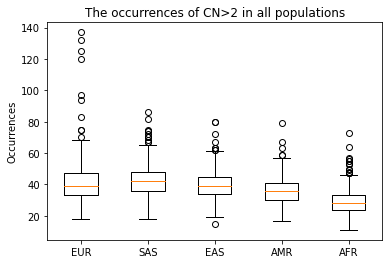

In [119]:
values = [137, 132, 125, 120, 97, 94, 86, 83, 82, 80, 80, 79, 75, 75, 75, 74, 74, 73, 72, 72, 70, 70, 70, 68, 68, 68, 68, 67, 67, 67, 67, 67, 67, 66, 66, 65, 65, 65, 65, 64, 64, 64, 64, 64, 64, 64, 63, 63, 63, 63, 63, 63, 62, 62, 62, 62, 61, 61, 61, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 14, 14, 14, 13, 11]
categories = ['EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'SAS', 'EUR', 'SAS', 'EAS', 'EAS', 'AMR', 'EUR', 'EUR', 'SAS', 'SAS', 'SAS', 'AFR', 'SAS', 'EAS', 'EUR', 'SAS', 'SAS', 'EUR', 'EUR', 'EUR', 'SAS', 'EUR', 'EUR', 'EAS', 'SAS', 'SAS', 'AMR', 'EUR', 'EUR', 'SAS', 'SAS', 'SAS', 'EUR', 'EUR', 'EUR', 'EUR', 'SAS', 'SAS', 'EUR', 'AFR', 'SAS', 'SAS', 'EAS', 'SAS', 'AMR', 'EAS', 'EUR', 'SAS', 'EAS', 'EAS', 'EAS', 'EUR', 'EUR', 'SAS', 'EAS', 'SAS', 'EAS', 'EUR', 'SAS', 'EUR', 'EUR', 'SAS', 'EUR', 'EUR', 'SAS', 'SAS', 'EAS', 'EUR', 'SAS', 'EAS', 'SAS', 'EAS', 'EUR', 'EUR', 'EUR', 'AMR', 'SAS', 'SAS', 'SAS', 'EAS', 'SAS', 'AMR', 'EAS', 'EUR', 'EUR', 'SAS', 'SAS', 'SAS', 'EUR', 'EUR', 'SAS', 'SAS', 'EUR', 'EUR', 'EAS', 'SAS', 'SAS', 'EUR', 'SAS', 'SAS', 'EAS', 'EAS', 'EAS', 'EAS', 'EUR', 'AMR', 'EUR', 'SAS', 'EUR', 'SAS', 'EAS', 'SAS', 'EAS', 'AMR', 'EUR', 'EUR', 'SAS', 'EAS', 'EAS', 'EAS', 'EAS', 'AFR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'SAS', 'SAS', 'EAS', 'AMR', 'AMR', 'EAS', 'EUR', 'AMR', 'EUR', 'AMR', 'AMR', 'EAS', 'EAS', 'AFR', 'EUR', 'EUR', 'SAS', 'EUR', 'EUR', 'EUR', 'SAS', 'SAS', 'EUR', 'SAS', 'SAS', 'EAS', 'EAS', 'AMR', 'SAS', 'EAS', 'AMR', 'SAS', 'EAS', 'EAS', 'AFR', 'AFR', 'AMR', 'EUR', 'EUR', 'AMR', 'AMR', 'EUR', 'SAS', 'AMR', 'SAS', 'EUR', 'EUR', 'EUR', 'EUR', 'SAS', 'EUR', 'SAS', 'SAS', 'EUR', 'EAS', 'EAS', 'SAS', 'EAS', 'EAS', 'EAS', 'EUR', 'EUR', 'SAS', 'SAS', 'EAS', 'EUR', 'EUR', 'EUR', 'EUR', 'AFR', 'SAS', 'SAS', 'EUR', 'AMR', 'EUR', 'EUR', 'SAS', 'SAS', 'EAS', 'SAS', 'EAS', 'EAS', 'SAS', 'EUR', 'EAS', 'SAS', 'EAS', 'SAS', 'EAS', 'EAS', 'EAS', 'EAS', 'AFR', 'EAS', 'EAS', 'EAS', 'AFR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'AMR', 'EUR', 'EUR', 'AMR', 'EUR', 'EUR', 'EUR', 'SAS', 'SAS', 'AMR', 'SAS', 'EUR', 'SAS', 'EAS', 'EUR', 'EAS', 'EAS', 'EAS', 'EUR', 'EUR', 'SAS', 'EUR', 'EAS', 'AMR', 'EAS', 'EAS', 'SAS', 'SAS', 'EAS', 'EAS', 'EAS', 'EAS', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EAS', 'SAS', 'AMR', 'SAS', 'SAS', 'SAS', 'SAS', 'SAS', 'EUR', 'SAS', 'AMR', 'EAS', 'EAS', 'EAS', 'SAS', 'AMR', 'EAS', 'SAS', 'SAS', 'SAS', 'EAS', 'EAS', 'AMR', 'EAS', 'EAS', 'AMR', 'EAS', 'EAS', 'EAS', 'EAS', 'EAS', 'SAS', 'SAS', 'EUR', 'EUR', 'EUR', 'SAS', 'EUR', 'EAS', 'EUR', 'SAS', 'AMR', 'SAS', 'EUR', 'SAS', 'SAS', 'SAS', 'EUR', 'SAS', 'AMR', 'EUR', 'EAS', 'AMR', 'EAS', 'EUR', 'EAS', 'EAS', 'EUR', 'AMR', 'EAS', 'EAS', 'SAS', 'EAS', 'SAS', 'EAS', 'SAS', 'SAS', 'SAS', 'EAS', 'SAS', 'AMR', 'EAS', 'SAS', 'SAS', 'EAS', 'SAS', 'SAS', 'AFR', 'SAS', 'EUR', 'EUR', 'SAS', 'EUR', 'SAS', 'SAS', 'SAS', 'EUR', 'AMR', 'AMR', 'EAS', 'SAS', 'SAS', 'EUR', 'EAS', 'EUR', 'SAS', 'SAS', 'EUR', 'EUR', 'EUR', 'EUR', 'EAS', 'SAS', 'EAS', 'AMR', 'EUR', 'SAS', 'SAS', 'SAS', 'SAS', 'EAS', 'SAS', 'AMR', 'SAS', 'EUR', 'EAS', 'AMR', 'EUR', 'SAS', 'SAS', 'SAS', 'AMR', 'SAS', 'EAS', 'AMR', 'SAS', 'SAS', 'SAS', 'EAS', 'EAS', 'EAS', 'EAS', 'SAS', 'AMR', 'SAS', 'AFR', 'EUR', 'AMR', 'EUR', 'EUR', 'EUR', 'EUR', 'SAS', 'EUR', 'EUR', 'SAS', 'EUR', 'EUR', 'EAS', 'SAS', 'EUR', 'SAS', 'AMR', 'EAS', 'EAS', 'EUR', 'EAS', 'SAS', 'AMR', 'EUR', 'AMR', 'SAS', 'SAS', 'AMR', 'AMR', 'EAS', 'AMR', 'AMR', 'SAS', 'EUR', 'SAS', 'SAS', 'SAS', 'SAS', 'SAS', 'EUR', 'SAS', 'SAS', 'EAS', 'SAS', 'EAS', 'SAS', 'EAS', 'SAS', 'EUR', 'EUR', 'EUR', 'SAS', 'EAS', 'EUR', 'EAS', 'EAS', 'AMR', 'EAS', 'SAS', 'SAS', 'AFR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'SAS', 'SAS', 'EUR', 'SAS', 'SAS', 'AMR', 'EUR', 'EUR', 'SAS', 'EUR', 'AMR', 'SAS', 'EUR', 'SAS', 'SAS', 'EUR', 'EUR', 'AMR', 'EAS', 'AMR', 'SAS', 'EAS', 'SAS', 'EAS', 'EUR', 'EAS', 'EAS', 'EUR', 'SAS', 'EAS', 'SAS', 'EAS', 'SAS', 'SAS', 'EAS', 'SAS', 'EUR', 'EAS', 'EAS', 'SAS', 'AMR', 'SAS', 'EAS', 'EUR', 'EAS', 'AMR', 'AMR', 'SAS', 'EAS', 'SAS', 'SAS', 'SAS', 'EUR', 'SAS', 'SAS', 'EAS', 'EAS', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'EUR', 'EUR', 'SAS', 'AMR', 'SAS', 'SAS', 'SAS', 'EUR', 'EAS', 'AMR', 'EUR', 'AMR', 'EUR', 'SAS', 'AMR', 'EAS', 'SAS', 'EAS', 'AMR', 'AMR', 'EAS', 'AMR', 'EUR', 'SAS', 'AMR', 'SAS', 'EAS', 'SAS', 'SAS', 'EUR', 'SAS', 'SAS', 'EAS', 'SAS', 'SAS', 'SAS', 'SAS', 'EAS', 'EAS', 'SAS', 'SAS', 'SAS', 'EAS', 'SAS', 'SAS', 'AMR', 'EAS', 'EAS', 'EAS', 'SAS', 'EAS', 'EUR', 'EAS', 'SAS', 'SAS', 'EUR', 'SAS', 'SAS', 'EAS', 'SAS', 'EAS', 'AFR', 'AFR', 'EUR', 'EUR', 'SAS', 'SAS', 'AMR', 'SAS', 'EUR', 'EUR', 'EUR', 'SAS', 'EAS', 'SAS', 'EUR', 'EUR', 'AMR', 'EUR', 'EUR', 'SAS', 'SAS', 'EUR', 'SAS', 'SAS', 'EUR', 'EUR', 'EUR', 'EUR', 'SAS', 'SAS', 'EUR', 'SAS', 'AMR', 'SAS', 'SAS', 'SAS', 'EUR', 'EUR', 'AMR', 'EUR', 'SAS', 'SAS', 'AMR', 'SAS', 'EUR', 'EUR', 'SAS', 'EAS', 'EAS', 'SAS', 'EAS', 'EAS', 'SAS', 'EUR', 'EAS', 'SAS', 'EAS', 'SAS', 'AMR', 'EAS', 'EAS', 'AMR', 'EAS', 'AMR', 'EAS', 'SAS', 'SAS', 'SAS', 'SAS', 'EUR', 'SAS', 'EAS', 'EAS', 'AFR', 'EAS', 'EAS', 'EAS', 'EAS', 'SAS', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'SAS', 'EAS', 'EUR', 'SAS', 'SAS', 'EUR', 'EUR', 'EAS', 'EUR', 'EUR', 'SAS', 'EUR', 'SAS', 'EAS', 'EUR', 'SAS', 'EUR', 'SAS', 'EAS', 'AMR', 'SAS', 'SAS', 'SAS', 'SAS', 'EUR', 'EUR', 'AMR', 'AMR', 'SAS', 'EAS', 'EUR', 'SAS', 'SAS', 'AMR', 'EAS', 'EAS', 'EAS', 'EAS', 'AMR', 'EAS', 'AMR', 'EAS', 'SAS', 'AFR', 'EAS', 'SAS', 'EAS', 'AMR', 'EAS', 'EUR', 'SAS', 'EAS', 'EAS', 'SAS', 'EAS', 'AMR', 'SAS', 'EAS', 'SAS', 'AFR', 'EAS', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'EAS', 'EUR', 'EUR', 'EUR', 'SAS', 'SAS', 'AMR', 'SAS', 'EUR', 'EUR', 'SAS', 'SAS', 'EUR', 'EUR', 'AMR', 'SAS', 'SAS', 'SAS', 'AMR', 'EUR', 'AMR', 'SAS', 'EAS', 'AMR', 'AMR', 'SAS', 'AMR', 'EUR', 'EAS', 'EAS', 'SAS', 'AMR', 'SAS', 'EAS', 'AMR', 'EAS', 'EAS', 'SAS', 'EUR', 'EUR', 'SAS', 'EAS', 'EUR', 'EAS', 'AMR', 'EAS', 'EAS', 'AMR', 'EAS', 'EUR', 'SAS', 'SAS', 'EAS', 'AMR', 'SAS', 'AMR', 'AMR', 'SAS', 'EUR', 'EAS', 'EAS', 'SAS', 'EAS', 'SAS', 'EAS', 'EAS', 'AMR', 'EAS', 'EUR', 'EAS', 'AMR', 'SAS', 'EUR', 'AFR', 'SAS', 'EAS', 'SAS', 'EAS', 'AFR', 'EAS', 'AFR', 'AFR', 'EUR', 'AMR', 'EUR', 'EUR', 'EUR', 'SAS', 'EUR', 'EUR', 'AMR', 'EUR', 'EUR', 'EUR', 'SAS', 'EUR', 'SAS', 'EUR', 'SAS', 'AMR', 'EUR', 'EUR', 'AMR', 'EUR', 'SAS', 'EUR', 'AMR', 'EUR', 'SAS', 'SAS', 'SAS', 'EUR', 'SAS', 'EAS', 'EAS', 'AMR', 'EAS', 'EUR', 'EAS', 'EUR', 'EUR', 'SAS', 'AMR', 'EAS', 'SAS', 'EUR', 'EAS', 'AMR', 'EUR', 'SAS', 'EUR', 'SAS', 'SAS', 'SAS', 'AMR', 'EUR', 'SAS', 'AMR', 'EAS', 'EAS', 'EUR', 'AMR', 'SAS', 'EAS', 'EAS', 'EAS', 'AMR', 'SAS', 'EAS', 'EAS', 'SAS', 'EAS', 'SAS', 'EUR', 'EUR', 'SAS', 'EAS', 'EAS', 'AMR', 'EAS', 'SAS', 'EUR', 'EAS', 'SAS', 'EUR', 'EAS', 'AMR', 'EAS', 'AMR', 'EAS', 'AMR', 'EAS', 'SAS', 'EUR', 'EAS', 'AFR', 'EAS', 'EAS', 'EAS', 'SAS', 'EAS', 'AFR', 'SAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'AMR', 'SAS', 'AMR', 'EAS', 'EUR', 'SAS', 'EUR', 'SAS', 'EUR', 'SAS', 'EUR', 'EAS', 'SAS', 'EUR', 'AMR', 'EUR', 'SAS', 'AMR', 'EUR', 'SAS', 'EUR', 'EUR', 'SAS', 'AMR', 'EUR', 'EUR', 'EAS', 'EUR', 'EUR', 'EAS', 'AMR', 'EUR', 'SAS', 'SAS', 'SAS', 'SAS', 'AMR', 'SAS', 'SAS', 'EAS', 'EAS', 'EAS', 'EAS', 'EAS', 'SAS', 'AMR', 'EAS', 'EAS', 'SAS', 'EAS', 'AMR', 'AMR', 'SAS', 'EAS', 'EAS', 'EAS', 'EAS', 'EAS', 'AMR', 'SAS', 'SAS', 'EUR', 'AMR', 'SAS', 'EAS', 'EAS', 'EAS', 'EUR', 'EAS', 'EAS', 'EAS', 'SAS', 'AMR', 'SAS', 'SAS', 'EAS', 'SAS', 'SAS', 'SAS', 'AMR', 'EAS', 'AFR', 'EAS', 'EAS', 'AFR', 'AFR', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'SAS', 'EUR', 'EUR', 'SAS', 'EUR', 'SAS', 'EUR', 'EAS', 'AMR', 'EUR', 'AMR', 'SAS', 'EUR', 'SAS', 'AMR', 'SAS', 'SAS', 'EUR', 'AMR', 'EUR', 'AMR', 'EUR', 'SAS', 'EUR', 'AMR', 'EAS', 'SAS', 'AMR', 'EAS', 'AMR', 'AMR', 'AMR', 'EUR', 'AMR', 'AMR', 'AMR', 'EUR', 'EUR', 'SAS', 'AMR', 'SAS', 'SAS', 'SAS', 'EUR', 'EUR', 'SAS', 'AMR', 'SAS', 'SAS', 'EUR', 'AMR', 'EUR', 'EAS', 'SAS', 'SAS', 'SAS', 'SAS', 'SAS', 'EAS', 'EAS', 'AMR', 'SAS', 'SAS', 'EUR', 'SAS', 'EAS', 'SAS', 'EAS', 'EAS', 'AFR', 'EUR', 'SAS', 'EAS', 'EUR', 'AMR', 'EAS', 'SAS', 'SAS', 'EUR', 'EAS', 'EAS', 'AMR', 'EAS', 'EAS', 'SAS', 'AMR', 'EAS', 'EAS', 'EAS', 'AMR', 'EAS', 'SAS', 'SAS', 'EAS', 'EAS', 'AFR', 'EAS', 'AMR', 'AMR', 'EAS', 'EAS', 'AFR', 'EAS', 'SAS', 'EAS', 'AMR', 'EAS', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'SAS', 'AMR', 'AMR', 'EUR', 'EUR', 'EUR', 'SAS', 'EUR', 'SAS', 'SAS', 'EUR', 'EUR', 'SAS', 'EUR', 'SAS', 'AMR', 'EUR', 'AMR', 'AMR', 'SAS', 'AMR', 'EUR', 'EUR', 'EUR', 'AMR', 'SAS', 'SAS', 'AMR', 'EUR', 'EAS', 'SAS', 'EAS', 'AMR', 'EUR', 'SAS', 'SAS', 'EUR', 'EUR', 'SAS', 'EUR', 'AMR', 'EUR', 'EAS', 'EAS', 'EUR', 'SAS', 'SAS', 'SAS', 'SAS', 'EUR', 'AMR', 'AMR', 'AMR', 'SAS', 'AMR', 'AMR', 'EAS', 'SAS', 'AMR', 'EAS', 'SAS', 'EUR', 'SAS', 'SAS', 'EUR', 'SAS', 'AMR', 'EAS', 'AMR', 'AMR', 'EUR', 'EAS', 'EUR', 'AMR', 'EUR', 'EAS', 'EAS', 'SAS', 'EAS', 'SAS', 'EAS', 'EAS', 'EUR', 'EAS', 'EAS', 'SAS', 'EAS', 'EAS', 'AMR', 'SAS', 'EAS', 'EAS', 'AMR', 'EAS', 'EAS', 'AMR', 'EAS', 'SAS', 'EUR', 'EAS', 'SAS', 'EAS', 'SAS', 'SAS', 'AFR', 'SAS', 'SAS', 'SAS', 'EUR', 'EUR', 'AMR', 'SAS', 'AMR', 'EAS', 'AFR', 'AMR', 'EAS', 'EAS', 'AMR', 'SAS', 'AFR', 'AFR', 'AFR', 'SAS', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'SAS', 'EUR', 'EUR', 'EUR', 'EUR', 'SAS', 'EUR', 'EUR', 'EUR', 'SAS', 'EUR', 'EUR', 'EUR', 'EUR', 'SAS', 'EUR', 'EUR', 'SAS', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'AMR', 'SAS', 'AFR', 'EAS', 'SAS', 'EAS', 'AMR', 'AMR', 'AMR', 'SAS', 'EUR', 'AMR', 'AMR', 'EUR', 'EAS', 'EUR', 'AMR', 'AMR', 'EAS', 'EUR', 'EAS', 'AMR', 'AMR', 'SAS', 'AMR', 'EAS', 'AMR', 'SAS', 'EAS', 'EAS', 'SAS', 'SAS', 'SAS', 'EAS', 'AMR', 'EAS', 'AMR', 'SAS', 'EAS', 'EUR', 'EUR', 'EUR', 'EUR', 'EAS', 'EUR', 'EAS', 'EAS', 'EAS', 'EAS', 'AMR', 'EAS', 'SAS', 'AMR', 'EUR', 'SAS', 'EUR', 'SAS', 'EAS', 'AMR', 'SAS', 'EAS', 'AMR', 'EAS', 'AMR', 'EAS', 'EAS', 'EAS', 'SAS', 'EUR', 'SAS', 'EAS', 'AMR', 'AMR', 'EAS', 'SAS', 'SAS', 'SAS', 'AMR', 'SAS', 'EAS', 'EAS', 'EAS', 'AMR', 'EAS', 'EAS', 'EAS', 'SAS', 'EUR', 'EAS', 'AFR', 'EAS', 'EAS', 'SAS', 'SAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'SAS', 'EUR', 'SAS', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'AMR', 'EUR', 'EUR', 'EUR', 'AMR', 'AMR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'SAS', 'AMR', 'AMR', 'EUR', 'EUR', 'EUR', 'AMR', 'AMR', 'EUR', 'SAS', 'EUR', 'SAS', 'AMR', 'EUR', 'EUR', 'EUR', 'AMR', 'AMR', 'AMR', 'SAS', 'EUR', 'AMR', 'EUR', 'EUR', 'AMR', 'AMR', 'EAS', 'AMR', 'AMR', 'EUR', 'EAS', 'EUR', 'EUR', 'EUR', 'EAS', 'EUR', 'AMR', 'EAS', 'SAS', 'EAS', 'SAS', 'EAS', 'EAS', 'SAS', 'AMR', 'SAS', 'SAS', 'AMR', 'EUR', 'EUR', 'EAS', 'SAS', 'EUR', 'EAS', 'SAS', 'SAS', 'SAS', 'SAS', 'EAS', 'AMR', 'SAS', 'EAS', 'EAS', 'EAS', 'SAS', 'EAS', 'AMR', 'SAS', 'EAS', 'SAS', 'SAS', 'EAS', 'SAS', 'EAS', 'EAS', 'SAS', 'EAS', 'SAS', 'EAS', 'AFR', 'AMR', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'EUR', 'EUR', 'AMR', 'SAS', 'SAS', 'EUR', 'EUR', 'SAS', 'EAS', 'SAS', 'EUR', 'EUR', 'EUR', 'EUR', 'SAS', 'EUR', 'EUR', 'AMR', 'AMR', 'EUR', 'EAS', 'SAS', 'EUR', 'AMR', 'EUR', 'EUR', 'SAS', 'SAS', 'AMR', 'EUR', 'SAS', 'AMR', 'EUR', 'EAS', 'AMR', 'SAS', 'EAS', 'AMR', 'AMR', 'SAS', 'EUR', 'SAS', 'AMR', 'SAS', 'SAS', 'EAS', 'EAS', 'SAS', 'SAS', 'EAS', 'AMR', 'SAS', 'SAS', 'SAS', 'EUR', 'EAS', 'SAS', 'EUR', 'EAS', 'AMR', 'SAS', 'SAS', 'EUR', 'EAS', 'EUR', 'AMR', 'EAS', 'SAS', 'EAS', 'AMR', 'SAS', 'EUR', 'EAS', 'EUR', 'EAS', 'EUR', 'EAS', 'AMR', 'EAS', 'EAS', 'EAS', 'AMR', 'SAS', 'SAS', 'EAS', 'AMR', 'EAS', 'EAS', 'EUR', 'EAS', 'AMR', 'AMR', 'SAS', 'AFR', 'AFR', 'SAS', 'AFR', 'AFR', 'AMR', 'EAS', 'EAS', 'EAS', 'EAS', 'SAS', 'EAS', 'AFR', 'AFR', 'AFR', 'EAS', 'AMR', 'EAS', 'AFR', 'AMR', 'AFR', 'AFR', 'AFR', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'EUR', 'SAS', 'EUR', 'EUR', 'SAS', 'EUR', 'EUR', 'AMR', 'SAS', 'SAS', 'EUR', 'AMR', 'SAS', 'EUR', 'SAS', 'EUR', 'AMR', 'EUR', 'SAS', 'AMR', 'SAS', 'EUR', 'SAS', 'AMR', 'EAS', 'EUR', 'EUR', 'SAS', 'SAS', 'EUR', 'SAS', 'SAS', 'EAS', 'AMR', 'EUR', 'AMR', 'EAS', 'AMR', 'EUR', 'AMR', 'EAS', 'AMR', 'EUR', 'EUR', 'SAS', 'AMR', 'SAS', 'EUR', 'AMR', 'AMR', 'AMR', 'SAS', 'EAS', 'SAS', 'EUR', 'EAS', 'AMR', 'AMR', 'EAS', 'AMR', 'EUR', 'EAS', 'EAS', 'AMR', 'AFR', 'EAS', 'AMR', 'AMR', 'EAS', 'EAS', 'EAS', 'SAS', 'EAS', 'AMR', 'EAS', 'AFR', 'SAS', 'SAS', 'EAS', 'EAS', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'AMR', 'EUR', 'AMR', 'SAS', 'EAS', 'AMR', 'AMR', 'SAS', 'SAS', 'EUR', 'EUR', 'EAS', 'AMR', 'EUR', 'AMR', 'SAS', 'EUR', 'EUR', 'AMR', 'AMR', 'EUR', 'EUR', 'SAS', 'AMR', 'SAS', 'AMR', 'EUR', 'EUR', 'EUR', 'AMR', 'EAS', 'AMR', 'EAS', 'EUR', 'EUR', 'AMR', 'AMR', 'SAS', 'SAS', 'EAS', 'AMR', 'EAS', 'EUR', 'AMR', 'EAS', 'EUR', 'SAS', 'SAS', 'AMR', 'EAS', 'AMR', 'EUR', 'AMR', 'AMR', 'AMR', 'SAS', 'AMR', 'EAS', 'EAS', 'EAS', 'EUR', 'AMR', 'SAS', 'EAS', 'EAS', 'EAS', 'SAS', 'EUR', 'EAS', 'EAS', 'EAS', 'AMR', 'SAS', 'AMR', 'EAS', 'EAS', 'EAS', 'EAS', 'EAS', 'EAS', 'EAS', 'AFR', 'EAS', 'AFR', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'AMR', 'EUR', 'EUR', 'EUR', 'EUR', 'AMR', 'EUR', 'EAS', 'EUR', 'EUR', 'EAS', 'AMR', 'EUR', 'AMR', 'EUR', 'AMR', 'EAS', 'SAS', 'EAS', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'AMR', 'EUR', 'EUR', 'AMR', 'EAS', 'EAS', 'EUR', 'SAS', 'EAS', 'SAS', 'EUR', 'EUR', 'EUR', 'AMR', 'EUR', 'EUR', 'EAS', 'AMR', 'AMR', 'AMR', 'EUR', 'EAS', 'SAS', 'EUR', 'SAS', 'SAS', 'EUR', 'SAS', 'SAS', 'EUR', 'SAS', 'SAS', 'EAS', 'AMR', 'SAS', 'AMR', 'EUR', 'AFR', 'AMR', 'SAS', 'SAS', 'AMR', 'AMR', 'AMR', 'EAS', 'AMR', 'AMR', 'EAS', 'AMR', 'AFR', 'SAS', 'EAS', 'SAS', 'AFR', 'SAS', 'SAS', 'AFR', 'AMR', 'AFR', 'AFR', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'AMR', 'AMR', 'AMR', 'EUR', 'AMR', 'EUR', 'AMR', 'AMR', 'EUR', 'EUR', 'EUR', 'SAS', 'EUR', 'SAS', 'EUR', 'AMR', 'AMR', 'AMR', 'EUR', 'EUR', 'EUR', 'EAS', 'AMR', 'EAS', 'AMR', 'AMR', 'SAS', 'EUR', 'SAS', 'EUR', 'SAS', 'AMR', 'EAS', 'EUR', 'AMR', 'EAS', 'SAS', 'EUR', 'EAS', 'EAS', 'EAS', 'EAS', 'SAS', 'AMR', 'EAS', 'SAS', 'EUR', 'SAS', 'AMR', 'EUR', 'AFR', 'AMR', 'SAS', 'EUR', 'EUR', 'EAS', 'AMR', 'EAS', 'AMR', 'EAS', 'EAS', 'EUR', 'SAS', 'AFR', 'SAS', 'EUR', 'EAS', 'EAS', 'EAS', 'AMR', 'AMR', 'AMR', 'EAS', 'EAS', 'AFR', 'AMR', 'EUR', 'AFR', 'EAS', 'AMR', 'AFR', 'AFR', 'EAS', 'EAS', 'AFR', 'AMR', 'EAS', 'AFR', 'AFR', 'EAS', 'AFR', 'AFR', 'AFR', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'EUR', 'EUR', 'AMR', 'EUR', 'AMR', 'AMR', 'AMR', 'SAS', 'SAS', 'AMR', 'EUR', 'EUR', 'SAS', 'EUR', 'AMR', 'AMR', 'AMR', 'AMR', 'AMR', 'EUR', 'AMR', 'EUR', 'AMR', 'AMR', 'SAS', 'AMR', 'EUR', 'AMR', 'EAS', 'EUR', 'EUR', 'EAS', 'SAS', 'SAS', 'AMR', 'EUR', 'EAS', 'EUR', 'EUR', 'EUR', 'EAS', 'AMR', 'EUR', 'SAS', 'EAS', 'EAS', 'EAS', 'AMR', 'SAS', 'AMR', 'EAS', 'EAS', 'EUR', 'EAS', 'EAS', 'SAS', 'SAS', 'EUR', 'AMR', 'EAS', 'EAS', 'EAS', 'SAS', 'SAS', 'AFR', 'AMR', 'EAS', 'EAS', 'EAS', 'EAS', 'EAS', 'EAS', 'AMR', 'EAS', 'EAS', 'EAS', 'EAS', 'SAS', 'AMR', 'AFR', 'AFR', 'EAS', 'EAS', 'AFR', 'AFR', 'AMR', 'AFR', 'AFR', 'EAS', 'AFR', 'AFR', 'EAS', 'AFR', 'AFR', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'SAS', 'AMR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'AMR', 'EUR', 'EAS', 'EAS', 'EUR', 'EUR', 'EUR', 'SAS', 'EAS', 'AMR', 'AMR', 'SAS', 'AMR', 'EUR', 'EUR', 'EUR', 'SAS', 'SAS', 'EUR', 'AMR', 'EUR', 'EAS', 'AMR', 'EUR', 'EAS', 'EUR', 'SAS', 'EAS', 'AMR', 'SAS', 'AMR', 'SAS', 'AMR', 'SAS', 'EAS', 'SAS', 'EUR', 'EAS', 'SAS', 'AMR', 'EAS', 'AFR', 'EAS', 'AFR', 'AFR', 'EAS', 'AFR', 'AFR', 'AFR', 'EAS', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'EUR', 'AMR', 'SAS', 'AMR', 'EUR', 'EAS', 'EUR', 'EUR', 'AMR', 'AMR', 'AMR', 'EAS', 'SAS', 'EUR', 'AMR', 'AMR', 'AMR', 'EUR', 'EUR', 'AMR', 'EAS', 'AMR', 'AMR', 'EAS', 'SAS', 'AMR', 'EUR', 'EUR', 'EAS', 'AMR', 'EUR', 'AMR', 'EUR', 'AMR', 'SAS', 'EAS', 'AMR', 'EAS', 'AFR', 'AFR', 'EAS', 'SAS', 'AMR', 'AFR', 'AMR', 'AFR', 'EAS', 'AFR', 'AFR', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'EUR', 'EUR', 'AMR', 'AMR', 'EUR', 'AMR', 'SAS', 'EUR', 'AMR', 'AMR', 'SAS', 'EAS', 'EUR', 'AMR', 'EAS', 'SAS', 'AMR', 'SAS', 'AMR', 'EUR', 'EAS', 'AMR', 'AMR', 'AMR', 'EUR', 'AMR', 'EUR', 'EAS', 'AMR', 'AMR', 'AMR', 'SAS', 'AMR', 'EUR', 'AMR', 'SAS', 'SAS', 'AMR', 'AMR', 'EAS', 'EAS', 'EAS', 'AMR', 'EAS', 'EAS', 'SAS', 'EAS', 'EAS', 'EUR', 'AFR', 'AFR', 'AMR', 'EAS', 'EAS', 'AFR', 'AFR', 'AFR', 'EAS', 'EAS', 'AFR', 'AFR', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'AMR', 'AMR', 'EUR', 'EUR', 'AMR', 'EUR', 'EAS', 'AMR', 'AMR', 'AMR', 'AMR', 'SAS', 'EUR', 'EUR', 'EUR', 'AMR', 'AMR', 'AMR', 'EAS', 'EUR', 'SAS', 'EAS', 'SAS', 'AMR', 'SAS', 'AMR', 'AFR', 'AMR', 'EAS', 'EAS', 'EAS', 'AMR', 'AMR', 'EAS', 'AFR', 'AMR', 'AMR', 'AMR', 'EAS', 'AMR', 'AFR', 'AFR', 'AMR', 'AMR', 'AFR', 'AFR', 'AFR', 'EAS', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'AMR', 'AMR', 'EUR', 'AMR', 'EUR', 'AMR', 'SAS', 'SAS', 'SAS', 'AMR', 'SAS', 'SAS', 'EAS', 'AMR', 'EUR', 'AMR', 'AMR', 'AMR', 'EUR', 'AFR', 'EAS', 'EUR', 'SAS', 'AMR', 'AMR', 'AFR', 'AMR', 'AMR', 'AFR', 'AFR', 'SAS', 'AFR', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'SAS', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AMR', 'AMR', 'EUR', 'EUR', 'SAS', 'SAS', 'EAS', 'SAS', 'SAS', 'AMR', 'SAS', 'AMR', 'AMR', 'EUR', 'AMR', 'AFR', 'EAS', 'AFR', 'AMR', 'AFR', 'SAS', 'EAS', 'EAS', 'AFR', 'AFR', 'EAS', 'AMR', 'EAS', 'AFR', 'AMR', 'EAS', 'AFR', 'AFR', 'AFR', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AMR', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'AMR', 'AMR', 'SAS', 'EAS', 'EUR', 'AMR', 'EUR', 'EAS', 'AMR', 'AMR', 'EAS', 'AMR', 'AMR', 'SAS', 'EAS', 'EAS', 'SAS', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'EUR', 'EAS', 'EUR', 'AMR', 'EUR', 'EUR', 'EAS', 'AMR', 'EAS', 'EAS', 'EUR', 'AFR', 'AFR', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AMR', 'SAS', 'EUR', 'SAS', 'EAS', 'SAS', 'AFR', 'EUR', 'AFR', 'AMR', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'AMR', 'EUR', 'AMR', 'AMR', 'AFR', 'AMR', 'AFR', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'AMR', 'EUR', 'EAS', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AMR', 'AMR', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EUR', 'SAS', 'AMR', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AMR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'EAS', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR', 'AFR']
allcolors = [colorpanel[x] for x in allpops]

category_values = {}
for cat, val in zip(categories, values):
    if cat not in category_values:
        category_values[cat] = []
    category_values[cat].append(val)

# Prepare data for boxplot
data_to_plot = [category_values[cat] for cat in category_values]
labels = list(category_values.keys())

# Creating the boxplot
plt.boxplot(data_to_plot, labels=labels)

# Adding labels and title (optional)

plt.ylabel('Occurrences')
plt.title('The occurrences of CN>2 in all populations')

# Show the plot
plt.show()